<a href="https://colab.research.google.com/github/viraterletska/Voice_Controlled_Stopwatch/blob/main/TestingCoursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install dependencies**

# Testing Whisper small command spotting

**1. Mount Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**2. Extract ZIP Files**

In [3]:
import zipfile
import os

# Define the path where the zip files are located
zip_folder_path = '/content/drive/MyDrive/Test'
extract_folder = '/content/test_commands'

# Create the extraction folder if it doesn't exist
os.makedirs(extract_folder, exist_ok=True)

# List of zip files
zip_files = ['start.zip', 'stop.zip', 'reset.zip']

# Extract each zip file
for zip_file in zip_files:
    with zipfile.ZipFile(os.path.join(zip_folder_path, zip_file), 'r') as zip_ref:
        zip_ref.extractall(extract_folder)
        print(f'Extracted {zip_file}')


Extracted start.zip
Extracted stop.zip
Extracted reset.zip


**3. Install Required Packages**

In [4]:
!pip install torchaudio transformers scikit-learn seaborn matplotlib tqdm


**4. Define Audio Processing and Whisper Setup**

In [5]:
import torchaudio
from transformers import pipeline

# Initialize the Whisper Small model for speech recognition
speech_recognizer = pipeline("automatic-speech-recognition", model="openai/whisper-small")

# Define the function to process and convert .opus files
def load_and_convert_audio(file_path):
    waveform, sample_rate = torchaudio.load(file_path)

    # Resample to 16kHz if the sample rate is not 16kHz
    target_sample_rate = 16000
    if sample_rate != target_sample_rate:
        resampler = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=target_sample_rate)
        waveform = resampler(waveform)

    # Ensure the audio is in the expected format (float32)
    return waveform.squeeze().numpy()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.97k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.87k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

Device set to use cuda:0


**5. Set Up Command Recognition**

In [6]:
import os
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the path to the test commands (base directory containing subfolders like start, stop, reset)
base_path = '/content/test_commands'

# Set the commands to test (folders like start, stop, reset)
commands = ["start", "stop", "reset"]

# Initialize lists for predictions and ground truth
predictions = []
ground_truth = []

# Process the folders for each command (start, stop, reset)
for command in commands:
    folder_path = os.path.join(base_path, command)
    for file_name in tqdm(os.listdir(folder_path)):  # Show progress with tqdm
        if file_name.endswith(".opus"):  # Only process .opus files
            file_path = os.path.join(folder_path, file_name)
            try:
                # Load and convert the audio file
                audio_array = load_and_convert_audio(file_path)

                # Perform transcription using Whisper Small
                result = speech_recognizer(audio_array)
                recognized_text = result["text"].lower()
                print(f"File: {file_name}, Recognized Text: {recognized_text}")

                # Determine predicted label
                if any(cmd in recognized_text for cmd in commands):
                    predicted_label = next(cmd for cmd in commands if cmd in recognized_text)
                else:
                    predicted_label = "other"  # If no valid command is recognized

                predictions.append(predicted_label)
                ground_truth.append(command)  # True label is the folder name (e.g., 'reset')

            except Exception as e:
                print(f"Error processing file {file_path}: {e}")


  0%|          | 0/2132 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:512: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(
Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.43.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.
  0%|          | 1/2132 [00:02<1:28:52,  2.50s/it]

File: common_voice_en_158196.opus, Recognized Text:  start.


  0%|          | 2/2132 [00:02<42:42,  1.20s/it]  

File: common_voice_en_537729.opus, Recognized Text:  start


  0%|          | 3/2132 [00:03<28:13,  1.26it/s]

File: common_voice_en_637062.opus, Recognized Text:  start!


  0%|          | 4/2132 [00:03<21:05,  1.68it/s]

File: common_voice_en_2410.opus, Recognized Text:  style


  0%|          | 5/2132 [00:03<17:12,  2.06it/s]

File: common_voice_en_21240.opus, Recognized Text:  start


  0%|          | 6/2132 [00:03<14:50,  2.39it/s]

File: common_voice_en_32295.opus, Recognized Text:  stop


  0%|          | 7/2132 [00:04<13:20,  2.65it/s]

File: common_voice_en_614068.opus, Recognized Text:  start


  0%|          | 8/2132 [00:04<12:38,  2.80it/s]

File: common_voice_en_19724147.opus, Recognized Text:  stop.


  0%|          | 9/2132 [00:04<12:06,  2.92it/s]

File: common_voice_en_36693.opus, Recognized Text:  style you


  0%|          | 10/2132 [00:05<11:29,  3.08it/s]You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


File: common_voice_en_15904265.opus, Recognized Text:  start


  1%|          | 11/2132 [00:05<11:23,  3.10it/s]

File: common_voice_en_21366677.opus, Recognized Text:  start up.


  1%|          | 12/2132 [00:05<11:12,  3.15it/s]

File: common_voice_en_21673070.opus, Recognized Text:  start.


  1%|          | 13/2132 [00:06<11:10,  3.16it/s]

File: common_voice_en_17851469.opus, Recognized Text:  start.


  1%|          | 14/2132 [00:06<11:01,  3.20it/s]

File: common_voice_en_55051.opus, Recognized Text:  start.


  1%|          | 15/2132 [00:06<10:54,  3.23it/s]

File: common_voice_en_141653.opus, Recognized Text:  start.


  1%|          | 16/2132 [00:07<10:51,  3.25it/s]

File: common_voice_en_22056112.opus, Recognized Text:  start.


  1%|          | 17/2132 [00:07<10:49,  3.26it/s]

File: common_voice_en_116830.opus, Recognized Text:  start.


  1%|          | 18/2132 [00:07<10:39,  3.30it/s]

File: common_voice_en_17914231.opus, Recognized Text:  start


  1%|          | 19/2132 [00:07<10:36,  3.32it/s]

File: common_voice_en_576779.opus, Recognized Text:  start.


  1%|          | 20/2132 [00:08<10:30,  3.35it/s]

File: common_voice_en_480252.opus, Recognized Text:  start


  1%|          | 21/2132 [00:08<10:30,  3.35it/s]

File: common_voice_en_19684293.opus, Recognized Text:  start.


  1%|          | 22/2132 [00:08<10:39,  3.30it/s]

File: common_voice_en_21989766.opus, Recognized Text:  start.


  1%|          | 23/2132 [00:09<10:36,  3.32it/s]

File: common_voice_en_690060.opus, Recognized Text:  stop


  1%|          | 24/2132 [00:09<10:32,  3.33it/s]

File: common_voice_en_182932.opus, Recognized Text:  stuff


  1%|          | 25/2132 [00:09<10:50,  3.24it/s]

File: common_voice_en_18473844.opus, Recognized Text:  start.


  1%|          | 26/2132 [00:10<11:14,  3.12it/s]

File: common_voice_en_17841549.opus, Recognized Text:  start.


  1%|▏         | 27/2132 [00:10<11:26,  3.07it/s]

File: common_voice_en_40707.opus, Recognized Text:  sorry.


  1%|▏         | 28/2132 [00:10<11:41,  3.00it/s]

File: common_voice_en_200706.opus, Recognized Text:  dirt.


  1%|▏         | 29/2132 [00:11<11:44,  2.99it/s]

File: common_voice_en_541871.opus, Recognized Text:  start.


  1%|▏         | 30/2132 [00:11<11:54,  2.94it/s]

File: common_voice_en_138401.opus, Recognized Text:  thank you.


  1%|▏         | 31/2132 [00:11<11:54,  2.94it/s]

File: common_voice_en_629208.opus, Recognized Text:  sorry.


  2%|▏         | 32/2132 [00:12<11:52,  2.95it/s]

File: common_voice_en_22431274.opus, Recognized Text:  stop.


  2%|▏         | 33/2132 [00:12<11:44,  2.98it/s]

File: common_voice_en_582009.opus, Recognized Text:  start.


  2%|▏         | 34/2132 [00:12<11:55,  2.93it/s]

File: common_voice_en_26383.opus, Recognized Text:  start.


  2%|▏         | 35/2132 [00:13<11:53,  2.94it/s]

File: common_voice_en_19632420.opus, Recognized Text:  thoughts


  2%|▏         | 36/2132 [00:13<11:43,  2.98it/s]

File: common_voice_en_517393.opus, Recognized Text:  start


  2%|▏         | 37/2132 [00:13<12:09,  2.87it/s]

File: common_voice_en_71328.opus, Recognized Text:  start your.


  2%|▏         | 38/2132 [00:14<11:44,  2.97it/s]

File: common_voice_en_62969.opus, Recognized Text:  start.


  2%|▏         | 39/2132 [00:14<11:30,  3.03it/s]

File: common_voice_en_494446.opus, Recognized Text:  start.


  2%|▏         | 40/2132 [00:14<11:21,  3.07it/s]

File: common_voice_en_182567.opus, Recognized Text:  start.


  2%|▏         | 41/2132 [00:15<11:09,  3.12it/s]

File: common_voice_en_536024.opus, Recognized Text:  start.


  2%|▏         | 42/2132 [00:15<11:04,  3.15it/s]

File: common_voice_en_19646361.opus, Recognized Text:  start.


  2%|▏         | 43/2132 [00:15<11:09,  3.12it/s]

File: common_voice_en_21354793.opus, Recognized Text:  start up.


  2%|▏         | 44/2132 [00:16<11:02,  3.15it/s]

File: common_voice_en_188355.opus, Recognized Text:  start.


  2%|▏         | 45/2132 [00:16<11:00,  3.16it/s]

File: common_voice_en_19699574.opus, Recognized Text:  start.


  2%|▏         | 46/2132 [00:16<10:57,  3.17it/s]

File: common_voice_en_17887361.opus, Recognized Text:  stop.


  2%|▏         | 47/2132 [00:17<11:03,  3.14it/s]

File: common_voice_en_611081.opus, Recognized Text:  start.


  2%|▏         | 48/2132 [00:17<11:00,  3.16it/s]

File: common_voice_en_17283042.opus, Recognized Text:  start.


  2%|▏         | 49/2132 [00:17<10:59,  3.16it/s]

File: common_voice_en_255696.opus, Recognized Text:  start.


  2%|▏         | 50/2132 [00:17<10:58,  3.16it/s]

File: common_voice_en_18702651.opus, Recognized Text:  starts


  2%|▏         | 51/2132 [00:18<10:55,  3.18it/s]

File: common_voice_en_17887299.opus, Recognized Text:  start.


  2%|▏         | 52/2132 [00:18<10:57,  3.16it/s]

File: common_voice_en_20490782.opus, Recognized Text:  start.


  2%|▏         | 53/2132 [00:18<10:50,  3.20it/s]

File: common_voice_en_19541165.opus, Recognized Text:  start.


  3%|▎         | 54/2132 [00:19<10:51,  3.19it/s]

File: common_voice_en_121035.opus, Recognized Text:  start.


  3%|▎         | 55/2132 [00:19<10:52,  3.18it/s]

File: common_voice_en_618051.opus, Recognized Text:  start.


  3%|▎         | 56/2132 [00:19<10:52,  3.18it/s]

File: common_voice_en_21489253.opus, Recognized Text:  starts at


  3%|▎         | 57/2132 [00:20<10:53,  3.18it/s]

File: common_voice_en_486793.opus, Recognized Text:  start.


  3%|▎         | 58/2132 [00:20<10:51,  3.18it/s]

File: common_voice_en_528146.opus, Recognized Text:  star...


  3%|▎         | 59/2132 [00:20<10:54,  3.17it/s]

File: common_voice_en_3827.opus, Recognized Text:  start.


  3%|▎         | 60/2132 [00:21<11:00,  3.14it/s]

File: common_voice_en_637181.opus, Recognized Text:  start.


  3%|▎         | 61/2132 [00:21<10:56,  3.16it/s]

File: common_voice_en_18400913.opus, Recognized Text:  start.


  3%|▎         | 62/2132 [00:21<10:47,  3.20it/s]

File: common_voice_en_19520095.opus, Recognized Text:  starting


  3%|▎         | 63/2132 [00:22<10:46,  3.20it/s]

File: common_voice_en_681449.opus, Recognized Text:  start.


  3%|▎         | 64/2132 [00:22<10:49,  3.18it/s]

File: common_voice_en_18147512.opus, Recognized Text:  start.


  3%|▎         | 65/2132 [00:22<10:49,  3.18it/s]

File: common_voice_en_21089596.opus, Recognized Text:  start.


  3%|▎         | 66/2132 [00:23<10:58,  3.14it/s]

File: common_voice_en_19678484.opus, Recognized Text:  starts!


  3%|▎         | 67/2132 [00:23<11:00,  3.13it/s]

File: common_voice_en_20529412.opus, Recognized Text:  star.


  3%|▎         | 68/2132 [00:23<10:57,  3.14it/s]

File: common_voice_en_689205.opus, Recognized Text:  start.


  3%|▎         | 69/2132 [00:23<11:10,  3.08it/s]

File: common_voice_en_21690662.opus, Recognized Text:  start.


  3%|▎         | 70/2132 [00:24<11:11,  3.07it/s]

File: common_voice_en_17857233.opus, Recognized Text:  start


  3%|▎         | 71/2132 [00:24<11:17,  3.04it/s]

File: common_voice_en_172624.opus, Recognized Text:  start!


  3%|▎         | 72/2132 [00:25<11:33,  2.97it/s]

File: common_voice_en_51324.opus, Recognized Text:  stop.


  3%|▎         | 73/2132 [00:25<11:38,  2.95it/s]

File: common_voice_en_155208.opus, Recognized Text:  stop.


  3%|▎         | 74/2132 [00:25<11:38,  2.95it/s]

File: common_voice_en_17296096.opus, Recognized Text:  start.


  4%|▎         | 75/2132 [00:26<11:22,  3.02it/s]

File: common_voice_en_19703962.opus, Recognized Text:  and


  4%|▎         | 76/2132 [00:26<11:30,  2.98it/s]

File: common_voice_en_19347878.opus, Recognized Text:  start.


  4%|▎         | 77/2132 [00:26<11:34,  2.96it/s]

File: common_voice_en_582156.opus, Recognized Text:  start.


  4%|▎         | 78/2132 [00:27<11:22,  3.01it/s]

File: common_voice_en_20253493.opus, Recognized Text:  stop


  4%|▎         | 79/2132 [00:27<11:29,  2.98it/s]

File: common_voice_en_77796.opus, Recognized Text:  stop.


  4%|▍         | 80/2132 [00:27<11:27,  2.98it/s]

File: common_voice_en_562772.opus, Recognized Text:  start.


  4%|▍         | 81/2132 [00:28<11:34,  2.95it/s]

File: common_voice_en_684597.opus, Recognized Text:  start.


  4%|▍         | 82/2132 [00:28<11:40,  2.93it/s]

File: common_voice_en_18479596.opus, Recognized Text:  stop.


  4%|▍         | 83/2132 [00:28<11:29,  2.97it/s]

File: common_voice_en_17441291.opus, Recognized Text:  start.


  4%|▍         | 84/2132 [00:29<11:20,  3.01it/s]

File: common_voice_en_17706.opus, Recognized Text:  stop.


  4%|▍         | 85/2132 [00:29<11:12,  3.04it/s]

File: common_voice_en_561851.opus, Recognized Text:  start.


  4%|▍         | 86/2132 [00:29<11:17,  3.02it/s]

File: common_voice_en_17662011.opus, Recognized Text:  thank you.


  4%|▍         | 87/2132 [00:30<11:10,  3.05it/s]

File: common_voice_en_664659.opus, Recognized Text:  start.


  4%|▍         | 88/2132 [00:30<11:02,  3.09it/s]

File: common_voice_en_73768.opus, Recognized Text:  start.


  4%|▍         | 89/2132 [00:30<10:58,  3.10it/s]

File: common_voice_en_652861.opus, Recognized Text:  start.


  4%|▍         | 90/2132 [00:30<10:51,  3.13it/s]

File: common_voice_en_19568219.opus, Recognized Text:  stop.


  4%|▍         | 91/2132 [00:31<10:47,  3.15it/s]

File: common_voice_en_18303363.opus, Recognized Text:  stop.


  4%|▍         | 92/2132 [00:31<10:49,  3.14it/s]

File: common_voice_en_649770.opus, Recognized Text:  still on.


  4%|▍         | 93/2132 [00:31<10:45,  3.16it/s]

File: common_voice_en_583700.opus, Recognized Text:  start.


  4%|▍         | 94/2132 [00:32<10:39,  3.19it/s]

File: common_voice_en_21088821.opus, Recognized Text:  stop.


  4%|▍         | 95/2132 [00:32<10:41,  3.18it/s]

File: common_voice_en_554448.opus, Recognized Text:  start.


  5%|▍         | 96/2132 [00:32<10:38,  3.19it/s]

File: common_voice_en_581321.opus, Recognized Text:  start.


  5%|▍         | 97/2132 [00:33<10:41,  3.17it/s]

File: common_voice_en_649338.opus, Recognized Text:  start.


  5%|▍         | 98/2132 [00:33<10:43,  3.16it/s]

File: common_voice_en_696631.opus, Recognized Text:  stop.


  5%|▍         | 99/2132 [00:33<10:48,  3.14it/s]

File: common_voice_en_6923094.opus, Recognized Text:  started.


  5%|▍         | 100/2132 [00:34<10:52,  3.12it/s]

File: common_voice_en_71090.opus, Recognized Text:  start.


  5%|▍         | 101/2132 [00:34<10:54,  3.10it/s]

File: common_voice_en_21371053.opus, Recognized Text:  start.


  5%|▍         | 102/2132 [00:34<10:46,  3.14it/s]

File: common_voice_en_573979.opus, Recognized Text: ...


  5%|▍         | 103/2132 [00:35<10:50,  3.12it/s]

File: common_voice_en_17280246.opus, Recognized Text:  start.


  5%|▍         | 104/2132 [00:35<10:51,  3.11it/s]

File: common_voice_en_610028.opus, Recognized Text:  so


  5%|▍         | 105/2132 [00:35<10:53,  3.10it/s]

File: common_voice_en_20948340.opus, Recognized Text:  start.


  5%|▍         | 106/2132 [00:36<10:39,  3.17it/s]

File: common_voice_en_18504681.opus, Recognized Text:  stop


  5%|▌         | 107/2132 [00:36<10:43,  3.15it/s]

File: common_voice_en_22259708.opus, Recognized Text:  start.


  5%|▌         | 108/2132 [00:36<10:47,  3.13it/s]

File: common_voice_en_492274.opus, Recognized Text:  start.


  5%|▌         | 109/2132 [00:36<10:38,  3.17it/s]

File: common_voice_en_17675634.opus, Recognized Text:  start


  5%|▌         | 110/2132 [00:37<10:32,  3.19it/s]

File: common_voice_en_18302407.opus, Recognized Text:  start


  5%|▌         | 111/2132 [00:37<10:42,  3.14it/s]

File: common_voice_en_185860.opus, Recognized Text:  стать!


  5%|▌         | 112/2132 [00:37<10:37,  3.17it/s]

File: common_voice_en_17850206.opus, Recognized Text:  start


  5%|▌         | 113/2132 [00:38<10:42,  3.14it/s]

File: common_voice_en_21477055.opus, Recognized Text:  start.


  5%|▌         | 114/2132 [00:38<10:57,  3.07it/s]

File: common_voice_en_37033.opus, Recognized Text:  stop.


  5%|▌         | 115/2132 [00:38<11:13,  2.99it/s]

File: common_voice_en_47008.opus, Recognized Text:  so.


  5%|▌         | 116/2132 [00:39<11:11,  3.00it/s]

File: common_voice_en_21013974.opus, Recognized Text:  start


  5%|▌         | 117/2132 [00:39<11:12,  3.00it/s]

File: common_voice_en_327683.opus, Recognized Text:  started


  6%|▌         | 118/2132 [00:39<11:23,  2.95it/s]

File: common_voice_en_17255404.opus, Recognized Text:  start.


  6%|▌         | 119/2132 [00:40<11:26,  2.93it/s]

File: common_voice_en_17958553.opus, Recognized Text:  start.


  6%|▌         | 120/2132 [00:40<11:30,  2.91it/s]

File: common_voice_en_18102132.opus, Recognized Text:  start.


  6%|▌         | 121/2132 [00:41<11:44,  2.85it/s]

File: common_voice_en_22371378.opus, Recognized Text:  stąd.


  6%|▌         | 122/2132 [00:41<11:39,  2.87it/s]

File: common_voice_en_555377.opus, Recognized Text:  so


  6%|▌         | 123/2132 [00:41<11:41,  2.87it/s]

File: common_voice_en_626712.opus, Recognized Text:  stop.


  6%|▌         | 124/2132 [00:42<11:40,  2.86it/s]

File: common_voice_en_535917.opus, Recognized Text:  start.


  6%|▌         | 125/2132 [00:42<11:48,  2.83it/s]

File: common_voice_en_57998.opus, Recognized Text:  start.


  6%|▌         | 126/2132 [00:42<11:34,  2.89it/s]

File: common_voice_en_83130.opus, Recognized Text:  start.


  6%|▌         | 127/2132 [00:43<11:23,  2.93it/s]

File: common_voice_en_19597492.opus, Recognized Text:  stop.


  6%|▌         | 128/2132 [00:43<11:12,  2.98it/s]

File: common_voice_en_630391.opus, Recognized Text:  start.


  6%|▌         | 129/2132 [00:43<11:06,  3.00it/s]

File: common_voice_en_17402559.opus, Recognized Text:  stop.


  6%|▌         | 130/2132 [00:44<11:01,  3.03it/s]

File: common_voice_en_18713726.opus, Recognized Text:  start.


  6%|▌         | 131/2132 [00:44<10:53,  3.06it/s]

File: common_voice_en_17327308.opus, Recognized Text:  start


  6%|▌         | 132/2132 [00:44<10:59,  3.03it/s]

File: common_voice_en_20849380.opus, Recognized Text:  thoughts?


  6%|▌         | 133/2132 [00:45<11:00,  3.03it/s]

File: common_voice_en_192222.opus, Recognized Text:  start.


  6%|▋         | 134/2132 [00:45<10:55,  3.05it/s]

File: common_voice_en_658442.opus, Recognized Text:  start.


  6%|▋         | 135/2132 [00:45<10:46,  3.09it/s]

File: common_voice_en_501669.opus, Recognized Text:  sir


  6%|▋         | 136/2132 [00:46<10:37,  3.13it/s]

File: common_voice_en_21332473.opus, Recognized Text:  start


  6%|▋         | 137/2132 [00:46<10:42,  3.11it/s]

File: common_voice_en_18459690.opus, Recognized Text:  start.


  6%|▋         | 138/2132 [00:46<10:43,  3.10it/s]

File: common_voice_en_17412349.opus, Recognized Text:  sorry.


  7%|▋         | 139/2132 [00:46<10:43,  3.10it/s]

File: common_voice_en_18131056.opus, Recognized Text:  start.


  7%|▋         | 140/2132 [00:47<10:40,  3.11it/s]

File: common_voice_en_19786549.opus, Recognized Text:  start


  7%|▋         | 141/2132 [00:47<10:37,  3.12it/s]

File: common_voice_en_113472.opus, Recognized Text:  start


  7%|▋         | 142/2132 [00:47<10:32,  3.14it/s]

File: common_voice_en_17718884.opus, Recognized Text:  start


  7%|▋         | 143/2132 [00:48<10:36,  3.12it/s]

File: common_voice_en_604192.opus, Recognized Text:  start.


  7%|▋         | 144/2132 [00:48<10:34,  3.13it/s]

File: common_voice_en_21312147.opus, Recognized Text:  start.


  7%|▋         | 145/2132 [00:48<10:34,  3.13it/s]

File: common_voice_en_150335.opus, Recognized Text:  start.


  7%|▋         | 146/2132 [00:49<10:40,  3.10it/s]

File: common_voice_en_142703.opus, Recognized Text:  start.


  7%|▋         | 147/2132 [00:49<10:42,  3.09it/s]

File: common_voice_en_18884594.opus, Recognized Text:  start.


  7%|▋         | 148/2132 [00:49<10:35,  3.12it/s]

File: common_voice_en_20557928.opus, Recognized Text:  stark


  7%|▋         | 149/2132 [00:50<10:40,  3.10it/s]

File: common_voice_en_588829.opus, Recognized Text:  so


  7%|▋         | 150/2132 [00:50<10:45,  3.07it/s]

File: common_voice_en_19289320__2.opus, Recognized Text:  sure.


  7%|▋         | 151/2132 [00:50<10:50,  3.04it/s]

File: common_voice_en_160794.opus, Recognized Text:  all right.


  7%|▋         | 152/2132 [00:51<10:49,  3.05it/s]

File: common_voice_en_131385.opus, Recognized Text:  start.


  7%|▋         | 153/2132 [00:51<10:52,  3.03it/s]

File: common_voice_en_127142.opus, Recognized Text:  start.


  7%|▋         | 154/2132 [00:51<10:46,  3.06it/s]

File: common_voice_en_143845.opus, Recognized Text:  start


  7%|▋         | 155/2132 [00:52<10:46,  3.06it/s]

File: common_voice_en_20921855.opus, Recognized Text:  start.


  7%|▋         | 156/2132 [00:52<10:45,  3.06it/s]

File: common_voice_en_645138.opus, Recognized Text:  stop.


  7%|▋         | 157/2132 [00:52<11:08,  2.96it/s]

File: common_voice_en_145305.opus, Recognized Text:  starts.


  7%|▋         | 158/2132 [00:53<11:17,  2.91it/s]

File: common_voice_en_571027.opus, Recognized Text:  start.


  7%|▋         | 159/2132 [00:53<11:20,  2.90it/s]

File: common_voice_en_19343097.opus, Recognized Text:  stun


  8%|▊         | 160/2132 [00:53<11:30,  2.86it/s]

File: common_voice_en_544968.opus, Recognized Text:  start.


  8%|▊         | 161/2132 [00:54<11:21,  2.89it/s]

File: common_voice_en_207494.opus, Recognized Text:  stop


  8%|▊         | 162/2132 [00:54<11:30,  2.85it/s]

File: common_voice_en_36943.opus, Recognized Text:  стоп.


  8%|▊         | 163/2132 [00:54<11:33,  2.84it/s]

File: common_voice_en_17953090.opus, Recognized Text:  start.


  8%|▊         | 164/2132 [00:55<11:44,  2.79it/s]

File: common_voice_en_20120517.opus, Recognized Text:  став!


  8%|▊         | 165/2132 [00:55<11:43,  2.80it/s]

File: common_voice_en_20106602.opus, Recognized Text:  start.


  8%|▊         | 166/2132 [00:56<11:35,  2.83it/s]

File: common_voice_en_18144431.opus, Recognized Text:  start.


  8%|▊         | 167/2132 [00:56<11:41,  2.80it/s]

File: common_voice_en_18165314.opus, Recognized Text:  stop.


  8%|▊         | 168/2132 [00:56<11:38,  2.81it/s]

File: common_voice_en_20187684.opus, Recognized Text:  start.


  8%|▊         | 169/2132 [00:57<11:45,  2.78it/s]

File: common_voice_en_643762.opus, Recognized Text:  start.


  8%|▊         | 170/2132 [00:57<11:29,  2.85it/s]

File: common_voice_en_178246.opus, Recognized Text:  search.


  8%|▊         | 171/2132 [00:57<11:17,  2.90it/s]

File: common_voice_en_104526.opus, Recognized Text:  start.


  8%|▊         | 172/2132 [00:58<11:12,  2.92it/s]

File: common_voice_en_20396.opus, Recognized Text:  start.


  8%|▊         | 173/2132 [00:58<11:03,  2.95it/s]

File: common_voice_en_680662.opus, Recognized Text:  start


  8%|▊         | 174/2132 [00:58<11:06,  2.94it/s]

File: common_voice_en_15865.opus, Recognized Text:  start.


  8%|▊         | 175/2132 [00:59<11:03,  2.95it/s]

File: common_voice_en_17296698.opus, Recognized Text:  start.


  8%|▊         | 176/2132 [00:59<10:52,  3.00it/s]

File: common_voice_en_120336.opus, Recognized Text:  start


  8%|▊         | 177/2132 [00:59<10:53,  2.99it/s]

File: common_voice_en_17885248.opus, Recognized Text:  start.


  8%|▊         | 178/2132 [01:00<10:48,  3.01it/s]

File: common_voice_en_112972.opus, Recognized Text:  start.


  8%|▊         | 179/2132 [01:00<10:51,  3.00it/s]

File: common_voice_en_126185.opus, Recognized Text:  okay.


  8%|▊         | 180/2132 [01:00<10:51,  2.99it/s]

File: common_voice_en_17275415.opus, Recognized Text:  stop.


  8%|▊         | 181/2132 [01:01<10:52,  2.99it/s]

File: common_voice_en_2705.opus, Recognized Text:  start.


  9%|▊         | 182/2132 [01:01<10:52,  2.99it/s]

File: common_voice_en_20106621.opus, Recognized Text:  stop.


  9%|▊         | 183/2132 [01:01<10:44,  3.02it/s]

File: common_voice_en_61869.opus, Recognized Text:  start


  9%|▊         | 184/2132 [01:02<10:42,  3.03it/s]

File: common_voice_en_49840.opus, Recognized Text:  start


  9%|▊         | 185/2132 [01:02<10:44,  3.02it/s]

File: common_voice_en_647582.opus, Recognized Text:  start.


  9%|▊         | 186/2132 [01:02<10:40,  3.04it/s]

File: common_voice_en_19648081.opus, Recognized Text:  stop


  9%|▉         | 187/2132 [01:03<10:46,  3.01it/s]

File: common_voice_en_77063.opus, Recognized Text:  start.


  9%|▉         | 188/2132 [01:03<10:48,  3.00it/s]

File: common_voice_en_211645.opus, Recognized Text:  start.


  9%|▉         | 189/2132 [01:03<10:44,  3.01it/s]

File: common_voice_en_20780599.opus, Recognized Text:  stop.


  9%|▉         | 190/2132 [01:04<10:51,  2.98it/s]

File: common_voice_en_18404545.opus, Recognized Text:  starts


  9%|▉         | 191/2132 [01:04<10:47,  3.00it/s]

File: common_voice_en_41510.opus, Recognized Text:  start!


  9%|▉         | 192/2132 [01:04<10:43,  3.02it/s]

File: common_voice_en_198909.opus, Recognized Text:  start


  9%|▉         | 193/2132 [01:05<10:47,  2.99it/s]

File: common_voice_en_532365.opus, Recognized Text:  start.


  9%|▉         | 194/2132 [01:05<10:57,  2.95it/s]

File: common_voice_en_657991.opus, Recognized Text:  start.


  9%|▉         | 195/2132 [01:05<10:54,  2.96it/s]

File: common_voice_en_18649830.opus, Recognized Text:  start.


  9%|▉         | 196/2132 [01:06<10:51,  2.97it/s]

File: common_voice_en_18578953.opus, Recognized Text:  start.


  9%|▉         | 197/2132 [01:06<10:57,  2.94it/s]

File: common_voice_en_18545241.opus, Recognized Text:  start.


  9%|▉         | 198/2132 [01:06<11:00,  2.93it/s]

File: common_voice_en_18651978.opus, Recognized Text:  start.


  9%|▉         | 199/2132 [01:07<11:14,  2.86it/s]

File: common_voice_en_189367.opus, Recognized Text:  start.


  9%|▉         | 200/2132 [01:07<11:21,  2.84it/s]

File: common_voice_en_17275971.opus, Recognized Text:  start.


  9%|▉         | 201/2132 [01:07<11:32,  2.79it/s]

File: common_voice_en_2151105.opus, Recognized Text:  we start.


  9%|▉         | 202/2132 [01:08<11:37,  2.77it/s]

File: common_voice_en_540862.opus, Recognized Text:  start.


 10%|▉         | 203/2132 [01:08<11:35,  2.77it/s]

File: common_voice_en_623473.opus, Recognized Text:  start!


 10%|▉         | 204/2132 [01:09<11:34,  2.78it/s]

File: common_voice_en_624647.opus, Recognized Text:  stop.


 10%|▉         | 205/2132 [01:09<11:32,  2.78it/s]

File: common_voice_en_21764566.opus, Recognized Text:  start.


 10%|▉         | 206/2132 [01:09<11:34,  2.78it/s]

File: common_voice_en_29889.opus, Recognized Text:  stop!


 10%|▉         | 207/2132 [01:10<11:43,  2.74it/s]

File: common_voice_en_658606.opus, Recognized Text:  star.


 10%|▉         | 208/2132 [01:10<11:41,  2.74it/s]

File: common_voice_en_21713769.opus, Recognized Text:  start.


 10%|▉         | 209/2132 [01:10<11:40,  2.74it/s]

File: common_voice_en_620797.opus, Recognized Text:  start.


 10%|▉         | 210/2132 [01:11<11:59,  2.67it/s]

File: common_voice_en_18065612.opus, Recognized Text:  sturk!


 10%|▉         | 211/2132 [01:11<11:48,  2.71it/s]

File: common_voice_en_16531.opus, Recognized Text:  todd


 10%|▉         | 212/2132 [01:11<11:36,  2.76it/s]

File: common_voice_en_684957.opus, Recognized Text:  start.


 10%|▉         | 213/2132 [01:12<11:26,  2.80it/s]

File: common_voice_en_17288126.opus, Recognized Text:  старт.


 10%|█         | 214/2132 [01:12<11:12,  2.85it/s]

File: common_voice_en_18492637.opus, Recognized Text:  start.


 10%|█         | 215/2132 [01:12<11:04,  2.88it/s]

File: common_voice_en_17787356.opus, Recognized Text:  start.


 10%|█         | 216/2132 [01:13<10:50,  2.94it/s]

File: common_voice_en_19152283.opus, Recognized Text:  start.


 10%|█         | 217/2132 [01:13<10:53,  2.93it/s]

File: common_voice_en_191493.opus, Recognized Text:  start.


 10%|█         | 218/2132 [01:13<10:48,  2.95it/s]

File: common_voice_en_17282624.opus, Recognized Text:  stir


 10%|█         | 219/2132 [01:14<10:45,  2.96it/s]

File: common_voice_en_577821.opus, Recognized Text:  start


 10%|█         | 220/2132 [01:14<10:43,  2.97it/s]

File: common_voice_en_17458507.opus, Recognized Text:  start


 10%|█         | 221/2132 [01:14<10:35,  3.01it/s]

File: common_voice_en_18599838.opus, Recognized Text:  start


 10%|█         | 222/2132 [01:15<10:37,  2.99it/s]

File: common_voice_en_17280175.opus, Recognized Text:  start!


 10%|█         | 223/2132 [01:15<10:42,  2.97it/s]

File: common_voice_en_95885.opus, Recognized Text:  start.


 11%|█         | 224/2132 [01:15<10:42,  2.97it/s]

File: common_voice_en_16224.opus, Recognized Text:  start.


 11%|█         | 225/2132 [01:16<10:46,  2.95it/s]

File: common_voice_en_19239407.opus, Recognized Text:  start.


 11%|█         | 226/2132 [01:16<10:46,  2.95it/s]

File: common_voice_en_522093.opus, Recognized Text:  story.


 11%|█         | 227/2132 [01:17<10:52,  2.92it/s]

File: common_voice_en_533537.opus, Recognized Text:  doctor.


 11%|█         | 228/2132 [01:17<10:54,  2.91it/s]

File: common_voice_en_87911.opus, Recognized Text:  start.


 11%|█         | 229/2132 [01:17<10:52,  2.92it/s]

File: common_voice_en_635863.opus, Recognized Text:  start.


 11%|█         | 230/2132 [01:18<10:58,  2.89it/s]

File: common_voice_en_166386.opus, Recognized Text:  starry.


 11%|█         | 231/2132 [01:18<10:54,  2.91it/s]

File: common_voice_en_17920354.opus, Recognized Text:  start


 11%|█         | 232/2132 [01:18<10:47,  2.94it/s]

File: common_voice_en_19957442.opus, Recognized Text:  start


 11%|█         | 233/2132 [01:19<10:47,  2.93it/s]

File: common_voice_en_494291.opus, Recognized Text:  sure.


 11%|█         | 234/2132 [01:19<10:40,  2.97it/s]

File: common_voice_en_64716.opus, Recognized Text:  start


 11%|█         | 235/2132 [01:19<10:43,  2.95it/s]

File: common_voice_en_29837.opus, Recognized Text:  done.


 11%|█         | 236/2132 [01:20<10:48,  2.93it/s]

File: common_voice_en_576689.opus, Recognized Text:  start.


 11%|█         | 237/2132 [01:20<10:50,  2.91it/s]

File: common_voice_en_18833827.opus, Recognized Text:  start.


 11%|█         | 238/2132 [01:20<10:35,  2.98it/s]

File: common_voice_en_20174849.opus, Recognized Text:  start


 11%|█         | 239/2132 [01:21<10:45,  2.93it/s]

File: common_voice_en_206300.opus, Recognized Text:  start.


 11%|█▏        | 240/2132 [01:21<10:42,  2.94it/s]

File: common_voice_en_17953130.opus, Recognized Text:  start.


 11%|█▏        | 241/2132 [01:21<10:37,  2.96it/s]

File: common_voice_en_19607058.opus, Recognized Text:  sorry.


 11%|█▏        | 242/2132 [01:22<10:49,  2.91it/s]

File: common_voice_en_124511.opus, Recognized Text:  start.


 11%|█▏        | 243/2132 [01:22<10:48,  2.91it/s]

File: common_voice_en_187878.opus, Recognized Text:  start


 11%|█▏        | 244/2132 [01:22<10:55,  2.88it/s]

File: common_voice_en_17956857.opus, Recognized Text:  start.


 11%|█▏        | 245/2132 [01:23<11:05,  2.83it/s]

File: common_voice_en_139592.opus, Recognized Text:  start.


 12%|█▏        | 246/2132 [01:23<11:12,  2.80it/s]

File: common_voice_en_668310.opus, Recognized Text:  stop.


 12%|█▏        | 247/2132 [01:23<11:14,  2.80it/s]

File: common_voice_en_19665369.opus, Recognized Text:  start.


 12%|█▏        | 248/2132 [01:24<11:20,  2.77it/s]

File: common_voice_en_689856.opus, Recognized Text:  stop.


 12%|█▏        | 249/2132 [01:24<11:21,  2.76it/s]

File: common_voice_en_558846.opus, Recognized Text:  sir.


 12%|█▏        | 250/2132 [01:25<11:29,  2.73it/s]

File: common_voice_en_166837.opus, Recognized Text:  start.


 12%|█▏        | 251/2132 [01:25<11:25,  2.75it/s]

File: common_voice_en_655071.opus, Recognized Text:  start.


 12%|█▏        | 252/2132 [01:25<11:20,  2.76it/s]

File: common_voice_en_526199.opus, Recognized Text:  stop.


 12%|█▏        | 253/2132 [01:26<11:08,  2.81it/s]

File: common_voice_en_19946297.opus, Recognized Text:  start


 12%|█▏        | 254/2132 [01:26<11:05,  2.82it/s]

File: common_voice_en_188377.opus, Recognized Text:  start.


 12%|█▏        | 255/2132 [01:26<10:55,  2.86it/s]

File: common_voice_en_535033.opus, Recognized Text:  start.


 12%|█▏        | 256/2132 [01:27<10:44,  2.91it/s]

File: common_voice_en_17247800.opus, Recognized Text:  stop


 12%|█▏        | 257/2132 [01:27<10:40,  2.93it/s]

File: common_voice_en_17851806.opus, Recognized Text:  start.


 12%|█▏        | 258/2132 [01:27<10:35,  2.95it/s]

File: common_voice_en_19332275.opus, Recognized Text:  start.


 12%|█▏        | 259/2132 [01:28<10:37,  2.94it/s]

File: common_voice_en_17281142.opus, Recognized Text:  suck


 12%|█▏        | 260/2132 [01:28<10:36,  2.94it/s]

File: common_voice_en_652926.opus, Recognized Text:  start.


 12%|█▏        | 261/2132 [01:28<10:35,  2.94it/s]

File: common_voice_en_19381901.opus, Recognized Text:  church


 12%|█▏        | 262/2132 [01:29<10:24,  2.99it/s]

File: common_voice_en_18420366.opus, Recognized Text:  start


 12%|█▏        | 263/2132 [01:29<10:30,  2.97it/s]

File: common_voice_en_20959130.opus, Recognized Text:  stop.


 12%|█▏        | 264/2132 [01:29<10:22,  3.00it/s]

File: common_voice_en_2960.opus, Recognized Text:  stay


 12%|█▏        | 265/2132 [01:30<10:26,  2.98it/s]

File: common_voice_en_18707089.opus, Recognized Text:  start.


 12%|█▏        | 266/2132 [01:30<10:28,  2.97it/s]

File: common_voice_en_20474337.opus, Recognized Text:  stop.


 13%|█▎        | 267/2132 [01:30<10:32,  2.95it/s]

File: common_voice_en_21452753.opus, Recognized Text:  stop.


 13%|█▎        | 268/2132 [01:31<10:22,  2.99it/s]

File: common_voice_en_377325.opus, Recognized Text:  start


 13%|█▎        | 269/2132 [01:31<10:22,  2.99it/s]

File: common_voice_en_556705.opus, Recognized Text:  start


 13%|█▎        | 270/2132 [01:31<10:23,  2.99it/s]

File: common_voice_en_641448.opus, Recognized Text:  start.


 13%|█▎        | 271/2132 [01:32<10:25,  2.97it/s]

File: common_voice_en_20735448.opus, Recognized Text:  start.


 13%|█▎        | 272/2132 [01:32<10:24,  2.98it/s]

File: common_voice_en_986.opus, Recognized Text:  start.


 13%|█▎        | 273/2132 [01:32<10:25,  2.97it/s]

File: common_voice_en_20704188.opus, Recognized Text:  stop.


 13%|█▎        | 274/2132 [01:33<10:19,  3.00it/s]

File: common_voice_en_21957477.opus, Recognized Text:  start


 13%|█▎        | 275/2132 [01:33<10:21,  2.99it/s]

File: common_voice_en_29419.opus, Recognized Text:  stop.


 13%|█▎        | 276/2132 [01:33<10:15,  3.01it/s]

File: common_voice_en_21925917.opus, Recognized Text:  start


 13%|█▎        | 277/2132 [01:34<10:18,  3.00it/s]

File: common_voice_en_509282.opus, Recognized Text:  start.


 13%|█▎        | 278/2132 [01:34<10:16,  3.01it/s]

File: common_voice_en_17835234.opus, Recognized Text:  start.


 13%|█▎        | 279/2132 [01:34<10:20,  2.99it/s]

File: common_voice_en_20865851.opus, Recognized Text:  stop.


 13%|█▎        | 280/2132 [01:35<10:13,  3.02it/s]

File: common_voice_en_615217.opus, Recognized Text:  start


 13%|█▎        | 281/2132 [01:35<10:16,  3.00it/s]

File: common_voice_en_147848.opus, Recognized Text:  study.


 13%|█▎        | 282/2132 [01:35<10:17,  3.00it/s]

File: common_voice_en_21705567.opus, Recognized Text:  start.


 13%|█▎        | 283/2132 [01:36<10:20,  2.98it/s]

File: common_voice_en_616951.opus, Recognized Text:  sorry.


 13%|█▎        | 284/2132 [01:36<10:32,  2.92it/s]

File: common_voice_en_576534.opus, Recognized Text:  start.


 13%|█▎        | 285/2132 [01:36<10:41,  2.88it/s]

File: common_voice_en_559650.opus, Recognized Text:  start.


 13%|█▎        | 286/2132 [01:37<10:41,  2.88it/s]

File: common_voice_en_18952096.opus, Recognized Text:  start.


 13%|█▎        | 287/2132 [01:37<10:47,  2.85it/s]

File: common_voice_en_18101121.opus, Recognized Text:  start.


 14%|█▎        | 288/2132 [01:37<10:49,  2.84it/s]

File: common_voice_en_67498.opus, Recognized Text:  start.


 14%|█▎        | 289/2132 [01:38<10:51,  2.83it/s]

File: common_voice_en_521135.opus, Recognized Text:  start.


 14%|█▎        | 290/2132 [01:38<11:06,  2.76it/s]

File: common_voice_en_509627.opus, Recognized Text:  sont


 14%|█▎        | 291/2132 [01:39<10:57,  2.80it/s]

File: common_voice_en_20080975.opus, Recognized Text:  start


 14%|█▎        | 292/2132 [01:39<11:01,  2.78it/s]

File: common_voice_en_17275235.opus, Recognized Text:  start.


 14%|█▎        | 293/2132 [01:39<11:01,  2.78it/s]

File: common_voice_en_82352.opus, Recognized Text:  start.


 14%|█▍        | 294/2132 [01:40<11:11,  2.74it/s]

File: common_voice_en_18524942.opus, Recognized Text:  start.


 14%|█▍        | 295/2132 [01:40<11:26,  2.68it/s]

File: common_voice_en_17283586.opus, Recognized Text:  start.


 14%|█▍        | 296/2132 [01:40<11:08,  2.74it/s]

File: common_voice_en_194618.opus, Recognized Text:  start.


 14%|█▍        | 297/2132 [01:41<10:43,  2.85it/s]

File: common_voice_en_19542824.opus, Recognized Text:  start


 14%|█▍        | 298/2132 [01:41<10:29,  2.91it/s]

File: common_voice_en_495246.opus, Recognized Text:  start


 14%|█▍        | 299/2132 [01:41<10:20,  2.96it/s]

File: common_voice_en_177564.opus, Recognized Text:  so


 14%|█▍        | 300/2132 [01:42<10:17,  2.96it/s]

File: common_voice_en_21103050.opus, Recognized Text:  start.


 14%|█▍        | 301/2132 [01:42<10:13,  2.98it/s]

File: common_voice_en_627660.opus, Recognized Text:  start.


 14%|█▍        | 302/2132 [01:42<10:13,  2.98it/s]

File: common_voice_en_500415.opus, Recognized Text:  start.


 14%|█▍        | 303/2132 [01:43<10:13,  2.98it/s]

File: common_voice_en_19410661.opus, Recognized Text:  start.


 14%|█▍        | 304/2132 [01:43<09:52,  3.08it/s]

File: common_voice_en_172233.opus, Recognized Text:  start.


 14%|█▍        | 305/2132 [01:43<09:46,  3.12it/s]

File: common_voice_en_384.opus, Recognized Text:  stars


 14%|█▍        | 306/2132 [01:44<09:47,  3.11it/s]

File: common_voice_en_511852.opus, Recognized Text:  stop


 14%|█▍        | 307/2132 [01:44<09:54,  3.07it/s]

File: common_voice_en_653885.opus, Recognized Text:  start.


 14%|█▍        | 308/2132 [01:44<09:59,  3.04it/s]

File: common_voice_en_491207.opus, Recognized Text:  stop.


 14%|█▍        | 309/2132 [01:45<09:56,  3.05it/s]

File: common_voice_en_541813.opus, Recognized Text:  start


 15%|█▍        | 310/2132 [01:45<10:03,  3.02it/s]

File: common_voice_en_83636.opus, Recognized Text:  start.


 15%|█▍        | 311/2132 [01:45<10:01,  3.03it/s]

File: common_voice_en_3490.opus, Recognized Text:  start.


 15%|█▍        | 312/2132 [01:46<10:02,  3.02it/s]

File: common_voice_en_597319.opus, Recognized Text:  start.


 15%|█▍        | 313/2132 [01:46<10:07,  2.99it/s]

File: common_voice_en_17278502.opus, Recognized Text:  thank you.


 15%|█▍        | 314/2132 [01:46<10:06,  3.00it/s]

File: common_voice_en_20358024.opus, Recognized Text:  stop.


 15%|█▍        | 315/2132 [01:47<10:08,  2.99it/s]

File: common_voice_en_76184.opus, Recognized Text:  start!


 15%|█▍        | 316/2132 [01:47<10:06,  3.00it/s]

File: common_voice_en_18061814.opus, Recognized Text:  sir.


 15%|█▍        | 317/2132 [01:47<10:02,  3.01it/s]

File: common_voice_en_17914175.opus, Recognized Text:  start.


 15%|█▍        | 318/2132 [01:48<09:51,  3.06it/s]

File: common_voice_en_17276664.opus, Recognized Text:  start


 15%|█▍        | 319/2132 [01:48<10:02,  3.01it/s]

File: common_voice_en_656296.opus, Recognized Text:  so i just


 15%|█▌        | 320/2132 [01:48<09:51,  3.06it/s]

File: common_voice_en_690769.opus, Recognized Text:  start


 15%|█▌        | 321/2132 [01:49<09:52,  3.06it/s]

File: common_voice_en_582302.opus, Recognized Text:  start.


 15%|█▌        | 322/2132 [01:49<09:52,  3.06it/s]

File: common_voice_en_20004929.opus, Recognized Text:  start


 15%|█▌        | 323/2132 [01:49<09:48,  3.07it/s]

File: common_voice_en_130481.opus, Recognized Text:  yeah


 15%|█▌        | 324/2132 [01:50<09:54,  3.04it/s]

File: common_voice_en_31104.opus, Recognized Text:  start.


 15%|█▌        | 325/2132 [01:50<09:56,  3.03it/s]

File: common_voice_en_17851916.opus, Recognized Text:  start.


 15%|█▌        | 326/2132 [01:50<10:03,  2.99it/s]

File: common_voice_en_17843573.opus, Recognized Text:  start.


 15%|█▌        | 327/2132 [01:51<10:19,  2.92it/s]

File: common_voice_en_557433.opus, Recognized Text:  story.


 15%|█▌        | 328/2132 [01:51<10:20,  2.91it/s]

File: common_voice_en_693543.opus, Recognized Text:  start.


 15%|█▌        | 329/2132 [01:51<10:32,  2.85it/s]

File: common_voice_en_17279564.opus, Recognized Text:  start it.


 15%|█▌        | 330/2132 [01:52<10:35,  2.84it/s]

File: common_voice_en_680610.opus, Recognized Text:  start.


 16%|█▌        | 331/2132 [01:52<10:38,  2.82it/s]

File: common_voice_en_111210.opus, Recognized Text:  stop.


 16%|█▌        | 332/2132 [01:52<10:35,  2.83it/s]

File: common_voice_en_20147889.opus, Recognized Text:  start.


 16%|█▌        | 333/2132 [01:53<10:23,  2.88it/s]

File: common_voice_en_21394245.opus, Recognized Text:  done


 16%|█▌        | 334/2132 [01:53<10:41,  2.80it/s]

File: common_voice_en_95170.opus, Recognized Text:  thank you.


 16%|█▌        | 335/2132 [01:53<10:41,  2.80it/s]

File: common_voice_en_170861.opus, Recognized Text:  start.


 16%|█▌        | 336/2132 [01:54<10:40,  2.80it/s]

File: common_voice_en_502025.opus, Recognized Text:  so.


 16%|█▌        | 337/2132 [01:54<10:41,  2.80it/s]

File: common_voice_en_20190709.opus, Recognized Text:  start.


 16%|█▌        | 338/2132 [01:55<10:40,  2.80it/s]

File: common_voice_en_373245.opus, Recognized Text:  start.


 16%|█▌        | 339/2132 [01:55<10:38,  2.81it/s]

File: common_voice_en_18516711.opus, Recognized Text:  start.


 16%|█▌        | 340/2132 [01:55<10:19,  2.89it/s]

File: common_voice_en_109973.opus, Recognized Text:  start


 16%|█▌        | 341/2132 [01:56<10:08,  2.95it/s]

File: common_voice_en_20315632.opus, Recognized Text:  start.


 16%|█▌        | 342/2132 [01:56<10:06,  2.95it/s]

File: common_voice_en_20736.opus, Recognized Text:  start.


 16%|█▌        | 343/2132 [01:56<10:09,  2.93it/s]

File: common_voice_en_540609.opus, Recognized Text:  stunt.


 16%|█▌        | 344/2132 [01:57<10:05,  2.95it/s]

File: common_voice_en_9606103.opus, Recognized Text:  start.


 16%|█▌        | 345/2132 [01:57<09:52,  3.02it/s]

File: common_voice_en_573025.opus, Recognized Text:  start


 16%|█▌        | 346/2132 [01:57<09:52,  3.01it/s]

File: common_voice_en_693889.opus, Recognized Text:  stay.


 16%|█▋        | 347/2132 [01:57<09:49,  3.03it/s]

File: common_voice_en_19963268.opus, Recognized Text:  start.


 16%|█▋        | 348/2132 [01:58<09:48,  3.03it/s]

File: common_voice_en_17256850.opus, Recognized Text:  started.


 16%|█▋        | 349/2132 [01:58<09:39,  3.08it/s]

File: common_voice_en_17440856.opus, Recognized Text:  start


 16%|█▋        | 350/2132 [01:58<09:46,  3.04it/s]

File: common_voice_en_18549290.opus, Recognized Text:  thank you.


 16%|█▋        | 351/2132 [01:59<09:49,  3.02it/s]

File: common_voice_en_17279812.opus, Recognized Text:  start.


 17%|█▋        | 352/2132 [01:59<09:46,  3.04it/s]

File: common_voice_en_537276.opus, Recognized Text:  sorry.


 17%|█▋        | 353/2132 [01:59<09:41,  3.06it/s]

File: common_voice_en_13308.opus, Recognized Text:  start.


 17%|█▋        | 354/2132 [02:00<09:41,  3.06it/s]

File: common_voice_en_684086.opus, Recognized Text:  start.


 17%|█▋        | 355/2132 [02:00<09:48,  3.02it/s]

File: common_voice_en_194694.opus, Recognized Text:  start.


 17%|█▋        | 356/2132 [02:00<09:43,  3.04it/s]

File: common_voice_en_20460600.opus, Recognized Text:  stop.


 17%|█▋        | 357/2132 [02:01<09:39,  3.06it/s]

File: common_voice_en_19466653.opus, Recognized Text:  start.


 17%|█▋        | 358/2132 [02:01<09:40,  3.06it/s]

File: common_voice_en_18870392.opus, Recognized Text:  start.


 17%|█▋        | 359/2132 [02:01<09:43,  3.04it/s]

File: common_voice_en_18099313.opus, Recognized Text:  thank you.


 17%|█▋        | 360/2132 [02:02<09:44,  3.03it/s]

File: common_voice_en_20060754.opus, Recognized Text:  stop.


 17%|█▋        | 361/2132 [02:02<09:42,  3.04it/s]

File: common_voice_en_154168.opus, Recognized Text:  start.


 17%|█▋        | 362/2132 [02:02<09:41,  3.04it/s]

File: common_voice_en_19948868.opus, Recognized Text:  startup


 17%|█▋        | 363/2132 [02:03<09:40,  3.05it/s]

File: common_voice_en_449929.opus, Recognized Text:  sorry.


 17%|█▋        | 364/2132 [02:03<09:39,  3.05it/s]

File: common_voice_en_18105121.opus, Recognized Text:  start.


 17%|█▋        | 365/2132 [02:03<09:46,  3.01it/s]

File: common_voice_en_18626758.opus, Recognized Text:  we start.


 17%|█▋        | 366/2132 [02:04<09:39,  3.05it/s]

File: common_voice_en_535633.opus, Recognized Text:  stop


 17%|█▋        | 367/2132 [02:04<09:38,  3.05it/s]

File: common_voice_en_66930.opus, Recognized Text:  start.


 17%|█▋        | 368/2132 [02:04<09:37,  3.05it/s]

File: common_voice_en_18645614.opus, Recognized Text:  start.


 17%|█▋        | 369/2132 [02:05<09:37,  3.05it/s]

File: common_voice_en_20878122.opus, Recognized Text:  start.


 17%|█▋        | 370/2132 [02:05<09:42,  3.02it/s]

File: common_voice_en_19584280.opus, Recognized Text:  start.


 17%|█▋        | 371/2132 [02:05<09:42,  3.02it/s]

File: common_voice_en_20003913.opus, Recognized Text:  start


 17%|█▋        | 372/2132 [02:06<10:00,  2.93it/s]

File: common_voice_en_1625.opus, Recognized Text:  saga.


 17%|█▋        | 373/2132 [02:06<10:18,  2.85it/s]

File: common_voice_en_21342414.opus, Recognized Text:  starve.


 18%|█▊        | 374/2132 [02:06<10:18,  2.84it/s]

File: common_voice_en_1065.opus, Recognized Text:  start.


 18%|█▊        | 375/2132 [02:07<10:09,  2.88it/s]

File: common_voice_en_19560933.opus, Recognized Text:  door


 18%|█▊        | 376/2132 [02:07<10:05,  2.90it/s]

File: common_voice_en_19326795.opus, Recognized Text:  start


 18%|█▊        | 377/2132 [02:08<10:22,  2.82it/s]

File: common_voice_en_108875.opus, Recognized Text:  sot.


 18%|█▊        | 378/2132 [02:08<10:14,  2.85it/s]

File: common_voice_en_7899.opus, Recognized Text:  so


 18%|█▊        | 379/2132 [02:08<10:17,  2.84it/s]

File: common_voice_en_12360.opus, Recognized Text:  start.


 18%|█▊        | 380/2132 [02:09<10:29,  2.79it/s]

File: common_voice_en_17358018.opus, Recognized Text:  stop.


 18%|█▊        | 381/2132 [02:09<10:18,  2.83it/s]

File: common_voice_en_606142.opus, Recognized Text:  so


 18%|█▊        | 382/2132 [02:09<10:04,  2.89it/s]

File: common_voice_en_3513.opus, Recognized Text:  start


 18%|█▊        | 383/2132 [02:10<09:57,  2.92it/s]

File: common_voice_en_645457.opus, Recognized Text:  start.


 18%|█▊        | 384/2132 [02:10<09:53,  2.95it/s]

File: common_voice_en_10387793.opus, Recognized Text:  start.


 18%|█▊        | 385/2132 [02:10<09:41,  3.01it/s]

File: common_voice_en_212976.opus, Recognized Text:  start


 18%|█▊        | 386/2132 [02:11<09:33,  3.04it/s]

File: common_voice_en_18053253.opus, Recognized Text:  start.


 18%|█▊        | 387/2132 [02:11<09:33,  3.04it/s]

File: common_voice_en_34900.opus, Recognized Text:  start.


 18%|█▊        | 388/2132 [02:11<09:32,  3.04it/s]

File: common_voice_en_20162787.opus, Recognized Text:  sir.


 18%|█▊        | 389/2132 [02:12<09:38,  3.01it/s]

File: common_voice_en_654498.opus, Recognized Text:  start.


 18%|█▊        | 390/2132 [02:12<09:38,  3.01it/s]

File: common_voice_en_12072.opus, Recognized Text:  start.


 18%|█▊        | 391/2132 [02:12<09:34,  3.03it/s]

File: common_voice_en_187926.opus, Recognized Text:  start.


 18%|█▊        | 392/2132 [02:13<09:32,  3.04it/s]

File: common_voice_en_200463.opus, Recognized Text:  start.


 18%|█▊        | 393/2132 [02:13<09:34,  3.03it/s]

File: common_voice_en_204167.opus, Recognized Text:  start.


 18%|█▊        | 394/2132 [02:13<09:26,  3.07it/s]

File: common_voice_en_18475791.opus, Recognized Text:  start


 19%|█▊        | 395/2132 [02:14<09:28,  3.06it/s]

File: common_voice_en_19797088.opus, Recognized Text:  start by


 19%|█▊        | 396/2132 [02:14<09:36,  3.01it/s]

File: common_voice_en_17824682.opus, Recognized Text:  start it.


 19%|█▊        | 397/2132 [02:14<09:33,  3.02it/s]

File: common_voice_en_139338.opus, Recognized Text:  start.


 19%|█▊        | 398/2132 [02:15<09:29,  3.04it/s]

File: common_voice_en_545204.opus, Recognized Text:  start


 19%|█▊        | 399/2132 [02:15<09:22,  3.08it/s]

File: common_voice_en_20447917.opus, Recognized Text:  stop


 19%|█▉        | 400/2132 [02:15<09:23,  3.08it/s]

File: common_voice_en_280971.opus, Recognized Text:  start.


 19%|█▉        | 401/2132 [02:15<09:23,  3.07it/s]

File: common_voice_en_20231757.opus, Recognized Text:  start.


 19%|█▉        | 402/2132 [02:16<09:23,  3.07it/s]

File: common_voice_en_20404546.opus, Recognized Text:  start.


 19%|█▉        | 403/2132 [02:16<09:24,  3.06it/s]

File: common_voice_en_483503.opus, Recognized Text:  thanks.


 19%|█▉        | 404/2132 [02:16<09:23,  3.07it/s]

File: common_voice_en_558975.opus, Recognized Text:  start.


 19%|█▉        | 405/2132 [02:17<09:22,  3.07it/s]

File: common_voice_en_149980.opus, Recognized Text:  stop


 19%|█▉        | 406/2132 [02:17<09:17,  3.09it/s]

File: common_voice_en_492417.opus, Recognized Text:  so


 19%|█▉        | 407/2132 [02:17<09:19,  3.08it/s]

File: common_voice_en_87721.opus, Recognized Text:  start


 19%|█▉        | 408/2132 [02:18<09:18,  3.09it/s]

File: common_voice_en_699977.opus, Recognized Text:  start.


 19%|█▉        | 409/2132 [02:18<09:20,  3.07it/s]

File: common_voice_en_83111.opus, Recognized Text:  start.


 19%|█▉        | 410/2132 [02:18<09:22,  3.06it/s]

File: common_voice_en_552544.opus, Recognized Text:  start.


 19%|█▉        | 411/2132 [02:19<09:21,  3.06it/s]

File: common_voice_en_20883863.opus, Recognized Text:  start


 19%|█▉        | 412/2132 [02:19<09:25,  3.04it/s]

File: common_voice_en_150827.opus, Recognized Text:  start.


 19%|█▉        | 413/2132 [02:19<09:35,  2.99it/s]

File: common_voice_en_506920.opus, Recognized Text:  start!


 19%|█▉        | 414/2132 [02:20<09:36,  2.98it/s]

File: common_voice_en_20060749.opus, Recognized Text:  stuff


 19%|█▉        | 415/2132 [02:20<09:46,  2.93it/s]

File: common_voice_en_536210.opus, Recognized Text:  start.


 20%|█▉        | 416/2132 [02:20<10:00,  2.86it/s]

File: common_voice_en_527830.opus, Recognized Text:  start.


 20%|█▉        | 417/2132 [02:21<10:09,  2.81it/s]

File: common_voice_en_17873.opus, Recognized Text:  start.


 20%|█▉        | 418/2132 [02:21<10:05,  2.83it/s]

File: common_voice_en_664243.opus, Recognized Text:  start.


 20%|█▉        | 419/2132 [02:22<10:01,  2.85it/s]

File: common_voice_en_654409.opus, Recognized Text:  start.


 20%|█▉        | 420/2132 [02:22<10:10,  2.80it/s]

File: common_voice_en_18638402.opus, Recognized Text:  start.


 20%|█▉        | 421/2132 [02:22<10:20,  2.76it/s]

File: common_voice_en_17434828.opus, Recognized Text:  start.


 20%|█▉        | 422/2132 [02:23<10:06,  2.82it/s]

File: common_voice_en_17914495.opus, Recognized Text:  start


 20%|█▉        | 423/2132 [02:23<09:55,  2.87it/s]

File: common_voice_en_17812023.opus, Recognized Text:  start


 20%|█▉        | 424/2132 [02:23<09:57,  2.86it/s]

File: common_voice_en_114854.opus, Recognized Text:  start.


 20%|█▉        | 425/2132 [02:24<09:52,  2.88it/s]

File: common_voice_en_526049.opus, Recognized Text:  start.


 20%|█▉        | 426/2132 [02:24<09:45,  2.91it/s]

File: common_voice_en_18660623.opus, Recognized Text:  start.


 20%|██        | 427/2132 [02:24<09:35,  2.96it/s]

File: common_voice_en_18152105.opus, Recognized Text:  start.


 20%|██        | 428/2132 [02:25<09:20,  3.04it/s]

File: common_voice_en_20027138.opus, Recognized Text:  stop


 20%|██        | 429/2132 [02:25<09:18,  3.05it/s]

File: common_voice_en_18666725.opus, Recognized Text:  start.


 20%|██        | 430/2132 [02:25<09:19,  3.04it/s]

File: common_voice_en_580451.opus, Recognized Text:  start.


 20%|██        | 431/2132 [02:26<09:18,  3.04it/s]

File: common_voice_en_18603497.opus, Recognized Text:  start of


 20%|██        | 432/2132 [02:26<09:20,  3.04it/s]

File: common_voice_en_20896537.opus, Recognized Text:  start.


 20%|██        | 433/2132 [02:26<09:18,  3.04it/s]

File: common_voice_en_64065.opus, Recognized Text:  start.


 20%|██        | 434/2132 [02:27<09:24,  3.01it/s]

File: common_voice_en_487.opus, Recognized Text:  targ


 20%|██        | 435/2132 [02:27<09:22,  3.02it/s]

File: common_voice_en_36401.opus, Recognized Text:  start.


 20%|██        | 436/2132 [02:27<09:19,  3.03it/s]

File: common_voice_en_86772.opus, Recognized Text:  start.


 20%|██        | 437/2132 [02:28<09:21,  3.02it/s]

File: common_voice_en_22293726.opus, Recognized Text:  start.


 21%|██        | 438/2132 [02:28<09:15,  3.05it/s]

File: common_voice_en_655362.opus, Recognized Text:  start


 21%|██        | 439/2132 [02:28<09:11,  3.07it/s]

File: common_voice_en_192878.opus, Recognized Text:  right


 21%|██        | 440/2132 [02:29<09:10,  3.08it/s]

File: common_voice_en_19583884.opus, Recognized Text:  start


 21%|██        | 441/2132 [02:29<09:10,  3.07it/s]

File: common_voice_en_17290027.opus, Recognized Text:  start


 21%|██        | 442/2132 [02:29<09:11,  3.07it/s]

File: common_voice_en_17743592.opus, Recognized Text:  start!


 21%|██        | 443/2132 [02:30<09:14,  3.04it/s]

File: common_voice_en_83014.opus, Recognized Text:  start.


 21%|██        | 444/2132 [02:30<09:15,  3.04it/s]

File: common_voice_en_513961.opus, Recognized Text:  start


 21%|██        | 445/2132 [02:30<09:12,  3.05it/s]

File: common_voice_en_506796.opus, Recognized Text:  start!


 21%|██        | 446/2132 [02:31<09:13,  3.04it/s]

File: common_voice_en_211768.opus, Recognized Text:  stop.


 21%|██        | 447/2132 [02:31<09:14,  3.04it/s]

File: common_voice_en_508102.opus, Recognized Text:  start.


 21%|██        | 448/2132 [02:31<09:20,  3.01it/s]

File: common_voice_en_2777.opus, Recognized Text:  start.


 21%|██        | 449/2132 [02:32<09:19,  3.01it/s]

File: common_voice_en_606552.opus, Recognized Text:  start.


 21%|██        | 450/2132 [02:32<09:14,  3.03it/s]

File: common_voice_en_21138077.opus, Recognized Text:  you


 21%|██        | 451/2132 [02:32<09:16,  3.02it/s]

File: common_voice_en_17248304.opus, Recognized Text:  starts


 21%|██        | 452/2132 [02:33<09:16,  3.02it/s]

File: common_voice_en_14642.opus, Recognized Text:  stop


 21%|██        | 453/2132 [02:33<09:21,  2.99it/s]

File: common_voice_en_18666118.opus, Recognized Text:  start.


 21%|██▏       | 454/2132 [02:33<09:20,  3.00it/s]

File: common_voice_en_609696.opus, Recognized Text:  start.


 21%|██▏       | 455/2132 [02:34<09:23,  2.98it/s]

File: common_voice_en_523636.opus, Recognized Text:  start.


 21%|██▏       | 456/2132 [02:34<09:32,  2.93it/s]

File: common_voice_en_46731.opus, Recognized Text:  start.


 21%|██▏       | 457/2132 [02:34<09:38,  2.90it/s]

File: common_voice_en_480526.opus, Recognized Text:  start.


 21%|██▏       | 458/2132 [02:35<10:07,  2.76it/s]

File: common_voice_en_17994995.opus, Recognized Text:  got it.


 22%|██▏       | 459/2132 [02:35<09:59,  2.79it/s]

File: common_voice_en_19694460.opus, Recognized Text:  start!


 22%|██▏       | 460/2132 [02:35<10:00,  2.79it/s]

File: common_voice_en_639793.opus, Recognized Text:  bye.


 22%|██▏       | 461/2132 [02:36<09:57,  2.80it/s]

File: common_voice_en_18548825.opus, Recognized Text:  start.


 22%|██▏       | 462/2132 [02:36<09:52,  2.82it/s]

File: common_voice_en_18152211.opus, Recognized Text:  start


 22%|██▏       | 463/2132 [02:36<09:58,  2.79it/s]

File: common_voice_en_18602916.opus, Recognized Text:  stop.


 22%|██▏       | 464/2132 [02:37<10:00,  2.78it/s]

File: common_voice_en_577028.opus, Recognized Text:  start.


 22%|██▏       | 465/2132 [02:37<10:00,  2.77it/s]

File: common_voice_en_117053.opus, Recognized Text:  start!


 22%|██▏       | 466/2132 [02:38<10:08,  2.74it/s]

File: common_voice_en_17966192.opus, Recognized Text:  start.


 22%|██▏       | 467/2132 [02:38<10:01,  2.77it/s]

File: common_voice_en_478359.opus, Recognized Text:  start.


 22%|██▏       | 468/2132 [02:38<10:00,  2.77it/s]

File: common_voice_en_18877756.opus, Recognized Text:  start up.


 22%|██▏       | 469/2132 [02:39<09:47,  2.83it/s]

File: common_voice_en_177585.opus, Recognized Text:  start.


 22%|██▏       | 470/2132 [02:39<09:37,  2.88it/s]

File: common_voice_en_17919518.opus, Recognized Text:  sorry.


 22%|██▏       | 471/2132 [02:39<09:35,  2.89it/s]

File: common_voice_en_17922508.opus, Recognized Text:  start.


 22%|██▏       | 472/2132 [02:40<09:31,  2.91it/s]

File: common_voice_en_115054.opus, Recognized Text:  start.


 22%|██▏       | 473/2132 [02:40<09:35,  2.88it/s]

File: common_voice_en_650758.opus, Recognized Text:  start.


 22%|██▏       | 474/2132 [02:40<09:31,  2.90it/s]

File: common_voice_en_18579250.opus, Recognized Text:  so


 22%|██▏       | 475/2132 [02:41<09:22,  2.94it/s]

File: common_voice_en_18460685.opus, Recognized Text:  start.


 22%|██▏       | 476/2132 [02:41<09:21,  2.95it/s]

File: common_voice_en_592906.opus, Recognized Text:  start.


 22%|██▏       | 477/2132 [02:41<09:24,  2.93it/s]

File: common_voice_en_700536.opus, Recognized Text:  sorry.


 22%|██▏       | 478/2132 [02:42<09:15,  2.97it/s]

File: common_voice_en_19105445.opus, Recognized Text:  start


 22%|██▏       | 479/2132 [02:42<09:16,  2.97it/s]

File: common_voice_en_17967641.opus, Recognized Text:  stop.


 23%|██▎       | 480/2132 [02:42<09:12,  2.99it/s]

File: common_voice_en_17719009.opus, Recognized Text:  start.


 23%|██▎       | 481/2132 [02:43<09:18,  2.96it/s]

File: common_voice_en_21345997.opus, Recognized Text:  start.


 23%|██▎       | 482/2132 [02:43<09:26,  2.91it/s]

File: common_voice_en_19539619.opus, Recognized Text:  estalgo.


 23%|██▎       | 483/2132 [02:43<09:19,  2.95it/s]

File: common_voice_en_87523.opus, Recognized Text:  start.


 23%|██▎       | 484/2132 [02:44<09:23,  2.92it/s]

File: common_voice_en_613182.opus, Recognized Text:  study.


 23%|██▎       | 485/2132 [02:44<09:17,  2.96it/s]

File: common_voice_en_678103.opus, Recognized Text:  start.


 23%|██▎       | 486/2132 [02:44<09:15,  2.97it/s]

File: common_voice_en_476873.opus, Recognized Text:  start.


 23%|██▎       | 487/2132 [02:45<09:14,  2.96it/s]

File: common_voice_en_496092.opus, Recognized Text:  start.


 23%|██▎       | 488/2132 [02:45<09:05,  3.01it/s]

File: common_voice_en_22368139.opus, Recognized Text:  start


 23%|██▎       | 489/2132 [02:45<09:05,  3.01it/s]

File: common_voice_en_652835.opus, Recognized Text:  start.


 23%|██▎       | 490/2132 [02:46<09:01,  3.03it/s]

File: common_voice_en_51060.opus, Recognized Text: .


 23%|██▎       | 491/2132 [02:46<09:04,  3.02it/s]

File: common_voice_en_17297136.opus, Recognized Text:  start.


 23%|██▎       | 492/2132 [02:46<08:58,  3.04it/s]

File: common_voice_en_587790.opus, Recognized Text:  star


 23%|██▎       | 493/2132 [02:47<09:03,  3.02it/s]

File: common_voice_en_24856.opus, Recognized Text:  stop.


 23%|██▎       | 494/2132 [02:47<09:03,  3.01it/s]

File: common_voice_en_19388432.opus, Recognized Text:  stop.


 23%|██▎       | 495/2132 [02:47<09:03,  3.01it/s]

File: common_voice_en_222111.opus, Recognized Text:  start.


 23%|██▎       | 496/2132 [02:48<09:03,  3.01it/s]

File: common_voice_en_17926560.opus, Recognized Text:  start.


 23%|██▎       | 497/2132 [02:48<09:11,  2.97it/s]

File: common_voice_en_18489852.opus, Recognized Text:  start.


 23%|██▎       | 498/2132 [02:48<09:15,  2.94it/s]

File: common_voice_en_172879.opus, Recognized Text:  start


 23%|██▎       | 499/2132 [02:49<09:28,  2.87it/s]

File: common_voice_en_5559102.opus, Recognized Text:  start.


 23%|██▎       | 500/2132 [02:49<09:29,  2.86it/s]

File: common_voice_en_17263128.opus, Recognized Text:  style


 23%|██▎       | 501/2132 [02:49<09:33,  2.84it/s]

File: common_voice_en_574169.opus, Recognized Text:  start.


 24%|██▎       | 502/2132 [02:50<09:32,  2.85it/s]

File: common_voice_en_20896037.opus, Recognized Text:  start.


 24%|██▎       | 503/2132 [02:50<09:28,  2.87it/s]

File: common_voice_en_81313.opus, Recognized Text:  start


 24%|██▎       | 504/2132 [02:50<09:26,  2.87it/s]

File: common_voice_en_22323556.opus, Recognized Text:  stop


 24%|██▎       | 505/2132 [02:51<09:24,  2.88it/s]

File: common_voice_en_639116.opus, Recognized Text:  start


 24%|██▎       | 506/2132 [02:51<09:27,  2.87it/s]

File: common_voice_en_18656884.opus, Recognized Text:  start.


 24%|██▍       | 507/2132 [02:52<09:39,  2.81it/s]

File: common_voice_en_17771154.opus, Recognized Text:  starts.


 24%|██▍       | 508/2132 [02:52<09:39,  2.80it/s]

File: common_voice_en_83039.opus, Recognized Text:  stop


 24%|██▍       | 509/2132 [02:52<09:32,  2.83it/s]

File: common_voice_en_19467611.opus, Recognized Text:  start.


 24%|██▍       | 510/2132 [02:53<09:32,  2.83it/s]

File: common_voice_en_591751.opus, Recognized Text:  star wars.


 24%|██▍       | 511/2132 [02:53<09:23,  2.88it/s]

File: common_voice_en_202851.opus, Recognized Text:  start.


 24%|██▍       | 512/2132 [02:53<09:19,  2.90it/s]

File: common_voice_en_91381.opus, Recognized Text:  start.


 24%|██▍       | 513/2132 [02:54<09:18,  2.90it/s]

File: common_voice_en_21277276.opus, Recognized Text:  sorry.


 24%|██▍       | 514/2132 [02:54<09:15,  2.91it/s]

File: common_voice_en_19692530.opus, Recognized Text:  to start.


 24%|██▍       | 515/2132 [02:54<09:10,  2.94it/s]

File: common_voice_en_21458045.opus, Recognized Text:  start.


 24%|██▍       | 516/2132 [02:55<09:09,  2.94it/s]

File: common_voice_en_673941.opus, Recognized Text:  done.


 24%|██▍       | 517/2132 [02:55<09:07,  2.95it/s]

File: common_voice_en_21128220.opus, Recognized Text:  start.


 24%|██▍       | 518/2132 [02:55<09:04,  2.96it/s]

File: common_voice_en_60454.opus, Recognized Text:  start.


 24%|██▍       | 519/2132 [02:56<08:57,  3.00it/s]

File: common_voice_en_17278437.opus, Recognized Text:  start.


 24%|██▍       | 520/2132 [02:56<08:58,  3.00it/s]

File: common_voice_en_20600252.opus, Recognized Text:  start.


 24%|██▍       | 521/2132 [02:56<08:57,  3.00it/s]

File: common_voice_en_125099.opus, Recognized Text:  start.


 24%|██▍       | 522/2132 [02:57<08:55,  3.00it/s]

File: common_voice_en_614853.opus, Recognized Text:  that


 25%|██▍       | 523/2132 [02:57<08:57,  3.00it/s]

File: common_voice_en_20987169.opus, Recognized Text:  start.


 25%|██▍       | 524/2132 [02:57<08:51,  3.02it/s]

File: common_voice_en_77798.opus, Recognized Text:  sorry


 25%|██▍       | 525/2132 [02:58<08:48,  3.04it/s]

File: common_voice_en_17278882.opus, Recognized Text:  stop


 25%|██▍       | 526/2132 [02:58<08:52,  3.02it/s]

File: common_voice_en_190455.opus, Recognized Text:  time.


 25%|██▍       | 527/2132 [02:58<08:52,  3.01it/s]

File: common_voice_en_674687.opus, Recognized Text:  stop


 25%|██▍       | 528/2132 [02:59<08:53,  3.01it/s]

File: common_voice_en_26496.opus, Recognized Text:  start!


 25%|██▍       | 529/2132 [02:59<08:51,  3.02it/s]

File: common_voice_en_19536610.opus, Recognized Text:  start


 25%|██▍       | 530/2132 [02:59<08:44,  3.06it/s]

File: common_voice_en_22013660.opus, Recognized Text:  start


 25%|██▍       | 531/2132 [03:00<08:51,  3.01it/s]

File: common_voice_en_34808.opus, Recognized Text:  start.


 25%|██▍       | 532/2132 [03:00<08:54,  2.99it/s]

File: common_voice_en_21146181.opus, Recognized Text:  start.


 25%|██▌       | 533/2132 [03:00<08:49,  3.02it/s]

File: common_voice_en_556973.opus, Recognized Text:  start


 25%|██▌       | 534/2132 [03:01<08:53,  2.99it/s]

File: common_voice_en_186103.opus, Recognized Text:  start.


 25%|██▌       | 535/2132 [03:01<08:46,  3.03it/s]

File: common_voice_en_18733620.opus, Recognized Text:  start


 25%|██▌       | 536/2132 [03:01<08:46,  3.03it/s]

File: common_voice_en_20296764.opus, Recognized Text:  start.


 25%|██▌       | 537/2132 [03:02<08:52,  3.00it/s]

File: common_voice_en_83131.opus, Recognized Text:  start.


 25%|██▌       | 538/2132 [03:02<08:49,  3.01it/s]

File: common_voice_en_115173.opus, Recognized Text:  start.


 25%|██▌       | 539/2132 [03:02<08:59,  2.96it/s]

File: common_voice_en_662576.opus, Recognized Text:  definitely.


 25%|██▌       | 540/2132 [03:03<09:11,  2.89it/s]

File: common_voice_en_510935.opus, Recognized Text:  start.


 25%|██▌       | 541/2132 [03:03<09:14,  2.87it/s]

File: common_voice_en_509768.opus, Recognized Text:  start.


 25%|██▌       | 542/2132 [03:03<09:33,  2.77it/s]

File: common_voice_en_19748271.opus, Recognized Text:  стой!


 25%|██▌       | 543/2132 [03:04<09:39,  2.74it/s]

File: common_voice_en_19495513.opus, Recognized Text:  start.


 26%|██▌       | 544/2132 [03:04<09:33,  2.77it/s]

File: common_voice_en_18520517.opus, Recognized Text:  start.


 26%|██▌       | 545/2132 [03:04<09:30,  2.78it/s]

File: common_voice_en_22245997.opus, Recognized Text:  start.


 26%|██▌       | 546/2132 [03:05<09:32,  2.77it/s]

File: common_voice_en_22346051.opus, Recognized Text:  stop.


 26%|██▌       | 547/2132 [03:05<09:33,  2.76it/s]

File: common_voice_en_195766.opus, Recognized Text:  start!


 26%|██▌       | 548/2132 [03:06<09:44,  2.71it/s]

File: common_voice_en_488885.opus, Recognized Text:  start.


 26%|██▌       | 549/2132 [03:06<09:43,  2.71it/s]

File: common_voice_en_608696.opus, Recognized Text:  straight


 26%|██▌       | 550/2132 [03:06<09:30,  2.77it/s]

File: common_voice_en_645712.opus, Recognized Text:  started.


 26%|██▌       | 551/2132 [03:07<09:19,  2.83it/s]

File: common_voice_en_17289030.opus, Recognized Text:  stop.


 26%|██▌       | 552/2132 [03:07<09:09,  2.88it/s]

File: common_voice_en_18964408.opus, Recognized Text:  start.


 26%|██▌       | 553/2132 [03:07<08:55,  2.95it/s]

File: common_voice_en_76259.opus, Recognized Text:  stop


 26%|██▌       | 554/2132 [03:08<08:55,  2.95it/s]

File: common_voice_en_19708608.opus, Recognized Text:  start.


 26%|██▌       | 555/2132 [03:08<08:50,  2.97it/s]

File: common_voice_en_563328.opus, Recognized Text:  start.


 26%|██▌       | 556/2132 [03:08<08:51,  2.97it/s]

File: common_voice_en_17824642.opus, Recognized Text:  start.


 26%|██▌       | 557/2132 [03:09<08:50,  2.97it/s]

File: common_voice_en_17339963.opus, Recognized Text:  sorry.


 26%|██▌       | 558/2132 [03:09<08:46,  2.99it/s]

File: common_voice_en_477890.opus, Recognized Text:  start.


 26%|██▌       | 559/2132 [03:09<08:44,  3.00it/s]

File: common_voice_en_19267252.opus, Recognized Text:  jerk


 26%|██▋       | 560/2132 [03:10<08:47,  2.98it/s]

File: common_voice_en_136364.opus, Recognized Text:  start.


 26%|██▋       | 561/2132 [03:10<08:49,  2.97it/s]

File: common_voice_en_560240.opus, Recognized Text:  stop.


 26%|██▋       | 562/2132 [03:10<08:48,  2.97it/s]

File: common_voice_en_56985.opus, Recognized Text:  start.


 26%|██▋       | 563/2132 [03:11<08:41,  3.01it/s]

File: common_voice_en_45584.opus, Recognized Text:  so


 26%|██▋       | 564/2132 [03:11<08:41,  3.01it/s]

File: common_voice_en_549095.opus, Recognized Text:  start.


 27%|██▋       | 565/2132 [03:11<08:43,  2.99it/s]

File: common_voice_en_2563201.opus, Recognized Text:  sorry.


 27%|██▋       | 566/2132 [03:12<08:43,  2.99it/s]

File: common_voice_en_129667.opus, Recognized Text:  start.


 27%|██▋       | 567/2132 [03:12<08:43,  2.99it/s]

File: common_voice_en_91091.opus, Recognized Text:  start.


 27%|██▋       | 568/2132 [03:12<08:44,  2.98it/s]

File: common_voice_en_18999340.opus, Recognized Text:  start.


 27%|██▋       | 569/2132 [03:13<08:44,  2.98it/s]

File: common_voice_en_570596.opus, Recognized Text:  start.


 27%|██▋       | 570/2132 [03:13<08:47,  2.96it/s]

File: common_voice_en_17718857.opus, Recognized Text:  start.


 27%|██▋       | 571/2132 [03:13<08:47,  2.96it/s]

File: common_voice_en_17771737.opus, Recognized Text:  start!


 27%|██▋       | 572/2132 [03:14<08:45,  2.97it/s]

File: common_voice_en_17266985.opus, Recognized Text:  stop!


 27%|██▋       | 573/2132 [03:14<08:47,  2.95it/s]

File: common_voice_en_95453.opus, Recognized Text:  start.


 27%|██▋       | 574/2132 [03:14<08:45,  2.96it/s]

File: common_voice_en_221775.opus, Recognized Text:  start.


 27%|██▋       | 575/2132 [03:15<08:46,  2.96it/s]

File: common_voice_en_22440182.opus, Recognized Text:  stop.


 27%|██▋       | 576/2132 [03:15<08:44,  2.96it/s]

File: common_voice_en_675197.opus, Recognized Text:  stop?


 27%|██▋       | 577/2132 [03:15<08:42,  2.98it/s]

File: common_voice_en_20239454.opus, Recognized Text:  start.


 27%|██▋       | 578/2132 [03:16<08:35,  3.01it/s]

File: common_voice_en_55244.opus, Recognized Text:  start


 27%|██▋       | 579/2132 [03:16<08:36,  3.01it/s]

File: common_voice_en_573626.opus, Recognized Text:  start.


 27%|██▋       | 580/2132 [03:16<08:41,  2.98it/s]

File: common_voice_en_18673339.opus, Recognized Text:  stop.


 27%|██▋       | 581/2132 [03:17<08:50,  2.92it/s]

File: common_voice_en_553383.opus, Recognized Text:  start.


 27%|██▋       | 582/2132 [03:17<09:00,  2.87it/s]

File: common_voice_en_311731.opus, Recognized Text:  starts.


 27%|██▋       | 583/2132 [03:17<09:04,  2.84it/s]

File: common_voice_en_584051.opus, Recognized Text:  don't


 27%|██▋       | 584/2132 [03:18<09:07,  2.83it/s]

File: common_voice_en_18416947.opus, Recognized Text:  stop.


 27%|██▋       | 585/2132 [03:18<09:05,  2.83it/s]

File: common_voice_en_18792227.opus, Recognized Text:  start.


 27%|██▋       | 586/2132 [03:18<09:06,  2.83it/s]

File: common_voice_en_633152.opus, Recognized Text:  start.


 28%|██▊       | 587/2132 [03:19<09:04,  2.84it/s]

File: common_voice_en_583635.opus, Recognized Text:  start


 28%|██▊       | 588/2132 [03:19<09:05,  2.83it/s]

File: common_voice_en_635712.opus, Recognized Text:  stop.


 28%|██▊       | 589/2132 [03:20<09:07,  2.82it/s]

File: common_voice_en_219350.opus, Recognized Text:  start.


 28%|██▊       | 590/2132 [03:20<09:06,  2.82it/s]

File: common_voice_en_209196.opus, Recognized Text:  start


 28%|██▊       | 591/2132 [03:20<08:58,  2.86it/s]

File: common_voice_en_160646.opus, Recognized Text:  sorry


 28%|██▊       | 592/2132 [03:21<09:27,  2.71it/s]

File: common_voice_en_87524.opus, Recognized Text:  stoll it.


 28%|██▊       | 593/2132 [03:21<09:23,  2.73it/s]

File: common_voice_en_78957.opus, Recognized Text:  start.


 28%|██▊       | 594/2132 [03:21<09:06,  2.81it/s]

File: common_voice_en_179680.opus, Recognized Text:  stopped


 28%|██▊       | 595/2132 [03:22<08:51,  2.89it/s]

File: common_voice_en_666321.opus, Recognized Text:  start


 28%|██▊       | 596/2132 [03:22<08:47,  2.91it/s]

File: common_voice_en_72674.opus, Recognized Text:  started.


 28%|██▊       | 597/2132 [03:22<08:37,  2.97it/s]

File: common_voice_en_22761.opus, Recognized Text:  you


 28%|██▊       | 598/2132 [03:23<08:36,  2.97it/s]

File: common_voice_en_617703.opus, Recognized Text:  start.


 28%|██▊       | 599/2132 [03:23<08:36,  2.97it/s]

File: common_voice_en_19630149.opus, Recognized Text:  start.


 28%|██▊       | 600/2132 [03:23<08:38,  2.96it/s]

File: common_voice_en_97665.opus, Recognized Text:  please stop.


 28%|██▊       | 601/2132 [03:24<08:31,  2.99it/s]

File: common_voice_en_19655071.opus, Recognized Text:  sorry


 28%|██▊       | 602/2132 [03:24<08:34,  2.97it/s]

File: common_voice_en_505421.opus, Recognized Text:  sorry.


 28%|██▊       | 603/2132 [03:24<08:29,  3.00it/s]

File: common_voice_en_561161.opus, Recognized Text:  start


 28%|██▊       | 604/2132 [03:25<08:29,  3.00it/s]

File: common_voice_en_17932069.opus, Recognized Text:  start.


 28%|██▊       | 605/2132 [03:25<08:31,  2.98it/s]

File: common_voice_en_430090.opus, Recognized Text:  start!


 28%|██▊       | 606/2132 [03:25<08:31,  2.99it/s]

File: common_voice_en_626907.opus, Recognized Text:  stop.


 28%|██▊       | 607/2132 [03:26<08:26,  3.01it/s]

File: common_voice_en_19636477.opus, Recognized Text:  start.


 29%|██▊       | 608/2132 [03:26<08:30,  2.98it/s]

File: common_voice_en_215021.opus, Recognized Text:  start.


 29%|██▊       | 609/2132 [03:26<08:28,  3.00it/s]

File: common_voice_en_17331681.opus, Recognized Text:  start.


 29%|██▊       | 610/2132 [03:27<08:25,  3.01it/s]

File: common_voice_en_20766965.opus, Recognized Text:  to


 29%|██▊       | 611/2132 [03:27<08:28,  2.99it/s]

File: common_voice_en_532610.opus, Recognized Text:  start.


 29%|██▊       | 612/2132 [03:27<08:24,  3.01it/s]

File: common_voice_en_18400992.opus, Recognized Text:  start.


 29%|██▉       | 613/2132 [03:28<08:24,  3.01it/s]

File: common_voice_en_18627956.opus, Recognized Text:  start.


 29%|██▉       | 614/2132 [03:28<08:19,  3.04it/s]

File: common_voice_en_153101.opus, Recognized Text:  start


 29%|██▉       | 615/2132 [03:28<08:26,  3.00it/s]

File: common_voice_en_18837373.opus, Recognized Text:  stop it.


 29%|██▉       | 616/2132 [03:29<08:23,  3.01it/s]

File: common_voice_en_127876.opus, Recognized Text:  start.


 29%|██▉       | 617/2132 [03:29<08:21,  3.02it/s]

File: common_voice_en_496433.opus, Recognized Text:  stop.


 29%|██▉       | 618/2132 [03:29<08:20,  3.02it/s]

File: common_voice_en_20945284.opus, Recognized Text:  start.


 29%|██▉       | 619/2132 [03:30<08:23,  3.01it/s]

File: common_voice_en_548833.opus, Recognized Text:  start.


 29%|██▉       | 620/2132 [03:30<08:28,  2.97it/s]

File: common_voice_en_169317.opus, Recognized Text:  start.


 29%|██▉       | 621/2132 [03:30<08:28,  2.97it/s]

File: common_voice_en_103377.opus, Recognized Text:  start.


 29%|██▉       | 622/2132 [03:31<08:27,  2.98it/s]

File: common_voice_en_563013.opus, Recognized Text:  stop.


 29%|██▉       | 623/2132 [03:31<08:30,  2.96it/s]

File: common_voice_en_17275655.opus, Recognized Text: .


 29%|██▉       | 624/2132 [03:31<08:36,  2.92it/s]

File: common_voice_en_19183.opus, Recognized Text:  start.


 29%|██▉       | 625/2132 [03:32<08:34,  2.93it/s]

File: common_voice_en_17368997.opus, Recognized Text:  scary


 29%|██▉       | 626/2132 [03:32<08:44,  2.87it/s]

File: common_voice_en_483822.opus, Recognized Text:  start.


 29%|██▉       | 627/2132 [03:32<08:43,  2.87it/s]

File: common_voice_en_19887754.opus, Recognized Text:  start!


 29%|██▉       | 628/2132 [03:33<08:44,  2.87it/s]

File: common_voice_en_75111.opus, Recognized Text:  stop.


 30%|██▉       | 629/2132 [03:33<08:55,  2.80it/s]

File: common_voice_en_18872856.opus, Recognized Text:  start to start


 30%|██▉       | 630/2132 [03:33<08:51,  2.83it/s]

File: common_voice_en_18557532.opus, Recognized Text:  start


 30%|██▉       | 631/2132 [03:34<08:56,  2.80it/s]

File: common_voice_en_31481.opus, Recognized Text:  start.


 30%|██▉       | 632/2132 [03:34<08:49,  2.83it/s]

File: common_voice_en_17372151.opus, Recognized Text:  start


 30%|██▉       | 633/2132 [03:35<08:45,  2.85it/s]

File: common_voice_en_21263304.opus, Recognized Text:  start


 30%|██▉       | 634/2132 [03:35<08:45,  2.85it/s]

File: common_voice_en_690557.opus, Recognized Text:  stop.


 30%|██▉       | 635/2132 [03:35<08:50,  2.82it/s]

File: common_voice_en_21783359.opus, Recognized Text:  start.


 30%|██▉       | 636/2132 [03:36<08:49,  2.82it/s]

File: common_voice_en_508845.opus, Recognized Text:  stop.


 30%|██▉       | 637/2132 [03:36<08:33,  2.91it/s]

File: common_voice_en_45298.opus, Recognized Text:  start


 30%|██▉       | 638/2132 [03:36<08:32,  2.91it/s]

File: common_voice_en_51797.opus, Recognized Text:  stop.


 30%|██▉       | 639/2132 [03:37<08:28,  2.94it/s]

File: common_voice_en_662001.opus, Recognized Text:  start.


 30%|███       | 640/2132 [03:37<08:28,  2.93it/s]

File: common_voice_en_19035274.opus, Recognized Text:  duh!


 30%|███       | 641/2132 [03:37<08:22,  2.97it/s]

File: common_voice_en_190601.opus, Recognized Text:  start


 30%|███       | 642/2132 [03:38<08:17,  3.00it/s]

File: common_voice_en_21197867.opus, Recognized Text:  start


 30%|███       | 643/2132 [03:38<08:16,  3.00it/s]

File: common_voice_en_210140.opus, Recognized Text:  start.


 30%|███       | 644/2132 [03:38<08:14,  3.01it/s]

File: common_voice_en_17754570.opus, Recognized Text:  start.


 30%|███       | 645/2132 [03:39<08:14,  3.01it/s]

File: common_voice_en_19773484.opus, Recognized Text:  star


 30%|███       | 646/2132 [03:39<08:07,  3.05it/s]

File: common_voice_en_16172.opus, Recognized Text:  start


 30%|███       | 647/2132 [03:39<08:06,  3.05it/s]

File: common_voice_en_21678305.opus, Recognized Text:  ciao!


 30%|███       | 648/2132 [03:40<08:02,  3.07it/s]

File: common_voice_en_20387097.opus, Recognized Text:  start


 30%|███       | 649/2132 [03:40<08:06,  3.05it/s]

File: common_voice_en_632499.opus, Recognized Text:  start.


 30%|███       | 650/2132 [03:40<08:09,  3.03it/s]

File: common_voice_en_37564.opus, Recognized Text:  start


 31%|███       | 651/2132 [03:41<08:11,  3.01it/s]

File: common_voice_en_66643.opus, Recognized Text:  start.


 31%|███       | 652/2132 [03:41<08:14,  3.00it/s]

File: common_voice_en_214055.opus, Recognized Text:  start.


 31%|███       | 653/2132 [03:41<08:10,  3.02it/s]

File: common_voice_en_520093.opus, Recognized Text:  stop


 31%|███       | 654/2132 [03:42<08:11,  3.01it/s]

File: common_voice_en_670104.opus, Recognized Text:  start.


 31%|███       | 655/2132 [03:42<08:10,  3.01it/s]

File: common_voice_en_17787352.opus, Recognized Text:  start.


 31%|███       | 656/2132 [03:42<08:06,  3.03it/s]

File: common_voice_en_21777118.opus, Recognized Text:  start


 31%|███       | 657/2132 [03:43<07:59,  3.08it/s]

File: common_voice_en_18850090.opus, Recognized Text:  to


 31%|███       | 658/2132 [03:43<07:56,  3.09it/s]

File: common_voice_en_17275430.opus, Recognized Text:  so


 31%|███       | 659/2132 [03:43<08:02,  3.05it/s]

File: common_voice_en_580667.opus, Recognized Text:  sorry.


 31%|███       | 660/2132 [03:44<08:06,  3.02it/s]

File: common_voice_en_553876.opus, Recognized Text:  start.


 31%|███       | 661/2132 [03:44<08:03,  3.04it/s]

File: common_voice_en_27227.opus, Recognized Text:  stop


 31%|███       | 662/2132 [03:44<08:04,  3.03it/s]

File: common_voice_en_20276098.opus, Recognized Text:  start.


 31%|███       | 663/2132 [03:45<08:11,  2.99it/s]

File: common_voice_en_18508595.opus, Recognized Text:  thought of.


 31%|███       | 664/2132 [03:45<08:04,  3.03it/s]

File: common_voice_en_202069.opus, Recognized Text:  start


 31%|███       | 665/2132 [03:45<08:02,  3.04it/s]

File: common_voice_en_19246096.opus, Recognized Text:  start.


 31%|███       | 666/2132 [03:46<08:05,  3.02it/s]

File: common_voice_en_40108.opus, Recognized Text:  start.


 31%|███▏      | 667/2132 [03:46<08:27,  2.89it/s]

File: common_voice_en_109676.opus, Recognized Text:  it's done.


 31%|███▏      | 668/2132 [03:46<08:31,  2.86it/s]

File: common_voice_en_124835.opus, Recognized Text:  stop.


 31%|███▏      | 669/2132 [03:47<08:32,  2.85it/s]

File: common_voice_en_644757.opus, Recognized Text:  start.


 31%|███▏      | 670/2132 [03:47<08:39,  2.82it/s]

File: common_voice_en_8194.opus, Recognized Text:  stop.


 31%|███▏      | 671/2132 [03:47<08:40,  2.81it/s]

File: common_voice_en_16118.opus, Recognized Text:  start.


 32%|███▏      | 672/2132 [03:48<08:37,  2.82it/s]

File: common_voice_en_623474.opus, Recognized Text:  start.


 32%|███▏      | 673/2132 [03:48<08:35,  2.83it/s]

File: common_voice_en_162978.opus, Recognized Text:  start.


 32%|███▏      | 674/2132 [03:48<08:42,  2.79it/s]

File: common_voice_en_218660.opus, Recognized Text:  start.


 32%|███▏      | 675/2132 [03:49<08:44,  2.78it/s]

File: common_voice_en_163872.opus, Recognized Text:  sorry.


 32%|███▏      | 676/2132 [03:49<08:43,  2.78it/s]

File: common_voice_en_185162.opus, Recognized Text:  start.


 32%|███▏      | 677/2132 [03:49<08:45,  2.77it/s]

File: common_voice_en_184977.opus, Recognized Text:  start.


 32%|███▏      | 678/2132 [03:50<08:42,  2.78it/s]

File: common_voice_en_72615.opus, Recognized Text:  started.


 32%|███▏      | 679/2132 [03:50<08:44,  2.77it/s]

File: common_voice_en_632335.opus, Recognized Text:  start.


 32%|███▏      | 680/2132 [03:51<08:30,  2.84it/s]

File: common_voice_en_159509.opus, Recognized Text:  stock.


 32%|███▏      | 681/2132 [03:51<08:16,  2.92it/s]

File: common_voice_en_532066.opus, Recognized Text:  study


 32%|███▏      | 682/2132 [03:51<08:13,  2.94it/s]

File: common_voice_en_18725783.opus, Recognized Text:  start.


 32%|███▏      | 683/2132 [03:52<08:12,  2.94it/s]

File: common_voice_en_533188.opus, Recognized Text:  sto.


 32%|███▏      | 684/2132 [03:52<08:10,  2.95it/s]

File: common_voice_en_18453970.opus, Recognized Text:  start.


 32%|███▏      | 685/2132 [03:52<08:09,  2.96it/s]

File: common_voice_en_643522.opus, Recognized Text:  start.


 32%|███▏      | 686/2132 [03:53<08:05,  2.98it/s]

File: common_voice_en_135932.opus, Recognized Text:  stop.


 32%|███▏      | 687/2132 [03:53<08:05,  2.98it/s]

File: common_voice_en_17282241.opus, Recognized Text:  start.


 32%|███▏      | 688/2132 [03:53<07:57,  3.02it/s]

File: common_voice_en_19001615.opus, Recognized Text:  start


 32%|███▏      | 689/2132 [03:54<08:00,  3.01it/s]

File: common_voice_en_549842.opus, Recognized Text:  start.


 32%|███▏      | 690/2132 [03:54<07:52,  3.05it/s]

File: common_voice_en_176207.opus, Recognized Text:  stop


 32%|███▏      | 691/2132 [03:54<07:57,  3.02it/s]

File: common_voice_en_19804544.opus, Recognized Text:  stop.


 32%|███▏      | 692/2132 [03:55<07:59,  3.00it/s]

File: common_voice_en_44607.opus, Recognized Text:  start.


 33%|███▎      | 693/2132 [03:55<07:56,  3.02it/s]

File: common_voice_en_676144.opus, Recognized Text:  start.


 33%|███▎      | 694/2132 [03:55<07:59,  3.00it/s]

File: common_voice_en_19665631.opus, Recognized Text:  start.


 33%|███▎      | 695/2132 [03:56<07:57,  3.01it/s]

File: common_voice_en_586580.opus, Recognized Text:  start.


 33%|███▎      | 696/2132 [03:56<07:58,  3.00it/s]

File: common_voice_en_104453.opus, Recognized Text:  start.


 33%|███▎      | 697/2132 [03:56<07:57,  3.00it/s]

File: common_voice_en_154721.opus, Recognized Text:  sure.


 33%|███▎      | 698/2132 [03:57<07:52,  3.03it/s]

File: common_voice_en_528560.opus, Recognized Text:  start


 33%|███▎      | 699/2132 [03:57<07:53,  3.02it/s]

File: common_voice_en_591604.opus, Recognized Text:  start.


 33%|███▎      | 700/2132 [03:57<07:53,  3.03it/s]

File: common_voice_en_686146.opus, Recognized Text:  stop.


 33%|███▎      | 701/2132 [03:57<07:48,  3.05it/s]

File: common_voice_en_165255.opus, Recognized Text:  start


 33%|███▎      | 702/2132 [03:58<07:44,  3.08it/s]

File: common_voice_en_651711.opus, Recognized Text:  star


 33%|███▎      | 703/2132 [03:58<07:40,  3.10it/s]

File: common_voice_en_20988738.opus, Recognized Text:  start


 33%|███▎      | 704/2132 [03:58<07:46,  3.06it/s]

File: common_voice_en_219440.opus, Recognized Text:  stop.


 33%|███▎      | 705/2132 [03:59<07:41,  3.09it/s]

File: common_voice_en_624059.opus, Recognized Text:  start


 33%|███▎      | 706/2132 [03:59<07:43,  3.08it/s]

File: common_voice_en_195422.opus, Recognized Text:  start.


 33%|███▎      | 707/2132 [03:59<07:45,  3.06it/s]

File: common_voice_en_604099.opus, Recognized Text:  start.


 33%|███▎      | 708/2132 [04:00<07:47,  3.05it/s]

File: common_voice_en_58036.opus, Recognized Text:  start.


 33%|███▎      | 709/2132 [04:00<07:47,  3.04it/s]

File: common_voice_en_20918523.opus, Recognized Text:  start.


 33%|███▎      | 710/2132 [04:00<07:54,  3.00it/s]

File: common_voice_en_646146.opus, Recognized Text:  stop!


 33%|███▎      | 711/2132 [04:01<08:02,  2.95it/s]

File: common_voice_en_643446.opus, Recognized Text:  start.


 33%|███▎      | 712/2132 [04:01<07:59,  2.96it/s]

File: common_voice_en_20616565.opus, Recognized Text:  start


 33%|███▎      | 713/2132 [04:02<08:15,  2.86it/s]

File: common_voice_en_550630.opus, Recognized Text:  стар.


 33%|███▎      | 714/2132 [04:02<08:16,  2.86it/s]

File: common_voice_en_199528.opus, Recognized Text:  start.


 34%|███▎      | 715/2132 [04:02<08:15,  2.86it/s]

File: common_voice_en_656705.opus, Recognized Text:  start.


 34%|███▎      | 716/2132 [04:03<08:10,  2.89it/s]

File: common_voice_en_17746543.opus, Recognized Text:  stop


 34%|███▎      | 717/2132 [04:03<08:20,  2.82it/s]

File: common_voice_en_76728.opus, Recognized Text:  stop.


 34%|███▎      | 718/2132 [04:03<08:22,  2.81it/s]

File: common_voice_en_203356.opus, Recognized Text:  start.


 34%|███▎      | 719/2132 [04:04<08:26,  2.79it/s]

File: common_voice_en_657050.opus, Recognized Text:  bye.


 34%|███▍      | 720/2132 [04:04<08:30,  2.76it/s]

File: common_voice_en_666009.opus, Recognized Text:  start.


 34%|███▍      | 721/2132 [04:04<08:26,  2.79it/s]

File: common_voice_en_151641.opus, Recognized Text:  start.


 34%|███▍      | 722/2132 [04:05<08:27,  2.78it/s]

File: common_voice_en_18826.opus, Recognized Text:  start.


 34%|███▍      | 723/2132 [04:05<08:23,  2.80it/s]

File: common_voice_en_799.opus, Recognized Text:  sorry.


 34%|███▍      | 724/2132 [04:05<08:12,  2.86it/s]

File: common_voice_en_17582920.opus, Recognized Text:  start.


 34%|███▍      | 725/2132 [04:06<08:06,  2.89it/s]

File: common_voice_en_17876896.opus, Recognized Text:  start.


 34%|███▍      | 726/2132 [04:06<07:59,  2.93it/s]

File: common_voice_en_641217.opus, Recognized Text:  start.


 34%|███▍      | 727/2132 [04:06<07:53,  2.97it/s]

File: common_voice_en_14740159.opus, Recognized Text:  started


 34%|███▍      | 728/2132 [04:07<08:01,  2.92it/s]

File: common_voice_en_19179056.opus, Recognized Text:  sorry to interrupt.


 34%|███▍      | 729/2132 [04:07<07:54,  2.96it/s]

File: common_voice_en_18971599.opus, Recognized Text:  perfect.


 34%|███▍      | 730/2132 [04:07<07:48,  2.99it/s]

File: common_voice_en_20339925.opus, Recognized Text:  start.


 34%|███▍      | 731/2132 [04:08<07:49,  2.99it/s]

File: common_voice_en_19798673.opus, Recognized Text:  start.


 34%|███▍      | 732/2132 [04:08<07:46,  3.00it/s]

File: common_voice_en_47725.opus, Recognized Text:  start.


 34%|███▍      | 733/2132 [04:08<07:48,  2.98it/s]

File: common_voice_en_488966.opus, Recognized Text:  start.


 34%|███▍      | 734/2132 [04:09<07:47,  2.99it/s]

File: common_voice_en_616322.opus, Recognized Text:  start.


 34%|███▍      | 735/2132 [04:09<07:45,  3.00it/s]

File: common_voice_en_569542.opus, Recognized Text:  stop.


 35%|███▍      | 736/2132 [04:09<07:42,  3.02it/s]

File: common_voice_en_658984.opus, Recognized Text:  the


 35%|███▍      | 737/2132 [04:10<07:43,  3.01it/s]

File: common_voice_en_509147.opus, Recognized Text:  start.


 35%|███▍      | 738/2132 [04:10<07:42,  3.01it/s]

File: common_voice_en_461963.opus, Recognized Text:  start.


 35%|███▍      | 739/2132 [04:10<07:45,  2.99it/s]

File: common_voice_en_21311925.opus, Recognized Text:  sorry.


 35%|███▍      | 740/2132 [04:11<08:01,  2.89it/s]

File: common_voice_en_633580.opus, Recognized Text:  please talk to me.


 35%|███▍      | 741/2132 [04:11<07:50,  2.96it/s]

File: common_voice_en_19265290.opus, Recognized Text:  start


 35%|███▍      | 742/2132 [04:11<07:47,  2.97it/s]

File: common_voice_en_19717384.opus, Recognized Text:  start.


 35%|███▍      | 743/2132 [04:12<07:48,  2.96it/s]

File: common_voice_en_17391344.opus, Recognized Text:  start.


 35%|███▍      | 744/2132 [04:12<07:43,  3.00it/s]

File: common_voice_en_18674588.opus, Recognized Text:  you


 35%|███▍      | 745/2132 [04:12<07:39,  3.02it/s]

File: common_voice_en_2022.opus, Recognized Text:  stop


 35%|███▍      | 746/2132 [04:13<07:35,  3.04it/s]

File: common_voice_en_18142500.opus, Recognized Text:  stop


 35%|███▌      | 747/2132 [04:13<07:40,  3.01it/s]

File: common_voice_en_679009.opus, Recognized Text:  start.


 35%|███▌      | 748/2132 [04:13<07:42,  2.99it/s]

File: common_voice_en_69324.opus, Recognized Text:  stop.


 35%|███▌      | 749/2132 [04:14<07:43,  2.98it/s]

File: common_voice_en_17743172.opus, Recognized Text:  start.


 35%|███▌      | 750/2132 [04:14<07:43,  2.98it/s]

File: common_voice_en_18256761.opus, Recognized Text:  start.


 35%|███▌      | 751/2132 [04:14<07:43,  2.98it/s]

File: common_voice_en_22211703.opus, Recognized Text:  start.


 35%|███▌      | 752/2132 [04:15<07:42,  2.98it/s]

File: common_voice_en_593615.opus, Recognized Text:  start.


 35%|███▌      | 753/2132 [04:15<07:54,  2.91it/s]

File: common_voice_en_62345.opus, Recognized Text:  starts.


 35%|███▌      | 754/2132 [04:16<08:00,  2.87it/s]

File: common_voice_en_509798.opus, Recognized Text:  storch


 35%|███▌      | 755/2132 [04:16<08:04,  2.84it/s]

File: common_voice_en_22095793.opus, Recognized Text:  start up.


 35%|███▌      | 756/2132 [04:16<08:05,  2.83it/s]

File: common_voice_en_691459.opus, Recognized Text:  start.


 36%|███▌      | 757/2132 [04:17<08:05,  2.83it/s]

File: common_voice_en_135085.opus, Recognized Text:  stop.


 36%|███▌      | 758/2132 [04:17<08:08,  2.81it/s]

File: common_voice_en_583143.opus, Recognized Text:  sorry.


 36%|███▌      | 759/2132 [04:17<08:01,  2.85it/s]

File: common_voice_en_17903394.opus, Recognized Text:  start.


 36%|███▌      | 760/2132 [04:18<08:05,  2.83it/s]

File: common_voice_en_20068831.opus, Recognized Text:  start.


 36%|███▌      | 761/2132 [04:18<08:07,  2.81it/s]

File: common_voice_en_17894493.opus, Recognized Text:  start.


 36%|███▌      | 762/2132 [04:18<08:01,  2.84it/s]

File: common_voice_en_17252227.opus, Recognized Text:  start


 36%|███▌      | 763/2132 [04:19<07:58,  2.86it/s]

File: common_voice_en_17337946.opus, Recognized Text:  что?


 36%|███▌      | 764/2132 [04:19<07:57,  2.86it/s]

File: common_voice_en_153158.opus, Recognized Text:  the


 36%|███▌      | 765/2132 [04:19<07:54,  2.88it/s]

File: common_voice_en_80029.opus, Recognized Text:  stog


 36%|███▌      | 766/2132 [04:20<07:46,  2.93it/s]

File: common_voice_en_90815.opus, Recognized Text:  start.


 36%|███▌      | 767/2132 [04:20<07:44,  2.94it/s]

File: common_voice_en_591431.opus, Recognized Text:  story.


 36%|███▌      | 768/2132 [04:20<07:40,  2.97it/s]

File: common_voice_en_679467.opus, Recognized Text:  sorry.


 36%|███▌      | 769/2132 [04:21<07:38,  2.97it/s]

File: common_voice_en_19682334.opus, Recognized Text:  start.


 36%|███▌      | 770/2132 [04:21<07:36,  2.98it/s]

File: common_voice_en_642738.opus, Recognized Text:  start.


 36%|███▌      | 771/2132 [04:21<07:36,  2.98it/s]

File: common_voice_en_20270953.opus, Recognized Text:  start.


 36%|███▌      | 772/2132 [04:22<07:35,  2.98it/s]

File: common_voice_en_18515160.opus, Recognized Text:  start.


 36%|███▋      | 773/2132 [04:22<07:31,  3.01it/s]

File: common_voice_en_626079.opus, Recognized Text:  start


 36%|███▋      | 774/2132 [04:22<07:25,  3.05it/s]

File: common_voice_en_19578839.opus, Recognized Text:  start


 36%|███▋      | 775/2132 [04:23<07:23,  3.06it/s]

File: common_voice_en_568643.opus, Recognized Text:  start


 36%|███▋      | 776/2132 [04:23<07:30,  3.01it/s]

File: common_voice_en_663957.opus, Recognized Text:  start eating.


 36%|███▋      | 777/2132 [04:23<07:31,  3.00it/s]

File: common_voice_en_19157029.opus, Recognized Text:  start.


 36%|███▋      | 778/2132 [04:24<07:31,  3.00it/s]

File: common_voice_en_17366508.opus, Recognized Text:  start.


 37%|███▋      | 779/2132 [04:24<07:32,  2.99it/s]

File: common_voice_en_516632.opus, Recognized Text:  start.


 37%|███▋      | 780/2132 [04:24<07:28,  3.01it/s]

File: common_voice_en_692127.opus, Recognized Text:  start.


 37%|███▋      | 781/2132 [04:25<07:28,  3.01it/s]

File: common_voice_en_15792653.opus, Recognized Text:  start.


 37%|███▋      | 782/2132 [04:25<07:28,  3.01it/s]

File: common_voice_en_193727.opus, Recognized Text:  stop.


 37%|███▋      | 783/2132 [04:25<07:27,  3.02it/s]

File: common_voice_en_18123351.opus, Recognized Text:  start.


 37%|███▋      | 784/2132 [04:26<07:27,  3.01it/s]

File: common_voice_en_18664955.opus, Recognized Text:  stop.


 37%|███▋      | 785/2132 [04:26<07:22,  3.04it/s]

File: common_voice_en_21740384.opus, Recognized Text:  started


 37%|███▋      | 786/2132 [04:26<07:24,  3.03it/s]

File: common_voice_en_547786.opus, Recognized Text:  stop.


 37%|███▋      | 787/2132 [04:27<07:23,  3.03it/s]

File: common_voice_en_29892.opus, Recognized Text:  start.


 37%|███▋      | 788/2132 [04:27<07:19,  3.06it/s]

File: common_voice_en_18673226.opus, Recognized Text:  start


 37%|███▋      | 789/2132 [04:27<07:24,  3.02it/s]

File: common_voice_en_66047.opus, Recognized Text:  start.


 37%|███▋      | 790/2132 [04:28<07:25,  3.01it/s]

File: common_voice_en_141416.opus, Recognized Text:  stop.


 37%|███▋      | 791/2132 [04:28<07:28,  2.99it/s]

File: common_voice_en_17867518.opus, Recognized Text:  start.


 37%|███▋      | 792/2132 [04:28<07:31,  2.97it/s]

File: common_voice_en_18133618.opus, Recognized Text:  start.


 37%|███▋      | 793/2132 [04:29<07:24,  3.01it/s]

File: common_voice_en_191006.opus, Recognized Text:  so


 37%|███▋      | 794/2132 [04:29<07:20,  3.03it/s]

File: common_voice_en_57139.opus, Recognized Text:  star


 37%|███▋      | 795/2132 [04:29<07:27,  2.99it/s]

File: common_voice_en_546465.opus, Recognized Text:  start.


 37%|███▋      | 796/2132 [04:30<07:37,  2.92it/s]

File: common_voice_en_19229630.opus, Recognized Text:  start.


 37%|███▋      | 797/2132 [04:30<07:46,  2.86it/s]

File: common_voice_en_22144854.opus, Recognized Text:  stop.


 37%|███▋      | 798/2132 [04:30<07:48,  2.85it/s]

File: common_voice_en_69870.opus, Recognized Text:  stop.


 37%|███▋      | 799/2132 [04:31<07:50,  2.83it/s]

File: common_voice_en_20661819.opus, Recognized Text:  start.


 38%|███▊      | 800/2132 [04:31<07:52,  2.82it/s]

File: common_voice_en_121673.opus, Recognized Text:  stop.


 38%|███▊      | 801/2132 [04:31<07:46,  2.85it/s]

File: common_voice_en_18757700.opus, Recognized Text:  chart


 38%|███▊      | 802/2132 [04:32<07:45,  2.86it/s]

File: common_voice_en_19376943.opus, Recognized Text:  stop.


 38%|███▊      | 803/2132 [04:32<07:47,  2.85it/s]

File: common_voice_en_662170.opus, Recognized Text:  star


 38%|███▊      | 804/2132 [04:33<07:50,  2.82it/s]

File: common_voice_en_562498.opus, Recognized Text:  start


 38%|███▊      | 805/2132 [04:33<07:52,  2.81it/s]

File: common_voice_en_18137240.opus, Recognized Text:  start


 38%|███▊      | 806/2132 [04:33<07:45,  2.85it/s]

File: common_voice_en_513569.opus, Recognized Text:  start


 38%|███▊      | 807/2132 [04:34<07:56,  2.78it/s]

File: common_voice_en_17946560.opus, Recognized Text:  stop.


 38%|███▊      | 808/2132 [04:34<07:44,  2.85it/s]

File: common_voice_en_593643.opus, Recognized Text:  start.


 38%|███▊      | 809/2132 [04:34<07:39,  2.88it/s]

File: common_voice_en_170084.opus, Recognized Text:  sorry.


 38%|███▊      | 810/2132 [04:35<07:36,  2.89it/s]

File: common_voice_en_149416.opus, Recognized Text:  start.


 38%|███▊      | 811/2132 [04:35<07:29,  2.94it/s]

File: common_voice_en_548139.opus, Recognized Text:  don't


 38%|███▊      | 812/2132 [04:35<07:21,  2.99it/s]

File: common_voice_en_18985404.opus, Recognized Text:  stop.


 38%|███▊      | 813/2132 [04:36<07:21,  2.99it/s]

File: common_voice_en_660272.opus, Recognized Text:  stop!


 38%|███▊      | 814/2132 [04:36<07:20,  2.99it/s]

File: common_voice_en_163456.opus, Recognized Text:  start.


 38%|███▊      | 815/2132 [04:36<07:17,  3.01it/s]

File: common_voice_en_134298.opus, Recognized Text:  start.


 38%|███▊      | 816/2132 [04:37<07:20,  2.99it/s]

File: common_voice_en_680134.opus, Recognized Text:  start.


 38%|███▊      | 817/2132 [04:37<07:12,  3.04it/s]

File: common_voice_en_20202954.opus, Recognized Text:  start


 38%|███▊      | 818/2132 [04:37<07:05,  3.08it/s]

File: common_voice_en_18129352.opus, Recognized Text:  start


 38%|███▊      | 819/2132 [04:38<07:12,  3.04it/s]

File: common_voice_en_94821.opus, Recognized Text:  start.


 38%|███▊      | 820/2132 [04:38<07:12,  3.03it/s]

File: common_voice_en_22346884.opus, Recognized Text:  stop.


 39%|███▊      | 821/2132 [04:38<07:14,  3.02it/s]

File: common_voice_en_52056.opus, Recognized Text:  start.


 39%|███▊      | 822/2132 [04:39<07:17,  2.99it/s]

File: common_voice_en_542346.opus, Recognized Text:  start.


 39%|███▊      | 823/2132 [04:39<07:19,  2.98it/s]

File: common_voice_en_17429005.opus, Recognized Text:  start.


 39%|███▊      | 824/2132 [04:39<07:13,  3.02it/s]

File: common_voice_en_89282.opus, Recognized Text:  that


 39%|███▊      | 825/2132 [04:40<07:19,  2.98it/s]

File: common_voice_en_560257.opus, Recognized Text:  study.


 39%|███▊      | 826/2132 [04:40<07:15,  3.00it/s]

File: common_voice_en_20517615.opus, Recognized Text:  start


 39%|███▉      | 827/2132 [04:40<07:15,  3.00it/s]

File: common_voice_en_17470797.opus, Recognized Text:  start.


 39%|███▉      | 828/2132 [04:41<07:19,  2.97it/s]

File: common_voice_en_18455782.opus, Recognized Text:  start.


 39%|███▉      | 829/2132 [04:41<07:14,  3.00it/s]

File: common_voice_en_69676.opus, Recognized Text:  start


 39%|███▉      | 830/2132 [04:41<07:13,  3.00it/s]

File: common_voice_en_608280.opus, Recognized Text:  start.


 39%|███▉      | 831/2132 [04:42<07:18,  2.97it/s]

File: common_voice_en_35771.opus, Recognized Text:  start.


 39%|███▉      | 832/2132 [04:42<07:15,  2.98it/s]

File: common_voice_en_18828490.opus, Recognized Text:  start with


 39%|███▉      | 833/2132 [04:42<07:11,  3.01it/s]

File: common_voice_en_68531.opus, Recognized Text:  start.


 39%|███▉      | 834/2132 [04:43<07:15,  2.98it/s]

File: common_voice_en_19692990.opus, Recognized Text:  start.


 39%|███▉      | 835/2132 [04:43<07:14,  2.99it/s]

File: common_voice_en_21181955.opus, Recognized Text:  start.


 39%|███▉      | 836/2132 [04:43<07:13,  2.99it/s]

File: common_voice_en_18686013.opus, Recognized Text:  start.


 39%|███▉      | 837/2132 [04:44<07:21,  2.94it/s]

File: common_voice_en_567363.opus, Recognized Text:  start.


 39%|███▉      | 838/2132 [04:44<07:33,  2.86it/s]

File: common_voice_en_120876.opus, Recognized Text:  start.


 39%|███▉      | 839/2132 [04:44<07:37,  2.83it/s]

File: common_voice_en_585290.opus, Recognized Text:  sir


 39%|███▉      | 840/2132 [04:45<07:36,  2.83it/s]

File: common_voice_en_657799.opus, Recognized Text:  start.


 39%|███▉      | 841/2132 [04:45<07:44,  2.78it/s]

File: common_voice_en_18753248.opus, Recognized Text:  start it.


 39%|███▉      | 842/2132 [04:45<07:45,  2.77it/s]

File: common_voice_en_632471.opus, Recognized Text:  stop


 40%|███▉      | 843/2132 [04:46<07:46,  2.76it/s]

File: common_voice_en_20443462.opus, Recognized Text:  sorry.


 40%|███▉      | 844/2132 [04:46<07:42,  2.79it/s]

File: common_voice_en_20162767.opus, Recognized Text:  start.


 40%|███▉      | 845/2132 [04:47<07:43,  2.78it/s]

File: common_voice_en_19490322.opus, Recognized Text:  start.


 40%|███▉      | 846/2132 [04:47<07:45,  2.76it/s]

File: common_voice_en_156515.opus, Recognized Text:  start.


 40%|███▉      | 847/2132 [04:47<07:47,  2.75it/s]

File: common_voice_en_516407.opus, Recognized Text:  что?


 40%|███▉      | 848/2132 [04:48<07:47,  2.75it/s]

File: common_voice_en_21563691__2.opus, Recognized Text:  start.


 40%|███▉      | 849/2132 [04:48<07:47,  2.75it/s]

File: common_voice_en_18687194.opus, Recognized Text:  start.


 40%|███▉      | 850/2132 [04:48<07:39,  2.79it/s]

File: common_voice_en_19836808.opus, Recognized Text:  starting.


 40%|███▉      | 851/2132 [04:49<07:29,  2.85it/s]

File: common_voice_en_478788.opus, Recognized Text:  start.


 40%|███▉      | 852/2132 [04:49<07:24,  2.88it/s]

File: common_voice_en_673411.opus, Recognized Text:  start.


 40%|████      | 853/2132 [04:49<07:18,  2.92it/s]

File: common_voice_en_17843667.opus, Recognized Text:  start.


 40%|████      | 854/2132 [04:50<07:08,  2.98it/s]

File: common_voice_en_80739.opus, Recognized Text:  stuff


 40%|████      | 855/2132 [04:50<07:09,  2.97it/s]

File: common_voice_en_613608.opus, Recognized Text:  start.


 40%|████      | 856/2132 [04:50<07:03,  3.01it/s]

File: common_voice_en_672120.opus, Recognized Text:  start


 40%|████      | 857/2132 [04:51<07:03,  3.01it/s]

File: common_voice_en_37267.opus, Recognized Text:  start.


 40%|████      | 858/2132 [04:51<07:01,  3.03it/s]

File: common_voice_en_18686357.opus, Recognized Text:  start.


 40%|████      | 859/2132 [04:51<07:02,  3.01it/s]

File: common_voice_en_694494.opus, Recognized Text:  start.


 40%|████      | 860/2132 [04:52<07:02,  3.01it/s]

File: common_voice_en_19805310.opus, Recognized Text:  dad?


 40%|████      | 861/2132 [04:52<07:03,  3.00it/s]

File: common_voice_en_19789220.opus, Recognized Text:  start.


 40%|████      | 862/2132 [04:52<07:03,  3.00it/s]

File: common_voice_en_126912.opus, Recognized Text:  start!


 40%|████      | 863/2132 [04:53<07:05,  2.98it/s]

File: common_voice_en_21022479.opus, Recognized Text:  yeah.


 41%|████      | 864/2132 [04:53<07:14,  2.92it/s]

File: common_voice_en_17689639.opus, Recognized Text:  all right.


 41%|████      | 865/2132 [04:53<07:09,  2.95it/s]

File: common_voice_en_636440.opus, Recognized Text:  start.


 41%|████      | 866/2132 [04:54<07:05,  2.97it/s]

File: common_voice_en_18540756.opus, Recognized Text:  start.


 41%|████      | 867/2132 [04:54<07:04,  2.98it/s]

File: common_voice_en_17777269.opus, Recognized Text:  start


 41%|████      | 868/2132 [04:54<07:02,  2.99it/s]

File: common_voice_en_154509.opus, Recognized Text:  start.


 41%|████      | 869/2132 [04:55<07:03,  2.99it/s]

File: common_voice_en_503035.opus, Recognized Text:  start.


 41%|████      | 870/2132 [04:55<07:04,  2.97it/s]

File: common_voice_en_194830.opus, Recognized Text:  sorry.


 41%|████      | 871/2132 [04:55<07:03,  2.98it/s]

File: common_voice_en_564357.opus, Recognized Text:  start!


 41%|████      | 872/2132 [04:56<07:02,  2.98it/s]

File: common_voice_en_18701979.opus, Recognized Text:  stop!


 41%|████      | 873/2132 [04:56<07:02,  2.98it/s]

File: common_voice_en_454803.opus, Recognized Text:  start.


 41%|████      | 874/2132 [04:56<06:59,  3.00it/s]

File: common_voice_en_631560.opus, Recognized Text:  stop.


 41%|████      | 875/2132 [04:57<06:58,  3.00it/s]

File: common_voice_en_146114.opus, Recognized Text:  sorry.


 41%|████      | 876/2132 [04:57<06:58,  3.00it/s]

File: common_voice_en_20381360.opus, Recognized Text:  start.


 41%|████      | 877/2132 [04:57<06:57,  3.01it/s]

File: common_voice_en_142848.opus, Recognized Text:  start!


 41%|████      | 878/2132 [04:58<06:56,  3.01it/s]

File: common_voice_en_17267738.opus, Recognized Text:  start.


 41%|████      | 879/2132 [04:58<06:58,  2.99it/s]

File: common_voice_en_37737.opus, Recognized Text:  start.


 41%|████▏     | 880/2132 [04:58<07:04,  2.95it/s]

File: common_voice_en_20106636.opus, Recognized Text:  start.


 41%|████▏     | 881/2132 [04:59<07:17,  2.86it/s]

File: common_voice_en_100538.opus, Recognized Text:  stop.


 41%|████▏     | 882/2132 [04:59<07:23,  2.82it/s]

File: common_voice_en_18164495.opus, Recognized Text:  start.


 41%|████▏     | 883/2132 [04:59<07:28,  2.78it/s]

File: common_voice_en_470998.opus, Recognized Text:  stop.


 41%|████▏     | 884/2132 [05:00<07:30,  2.77it/s]

File: common_voice_en_21354927.opus, Recognized Text:  start.


 42%|████▏     | 885/2132 [05:00<07:26,  2.79it/s]

File: common_voice_en_18510366.opus, Recognized Text:  start.


 42%|████▏     | 886/2132 [05:01<07:28,  2.78it/s]

File: common_voice_en_106992.opus, Recognized Text:  start.


 42%|████▏     | 887/2132 [05:01<07:26,  2.79it/s]

File: common_voice_en_109122.opus, Recognized Text:  start


 42%|████▏     | 888/2132 [05:01<07:28,  2.77it/s]

File: common_voice_en_18352917.opus, Recognized Text:  start.


 42%|████▏     | 889/2132 [05:02<07:29,  2.76it/s]

File: common_voice_en_20013716.opus, Recognized Text:  start.


 42%|████▏     | 890/2132 [05:02<07:30,  2.76it/s]

File: common_voice_en_685153.opus, Recognized Text:  stop.


 42%|████▏     | 891/2132 [05:02<07:34,  2.73it/s]

File: common_voice_en_19497831.opus, Recognized Text:  stop.


 42%|████▏     | 892/2132 [05:03<07:20,  2.81it/s]

File: common_voice_en_18934991.opus, Recognized Text:  starts


 42%|████▏     | 893/2132 [05:03<07:16,  2.84it/s]

File: common_voice_en_645240.opus, Recognized Text:  don't you


 42%|████▏     | 894/2132 [05:03<07:22,  2.80it/s]

File: common_voice_en_20170498.opus, Recognized Text:  तार


 42%|████▏     | 895/2132 [05:04<07:12,  2.86it/s]

File: common_voice_en_137332.opus, Recognized Text:  start.


 42%|████▏     | 896/2132 [05:04<07:05,  2.91it/s]

File: common_voice_en_529435.opus, Recognized Text:  start.


 42%|████▏     | 897/2132 [05:04<07:05,  2.90it/s]

File: common_voice_en_99956.opus, Recognized Text:  start.


 42%|████▏     | 898/2132 [05:05<07:00,  2.93it/s]

File: common_voice_en_17304105.opus, Recognized Text:  stop.


 42%|████▏     | 899/2132 [05:05<06:54,  2.97it/s]

File: common_voice_en_20221102.opus, Recognized Text:  start


 42%|████▏     | 900/2132 [05:05<06:54,  2.97it/s]

File: common_voice_en_18672675.opus, Recognized Text:  stop.


 42%|████▏     | 901/2132 [05:06<06:56,  2.95it/s]

File: common_voice_en_17390152.opus, Recognized Text:  sorry.


 42%|████▏     | 902/2132 [05:06<06:53,  2.98it/s]

File: common_voice_en_553382.opus, Recognized Text:  start.


 42%|████▏     | 903/2132 [05:06<06:53,  2.97it/s]

File: common_voice_en_172387.opus, Recognized Text:  start.


 42%|████▏     | 904/2132 [05:07<06:50,  2.99it/s]

File: common_voice_en_82900.opus, Recognized Text:  sir


 42%|████▏     | 905/2132 [05:07<06:48,  3.00it/s]

File: common_voice_en_149417.opus, Recognized Text:  such.


 42%|████▏     | 906/2132 [05:07<06:47,  3.01it/s]

File: common_voice_en_17258209.opus, Recognized Text:  start


 43%|████▎     | 907/2132 [05:08<06:48,  3.00it/s]

File: common_voice_en_604512.opus, Recognized Text:  stop


 43%|████▎     | 908/2132 [05:08<06:51,  2.98it/s]

File: common_voice_en_19546900.opus, Recognized Text:  start.


 43%|████▎     | 909/2132 [05:08<06:50,  2.98it/s]

File: common_voice_en_19017757.opus, Recognized Text:  stop.


 43%|████▎     | 910/2132 [05:09<06:49,  2.98it/s]

File: common_voice_en_18698053.opus, Recognized Text:  start.


 43%|████▎     | 911/2132 [05:09<06:55,  2.94it/s]

File: common_voice_en_59177.opus, Recognized Text:  what's that?


 43%|████▎     | 912/2132 [05:09<06:52,  2.96it/s]

File: common_voice_en_18341519.opus, Recognized Text:  start.


 43%|████▎     | 913/2132 [05:10<06:49,  2.97it/s]

File: common_voice_en_549264.opus, Recognized Text:  stop.


 43%|████▎     | 914/2132 [05:10<06:48,  2.98it/s]

File: common_voice_en_15919.opus, Recognized Text:  start.


 43%|████▎     | 915/2132 [05:10<06:48,  2.98it/s]

File: common_voice_en_157271.opus, Recognized Text:  start.


 43%|████▎     | 916/2132 [05:11<06:49,  2.97it/s]

File: common_voice_en_17758228.opus, Recognized Text:  sorry.


 43%|████▎     | 917/2132 [05:11<06:49,  2.97it/s]

File: common_voice_en_660048.opus, Recognized Text:  start.


 43%|████▎     | 918/2132 [05:11<06:42,  3.02it/s]

File: common_voice_en_510238.opus, Recognized Text:  stock


 43%|████▎     | 919/2132 [05:12<06:43,  3.01it/s]

File: common_voice_en_178485.opus, Recognized Text:  start.


 43%|████▎     | 920/2132 [05:12<06:41,  3.02it/s]

File: common_voice_en_212520.opus, Recognized Text:  start.


 43%|████▎     | 921/2132 [05:12<06:49,  2.96it/s]

File: common_voice_en_688971.opus, Recognized Text:  start.


 43%|████▎     | 922/2132 [05:13<06:55,  2.91it/s]

File: common_voice_en_22272509.opus, Recognized Text:  start.


 43%|████▎     | 923/2132 [05:13<06:58,  2.89it/s]

File: common_voice_en_12512.opus, Recognized Text:  start.


 43%|████▎     | 924/2132 [05:14<07:05,  2.84it/s]

File: common_voice_en_20990307.opus, Recognized Text:  stop


 43%|████▎     | 925/2132 [05:14<07:09,  2.81it/s]

File: common_voice_en_17461233.opus, Recognized Text:  start.


 43%|████▎     | 926/2132 [05:14<07:13,  2.78it/s]

File: common_voice_en_17283852.opus, Recognized Text:  start.


 43%|████▎     | 927/2132 [05:15<07:06,  2.82it/s]

File: common_voice_en_627286.opus, Recognized Text:  stark


 44%|████▎     | 928/2132 [05:15<07:11,  2.79it/s]

File: common_voice_en_17666318.opus, Recognized Text:  start.


 44%|████▎     | 929/2132 [05:15<07:05,  2.83it/s]

File: common_voice_en_584050.opus, Recognized Text:  style


 44%|████▎     | 930/2132 [05:16<07:12,  2.78it/s]

File: common_voice_en_112946.opus, Recognized Text:  start.


 44%|████▎     | 931/2132 [05:16<07:11,  2.78it/s]

File: common_voice_en_618550.opus, Recognized Text:  start.


 44%|████▎     | 932/2132 [05:16<07:04,  2.83it/s]

File: common_voice_en_17776740.opus, Recognized Text:  start


 44%|████▍     | 933/2132 [05:17<07:00,  2.85it/s]

File: common_voice_en_17372014.opus, Recognized Text:  start.


 44%|████▍     | 934/2132 [05:17<06:55,  2.88it/s]

File: common_voice_en_18020447.opus, Recognized Text:  mr.


 44%|████▍     | 935/2132 [05:17<06:45,  2.95it/s]

File: common_voice_en_17285776.opus, Recognized Text:  study


 44%|████▍     | 936/2132 [05:18<06:48,  2.93it/s]

File: common_voice_en_22069660.opus, Recognized Text:  start.


 44%|████▍     | 937/2132 [05:18<06:44,  2.95it/s]

File: common_voice_en_685217.opus, Recognized Text:  start.


 44%|████▍     | 938/2132 [05:18<06:38,  3.00it/s]

File: common_voice_en_527967.opus, Recognized Text:  stop


 44%|████▍     | 939/2132 [05:19<06:40,  2.98it/s]

File: common_voice_en_647174.opus, Recognized Text:  start.


 44%|████▍     | 940/2132 [05:19<06:40,  2.97it/s]

File: common_voice_en_18852084.opus, Recognized Text:  start.


 44%|████▍     | 941/2132 [05:19<06:39,  2.98it/s]

File: common_voice_en_169456.opus, Recognized Text:  start.


 44%|████▍     | 942/2132 [05:20<06:36,  3.00it/s]

File: common_voice_en_18161885.opus, Recognized Text:  start.


 44%|████▍     | 943/2132 [05:20<06:35,  3.00it/s]

File: common_voice_en_17260085.opus, Recognized Text:  start.


 44%|████▍     | 944/2132 [05:20<06:35,  3.01it/s]

File: common_voice_en_18986166.opus, Recognized Text:  start.


 44%|████▍     | 945/2132 [05:21<06:32,  3.02it/s]

File: common_voice_en_181163.opus, Recognized Text:  stop


 44%|████▍     | 946/2132 [05:21<06:35,  3.00it/s]

File: common_voice_en_120636.opus, Recognized Text:  start!


 44%|████▍     | 947/2132 [05:21<06:31,  3.02it/s]

File: common_voice_en_20227850.opus, Recognized Text:  so


 44%|████▍     | 948/2132 [05:22<06:29,  3.04it/s]

File: common_voice_en_47231.opus, Recognized Text:  start.


 45%|████▍     | 949/2132 [05:22<06:25,  3.07it/s]

File: common_voice_en_559618.opus, Recognized Text:  start


 45%|████▍     | 950/2132 [05:22<06:31,  3.02it/s]

File: common_voice_en_17843806.opus, Recognized Text:  sorry.


 45%|████▍     | 951/2132 [05:23<06:30,  3.02it/s]

File: common_voice_en_17250415.opus, Recognized Text:  start.


 45%|████▍     | 952/2132 [05:23<06:29,  3.03it/s]

File: common_voice_en_605119.opus, Recognized Text:  start


 45%|████▍     | 953/2132 [05:23<06:31,  3.01it/s]

File: common_voice_en_17358431.opus, Recognized Text:  start.


 45%|████▍     | 954/2132 [05:24<06:32,  3.00it/s]

File: common_voice_en_18739573.opus, Recognized Text:  start.


 45%|████▍     | 955/2132 [05:24<06:33,  2.99it/s]

File: common_voice_en_61630.opus, Recognized Text:  start.


 45%|████▍     | 956/2132 [05:24<06:32,  2.99it/s]

File: common_voice_en_635085.opus, Recognized Text:  start.


 45%|████▍     | 957/2132 [05:25<06:29,  3.01it/s]

File: common_voice_en_18810026.opus, Recognized Text:  start.


 45%|████▍     | 958/2132 [05:25<06:29,  3.02it/s]

File: common_voice_en_505799.opus, Recognized Text:  start.


 45%|████▍     | 959/2132 [05:25<06:25,  3.04it/s]

File: common_voice_en_20288481.opus, Recognized Text:  that


 45%|████▌     | 960/2132 [05:26<06:25,  3.04it/s]

File: common_voice_en_19789429.opus, Recognized Text:  start.


 45%|████▌     | 961/2132 [05:26<06:27,  3.03it/s]

File: common_voice_en_18079286.opus, Recognized Text:  start.


 45%|████▌     | 962/2132 [05:26<06:27,  3.02it/s]

File: common_voice_en_19973650.opus, Recognized Text:  start.


 45%|████▌     | 963/2132 [05:27<06:34,  2.96it/s]

File: common_voice_en_152421.opus, Recognized Text:  start.


 45%|████▌     | 964/2132 [05:27<06:37,  2.94it/s]

File: common_voice_en_18603640.opus, Recognized Text:  start.


 45%|████▌     | 965/2132 [05:27<06:38,  2.93it/s]

File: common_voice_en_94779.opus, Recognized Text:  start.


 45%|████▌     | 966/2132 [05:28<06:42,  2.89it/s]

File: common_voice_en_607075.opus, Recognized Text:  start.


 45%|████▌     | 967/2132 [05:28<06:43,  2.89it/s]

File: common_voice_en_19142993.opus, Recognized Text:  start.


 45%|████▌     | 968/2132 [05:28<06:47,  2.86it/s]

File: common_voice_en_650082.opus, Recognized Text:  stop.


 45%|████▌     | 969/2132 [05:29<06:46,  2.86it/s]

File: common_voice_en_17893250.opus, Recognized Text:  start.


 45%|████▌     | 970/2132 [05:29<06:39,  2.91it/s]

File: common_voice_en_19672939.opus, Recognized Text:  start


 46%|████▌     | 971/2132 [05:30<06:44,  2.87it/s]

File: common_voice_en_530163.opus, Recognized Text:  sorry.


 46%|████▌     | 972/2132 [05:30<06:48,  2.84it/s]

File: common_voice_en_22195097.opus, Recognized Text:  start.


 46%|████▌     | 973/2132 [05:30<06:50,  2.82it/s]

File: common_voice_en_18862213.opus, Recognized Text:  start.


 46%|████▌     | 974/2132 [05:31<06:46,  2.85it/s]

File: common_voice_en_604719.opus, Recognized Text:  start


 46%|████▌     | 975/2132 [05:31<06:43,  2.87it/s]

File: common_voice_en_213278.opus, Recognized Text:  start


 46%|████▌     | 976/2132 [05:31<06:41,  2.88it/s]

File: common_voice_en_613565.opus, Recognized Text:  start.


 46%|████▌     | 977/2132 [05:32<06:36,  2.91it/s]

File: common_voice_en_540863.opus, Recognized Text:  so


 46%|████▌     | 978/2132 [05:32<06:31,  2.95it/s]

File: common_voice_en_30099.opus, Recognized Text:  start.


 46%|████▌     | 979/2132 [05:32<06:27,  2.98it/s]

File: common_voice_en_17403122.opus, Recognized Text:  stop.


 46%|████▌     | 980/2132 [05:33<06:24,  3.00it/s]

File: common_voice_en_19589388.opus, Recognized Text:  god


 46%|████▌     | 981/2132 [05:33<06:21,  3.02it/s]

File: common_voice_en_551441.opus, Recognized Text:  start


 46%|████▌     | 982/2132 [05:33<06:22,  3.00it/s]

File: common_voice_en_194413.opus, Recognized Text:  sorry.


 46%|████▌     | 983/2132 [05:34<06:25,  2.98it/s]

File: common_voice_en_681202.opus, Recognized Text:  start.


 46%|████▌     | 984/2132 [05:34<06:25,  2.98it/s]

File: common_voice_en_105810.opus, Recognized Text:  start.


 46%|████▌     | 985/2132 [05:34<06:23,  2.99it/s]

File: common_voice_en_17290486.opus, Recognized Text:  start!


 46%|████▌     | 986/2132 [05:35<06:25,  2.97it/s]

File: common_voice_en_603695.opus, Recognized Text:  start.


 46%|████▋     | 987/2132 [05:35<06:27,  2.96it/s]

File: common_voice_en_17325179.opus, Recognized Text:  start.


 46%|████▋     | 988/2132 [05:35<06:24,  2.97it/s]

File: common_voice_en_18066207.opus, Recognized Text:  start.


 46%|████▋     | 989/2132 [05:36<06:24,  2.97it/s]

File: common_voice_en_68032.opus, Recognized Text:  start.


 46%|████▋     | 990/2132 [05:36<06:23,  2.98it/s]

File: common_voice_en_655361.opus, Recognized Text:  start.


 46%|████▋     | 991/2132 [05:36<06:24,  2.97it/s]

File: common_voice_en_107942.opus, Recognized Text:  start.


 47%|████▋     | 992/2132 [05:37<06:20,  3.00it/s]

File: common_voice_en_557924.opus, Recognized Text:  start


 47%|████▋     | 993/2132 [05:37<06:19,  3.00it/s]

File: common_voice_en_7783.opus, Recognized Text:  stop.


 47%|████▋     | 994/2132 [05:37<06:18,  3.00it/s]

File: common_voice_en_39837.opus, Recognized Text:  stop.


 47%|████▋     | 995/2132 [05:38<06:23,  2.96it/s]

File: common_voice_en_618490.opus, Recognized Text:  start.


 47%|████▋     | 996/2132 [05:38<06:17,  3.01it/s]

File: common_voice_en_63847.opus, Recognized Text:  stop


 47%|████▋     | 997/2132 [05:38<06:28,  2.92it/s]

File: common_voice_en_186322.opus, Recognized Text:  thank you.


 47%|████▋     | 998/2132 [05:39<06:30,  2.91it/s]

File: common_voice_en_30583.opus, Recognized Text:  start.


 47%|████▋     | 999/2132 [05:39<06:24,  2.95it/s]

File: common_voice_en_571832.opus, Recognized Text:  start you


 47%|████▋     | 1000/2132 [05:39<06:21,  2.97it/s]

File: common_voice_en_20306997.opus, Recognized Text:  start.


 47%|████▋     | 1001/2132 [05:40<06:25,  2.93it/s]

File: common_voice_en_2852.opus, Recognized Text:  start.


 47%|████▋     | 1002/2132 [05:40<06:23,  2.95it/s]

File: common_voice_en_2546.opus, Recognized Text:  start.


 47%|████▋     | 1003/2132 [05:40<06:18,  2.98it/s]

File: common_voice_en_169124.opus, Recognized Text:  start


 47%|████▋     | 1004/2132 [05:41<06:19,  2.97it/s]

File: common_voice_en_18422613.opus, Recognized Text:  start.


 47%|████▋     | 1005/2132 [05:41<06:34,  2.86it/s]

File: common_voice_en_202891.opus, Recognized Text:  stoci.


 47%|████▋     | 1006/2132 [05:41<06:28,  2.89it/s]

File: common_voice_en_102110.opus, Recognized Text:  search


 47%|████▋     | 1007/2132 [05:42<06:38,  2.82it/s]

File: common_voice_en_573596.opus, Recognized Text:  search.


 47%|████▋     | 1008/2132 [05:42<06:37,  2.83it/s]

File: common_voice_en_617251.opus, Recognized Text:  start.


 47%|████▋     | 1009/2132 [05:42<06:40,  2.80it/s]

File: common_voice_en_114846.opus, Recognized Text:  start.


 47%|████▋     | 1010/2132 [05:43<06:42,  2.78it/s]

File: common_voice_en_17256902.opus, Recognized Text:  start.


 47%|████▋     | 1011/2132 [05:43<06:39,  2.81it/s]

File: common_voice_en_116852.opus, Recognized Text:  start.


 47%|████▋     | 1012/2132 [05:44<06:38,  2.81it/s]

File: common_voice_en_186961.opus, Recognized Text:  start.


 48%|████▊     | 1013/2132 [05:44<06:46,  2.75it/s]

File: common_voice_en_482066.opus, Recognized Text:  start.


 48%|████▊     | 1014/2132 [05:44<06:43,  2.77it/s]

File: common_voice_en_20222605.opus, Recognized Text:  start.


 48%|████▊     | 1015/2132 [05:45<06:41,  2.78it/s]

File: common_voice_en_600795.opus, Recognized Text:  start.


 48%|████▊     | 1016/2132 [05:45<06:44,  2.76it/s]

File: common_voice_en_502649.opus, Recognized Text:  sorry.


 48%|████▊     | 1017/2132 [05:45<06:40,  2.78it/s]

File: common_voice_en_20386748.opus, Recognized Text:  start.


 48%|████▊     | 1018/2132 [05:46<06:43,  2.76it/s]

File: common_voice_en_18523785.opus, Recognized Text:  start.


 48%|████▊     | 1019/2132 [05:46<06:39,  2.79it/s]

File: common_voice_en_558744.opus, Recognized Text:  sorry.


 48%|████▊     | 1020/2132 [05:46<06:30,  2.85it/s]

File: common_voice_en_41105.opus, Recognized Text:  start.


 48%|████▊     | 1021/2132 [05:47<06:22,  2.91it/s]

File: common_voice_en_21702926.opus, Recognized Text:  stop.


 48%|████▊     | 1022/2132 [05:47<06:15,  2.96it/s]

File: common_voice_en_17824484.opus, Recognized Text:  start


 48%|████▊     | 1023/2132 [05:47<06:13,  2.97it/s]

File: common_voice_en_18970150.opus, Recognized Text:  sorry.


 48%|████▊     | 1024/2132 [05:48<06:11,  2.98it/s]

File: common_voice_en_118254.opus, Recognized Text:  start your


 48%|████▊     | 1025/2132 [05:48<06:12,  2.98it/s]

File: common_voice_en_177254.opus, Recognized Text:  start.


 48%|████▊     | 1026/2132 [05:48<06:12,  2.97it/s]

File: common_voice_en_89080.opus, Recognized Text:  stop.


 48%|████▊     | 1027/2132 [05:49<06:06,  3.02it/s]

File: common_voice_en_18146199.opus, Recognized Text:  start


 48%|████▊     | 1028/2132 [05:49<06:10,  2.98it/s]

File: common_voice_en_565019.opus, Recognized Text:  that's


 48%|████▊     | 1029/2132 [05:49<06:08,  2.99it/s]

File: common_voice_en_1120995.opus, Recognized Text:  start.


 48%|████▊     | 1030/2132 [05:50<06:08,  2.99it/s]

File: common_voice_en_19141842.opus, Recognized Text:  sorry.


 48%|████▊     | 1031/2132 [05:50<06:14,  2.94it/s]

File: common_voice_en_17403931.opus, Recognized Text:  trey.


 48%|████▊     | 1032/2132 [05:50<06:10,  2.97it/s]

File: common_voice_en_680618.opus, Recognized Text:  stop.


 48%|████▊     | 1033/2132 [05:51<06:10,  2.97it/s]

File: common_voice_en_620165.opus, Recognized Text:  start.


 48%|████▊     | 1034/2132 [05:51<06:07,  2.99it/s]

File: common_voice_en_17718559.opus, Recognized Text:  stop!


 49%|████▊     | 1035/2132 [05:51<06:05,  3.00it/s]

File: common_voice_en_19578784.opus, Recognized Text:  start


 49%|████▊     | 1036/2132 [05:52<06:02,  3.02it/s]

File: common_voice_en_19985184.opus, Recognized Text:  start


 49%|████▊     | 1037/2132 [05:52<06:02,  3.02it/s]

File: common_voice_en_19689612.opus, Recognized Text:  start.


 49%|████▊     | 1038/2132 [05:52<06:00,  3.03it/s]

File: common_voice_en_693970.opus, Recognized Text:  start.


 49%|████▊     | 1039/2132 [05:53<06:01,  3.02it/s]

File: common_voice_en_19742241.opus, Recognized Text:  start.


 49%|████▉     | 1040/2132 [05:53<06:01,  3.02it/s]

File: common_voice_en_615756.opus, Recognized Text:  start!


 49%|████▉     | 1041/2132 [05:53<06:02,  3.01it/s]

File: common_voice_en_18687177.opus, Recognized Text:  start.


 49%|████▉     | 1042/2132 [05:54<06:02,  3.00it/s]

File: common_voice_en_663520.opus, Recognized Text:  stop!


 49%|████▉     | 1043/2132 [05:54<06:02,  3.01it/s]

File: common_voice_en_696584.opus, Recognized Text:  start.


 49%|████▉     | 1044/2132 [05:54<06:03,  3.00it/s]

File: common_voice_en_683092.opus, Recognized Text:  start.


 49%|████▉     | 1045/2132 [05:55<06:05,  2.98it/s]

File: common_voice_en_607664.opus, Recognized Text:  stop.


 49%|████▉     | 1046/2132 [05:55<06:02,  2.99it/s]

File: common_voice_en_541093.opus, Recognized Text:  start.


 49%|████▉     | 1047/2132 [05:55<06:00,  3.01it/s]

File: common_voice_en_120982.opus, Recognized Text:  start.


 49%|████▉     | 1048/2132 [05:56<06:00,  3.01it/s]

File: common_voice_en_490077.opus, Recognized Text:  start.


 49%|████▉     | 1049/2132 [05:56<06:05,  2.96it/s]

File: common_voice_en_18745367.opus, Recognized Text:  start.


 49%|████▉     | 1050/2132 [05:56<06:08,  2.94it/s]

File: common_voice_en_17274175.opus, Recognized Text:  start.


 49%|████▉     | 1051/2132 [05:57<06:08,  2.94it/s]

File: common_voice_en_596819.opus, Recognized Text:  start


 49%|████▉     | 1052/2132 [05:57<06:18,  2.85it/s]

File: common_voice_en_215576.opus, Recognized Text:  start.


 49%|████▉     | 1053/2132 [05:57<06:16,  2.86it/s]

File: common_voice_en_108051.opus, Recognized Text:  start


 49%|████▉     | 1054/2132 [05:58<06:18,  2.85it/s]

File: common_voice_en_194081.opus, Recognized Text:  start.


 49%|████▉     | 1055/2132 [05:58<06:14,  2.87it/s]

File: common_voice_en_20150651.opus, Recognized Text:  start.


 50%|████▉     | 1056/2132 [05:59<06:19,  2.83it/s]

File: common_voice_en_79448.opus, Recognized Text:  start.


 50%|████▉     | 1057/2132 [05:59<06:27,  2.77it/s]

File: common_voice_en_20506494.opus, Recognized Text:  start.


 50%|████▉     | 1058/2132 [05:59<06:23,  2.80it/s]

File: common_voice_en_72445.opus, Recognized Text:  start.


 50%|████▉     | 1059/2132 [06:00<06:23,  2.80it/s]

File: common_voice_en_20715262.opus, Recognized Text:  starts


 50%|████▉     | 1060/2132 [06:00<06:23,  2.80it/s]

File: common_voice_en_14374.opus, Recognized Text:  stop.


 50%|████▉     | 1061/2132 [06:00<06:23,  2.80it/s]

File: common_voice_en_17246755.opus, Recognized Text:  start.


 50%|████▉     | 1062/2132 [06:01<06:13,  2.87it/s]

File: common_voice_en_662966.opus, Recognized Text:  start.


 50%|████▉     | 1063/2132 [06:01<06:08,  2.90it/s]

File: common_voice_en_214628.opus, Recognized Text:  start.


 50%|████▉     | 1064/2132 [06:01<06:06,  2.91it/s]

File: common_voice_en_22195188.opus, Recognized Text:  start.


 50%|████▉     | 1065/2132 [06:02<06:03,  2.94it/s]

File: common_voice_en_479957.opus, Recognized Text:  start.


 50%|█████     | 1066/2132 [06:02<05:57,  2.99it/s]

File: common_voice_en_18058392.opus, Recognized Text:  start


 50%|█████     | 1067/2132 [06:02<05:55,  3.00it/s]

File: common_voice_en_18639718.opus, Recognized Text:  start.


 50%|█████     | 1068/2132 [06:03<05:53,  3.01it/s]

File: common_voice_en_546464.opus, Recognized Text:  start.


 50%|█████     | 1069/2132 [06:03<05:55,  2.99it/s]

File: common_voice_en_581599.opus, Recognized Text:  start.


 50%|█████     | 1070/2132 [06:03<05:51,  3.02it/s]

File: common_voice_en_211394.opus, Recognized Text:  start


 50%|█████     | 1071/2132 [06:04<05:52,  3.01it/s]

File: common_voice_en_18170204.opus, Recognized Text:  start.


 50%|█████     | 1072/2132 [06:04<05:54,  2.99it/s]

File: common_voice_en_4140468.opus, Recognized Text:  started.


 50%|█████     | 1073/2132 [06:04<05:52,  3.00it/s]

File: common_voice_en_628780.opus, Recognized Text:  stop!


 50%|█████     | 1074/2132 [06:05<05:54,  2.99it/s]

File: common_voice_en_19364984.opus, Recognized Text:  start.


 50%|█████     | 1075/2132 [06:05<05:55,  2.97it/s]

File: common_voice_en_20183296.opus, Recognized Text:  start up.


 50%|█████     | 1076/2132 [06:05<05:51,  3.01it/s]

File: common_voice_en_616535.opus, Recognized Text:  start


 51%|█████     | 1077/2132 [06:06<05:50,  3.01it/s]

File: common_voice_en_543057.opus, Recognized Text:  start.


 51%|█████     | 1078/2132 [06:06<05:51,  3.00it/s]

File: common_voice_en_18012945.opus, Recognized Text:  start.


 51%|█████     | 1079/2132 [06:06<05:50,  3.01it/s]

File: common_voice_en_175878.opus, Recognized Text:  start.


 51%|█████     | 1080/2132 [06:07<05:45,  3.04it/s]

File: common_voice_en_17284731.opus, Recognized Text:  stop


 51%|█████     | 1081/2132 [06:07<05:50,  3.00it/s]

File: common_voice_en_603851.opus, Recognized Text:  стой!


 51%|█████     | 1082/2132 [06:07<05:45,  3.04it/s]

File: common_voice_en_18841795.opus, Recognized Text:  stop


 51%|█████     | 1083/2132 [06:08<05:48,  3.01it/s]

File: common_voice_en_79093.opus, Recognized Text:  start.


 51%|█████     | 1084/2132 [06:08<05:48,  3.01it/s]

File: common_voice_en_18433409.opus, Recognized Text:  start.


 51%|█████     | 1085/2132 [06:08<05:48,  3.01it/s]

File: common_voice_en_19289320.opus, Recognized Text:  start.


 51%|█████     | 1086/2132 [06:09<05:52,  2.97it/s]

File: common_voice_en_486560.opus, Recognized Text:  start.


 51%|█████     | 1087/2132 [06:09<05:52,  2.96it/s]

File: common_voice_en_3749210.opus, Recognized Text:  started.


 51%|█████     | 1088/2132 [06:09<05:50,  2.98it/s]

File: common_voice_en_18087595.opus, Recognized Text:  start.


 51%|█████     | 1089/2132 [06:10<05:53,  2.95it/s]

File: common_voice_en_127855.opus, Recognized Text:  ciao.


 51%|█████     | 1090/2132 [06:10<05:51,  2.97it/s]

File: common_voice_en_532639.opus, Recognized Text:  start.


 51%|█████     | 1091/2132 [06:10<05:50,  2.97it/s]

File: common_voice_en_525286.opus, Recognized Text:  start.


 51%|█████     | 1092/2132 [06:11<06:00,  2.89it/s]

File: common_voice_en_19757753.opus, Recognized Text:  start.


 51%|█████▏    | 1093/2132 [06:11<05:59,  2.89it/s]

File: common_voice_en_17983433.opus, Recognized Text:  start.


 51%|█████▏    | 1094/2132 [06:11<05:58,  2.89it/s]

File: common_voice_en_511253.opus, Recognized Text:  stop.


 51%|█████▏    | 1095/2132 [06:12<06:01,  2.87it/s]

File: common_voice_en_20235968.opus, Recognized Text:  start.


 51%|█████▏    | 1096/2132 [06:12<06:02,  2.86it/s]

File: common_voice_en_17412166.opus, Recognized Text:  start.


 51%|█████▏    | 1097/2132 [06:12<05:59,  2.88it/s]

File: common_voice_en_161881.opus, Recognized Text:  start


 52%|█████▏    | 1098/2132 [06:13<05:58,  2.88it/s]

File: common_voice_en_606917.opus, Recognized Text:  start


 52%|█████▏    | 1099/2132 [06:13<05:59,  2.87it/s]

File: common_voice_en_21093911.opus, Recognized Text:  start.


 52%|█████▏    | 1100/2132 [06:14<06:00,  2.86it/s]

File: common_voice_en_115174.opus, Recognized Text:  start


 52%|█████▏    | 1101/2132 [06:14<06:15,  2.75it/s]

File: common_voice_en_17280960.opus, Recognized Text:  start.


 52%|█████▏    | 1102/2132 [06:14<06:12,  2.76it/s]

File: common_voice_en_20041918.opus, Recognized Text:  start.


 52%|█████▏    | 1103/2132 [06:15<06:13,  2.76it/s]

File: common_voice_en_215373.opus, Recognized Text:  start.


 52%|█████▏    | 1104/2132 [06:15<06:04,  2.82it/s]

File: common_voice_en_19809512.opus, Recognized Text:  start


 52%|█████▏    | 1105/2132 [06:15<06:10,  2.77it/s]

File: common_voice_en_18504254.opus, Recognized Text:  stop.


 52%|█████▏    | 1106/2132 [06:16<06:01,  2.84it/s]

File: common_voice_en_18541501.opus, Recognized Text:  start.


 52%|█████▏    | 1107/2132 [06:16<05:53,  2.90it/s]

File: common_voice_en_562674.opus, Recognized Text:  start.


 52%|█████▏    | 1108/2132 [06:16<05:52,  2.90it/s]

File: common_voice_en_23543.opus, Recognized Text:  star.


 52%|█████▏    | 1109/2132 [06:17<05:43,  2.98it/s]

File: common_voice_en_10970.opus, Recognized Text:  stay


 52%|█████▏    | 1110/2132 [06:17<05:45,  2.96it/s]

File: common_voice_en_18878725.opus, Recognized Text:  start.


 52%|█████▏    | 1111/2132 [06:17<05:52,  2.90it/s]

File: common_voice_en_480066.opus, Recognized Text:  стойте.


 52%|█████▏    | 1112/2132 [06:18<05:49,  2.92it/s]

File: common_voice_en_127295.opus, Recognized Text:  start.


 52%|█████▏    | 1113/2132 [06:18<05:44,  2.95it/s]

File: common_voice_en_162078.opus, Recognized Text:  start.


 52%|█████▏    | 1114/2132 [06:18<05:44,  2.95it/s]

File: common_voice_en_18106963.opus, Recognized Text:  start.


 52%|█████▏    | 1115/2132 [06:19<05:41,  2.98it/s]

File: common_voice_en_20520083.opus, Recognized Text:  that's


 52%|█████▏    | 1116/2132 [06:19<05:43,  2.96it/s]

File: common_voice_en_579036.opus, Recognized Text:  stop.


 52%|█████▏    | 1117/2132 [06:19<05:40,  2.98it/s]

File: common_voice_en_18534619.opus, Recognized Text:  start.


 52%|█████▏    | 1118/2132 [06:20<05:40,  2.98it/s]

File: common_voice_en_512872.opus, Recognized Text:  start.


 52%|█████▏    | 1119/2132 [06:20<05:40,  2.97it/s]

File: common_voice_en_208906.opus, Recognized Text:  stop.


 53%|█████▎    | 1120/2132 [06:20<05:38,  2.99it/s]

File: common_voice_en_21821538.opus, Recognized Text:  start.


 53%|█████▎    | 1121/2132 [06:21<05:39,  2.98it/s]

File: common_voice_en_17847035.opus, Recognized Text:  start.


 53%|█████▎    | 1122/2132 [06:21<05:37,  2.99it/s]

File: common_voice_en_674828.opus, Recognized Text:  start.


 53%|█████▎    | 1123/2132 [06:21<05:32,  3.03it/s]

File: common_voice_en_18161932.opus, Recognized Text:  thought


 53%|█████▎    | 1124/2132 [06:22<05:30,  3.05it/s]

File: common_voice_en_53068.opus, Recognized Text:  start


 53%|█████▎    | 1125/2132 [06:22<05:28,  3.07it/s]

File: common_voice_en_219811.opus, Recognized Text:  start


 53%|█████▎    | 1126/2132 [06:22<05:29,  3.05it/s]

File: common_voice_en_645522.opus, Recognized Text:  start.


 53%|█████▎    | 1127/2132 [06:23<05:31,  3.03it/s]

File: common_voice_en_552094.opus, Recognized Text:  start.


 53%|█████▎    | 1128/2132 [06:23<05:29,  3.05it/s]

File: common_voice_en_18494080.opus, Recognized Text:  start


 53%|█████▎    | 1129/2132 [06:23<05:31,  3.03it/s]

File: common_voice_en_18576980.opus, Recognized Text:  start.


 53%|█████▎    | 1130/2132 [06:24<05:26,  3.07it/s]

File: common_voice_en_19047365.opus, Recognized Text:  start


 53%|█████▎    | 1131/2132 [06:24<05:28,  3.04it/s]

File: common_voice_en_21713176.opus, Recognized Text:  start.


 53%|█████▎    | 1132/2132 [06:24<05:29,  3.03it/s]

File: common_voice_en_12142472.opus, Recognized Text:  start.


 53%|█████▎    | 1133/2132 [06:25<05:29,  3.03it/s]

File: common_voice_en_21564686.opus, Recognized Text:  start.


 53%|█████▎    | 1134/2132 [06:25<05:35,  2.97it/s]

File: common_voice_en_15936.opus, Recognized Text:  thank you.


 53%|█████▎    | 1135/2132 [06:25<05:39,  2.94it/s]

File: common_voice_en_17280694.opus, Recognized Text:  стой!


 53%|█████▎    | 1136/2132 [06:26<05:43,  2.90it/s]

File: common_voice_en_67014.opus, Recognized Text:  start.


 53%|█████▎    | 1137/2132 [06:26<05:39,  2.93it/s]

File: common_voice_en_639792.opus, Recognized Text:  god


 53%|█████▎    | 1138/2132 [06:26<05:43,  2.89it/s]

File: common_voice_en_17689667.opus, Recognized Text:  start.


 53%|█████▎    | 1139/2132 [06:27<05:46,  2.87it/s]

File: common_voice_en_90179.opus, Recognized Text:  start.


 53%|█████▎    | 1140/2132 [06:27<05:46,  2.86it/s]

File: common_voice_en_20966011.opus, Recognized Text:  start.


 54%|█████▎    | 1141/2132 [06:27<05:41,  2.90it/s]

File: common_voice_en_105194.opus, Recognized Text:  start


 54%|█████▎    | 1142/2132 [06:28<05:43,  2.88it/s]

File: common_voice_en_558351.opus, Recognized Text:  start.


 54%|█████▎    | 1143/2132 [06:28<05:41,  2.89it/s]

File: common_voice_en_70142.opus, Recognized Text:  so


 54%|█████▎    | 1144/2132 [06:29<05:54,  2.79it/s]

File: common_voice_en_19159437.opus, Recognized Text:  start.


 54%|█████▎    | 1145/2132 [06:29<05:58,  2.75it/s]

File: common_voice_en_640881.opus, Recognized Text:  start.


 54%|█████▍    | 1146/2132 [06:29<05:52,  2.80it/s]

File: common_voice_en_482022.opus, Recognized Text:  start


 54%|█████▍    | 1147/2132 [06:30<06:01,  2.73it/s]

File: common_voice_en_683093.opus, Recognized Text:  start.


 54%|█████▍    | 1148/2132 [06:30<05:49,  2.82it/s]

File: common_voice_en_17932067.opus, Recognized Text:  so


 54%|█████▍    | 1149/2132 [06:30<05:43,  2.86it/s]

File: common_voice_en_18708876.opus, Recognized Text:  start.


 54%|█████▍    | 1150/2132 [06:31<05:39,  2.89it/s]

File: common_voice_en_576157.opus, Recognized Text:  start.


 54%|█████▍    | 1151/2132 [06:31<05:34,  2.93it/s]

File: common_voice_en_585135.opus, Recognized Text:  start!


 54%|█████▍    | 1152/2132 [06:31<05:28,  2.98it/s]

File: common_voice_en_17776608.opus, Recognized Text:  stop


 54%|█████▍    | 1153/2132 [06:32<05:29,  2.98it/s]

File: common_voice_en_17390589.opus, Recognized Text:  start.


 54%|█████▍    | 1154/2132 [06:32<05:28,  2.98it/s]

File: common_voice_en_194961.opus, Recognized Text:  start.


 54%|█████▍    | 1155/2132 [06:32<05:27,  2.98it/s]

File: common_voice_en_50111.opus, Recognized Text:  stop.


 54%|█████▍    | 1156/2132 [06:33<05:31,  2.94it/s]

File: common_voice_en_525656.opus, Recognized Text:  start.


 54%|█████▍    | 1157/2132 [06:33<05:27,  2.98it/s]

File: common_voice_en_478682.opus, Recognized Text:  start.


 54%|█████▍    | 1158/2132 [06:33<05:20,  3.03it/s]

File: common_voice_en_489647.opus, Recognized Text:  start


 54%|█████▍    | 1159/2132 [06:34<05:20,  3.03it/s]

File: common_voice_en_20527217.opus, Recognized Text:  start.


 54%|█████▍    | 1160/2132 [06:34<05:23,  3.01it/s]

File: common_voice_en_552529.opus, Recognized Text:  start.


 54%|█████▍    | 1161/2132 [06:34<05:24,  2.99it/s]

File: common_voice_en_649402.opus, Recognized Text:  start.


 55%|█████▍    | 1162/2132 [06:35<05:25,  2.98it/s]

File: common_voice_en_17258909.opus, Recognized Text:  start.


 55%|█████▍    | 1163/2132 [06:35<05:27,  2.96it/s]

File: common_voice_en_508115.opus, Recognized Text:  start.


 55%|█████▍    | 1164/2132 [06:35<05:29,  2.94it/s]

File: common_voice_en_569728.opus, Recognized Text:  старт!


 55%|█████▍    | 1165/2132 [06:36<05:27,  2.95it/s]

File: common_voice_en_92839.opus, Recognized Text:  start.


 55%|█████▍    | 1166/2132 [06:36<05:29,  2.93it/s]

File: common_voice_en_21762374.opus, Recognized Text:  start.


 55%|█████▍    | 1167/2132 [06:36<05:26,  2.96it/s]

File: common_voice_en_19619517.opus, Recognized Text:  that's


 55%|█████▍    | 1168/2132 [06:37<05:20,  3.01it/s]

File: common_voice_en_600645.opus, Recognized Text:  start


 55%|█████▍    | 1169/2132 [06:37<05:18,  3.02it/s]

File: common_voice_en_40347.opus, Recognized Text:  start.


 55%|█████▍    | 1170/2132 [06:37<05:19,  3.01it/s]

File: common_voice_en_18582625.opus, Recognized Text:  sorry.


 55%|█████▍    | 1171/2132 [06:38<05:19,  3.00it/s]

File: common_voice_en_212444.opus, Recognized Text:  sure.


 55%|█████▍    | 1172/2132 [06:38<05:18,  3.01it/s]

File: common_voice_en_18129329.opus, Recognized Text:  start.


 55%|█████▌    | 1173/2132 [06:38<05:37,  2.84it/s]

File: common_voice_en_21829738.opus, Recognized Text: ...dikkat edin.


 55%|█████▌    | 1174/2132 [06:39<05:32,  2.88it/s]

File: common_voice_en_180588.opus, Recognized Text:  start.


 55%|█████▌    | 1175/2132 [06:39<05:28,  2.91it/s]

File: common_voice_en_119403.opus, Recognized Text:  start.


 55%|█████▌    | 1176/2132 [06:39<05:26,  2.93it/s]

File: common_voice_en_201447.opus, Recognized Text:  start.


 55%|█████▌    | 1177/2132 [06:40<05:30,  2.89it/s]

File: common_voice_en_654856.opus, Recognized Text:  start.


 55%|█████▌    | 1178/2132 [06:40<05:34,  2.85it/s]

File: common_voice_en_130619.opus, Recognized Text:  start.


 55%|█████▌    | 1179/2132 [06:40<05:37,  2.82it/s]

File: common_voice_en_615012.opus, Recognized Text:  start.


 55%|█████▌    | 1180/2132 [06:41<05:39,  2.81it/s]

File: common_voice_en_127466.opus, Recognized Text:  start.


 55%|█████▌    | 1181/2132 [06:41<05:46,  2.75it/s]

File: common_voice_en_696118.opus, Recognized Text:  stop.


 55%|█████▌    | 1182/2132 [06:42<05:41,  2.78it/s]

File: common_voice_en_17288563.opus, Recognized Text:  start.


 55%|█████▌    | 1183/2132 [06:42<05:40,  2.79it/s]

File: common_voice_en_17965658.opus, Recognized Text:  start.


 56%|█████▌    | 1184/2132 [06:42<05:37,  2.81it/s]

File: common_voice_en_18043719.opus, Recognized Text:  start.


 56%|█████▌    | 1185/2132 [06:43<05:41,  2.77it/s]

File: common_voice_en_555238.opus, Recognized Text:  start.


 56%|█████▌    | 1186/2132 [06:43<05:42,  2.76it/s]

File: common_voice_en_117118.opus, Recognized Text:  start


 56%|█████▌    | 1187/2132 [06:43<05:45,  2.74it/s]

File: common_voice_en_18148384.opus, Recognized Text:  start.


 56%|█████▌    | 1188/2132 [06:44<05:42,  2.75it/s]

File: common_voice_en_17884950.opus, Recognized Text:  start.


 56%|█████▌    | 1189/2132 [06:44<05:42,  2.75it/s]

File: common_voice_en_19506943.opus, Recognized Text:  start.


 56%|█████▌    | 1190/2132 [06:44<05:43,  2.74it/s]

File: common_voice_en_531355.opus, Recognized Text:  yeah.


 56%|█████▌    | 1191/2132 [06:45<05:43,  2.74it/s]

File: common_voice_en_22432535.opus, Recognized Text:  start.


 56%|█████▌    | 1192/2132 [06:45<05:31,  2.84it/s]

File: common_voice_en_18605191.opus, Recognized Text:  start


 56%|█████▌    | 1193/2132 [06:45<05:24,  2.89it/s]

File: common_voice_en_20015.opus, Recognized Text:  start.


 56%|█████▌    | 1194/2132 [06:46<05:17,  2.95it/s]

File: common_voice_en_21082097.opus, Recognized Text:  start


 56%|█████▌    | 1195/2132 [06:46<05:17,  2.96it/s]

File: common_voice_en_20112516.opus, Recognized Text:  start.


 56%|█████▌    | 1196/2132 [06:46<05:17,  2.95it/s]

File: common_voice_en_39108.opus, Recognized Text:  sorry.


 56%|█████▌    | 1197/2132 [06:47<05:11,  3.00it/s]

File: common_voice_en_20673814.opus, Recognized Text:  start


 56%|█████▌    | 1198/2132 [06:47<05:10,  3.01it/s]

File: common_voice_en_530699.opus, Recognized Text:  start.


 56%|█████▌    | 1199/2132 [06:47<05:11,  2.99it/s]

File: common_voice_en_17967517.opus, Recognized Text:  start


 56%|█████▋    | 1200/2132 [06:48<05:11,  2.99it/s]

File: common_voice_en_115121.opus, Recognized Text:  start.


 56%|█████▋    | 1201/2132 [06:48<05:11,  2.99it/s]

File: common_voice_en_18052383.opus, Recognized Text:  start.


 56%|█████▋    | 1202/2132 [06:48<05:10,  2.99it/s]

File: common_voice_en_17297297.opus, Recognized Text:  start.


 56%|█████▋    | 1203/2132 [06:49<05:10,  2.99it/s]

File: common_voice_en_176670.opus, Recognized Text:  stop.


 56%|█████▋    | 1204/2132 [06:49<05:08,  3.01it/s]

File: common_voice_en_113164.opus, Recognized Text:  start.


 57%|█████▋    | 1205/2132 [06:49<05:04,  3.05it/s]

File: common_voice_en_19745946.opus, Recognized Text:  start


 57%|█████▋    | 1206/2132 [06:50<05:05,  3.03it/s]

File: common_voice_en_17435689.opus, Recognized Text:  start.


 57%|█████▋    | 1207/2132 [06:50<05:11,  2.97it/s]

File: common_voice_en_18787658.opus, Recognized Text:  starts.


 57%|█████▋    | 1208/2132 [06:50<05:10,  2.98it/s]

File: common_voice_en_678363.opus, Recognized Text:  start.


 57%|█████▋    | 1209/2132 [06:51<05:09,  2.98it/s]

File: common_voice_en_137208.opus, Recognized Text:  stuck


 57%|█████▋    | 1210/2132 [06:51<05:09,  2.98it/s]

File: common_voice_en_20160475.opus, Recognized Text:  start.


 57%|█████▋    | 1211/2132 [06:51<05:09,  2.97it/s]

File: common_voice_en_597444.opus, Recognized Text:  start.


 57%|█████▋    | 1212/2132 [06:52<05:10,  2.96it/s]

File: common_voice_en_582993.opus, Recognized Text:  start.


 57%|█████▋    | 1213/2132 [06:52<05:06,  3.00it/s]

File: common_voice_en_152050.opus, Recognized Text:  sorry


 57%|█████▋    | 1214/2132 [06:52<05:07,  2.99it/s]

File: common_voice_en_18117673.opus, Recognized Text:  start?


 57%|█████▋    | 1215/2132 [06:53<05:09,  2.97it/s]

File: common_voice_en_622899.opus, Recognized Text:  stop.


 57%|█████▋    | 1216/2132 [06:53<05:07,  2.98it/s]

File: common_voice_en_9520.opus, Recognized Text:  start.


 57%|█████▋    | 1217/2132 [06:54<05:07,  2.97it/s]

File: common_voice_en_20815847.opus, Recognized Text:  start.


 57%|█████▋    | 1218/2132 [06:54<05:06,  2.98it/s]

File: common_voice_en_647431.opus, Recognized Text:  start.


 57%|█████▋    | 1219/2132 [06:54<05:04,  3.00it/s]

File: common_voice_en_213518.opus, Recognized Text:  start.


 57%|█████▋    | 1220/2132 [06:55<05:04,  3.00it/s]

File: common_voice_en_101496.opus, Recognized Text:  start.


 57%|█████▋    | 1221/2132 [06:55<05:08,  2.95it/s]

File: common_voice_en_19701263.opus, Recognized Text:  start.


 57%|█████▋    | 1222/2132 [06:55<05:16,  2.88it/s]

File: common_voice_en_580324.opus, Recognized Text:  start.


 57%|█████▋    | 1223/2132 [06:56<05:18,  2.85it/s]

File: common_voice_en_20295467.opus, Recognized Text:  start!


 57%|█████▋    | 1224/2132 [06:56<05:19,  2.84it/s]

File: common_voice_en_20027535.opus, Recognized Text:  start


 57%|█████▋    | 1225/2132 [06:56<05:18,  2.84it/s]

File: common_voice_en_89926.opus, Recognized Text:  start.


 58%|█████▊    | 1226/2132 [06:57<05:13,  2.89it/s]

File: common_voice_en_22261926.opus, Recognized Text:  start


 58%|█████▊    | 1227/2132 [06:57<05:12,  2.89it/s]

File: common_voice_en_696276.opus, Recognized Text:  start


 58%|█████▊    | 1228/2132 [06:57<05:17,  2.84it/s]

File: common_voice_en_17995357.opus, Recognized Text:  start.


 58%|█████▊    | 1229/2132 [06:58<05:19,  2.82it/s]

File: common_voice_en_21852099.opus, Recognized Text:  start.


 58%|█████▊    | 1230/2132 [06:58<05:24,  2.78it/s]

File: common_voice_en_20964572.opus, Recognized Text:  start.


 58%|█████▊    | 1231/2132 [06:58<05:26,  2.76it/s]

File: common_voice_en_520492.opus, Recognized Text:  start.


 58%|█████▊    | 1232/2132 [06:59<05:27,  2.75it/s]

File: common_voice_en_169865.opus, Recognized Text:  start.


 58%|█████▊    | 1233/2132 [06:59<05:27,  2.74it/s]

File: common_voice_en_100839.opus, Recognized Text:  start.


 58%|█████▊    | 1234/2132 [07:00<05:21,  2.79it/s]

File: common_voice_en_18835944.opus, Recognized Text:  start.


 58%|█████▊    | 1235/2132 [07:00<05:14,  2.85it/s]

File: common_voice_en_20033579.opus, Recognized Text:  start.


 58%|█████▊    | 1236/2132 [07:00<05:10,  2.89it/s]

File: common_voice_en_491472.opus, Recognized Text:  start.


 58%|█████▊    | 1237/2132 [07:01<05:05,  2.93it/s]

File: common_voice_en_507073.opus, Recognized Text:  but


 58%|█████▊    | 1238/2132 [07:01<05:02,  2.95it/s]

File: common_voice_en_18831704.opus, Recognized Text:  start.


 58%|█████▊    | 1239/2132 [07:01<04:59,  2.98it/s]

File: common_voice_en_18428712.opus, Recognized Text:  start


 58%|█████▊    | 1240/2132 [07:02<05:00,  2.97it/s]

File: common_voice_en_19636127.opus, Recognized Text:  start.


 58%|█████▊    | 1241/2132 [07:02<04:56,  3.01it/s]

File: common_voice_en_118831.opus, Recognized Text:  star


 58%|█████▊    | 1242/2132 [07:02<04:56,  3.00it/s]

File: common_voice_en_18500126.opus, Recognized Text:  start.


 58%|█████▊    | 1243/2132 [07:03<04:57,  2.99it/s]

File: common_voice_en_599722.opus, Recognized Text:  start.


 58%|█████▊    | 1244/2132 [07:03<04:54,  3.01it/s]

File: common_voice_en_20323600.opus, Recognized Text: .


 58%|█████▊    | 1245/2132 [07:03<04:51,  3.04it/s]

File: common_voice_en_572611.opus, Recognized Text:  so


 58%|█████▊    | 1246/2132 [07:03<04:54,  3.01it/s]

File: common_voice_en_81363.opus, Recognized Text:  stop.


 58%|█████▊    | 1247/2132 [07:04<04:55,  3.00it/s]

File: common_voice_en_19697979.opus, Recognized Text:  start.


 59%|█████▊    | 1248/2132 [07:04<04:56,  2.98it/s]

File: common_voice_en_20210335.opus, Recognized Text:  start.


 59%|█████▊    | 1249/2132 [07:05<04:57,  2.97it/s]

File: common_voice_en_199994.opus, Recognized Text:  start.


 59%|█████▊    | 1250/2132 [07:05<04:57,  2.97it/s]

File: common_voice_en_546350.opus, Recognized Text:  start.


 59%|█████▊    | 1251/2132 [07:05<05:00,  2.94it/s]

File: common_voice_en_17272969.opus, Recognized Text:  start.


 59%|█████▊    | 1252/2132 [07:06<04:56,  2.96it/s]

File: common_voice_en_19780479.opus, Recognized Text:  start.


 59%|█████▉    | 1253/2132 [07:06<04:51,  3.02it/s]

File: common_voice_en_129968.opus, Recognized Text:  start


 59%|█████▉    | 1254/2132 [07:06<04:50,  3.02it/s]

File: common_voice_en_18425016.opus, Recognized Text:  start.


 59%|█████▉    | 1255/2132 [07:07<04:49,  3.03it/s]

File: common_voice_en_51322.opus, Recognized Text:  stop.


 59%|█████▉    | 1256/2132 [07:07<04:46,  3.06it/s]

File: common_voice_en_214.opus, Recognized Text:  stop


 59%|█████▉    | 1257/2132 [07:07<04:45,  3.07it/s]

File: common_voice_en_20457406.opus, Recognized Text:  stop


 59%|█████▉    | 1258/2132 [07:07<04:44,  3.07it/s]

File: common_voice_en_21338095.opus, Recognized Text:  start.


 59%|█████▉    | 1259/2132 [07:08<04:46,  3.05it/s]

File: common_voice_en_20372351.opus, Recognized Text:  awesome.


 59%|█████▉    | 1260/2132 [07:08<04:44,  3.06it/s]

File: common_voice_en_563542.opus, Recognized Text:  sorry


 59%|█████▉    | 1261/2132 [07:08<04:43,  3.07it/s]

File: common_voice_en_17777247.opus, Recognized Text:  start


 59%|█████▉    | 1262/2132 [07:09<04:43,  3.07it/s]

File: common_voice_en_58614.opus, Recognized Text:  start


 59%|█████▉    | 1263/2132 [07:09<04:45,  3.04it/s]

File: common_voice_en_19747769.opus, Recognized Text:  start.


 59%|█████▉    | 1264/2132 [07:09<04:50,  2.99it/s]

File: common_voice_en_17273172.opus, Recognized Text:  stop.


 59%|█████▉    | 1265/2132 [07:10<04:53,  2.96it/s]

File: common_voice_en_92026.opus, Recognized Text:  start.


 59%|█████▉    | 1266/2132 [07:10<04:52,  2.96it/s]

File: common_voice_en_18560308.opus, Recognized Text:  dot


 59%|█████▉    | 1267/2132 [07:11<05:00,  2.88it/s]

File: common_voice_en_626772.opus, Recognized Text:  start.


 59%|█████▉    | 1268/2132 [07:11<05:04,  2.84it/s]

File: common_voice_en_21563691.opus, Recognized Text:  start.


 60%|█████▉    | 1269/2132 [07:11<05:09,  2.79it/s]

File: common_voice_en_19304609.opus, Recognized Text:  start.


 60%|█████▉    | 1270/2132 [07:12<05:11,  2.77it/s]

File: common_voice_en_18164226.opus, Recognized Text:  start.


 60%|█████▉    | 1271/2132 [07:12<05:09,  2.78it/s]

File: common_voice_en_8549.opus, Recognized Text:  start.


 60%|█████▉    | 1272/2132 [07:12<05:12,  2.75it/s]

File: common_voice_en_193741.opus, Recognized Text:  yeah.


 60%|█████▉    | 1273/2132 [07:13<05:11,  2.75it/s]

File: common_voice_en_686108.opus, Recognized Text:  start.


 60%|█████▉    | 1274/2132 [07:13<05:03,  2.82it/s]

File: common_voice_en_20388822.opus, Recognized Text:  other


 60%|█████▉    | 1275/2132 [07:13<05:00,  2.85it/s]

File: common_voice_en_19613225.opus, Recognized Text:  stop


 60%|█████▉    | 1276/2132 [07:14<04:54,  2.91it/s]

File: common_voice_en_21713804.opus, Recognized Text:  start


 60%|█████▉    | 1277/2132 [07:14<04:48,  2.97it/s]

File: common_voice_en_19575110.opus, Recognized Text:  start


 60%|█████▉    | 1278/2132 [07:14<04:44,  3.00it/s]

File: common_voice_en_78202.opus, Recognized Text:  start


 60%|█████▉    | 1279/2132 [07:15<04:43,  3.00it/s]

File: common_voice_en_19610883.opus, Recognized Text:  start.


 60%|██████    | 1280/2132 [07:15<04:42,  3.02it/s]

File: common_voice_en_20581842.opus, Recognized Text:  start.


 60%|██████    | 1281/2132 [07:15<04:41,  3.02it/s]

File: common_voice_en_18878621.opus, Recognized Text:  start.


 60%|██████    | 1282/2132 [07:16<04:40,  3.03it/s]

File: common_voice_en_162979.opus, Recognized Text:  start


 60%|██████    | 1283/2132 [07:16<04:37,  3.05it/s]

File: common_voice_en_18608694.opus, Recognized Text:  start


 60%|██████    | 1284/2132 [07:16<04:39,  3.03it/s]

File: common_voice_en_607074.opus, Recognized Text:  start.


 60%|██████    | 1285/2132 [07:17<04:40,  3.02it/s]

File: common_voice_en_17272895.opus, Recognized Text:  bye.


 60%|██████    | 1286/2132 [07:17<04:41,  3.01it/s]

File: common_voice_en_495746.opus, Recognized Text:  start.


 60%|██████    | 1287/2132 [07:17<04:39,  3.02it/s]

File: common_voice_en_17803208.opus, Recognized Text:  start


 60%|██████    | 1288/2132 [07:18<04:36,  3.06it/s]

File: common_voice_en_17278134.opus, Recognized Text:  touch


 60%|██████    | 1289/2132 [07:18<04:34,  3.07it/s]

File: common_voice_en_562714.opus, Recognized Text:  good


 61%|██████    | 1290/2132 [07:18<04:36,  3.05it/s]

File: common_voice_en_62073.opus, Recognized Text:  start.


 61%|██████    | 1291/2132 [07:19<04:41,  2.98it/s]

File: common_voice_en_487946.opus, Recognized Text:  start.


 61%|██████    | 1292/2132 [07:19<04:44,  2.96it/s]

File: common_voice_en_628781.opus, Recognized Text:  start your-


 61%|██████    | 1293/2132 [07:19<04:38,  3.02it/s]

File: common_voice_en_18685084.opus, Recognized Text:  but


 61%|██████    | 1294/2132 [07:20<04:35,  3.04it/s]

File: common_voice_en_530880.opus, Recognized Text:  you


 61%|██████    | 1295/2132 [07:20<04:36,  3.02it/s]

File: common_voice_en_558634.opus, Recognized Text:  start.


 61%|██████    | 1296/2132 [07:20<04:36,  3.03it/s]

File: common_voice_en_106228.opus, Recognized Text:  so


 61%|██████    | 1297/2132 [07:21<04:36,  3.02it/s]

File: common_voice_en_591269.opus, Recognized Text:  start.


 61%|██████    | 1298/2132 [07:21<04:37,  3.00it/s]

File: common_voice_en_18106541.opus, Recognized Text:  start.


 61%|██████    | 1299/2132 [07:21<04:37,  3.00it/s]

File: common_voice_en_158284.opus, Recognized Text:  start.


 61%|██████    | 1300/2132 [07:22<04:34,  3.03it/s]

File: common_voice_en_57829.opus, Recognized Text:  start


 61%|██████    | 1301/2132 [07:22<04:36,  3.01it/s]

File: common_voice_en_509361.opus, Recognized Text:  start your


 61%|██████    | 1302/2132 [07:22<04:38,  2.99it/s]

File: common_voice_en_571322.opus, Recognized Text:  start.


 61%|██████    | 1303/2132 [07:23<04:36,  2.99it/s]

File: common_voice_en_61942.opus, Recognized Text:  start.


 61%|██████    | 1304/2132 [07:23<04:34,  3.01it/s]

File: common_voice_en_597230.opus, Recognized Text:  start


 61%|██████    | 1305/2132 [07:23<04:34,  3.01it/s]

File: common_voice_en_17253259.opus, Recognized Text:  stop


 61%|██████▏   | 1306/2132 [07:24<04:38,  2.96it/s]

File: common_voice_en_552799.opus, Recognized Text:  stop!


 61%|██████▏   | 1307/2132 [07:24<04:43,  2.91it/s]

File: common_voice_en_149125.opus, Recognized Text:  start.


 61%|██████▏   | 1308/2132 [07:24<04:47,  2.87it/s]

File: common_voice_en_18116874.opus, Recognized Text:  start.


 61%|██████▏   | 1309/2132 [07:25<04:48,  2.86it/s]

File: common_voice_en_18827841.opus, Recognized Text:  start.


 61%|██████▏   | 1310/2132 [07:25<04:51,  2.82it/s]

File: common_voice_en_371295.opus, Recognized Text:  start.


 61%|██████▏   | 1311/2132 [07:25<04:51,  2.81it/s]

File: common_voice_en_12237.opus, Recognized Text:  start.


 62%|██████▏   | 1312/2132 [07:26<04:52,  2.80it/s]

File: common_voice_en_17554192.opus, Recognized Text:  start.


 62%|██████▏   | 1313/2132 [07:26<04:52,  2.80it/s]

File: common_voice_en_19630766.opus, Recognized Text:  start.


 62%|██████▏   | 1314/2132 [07:27<04:55,  2.76it/s]

File: common_voice_en_680135.opus, Recognized Text:  stay.


 62%|██████▏   | 1315/2132 [07:27<05:01,  2.71it/s]

File: common_voice_en_20988371.opus, Recognized Text:  stance.


 62%|██████▏   | 1316/2132 [07:27<05:00,  2.72it/s]

File: common_voice_en_17342315.opus, Recognized Text:  start.


 62%|██████▏   | 1317/2132 [07:28<05:01,  2.71it/s]

File: common_voice_en_640359.opus, Recognized Text:  start.


 62%|██████▏   | 1318/2132 [07:28<05:01,  2.70it/s]

File: common_voice_en_88154.opus, Recognized Text:  start.


 62%|██████▏   | 1319/2132 [07:28<05:02,  2.69it/s]

File: common_voice_en_178102.opus, Recognized Text:  straight.


 62%|██████▏   | 1320/2132 [07:29<04:55,  2.75it/s]

File: common_voice_en_126197.opus, Recognized Text:  start.


 62%|██████▏   | 1321/2132 [07:29<04:48,  2.81it/s]

File: common_voice_en_19205220.opus, Recognized Text:  start.


 62%|██████▏   | 1322/2132 [07:29<04:42,  2.87it/s]

File: common_voice_en_540326.opus, Recognized Text:  start.


 62%|██████▏   | 1323/2132 [07:30<04:40,  2.88it/s]

File: common_voice_en_648670.opus, Recognized Text:  start.


 62%|██████▏   | 1324/2132 [07:30<04:37,  2.91it/s]

File: common_voice_en_512595.opus, Recognized Text:  start.


 62%|██████▏   | 1325/2132 [07:30<04:34,  2.94it/s]

File: common_voice_en_20175191.opus, Recognized Text:  start.


 62%|██████▏   | 1326/2132 [07:31<04:33,  2.94it/s]

File: common_voice_en_21261318.opus, Recognized Text:  start.


 62%|██████▏   | 1327/2132 [07:31<04:34,  2.94it/s]

File: common_voice_en_27700.opus, Recognized Text:  stop.


 62%|██████▏   | 1328/2132 [07:31<04:35,  2.91it/s]

File: common_voice_en_40385.opus, Recognized Text:  thank you.


 62%|██████▏   | 1329/2132 [07:32<04:30,  2.97it/s]

File: common_voice_en_17754763.opus, Recognized Text:  start


 62%|██████▏   | 1330/2132 [07:32<04:28,  2.99it/s]

File: common_voice_en_106311.opus, Recognized Text:  stars


 62%|██████▏   | 1331/2132 [07:32<04:26,  3.01it/s]

File: common_voice_en_19984292.opus, Recognized Text:  stop.


 62%|██████▏   | 1332/2132 [07:33<04:37,  2.88it/s]

File: common_voice_en_155685.opus, Recognized Text:  let's talk to you.


 63%|██████▎   | 1333/2132 [07:33<04:35,  2.90it/s]

File: common_voice_en_17863693.opus, Recognized Text:  start.


 63%|██████▎   | 1334/2132 [07:34<04:34,  2.91it/s]

File: common_voice_en_186172.opus, Recognized Text:  start.


 63%|██████▎   | 1335/2132 [07:34<04:29,  2.96it/s]

File: common_voice_en_99133.opus, Recognized Text:  start


 63%|██████▎   | 1336/2132 [07:34<04:27,  2.97it/s]

File: common_voice_en_44777.opus, Recognized Text:  start.


 63%|██████▎   | 1337/2132 [07:34<04:27,  2.98it/s]

File: common_voice_en_594133.opus, Recognized Text:  start.


 63%|██████▎   | 1338/2132 [07:35<04:26,  2.98it/s]

File: common_voice_en_20445960.opus, Recognized Text:  start.


 63%|██████▎   | 1339/2132 [07:35<04:21,  3.03it/s]

File: common_voice_en_19376079.opus, Recognized Text:  start


 63%|██████▎   | 1340/2132 [07:35<04:22,  3.02it/s]

File: common_voice_en_665633.opus, Recognized Text:  start.


 63%|██████▎   | 1341/2132 [07:36<04:20,  3.04it/s]

File: common_voice_en_69862.opus, Recognized Text:  so


 63%|██████▎   | 1342/2132 [07:36<04:19,  3.05it/s]

File: common_voice_en_19422824.opus, Recognized Text:  start.


 63%|██████▎   | 1343/2132 [07:36<04:19,  3.04it/s]

File: common_voice_en_30039.opus, Recognized Text:  stop.


 63%|██████▎   | 1344/2132 [07:37<04:18,  3.05it/s]

File: common_voice_en_657861.opus, Recognized Text:  start


 63%|██████▎   | 1345/2132 [07:37<04:16,  3.07it/s]

File: common_voice_en_110229.opus, Recognized Text:  third


 63%|██████▎   | 1346/2132 [07:37<04:17,  3.06it/s]

File: common_voice_en_17756259.opus, Recognized Text:  start.


 63%|██████▎   | 1347/2132 [07:38<04:19,  3.02it/s]

File: common_voice_en_22338.opus, Recognized Text:  stop.


 63%|██████▎   | 1348/2132 [07:38<04:21,  3.00it/s]

File: common_voice_en_46348.opus, Recognized Text:  stop.


 63%|██████▎   | 1349/2132 [07:38<04:26,  2.94it/s]

File: common_voice_en_622498.opus, Recognized Text:  start.


 63%|██████▎   | 1350/2132 [07:39<04:30,  2.89it/s]

File: common_voice_en_581717.opus, Recognized Text:  start.


 63%|██████▎   | 1351/2132 [07:39<04:32,  2.87it/s]

File: common_voice_en_18497477.opus, Recognized Text:  stop.


 63%|██████▎   | 1352/2132 [07:40<04:34,  2.84it/s]

File: common_voice_en_21798181.opus, Recognized Text:  historical.


 63%|██████▎   | 1353/2132 [07:40<04:32,  2.86it/s]

File: common_voice_en_17265030.opus, Recognized Text:  star


 64%|██████▎   | 1354/2132 [07:40<04:33,  2.84it/s]

File: common_voice_en_18158786.opus, Recognized Text:  start.


 64%|██████▎   | 1355/2132 [07:41<04:32,  2.85it/s]

File: common_voice_en_30977.opus, Recognized Text:  stop


 64%|██████▎   | 1356/2132 [07:41<04:30,  2.87it/s]

File: common_voice_en_20498437.opus, Recognized Text:  start


 64%|██████▎   | 1357/2132 [07:41<04:37,  2.79it/s]

File: common_voice_en_604070.opus, Recognized Text:  start.


 64%|██████▎   | 1358/2132 [07:42<04:37,  2.79it/s]

File: common_voice_en_203961.opus, Recognized Text:  start.


 64%|██████▎   | 1359/2132 [07:42<04:38,  2.78it/s]

File: common_voice_en_532599.opus, Recognized Text:  start.


 64%|██████▍   | 1360/2132 [07:42<04:39,  2.76it/s]

File: common_voice_en_120875.opus, Recognized Text:  start.


 64%|██████▍   | 1361/2132 [07:43<04:49,  2.67it/s]

File: common_voice_en_659485.opus, Recognized Text:  старьте.


 64%|██████▍   | 1362/2132 [07:43<04:44,  2.70it/s]

File: common_voice_en_29477.opus, Recognized Text:  stop


 64%|██████▍   | 1363/2132 [07:44<04:34,  2.80it/s]

File: common_voice_en_18052164.opus, Recognized Text:  start


 64%|██████▍   | 1364/2132 [07:44<04:28,  2.86it/s]

File: common_voice_en_488972.opus, Recognized Text:  start.


 64%|██████▍   | 1365/2132 [07:44<04:25,  2.89it/s]

File: common_voice_en_111623.opus, Recognized Text:  start.


 64%|██████▍   | 1366/2132 [07:44<04:19,  2.96it/s]

File: common_voice_en_20050468.opus, Recognized Text:  start


 64%|██████▍   | 1367/2132 [07:45<04:19,  2.95it/s]

File: common_voice_en_183889.opus, Recognized Text:  start.


 64%|██████▍   | 1368/2132 [07:45<04:21,  2.92it/s]

File: common_voice_en_17279627.opus, Recognized Text:  stop it.


 64%|██████▍   | 1369/2132 [07:46<04:19,  2.94it/s]

File: common_voice_en_212641.opus, Recognized Text:  start.


 64%|██████▍   | 1370/2132 [07:46<04:17,  2.96it/s]

File: common_voice_en_15551.opus, Recognized Text:  start.


 64%|██████▍   | 1371/2132 [07:46<04:14,  3.00it/s]

File: common_voice_en_69700.opus, Recognized Text:  start


 64%|██████▍   | 1372/2132 [07:47<04:14,  2.98it/s]

File: common_voice_en_596516.opus, Recognized Text:  start.


 64%|██████▍   | 1373/2132 [07:47<04:13,  2.99it/s]

File: common_voice_en_19125800.opus, Recognized Text:  stop.


 64%|██████▍   | 1374/2132 [07:47<04:12,  3.00it/s]

File: common_voice_en_162447.opus, Recognized Text:  start.


 64%|██████▍   | 1375/2132 [07:48<04:12,  2.99it/s]

File: common_voice_en_690066.opus, Recognized Text:  stop.


 65%|██████▍   | 1376/2132 [07:48<04:11,  3.00it/s]

File: common_voice_en_20749.opus, Recognized Text:  oh


 65%|██████▍   | 1377/2132 [07:48<04:08,  3.04it/s]

File: common_voice_en_672848.opus, Recognized Text:  start


 65%|██████▍   | 1378/2132 [07:48<04:09,  3.02it/s]

File: common_voice_en_681557.opus, Recognized Text:  start.


 65%|██████▍   | 1379/2132 [07:49<04:07,  3.04it/s]

File: common_voice_en_67730.opus, Recognized Text:  so


 65%|██████▍   | 1380/2132 [07:49<04:08,  3.02it/s]

File: common_voice_en_653544.opus, Recognized Text:  start.


 65%|██████▍   | 1381/2132 [07:49<04:06,  3.04it/s]

File: common_voice_en_19971169.opus, Recognized Text:  start


 65%|██████▍   | 1382/2132 [07:50<04:07,  3.03it/s]

File: common_voice_en_698378.opus, Recognized Text:  start.


 65%|██████▍   | 1383/2132 [07:50<04:06,  3.04it/s]

File: common_voice_en_587102.opus, Recognized Text:  start


 65%|██████▍   | 1384/2132 [07:50<04:07,  3.02it/s]

File: common_voice_en_633821.opus, Recognized Text:  start.


 65%|██████▍   | 1385/2132 [07:51<04:09,  3.00it/s]

File: common_voice_en_178242.opus, Recognized Text:  start.


 65%|██████▌   | 1386/2132 [07:51<04:06,  3.02it/s]

File: common_voice_en_18080763.opus, Recognized Text:  start.


 65%|██████▌   | 1387/2132 [07:51<04:08,  3.00it/s]

File: common_voice_en_198938.opus, Recognized Text:  stop.


 65%|██████▌   | 1388/2132 [07:52<04:07,  3.01it/s]

File: common_voice_en_90096.opus, Recognized Text:  sorry.


 65%|██████▌   | 1389/2132 [07:52<04:05,  3.02it/s]

File: common_voice_en_515010.opus, Recognized Text:  stop


 65%|██████▌   | 1390/2132 [07:52<04:04,  3.03it/s]

File: common_voice_en_567403.opus, Recognized Text:  start.


 65%|██████▌   | 1391/2132 [07:53<04:06,  3.01it/s]

File: common_voice_en_75666.opus, Recognized Text:  start.


 65%|██████▌   | 1392/2132 [07:53<04:10,  2.96it/s]

File: common_voice_en_548811.opus, Recognized Text:  start.


 65%|██████▌   | 1393/2132 [07:54<04:15,  2.89it/s]

File: common_voice_en_684268.opus, Recognized Text:  start.


 65%|██████▌   | 1394/2132 [07:54<04:17,  2.87it/s]

File: common_voice_en_504695.opus, Recognized Text:  start.


 65%|██████▌   | 1395/2132 [07:54<04:13,  2.90it/s]

File: common_voice_en_150926.opus, Recognized Text:  start


 65%|██████▌   | 1396/2132 [07:55<04:15,  2.88it/s]

File: common_voice_en_21827411.opus, Recognized Text:  start.


 66%|██████▌   | 1397/2132 [07:55<04:13,  2.90it/s]

File: common_voice_en_213375.opus, Recognized Text:  start


 66%|██████▌   | 1398/2132 [07:55<04:20,  2.82it/s]

File: common_voice_en_17730979.opus, Recognized Text:  tertt!


 66%|██████▌   | 1399/2132 [07:56<04:15,  2.87it/s]

File: common_voice_en_18915981.opus, Recognized Text:  start


 66%|██████▌   | 1400/2132 [07:56<04:20,  2.81it/s]

File: common_voice_en_174264.opus, Recognized Text:  start.


 66%|██████▌   | 1401/2132 [07:56<04:16,  2.85it/s]

File: common_voice_en_216553.opus, Recognized Text:  start


 66%|██████▌   | 1402/2132 [07:57<04:19,  2.82it/s]

File: common_voice_en_188709.opus, Recognized Text:  start.


 66%|██████▌   | 1403/2132 [07:57<04:21,  2.78it/s]

File: common_voice_en_493991.opus, Recognized Text:  start.


 66%|██████▌   | 1404/2132 [07:57<04:25,  2.75it/s]

File: common_voice_en_17854184.opus, Recognized Text:  start.


 66%|██████▌   | 1405/2132 [07:58<04:16,  2.84it/s]

File: common_voice_en_140123.opus, Recognized Text:  style


 66%|██████▌   | 1406/2132 [07:58<04:14,  2.85it/s]

File: common_voice_en_201743.opus, Recognized Text:  stop.


 66%|██████▌   | 1407/2132 [07:58<04:12,  2.87it/s]

File: common_voice_en_17957988.opus, Recognized Text:  start.


 66%|██████▌   | 1408/2132 [07:59<04:09,  2.91it/s]

File: common_voice_en_13813737.opus, Recognized Text:  start.


 66%|██████▌   | 1409/2132 [07:59<04:07,  2.93it/s]

File: common_voice_en_18667196.opus, Recognized Text:  start.


 66%|██████▌   | 1410/2132 [07:59<04:03,  2.96it/s]

File: common_voice_en_541743.opus, Recognized Text:  start.


 66%|██████▌   | 1411/2132 [08:00<04:03,  2.96it/s]

File: common_voice_en_21251939.opus, Recognized Text:  start.


 66%|██████▌   | 1412/2132 [08:00<04:02,  2.96it/s]

File: common_voice_en_19944291.opus, Recognized Text:  start.


 66%|██████▋   | 1413/2132 [08:00<03:59,  3.00it/s]

File: common_voice_en_694951.opus, Recognized Text:  stop


 66%|██████▋   | 1414/2132 [08:01<03:57,  3.02it/s]

File: common_voice_en_17303761.opus, Recognized Text:  start


 66%|██████▋   | 1415/2132 [08:01<03:58,  3.01it/s]

File: common_voice_en_590527.opus, Recognized Text:  start.


 66%|██████▋   | 1416/2132 [08:01<03:55,  3.04it/s]

File: common_voice_en_19855116.opus, Recognized Text:  start


 66%|██████▋   | 1417/2132 [08:02<03:54,  3.04it/s]

File: common_voice_en_19532064.opus, Recognized Text:  start.


 67%|██████▋   | 1418/2132 [08:02<03:55,  3.03it/s]

File: common_voice_en_195177.opus, Recognized Text:  stop.


 67%|██████▋   | 1419/2132 [08:02<03:55,  3.03it/s]

File: common_voice_en_212912.opus, Recognized Text:  start.


 67%|██████▋   | 1420/2132 [08:03<03:57,  3.00it/s]

File: common_voice_en_49625.opus, Recognized Text:  star?


 67%|██████▋   | 1421/2132 [08:03<03:57,  3.00it/s]

File: common_voice_en_40873.opus, Recognized Text:  start.


 67%|██████▋   | 1422/2132 [08:03<03:58,  2.98it/s]

File: common_voice_en_17877702.opus, Recognized Text:  start.


 67%|██████▋   | 1423/2132 [08:04<04:03,  2.91it/s]

File: common_voice_en_17817487.opus, Recognized Text:  it's time.


 67%|██████▋   | 1424/2132 [08:04<04:00,  2.95it/s]

File: common_voice_en_630223.opus, Recognized Text:  start.


 67%|██████▋   | 1425/2132 [08:04<03:58,  2.97it/s]

File: common_voice_en_222215.opus, Recognized Text:  start.


 67%|██████▋   | 1426/2132 [08:05<03:57,  2.97it/s]

File: common_voice_en_626444.opus, Recognized Text:  stopped.


 67%|██████▋   | 1427/2132 [08:05<03:54,  3.00it/s]

File: common_voice_en_18121283.opus, Recognized Text:  started


 67%|██████▋   | 1428/2132 [08:05<03:51,  3.04it/s]

File: common_voice_en_73975.opus, Recognized Text:  start


 67%|██████▋   | 1429/2132 [08:06<03:50,  3.05it/s]

File: common_voice_en_18165283.opus, Recognized Text:  start


 67%|██████▋   | 1430/2132 [08:06<03:52,  3.02it/s]

File: common_voice_en_17282855.opus, Recognized Text:  start.


 67%|██████▋   | 1431/2132 [08:06<03:52,  3.02it/s]

File: common_voice_en_19326026.opus, Recognized Text:  start.


 67%|██████▋   | 1432/2132 [08:07<03:52,  3.01it/s]

File: common_voice_en_21384981.opus, Recognized Text:  start a


 67%|██████▋   | 1433/2132 [08:07<03:52,  3.01it/s]

File: common_voice_en_619327.opus, Recognized Text:  start


 67%|██████▋   | 1434/2132 [08:07<03:53,  3.00it/s]

File: common_voice_en_17252449.opus, Recognized Text:  study.


 67%|██████▋   | 1435/2132 [08:08<03:56,  2.95it/s]

File: common_voice_en_603832.opus, Recognized Text:  start.


 67%|██████▋   | 1436/2132 [08:08<04:00,  2.90it/s]

File: common_voice_en_17343880.opus, Recognized Text:  start.


 67%|██████▋   | 1437/2132 [08:09<04:01,  2.88it/s]

File: common_voice_en_95615.opus, Recognized Text:  start.


 67%|██████▋   | 1438/2132 [08:09<04:00,  2.88it/s]

File: common_voice_en_654881.opus, Recognized Text:  start


 67%|██████▋   | 1439/2132 [08:09<03:56,  2.92it/s]

File: common_voice_en_595450.opus, Recognized Text:  start


 68%|██████▊   | 1440/2132 [08:10<03:59,  2.89it/s]

File: common_voice_en_655295.opus, Recognized Text:  so


 68%|██████▊   | 1441/2132 [08:10<04:00,  2.87it/s]

File: common_voice_en_521257.opus, Recognized Text:  start.


 68%|██████▊   | 1442/2132 [08:10<03:57,  2.91it/s]

File: common_voice_en_60870.opus, Recognized Text:  start


 68%|██████▊   | 1443/2132 [08:11<04:01,  2.86it/s]

File: common_voice_en_17840396.opus, Recognized Text:  start.


 68%|██████▊   | 1444/2132 [08:11<04:01,  2.85it/s]

File: common_voice_en_687314.opus, Recognized Text:  start.


 68%|██████▊   | 1445/2132 [08:11<03:59,  2.87it/s]

File: common_voice_en_615220.opus, Recognized Text:  start


 68%|██████▊   | 1446/2132 [08:12<04:04,  2.80it/s]

File: common_voice_en_503636.opus, Recognized Text:  start.


 68%|██████▊   | 1447/2132 [08:12<04:07,  2.76it/s]

File: common_voice_en_158067.opus, Recognized Text:  stop.


 68%|██████▊   | 1448/2132 [08:12<04:04,  2.80it/s]

File: common_voice_en_37427.opus, Recognized Text:  start.


 68%|██████▊   | 1449/2132 [08:13<03:57,  2.88it/s]

File: common_voice_en_658343.opus, Recognized Text:  start


 68%|██████▊   | 1450/2132 [08:13<03:54,  2.91it/s]

File: common_voice_en_18166827.opus, Recognized Text:  started.


 68%|██████▊   | 1451/2132 [08:13<03:54,  2.90it/s]

File: common_voice_en_137867.opus, Recognized Text:  start your.


 68%|██████▊   | 1452/2132 [08:14<03:54,  2.90it/s]

File: common_voice_en_138180.opus, Recognized Text:  stop


 68%|██████▊   | 1453/2132 [08:14<03:52,  2.91it/s]

File: common_voice_en_188951.opus, Recognized Text:  start!


 68%|██████▊   | 1454/2132 [08:14<03:50,  2.94it/s]

File: common_voice_en_19541525.opus, Recognized Text:  start!


 68%|██████▊   | 1455/2132 [08:15<03:47,  2.98it/s]

File: common_voice_en_204293.opus, Recognized Text:  start


 68%|██████▊   | 1456/2132 [08:15<03:47,  2.97it/s]

File: common_voice_en_540425.opus, Recognized Text:  start.


 68%|██████▊   | 1457/2132 [08:15<03:45,  3.00it/s]

File: common_voice_en_20661230.opus, Recognized Text:  start.


 68%|██████▊   | 1458/2132 [08:16<03:43,  3.01it/s]

File: common_voice_en_37977.opus, Recognized Text:  start.


 68%|██████▊   | 1459/2132 [08:16<03:40,  3.05it/s]

File: common_voice_en_17286698.opus, Recognized Text:  start


 68%|██████▊   | 1460/2132 [08:16<03:41,  3.03it/s]

File: common_voice_en_21688369.opus, Recognized Text:  start.


 69%|██████▊   | 1461/2132 [08:17<03:39,  3.05it/s]

File: common_voice_en_20497534.opus, Recognized Text:  start


 69%|██████▊   | 1462/2132 [08:17<03:40,  3.04it/s]

File: common_voice_en_19783324.opus, Recognized Text:  start.


 69%|██████▊   | 1463/2132 [08:17<03:39,  3.05it/s]

File: common_voice_en_148464.opus, Recognized Text:  stop


 69%|██████▊   | 1464/2132 [08:18<03:40,  3.02it/s]

File: common_voice_en_17283101.opus, Recognized Text:  start.


 69%|██████▊   | 1465/2132 [08:18<03:41,  3.01it/s]

File: common_voice_en_17282740.opus, Recognized Text:  start.


 69%|██████▉   | 1466/2132 [08:18<03:38,  3.05it/s]

File: common_voice_en_477769.opus, Recognized Text:  start


 69%|██████▉   | 1467/2132 [08:19<03:38,  3.05it/s]

File: common_voice_en_19801267.opus, Recognized Text:  start.


 69%|██████▉   | 1468/2132 [08:19<03:38,  3.04it/s]

File: common_voice_en_109531.opus, Recognized Text:  start


 69%|██████▉   | 1469/2132 [08:19<03:38,  3.03it/s]

File: common_voice_en_18001389.opus, Recognized Text:  start.


 69%|██████▉   | 1470/2132 [08:20<03:39,  3.01it/s]

File: common_voice_en_49276.opus, Recognized Text:  stop.


 69%|██████▉   | 1471/2132 [08:20<03:39,  3.01it/s]

File: common_voice_en_85922.opus, Recognized Text:  sorry.


 69%|██████▉   | 1472/2132 [08:20<03:39,  3.01it/s]

File: common_voice_en_574683.opus, Recognized Text:  start.


 69%|██████▉   | 1473/2132 [08:21<03:37,  3.03it/s]

File: common_voice_en_58627.opus, Recognized Text:  start


 69%|██████▉   | 1474/2132 [08:21<03:38,  3.01it/s]

File: common_voice_en_77415.opus, Recognized Text:  stop.


 69%|██████▉   | 1475/2132 [08:21<03:39,  2.99it/s]

File: common_voice_en_17283673.opus, Recognized Text:  stop.


 69%|██████▉   | 1476/2132 [08:22<03:41,  2.96it/s]

File: common_voice_en_21180821.opus, Recognized Text:  start.


 69%|██████▉   | 1477/2132 [08:22<03:38,  3.00it/s]

File: common_voice_en_514297.opus, Recognized Text:  so


 69%|██████▉   | 1478/2132 [08:22<03:40,  2.96it/s]

File: common_voice_en_530462.opus, Recognized Text:  start.


 69%|██████▉   | 1479/2132 [08:23<03:45,  2.90it/s]

File: common_voice_en_48902.opus, Recognized Text:  stop


 69%|██████▉   | 1480/2132 [08:23<03:48,  2.85it/s]

File: common_voice_en_515568.opus, Recognized Text:  start.


 69%|██████▉   | 1481/2132 [08:23<03:51,  2.82it/s]

File: common_voice_en_653825.opus, Recognized Text:  stop.


 70%|██████▉   | 1482/2132 [08:24<03:51,  2.81it/s]

File: common_voice_en_576343.opus, Recognized Text:  start.


 70%|██████▉   | 1483/2132 [08:24<03:49,  2.82it/s]

File: common_voice_en_623329.opus, Recognized Text:  start.


 70%|██████▉   | 1484/2132 [08:24<03:45,  2.88it/s]

File: common_voice_en_183399.opus, Recognized Text:  start


 70%|██████▉   | 1485/2132 [08:25<03:48,  2.84it/s]

File: common_voice_en_494081.opus, Recognized Text:  start.


 70%|██████▉   | 1486/2132 [08:25<03:49,  2.81it/s]

File: common_voice_en_18562085.opus, Recognized Text:  stop.


 70%|██████▉   | 1487/2132 [08:26<03:53,  2.76it/s]

File: common_voice_en_636907.opus, Recognized Text:  thank you.


 70%|██████▉   | 1488/2132 [08:26<04:07,  2.60it/s]

File: common_voice_en_604588.opus, Recognized Text:  let's talk to you.


 70%|██████▉   | 1489/2132 [08:26<04:01,  2.67it/s]

File: common_voice_en_1416.opus, Recognized Text:  start with


 70%|██████▉   | 1490/2132 [08:27<03:56,  2.72it/s]

File: common_voice_en_22324335.opus, Recognized Text:  start


 70%|██████▉   | 1491/2132 [08:27<03:51,  2.77it/s]

File: common_voice_en_487102.opus, Recognized Text:  start


 70%|██████▉   | 1492/2132 [08:27<03:48,  2.80it/s]

File: common_voice_en_17263437.opus, Recognized Text:  start.


 70%|███████   | 1493/2132 [08:28<03:40,  2.90it/s]

File: common_voice_en_17854194.opus, Recognized Text:  start


 70%|███████   | 1494/2132 [08:28<03:38,  2.92it/s]

File: common_voice_en_646814.opus, Recognized Text:  stop.


 70%|███████   | 1495/2132 [08:28<03:36,  2.94it/s]

File: common_voice_en_20887477.opus, Recognized Text:  start of


 70%|███████   | 1496/2132 [08:29<03:36,  2.94it/s]

File: common_voice_en_620555.opus, Recognized Text:  start.


 70%|███████   | 1497/2132 [08:29<03:32,  2.99it/s]

File: common_voice_en_19106514.opus, Recognized Text:  starting


 70%|███████   | 1498/2132 [08:29<03:32,  2.98it/s]

File: common_voice_en_17376368.opus, Recognized Text:  start.


 70%|███████   | 1499/2132 [08:30<03:28,  3.03it/s]

File: common_voice_en_21319963.opus, Recognized Text:  start


 70%|███████   | 1500/2132 [08:30<03:28,  3.03it/s]

File: common_voice_en_213636.opus, Recognized Text:  start


 70%|███████   | 1501/2132 [08:30<03:25,  3.06it/s]

File: common_voice_en_183857.opus, Recognized Text:  start


 70%|███████   | 1502/2132 [08:31<03:24,  3.08it/s]

File: common_voice_en_19887666.opus, Recognized Text:  sorry


 70%|███████   | 1503/2132 [08:31<03:25,  3.06it/s]

File: common_voice_en_87233.opus, Recognized Text:  start.


 71%|███████   | 1504/2132 [08:31<03:27,  3.03it/s]

File: common_voice_en_96067.opus, Recognized Text:  stop.


 71%|███████   | 1505/2132 [08:32<03:27,  3.03it/s]

File: common_voice_en_21725240.opus, Recognized Text:  start.


 71%|███████   | 1506/2132 [08:32<03:28,  3.01it/s]

File: common_voice_en_496196.opus, Recognized Text:  start.


 71%|███████   | 1507/2132 [08:32<03:27,  3.01it/s]

File: common_voice_en_21884618.opus, Recognized Text:  start.


 71%|███████   | 1508/2132 [08:33<03:28,  2.99it/s]

File: common_voice_en_179536.opus, Recognized Text:  start.


 71%|███████   | 1509/2132 [08:33<03:29,  2.97it/s]

File: common_voice_en_128177.opus, Recognized Text:  stop.


 71%|███████   | 1510/2132 [08:33<03:28,  2.98it/s]

File: common_voice_en_585555.opus, Recognized Text:  start.


 71%|███████   | 1511/2132 [08:34<03:29,  2.97it/s]

File: common_voice_en_657518.opus, Recognized Text:  start.


 71%|███████   | 1512/2132 [08:34<03:27,  2.98it/s]

File: common_voice_en_164999.opus, Recognized Text:  start.


 71%|███████   | 1513/2132 [08:34<03:28,  2.97it/s]

File: common_voice_en_628564.opus, Recognized Text:  sorry.


 71%|███████   | 1514/2132 [08:35<03:29,  2.95it/s]

File: common_voice_en_74080.opus, Recognized Text:  stonewall.


 71%|███████   | 1515/2132 [08:35<03:28,  2.96it/s]

File: common_voice_en_634673.opus, Recognized Text:  start.


 71%|███████   | 1516/2132 [08:35<03:29,  2.95it/s]

File: common_voice_en_8784.opus, Recognized Text:  start.


 71%|███████   | 1517/2132 [08:36<03:28,  2.96it/s]

File: common_voice_en_220095.opus, Recognized Text:  start.


 71%|███████   | 1518/2132 [08:36<03:26,  2.97it/s]

File: common_voice_en_17730991.opus, Recognized Text:  start.


 71%|███████   | 1519/2132 [08:36<03:25,  2.98it/s]

File: common_voice_en_17888010.opus, Recognized Text:  start.


 71%|███████▏  | 1520/2132 [08:37<03:22,  3.02it/s]

File: common_voice_en_18528549.opus, Recognized Text:  star


 71%|███████▏  | 1521/2132 [08:37<03:21,  3.04it/s]

File: common_voice_en_19248540.opus, Recognized Text:  start


 71%|███████▏  | 1522/2132 [08:37<03:25,  2.97it/s]

File: common_voice_en_18101034.opus, Recognized Text:  start.


 71%|███████▏  | 1523/2132 [08:38<03:29,  2.91it/s]

File: common_voice_en_22089.opus, Recognized Text:  start.


 71%|███████▏  | 1524/2132 [08:38<03:28,  2.92it/s]

File: common_voice_en_16047902.opus, Recognized Text:  start


 72%|███████▏  | 1525/2132 [08:38<03:30,  2.89it/s]

File: common_voice_en_17363007.opus, Recognized Text:  sorry.


 72%|███████▏  | 1526/2132 [08:39<03:34,  2.83it/s]

File: common_voice_en_17400354.opus, Recognized Text:  start.


 72%|███████▏  | 1527/2132 [08:39<03:33,  2.84it/s]

File: common_voice_en_642009.opus, Recognized Text:  start.


 72%|███████▏  | 1528/2132 [08:40<03:32,  2.85it/s]

File: common_voice_en_639093.opus, Recognized Text:  start.


 72%|███████▏  | 1529/2132 [08:40<03:31,  2.85it/s]

File: common_voice_en_220546.opus, Recognized Text:  stop.


 72%|███████▏  | 1530/2132 [08:40<03:32,  2.83it/s]

File: common_voice_en_21102032.opus, Recognized Text:  start.


 72%|███████▏  | 1531/2132 [08:41<03:33,  2.82it/s]

File: common_voice_en_86088.opus, Recognized Text:  start.


 72%|███████▏  | 1532/2132 [08:41<03:35,  2.79it/s]

File: common_voice_en_106997.opus, Recognized Text:  start.


 72%|███████▏  | 1533/2132 [08:41<03:33,  2.80it/s]

File: common_voice_en_20210590.opus, Recognized Text:  start


 72%|███████▏  | 1534/2132 [08:42<03:32,  2.82it/s]

File: common_voice_en_18429092.opus, Recognized Text:  start.


 72%|███████▏  | 1535/2132 [08:42<03:33,  2.80it/s]

File: common_voice_en_503326.opus, Recognized Text:  start.


 72%|███████▏  | 1536/2132 [08:42<03:31,  2.81it/s]

File: common_voice_en_202611.opus, Recognized Text:  start!


 72%|███████▏  | 1537/2132 [08:43<03:27,  2.87it/s]

File: common_voice_en_19254893.opus, Recognized Text:  start.


 72%|███████▏  | 1538/2132 [08:43<03:25,  2.89it/s]

File: common_voice_en_80306.opus, Recognized Text:  start.


 72%|███████▏  | 1539/2132 [08:43<03:24,  2.90it/s]

File: common_voice_en_630444.opus, Recognized Text:  start.


 72%|███████▏  | 1540/2132 [08:44<03:23,  2.90it/s]

File: common_voice_en_18436150.opus, Recognized Text:  start up.


 72%|███████▏  | 1541/2132 [08:44<03:21,  2.93it/s]

File: common_voice_en_633215.opus, Recognized Text:  stop


 72%|███████▏  | 1542/2132 [08:44<03:20,  2.94it/s]

File: common_voice_en_20835802.opus, Recognized Text:  start.


 72%|███████▏  | 1543/2132 [08:45<03:16,  2.99it/s]

File: common_voice_en_19430454.opus, Recognized Text:  start


 72%|███████▏  | 1544/2132 [08:45<03:14,  3.02it/s]

File: common_voice_en_19502038.opus, Recognized Text:  third


 72%|███████▏  | 1545/2132 [08:45<03:12,  3.04it/s]

File: common_voice_en_18631890.opus, Recognized Text:  start


 73%|███████▎  | 1546/2132 [08:46<03:13,  3.03it/s]

File: common_voice_en_167930.opus, Recognized Text:  start.


 73%|███████▎  | 1547/2132 [08:46<03:14,  3.01it/s]

File: common_voice_en_18811024.opus, Recognized Text:  stop.


 73%|███████▎  | 1548/2132 [08:46<03:16,  2.97it/s]

File: common_voice_en_17263956.opus, Recognized Text:  thank you.


 73%|███████▎  | 1549/2132 [08:47<03:15,  2.99it/s]

File: common_voice_en_659484.opus, Recognized Text:  start.


 73%|███████▎  | 1550/2132 [08:47<03:14,  2.99it/s]

File: common_voice_en_103847.opus, Recognized Text:  start.


 73%|███████▎  | 1551/2132 [08:47<03:14,  2.99it/s]

File: common_voice_en_19675982.opus, Recognized Text:  start.


 73%|███████▎  | 1552/2132 [08:48<03:14,  2.99it/s]

File: common_voice_en_15734802.opus, Recognized Text:  start.


 73%|███████▎  | 1553/2132 [08:48<03:13,  3.00it/s]

File: common_voice_en_112701.opus, Recognized Text:  start.


 73%|███████▎  | 1554/2132 [08:48<03:13,  2.98it/s]

File: common_voice_en_17918660.opus, Recognized Text:  start.


 73%|███████▎  | 1555/2132 [08:49<03:13,  2.98it/s]

File: common_voice_en_20255794.opus, Recognized Text:  start.


 73%|███████▎  | 1556/2132 [08:49<03:13,  2.97it/s]

File: common_voice_en_673139.opus, Recognized Text:  stop.


 73%|███████▎  | 1557/2132 [08:49<03:12,  2.98it/s]

File: common_voice_en_176109.opus, Recognized Text:  start.


 73%|███████▎  | 1558/2132 [08:50<03:15,  2.94it/s]

File: common_voice_en_588663.opus, Recognized Text:  thank you.


 73%|███████▎  | 1559/2132 [08:50<03:13,  2.96it/s]

File: common_voice_en_159448.opus, Recognized Text:  start.


 73%|███████▎  | 1560/2132 [08:50<03:14,  2.95it/s]

File: common_voice_en_20326002.opus, Recognized Text:  start.


 73%|███████▎  | 1561/2132 [08:51<03:11,  2.98it/s]

File: common_voice_en_20001092.opus, Recognized Text:  start


 73%|███████▎  | 1562/2132 [08:51<03:11,  2.97it/s]

File: common_voice_en_617542.opus, Recognized Text:  start.


 73%|███████▎  | 1563/2132 [08:51<03:13,  2.95it/s]

File: common_voice_en_94803.opus, Recognized Text:  to start,


 73%|███████▎  | 1564/2132 [08:52<03:13,  2.94it/s]

File: common_voice_en_41145.opus, Recognized Text:  start.


 73%|███████▎  | 1565/2132 [08:52<03:15,  2.90it/s]

File: common_voice_en_208154.opus, Recognized Text:  stop.


 73%|███████▎  | 1566/2132 [08:53<03:19,  2.83it/s]

File: common_voice_en_567700.opus, Recognized Text:  thank you.


 73%|███████▎  | 1567/2132 [08:53<03:20,  2.82it/s]

File: common_voice_en_18628058.opus, Recognized Text:  start.


 74%|███████▎  | 1568/2132 [08:53<03:20,  2.81it/s]

File: common_voice_en_221331.opus, Recognized Text:  start.


 74%|███████▎  | 1569/2132 [08:54<03:22,  2.78it/s]

File: common_voice_en_204968.opus, Recognized Text:  start


 74%|███████▎  | 1570/2132 [08:54<03:19,  2.81it/s]

File: common_voice_en_200536.opus, Recognized Text:  sorry.


 74%|███████▎  | 1571/2132 [08:54<03:21,  2.78it/s]

File: common_voice_en_17813180.opus, Recognized Text:  stop.


 74%|███████▎  | 1572/2132 [08:55<03:19,  2.80it/s]

File: common_voice_en_557093.opus, Recognized Text:  start.


 74%|███████▍  | 1573/2132 [08:55<03:24,  2.73it/s]

File: common_voice_en_23544.opus, Recognized Text:  старк


 74%|███████▍  | 1574/2132 [08:55<03:22,  2.75it/s]

File: common_voice_en_3043596.opus, Recognized Text:  start.


 74%|███████▍  | 1575/2132 [08:56<03:20,  2.77it/s]

File: common_voice_en_6568600.opus, Recognized Text:  start.


 74%|███████▍  | 1576/2132 [08:56<03:18,  2.80it/s]

File: common_voice_en_18640104.opus, Recognized Text:  start.


 74%|███████▍  | 1577/2132 [08:56<03:18,  2.80it/s]

File: common_voice_en_630323.opus, Recognized Text:  start.


 74%|███████▍  | 1578/2132 [08:57<03:17,  2.81it/s]

File: common_voice_en_21288467.opus, Recognized Text:  stop.


 74%|███████▍  | 1579/2132 [08:57<03:14,  2.84it/s]

File: common_voice_en_132319.opus, Recognized Text:  start.


 74%|███████▍  | 1580/2132 [08:58<03:11,  2.89it/s]

File: common_voice_en_17251057.opus, Recognized Text:  start.


 74%|███████▍  | 1581/2132 [08:58<03:09,  2.91it/s]

File: common_voice_en_17297107.opus, Recognized Text:  sorry.


 74%|███████▍  | 1582/2132 [08:58<03:05,  2.97it/s]

File: common_voice_en_26668.opus, Recognized Text:  start


 74%|███████▍  | 1583/2132 [08:58<03:04,  2.97it/s]

File: common_voice_en_19265287.opus, Recognized Text:  start.


 74%|███████▍  | 1584/2132 [08:59<03:04,  2.97it/s]

File: common_voice_en_635000.opus, Recognized Text:  start.


 74%|███████▍  | 1585/2132 [08:59<03:04,  2.97it/s]

File: common_voice_en_23972.opus, Recognized Text:  start.


 74%|███████▍  | 1586/2132 [09:00<03:02,  2.99it/s]

File: common_voice_en_20876851.opus, Recognized Text:  start!


 74%|███████▍  | 1587/2132 [09:00<03:02,  2.99it/s]

File: common_voice_en_19975606.opus, Recognized Text:  start.


 74%|███████▍  | 1588/2132 [09:00<03:02,  2.99it/s]

File: common_voice_en_19774063.opus, Recognized Text:  start.


 75%|███████▍  | 1589/2132 [09:01<03:01,  2.99it/s]

File: common_voice_en_164533.opus, Recognized Text:  start.


 75%|███████▍  | 1590/2132 [09:01<03:01,  2.99it/s]

File: common_voice_en_20160351.opus, Recognized Text:  start.


 75%|███████▍  | 1591/2132 [09:01<03:00,  3.00it/s]

File: common_voice_en_634090.opus, Recognized Text:  start.


 75%|███████▍  | 1592/2132 [09:02<03:00,  2.99it/s]

File: common_voice_en_18945698.opus, Recognized Text:  stop.


 75%|███████▍  | 1593/2132 [09:02<02:59,  3.00it/s]

File: common_voice_en_19008925.opus, Recognized Text:  starting.


 75%|███████▍  | 1594/2132 [09:02<03:00,  2.99it/s]

File: common_voice_en_518696.opus, Recognized Text:  thanks.


 75%|███████▍  | 1595/2132 [09:03<03:01,  2.96it/s]

File: common_voice_en_619326.opus, Recognized Text:  start.


 75%|███████▍  | 1596/2132 [09:03<03:00,  2.97it/s]

File: common_voice_en_17421526.opus, Recognized Text:  start.


 75%|███████▍  | 1597/2132 [09:03<03:00,  2.96it/s]

File: common_voice_en_20301060.opus, Recognized Text:  start.


 75%|███████▍  | 1598/2132 [09:04<03:00,  2.96it/s]

File: common_voice_en_19198966.opus, Recognized Text:  start


 75%|███████▌  | 1599/2132 [09:04<02:58,  2.98it/s]

File: common_voice_en_556732.opus, Recognized Text:  start.


 75%|███████▌  | 1600/2132 [09:04<02:57,  3.00it/s]

File: common_voice_en_24524.opus, Recognized Text:  stop


 75%|███████▌  | 1601/2132 [09:05<02:57,  3.00it/s]

File: common_voice_en_210477.opus, Recognized Text:  stop.


 75%|███████▌  | 1602/2132 [09:05<02:58,  2.97it/s]

File: common_voice_en_15089.opus, Recognized Text:  stop.


 75%|███████▌  | 1603/2132 [09:05<02:55,  3.01it/s]

File: common_voice_en_19648397.opus, Recognized Text:  static


 75%|███████▌  | 1604/2132 [09:06<02:55,  3.02it/s]

File: common_voice_en_134593.opus, Recognized Text:  start


 75%|███████▌  | 1605/2132 [09:06<02:52,  3.06it/s]

File: common_voice_en_17356913.opus, Recognized Text:  so


 75%|███████▌  | 1606/2132 [09:06<02:53,  3.04it/s]

File: common_voice_en_18038725.opus, Recognized Text:  start.


 75%|███████▌  | 1607/2132 [09:06<02:51,  3.06it/s]

File: common_voice_en_556731.opus, Recognized Text:  star


 75%|███████▌  | 1608/2132 [09:07<02:52,  3.04it/s]

File: common_voice_en_503693.opus, Recognized Text:  start.


 75%|███████▌  | 1609/2132 [09:07<02:55,  2.99it/s]

File: common_voice_en_20205379.opus, Recognized Text:  stop.


 76%|███████▌  | 1610/2132 [09:08<02:57,  2.95it/s]

File: common_voice_en_154387.opus, Recognized Text:  still


 76%|███████▌  | 1611/2132 [09:08<03:01,  2.87it/s]

File: common_voice_en_629981.opus, Recognized Text:  start.


 76%|███████▌  | 1612/2132 [09:08<03:00,  2.88it/s]

File: common_voice_en_612922.opus, Recognized Text:  sir


 76%|███████▌  | 1613/2132 [09:09<03:02,  2.84it/s]

File: common_voice_en_542573.opus, Recognized Text:  start.


 76%|███████▌  | 1614/2132 [09:09<03:00,  2.88it/s]

File: common_voice_en_130292.opus, Recognized Text:  that


 76%|███████▌  | 1615/2132 [09:09<03:00,  2.87it/s]

File: common_voice_en_18403942.opus, Recognized Text:  start.


 76%|███████▌  | 1616/2132 [09:10<03:03,  2.81it/s]

File: common_voice_en_20884052.opus, Recognized Text:  start.


 76%|███████▌  | 1617/2132 [09:10<03:01,  2.83it/s]

File: common_voice_en_20576640.opus, Recognized Text:  god


 76%|███████▌  | 1618/2132 [09:10<03:02,  2.82it/s]

File: common_voice_en_19246166.opus, Recognized Text:  start.


 76%|███████▌  | 1619/2132 [09:11<02:59,  2.86it/s]

File: common_voice_en_18668047.opus, Recognized Text:  star


 76%|███████▌  | 1620/2132 [09:11<02:58,  2.86it/s]

File: common_voice_en_58403.opus, Recognized Text:  start.


 76%|███████▌  | 1621/2132 [09:11<03:01,  2.81it/s]

File: common_voice_en_17294794.opus, Recognized Text:  start.


 76%|███████▌  | 1622/2132 [09:12<03:01,  2.81it/s]

File: common_voice_en_19470273.opus, Recognized Text:  stop.


 76%|███████▌  | 1623/2132 [09:12<02:59,  2.84it/s]

File: common_voice_en_20177379.opus, Recognized Text:  start.


 76%|███████▌  | 1624/2132 [09:12<02:57,  2.86it/s]

File: common_voice_en_17947893.opus, Recognized Text:  you start.


 76%|███████▌  | 1625/2132 [09:13<02:54,  2.90it/s]

File: common_voice_en_586257.opus, Recognized Text:  start.


 76%|███████▋  | 1626/2132 [09:13<02:51,  2.95it/s]

File: common_voice_en_12081136.opus, Recognized Text:  start


 76%|███████▋  | 1627/2132 [09:13<02:48,  2.99it/s]

File: common_voice_en_489216.opus, Recognized Text:  sorry


 76%|███████▋  | 1628/2132 [09:14<02:49,  2.98it/s]

File: common_voice_en_569664.opus, Recognized Text:  start.


 76%|███████▋  | 1629/2132 [09:14<02:47,  3.01it/s]

File: common_voice_en_134059.opus, Recognized Text:  so


 76%|███████▋  | 1630/2132 [09:14<02:47,  3.00it/s]

File: common_voice_en_620076.opus, Recognized Text:  stop.


 77%|███████▋  | 1631/2132 [09:15<02:48,  2.97it/s]

File: common_voice_en_17389566.opus, Recognized Text:  start.


 77%|███████▋  | 1632/2132 [09:15<02:48,  2.97it/s]

File: common_voice_en_18862274.opus, Recognized Text:  start.


 77%|███████▋  | 1633/2132 [09:15<02:46,  3.00it/s]

File: common_voice_en_572497.opus, Recognized Text:  start.


 77%|███████▋  | 1634/2132 [09:16<02:46,  3.00it/s]

File: common_voice_en_18012975.opus, Recognized Text:  start.


 77%|███████▋  | 1635/2132 [09:16<02:44,  3.03it/s]

File: common_voice_en_17728809.opus, Recognized Text:  start


 77%|███████▋  | 1636/2132 [09:16<02:44,  3.02it/s]

File: common_voice_en_19748028.opus, Recognized Text:  start.


 77%|███████▋  | 1637/2132 [09:17<02:45,  3.00it/s]

File: common_voice_en_551728.opus, Recognized Text:  starting.


 77%|███████▋  | 1638/2132 [09:17<02:43,  3.01it/s]

File: common_voice_en_18276259.opus, Recognized Text:  stop.


 77%|███████▋  | 1639/2132 [09:17<02:44,  3.00it/s]

File: common_voice_en_690341.opus, Recognized Text:  start.


 77%|███████▋  | 1640/2132 [09:18<02:43,  3.02it/s]

File: common_voice_en_108683.opus, Recognized Text:  start


 77%|███████▋  | 1641/2132 [09:18<02:43,  3.00it/s]

File: common_voice_en_544447.opus, Recognized Text:  start.


 77%|███████▋  | 1642/2132 [09:18<02:43,  3.00it/s]

File: common_voice_en_179930.opus, Recognized Text:  stop.


 77%|███████▋  | 1643/2132 [09:19<02:43,  2.99it/s]

File: common_voice_en_17278769.opus, Recognized Text:  stark.


 77%|███████▋  | 1644/2132 [09:19<02:44,  2.96it/s]

File: common_voice_en_126731.opus, Recognized Text:  start.


 77%|███████▋  | 1645/2132 [09:19<02:44,  2.97it/s]

File: common_voice_en_113048.opus, Recognized Text:  start!


 77%|███████▋  | 1646/2132 [09:20<02:42,  2.99it/s]

File: common_voice_en_548911.opus, Recognized Text:  start


 77%|███████▋  | 1647/2132 [09:20<02:42,  2.98it/s]

File: common_voice_en_18667149.opus, Recognized Text:  start.


 77%|███████▋  | 1648/2132 [09:20<02:42,  2.97it/s]

File: common_voice_en_18718704.opus, Recognized Text:  start.


 77%|███████▋  | 1649/2132 [09:21<02:42,  2.97it/s]

File: common_voice_en_550015.opus, Recognized Text:  start.


 77%|███████▋  | 1650/2132 [09:21<02:43,  2.96it/s]

File: common_voice_en_21345598.opus, Recognized Text:  start.


 77%|███████▋  | 1651/2132 [09:21<02:41,  2.97it/s]

File: common_voice_en_22341442.opus, Recognized Text:  start.


 77%|███████▋  | 1652/2132 [09:22<02:41,  2.97it/s]

File: common_voice_en_78958.opus, Recognized Text:  start


 78%|███████▊  | 1653/2132 [09:22<02:43,  2.93it/s]

File: common_voice_en_25346.opus, Recognized Text:  start.


 78%|███████▊  | 1654/2132 [09:23<02:43,  2.92it/s]

File: common_voice_en_497910.opus, Recognized Text:  star


 78%|███████▊  | 1655/2132 [09:23<02:44,  2.91it/s]

File: common_voice_en_20097221.opus, Recognized Text:  starts


 78%|███████▊  | 1656/2132 [09:23<02:41,  2.94it/s]

File: common_voice_en_545893.opus, Recognized Text:  and


 78%|███████▊  | 1657/2132 [09:24<02:41,  2.95it/s]

File: common_voice_en_48444.opus, Recognized Text:  start


 78%|███████▊  | 1658/2132 [09:24<02:43,  2.90it/s]

File: common_voice_en_661704.opus, Recognized Text:  start.


 78%|███████▊  | 1659/2132 [09:24<02:41,  2.94it/s]

File: common_voice_en_18139432.opus, Recognized Text:  start


 78%|███████▊  | 1660/2132 [09:25<02:41,  2.92it/s]

File: common_voice_en_209826.opus, Recognized Text:  start.


 78%|███████▊  | 1661/2132 [09:25<02:43,  2.87it/s]

File: common_voice_en_494082.opus, Recognized Text:  start.


 78%|███████▊  | 1662/2132 [09:25<02:46,  2.82it/s]

File: common_voice_en_552492.opus, Recognized Text:  start.


 78%|███████▊  | 1663/2132 [09:26<02:47,  2.80it/s]

File: common_voice_en_17371624.opus, Recognized Text:  start.


 78%|███████▊  | 1664/2132 [09:26<02:47,  2.80it/s]

File: common_voice_en_15756561.opus, Recognized Text:  stars


 78%|███████▊  | 1665/2132 [09:26<02:46,  2.80it/s]

File: common_voice_en_21198509.opus, Recognized Text:  start talking.


 78%|███████▊  | 1666/2132 [09:27<02:42,  2.87it/s]

File: common_voice_en_672627.opus, Recognized Text:  start


 78%|███████▊  | 1667/2132 [09:27<02:37,  2.94it/s]

File: common_voice_en_176234.opus, Recognized Text:  stop


 78%|███████▊  | 1668/2132 [09:27<02:35,  2.99it/s]

File: common_voice_en_550651.opus, Recognized Text:  stop


 78%|███████▊  | 1669/2132 [09:28<02:35,  2.98it/s]

File: common_voice_en_20926009.opus, Recognized Text:  started.


 78%|███████▊  | 1670/2132 [09:28<02:35,  2.97it/s]

File: common_voice_en_207994.opus, Recognized Text:  start.


 78%|███████▊  | 1671/2132 [09:28<02:35,  2.96it/s]

File: common_voice_en_2323.opus, Recognized Text:  stop.


 78%|███████▊  | 1672/2132 [09:29<02:41,  2.84it/s]

File: common_voice_en_17803389.opus, Recognized Text:  става диана


 78%|███████▊  | 1673/2132 [09:29<02:38,  2.89it/s]

File: common_voice_en_18095348.opus, Recognized Text:  started.


 79%|███████▊  | 1674/2132 [09:29<02:35,  2.94it/s]

File: common_voice_en_22108979.opus, Recognized Text:  job


 79%|███████▊  | 1675/2132 [09:30<02:34,  2.96it/s]

File: common_voice_en_21738062.opus, Recognized Text:  start.


 79%|███████▊  | 1676/2132 [09:30<02:33,  2.97it/s]

File: common_voice_en_20228359.opus, Recognized Text:  start.


 79%|███████▊  | 1677/2132 [09:30<02:31,  3.01it/s]

File: common_voice_en_20436603.opus, Recognized Text:  stop


 79%|███████▊  | 1678/2132 [09:31<02:30,  3.01it/s]

File: common_voice_en_18137849.opus, Recognized Text:  start.


 79%|███████▉  | 1679/2132 [09:31<02:30,  3.01it/s]

File: common_voice_en_426144.opus, Recognized Text:  start.


 79%|███████▉  | 1680/2132 [09:31<02:31,  2.99it/s]

File: common_voice_en_556603.opus, Recognized Text:  start.


 79%|███████▉  | 1681/2132 [09:32<02:32,  2.96it/s]

File: common_voice_en_22018799.opus, Recognized Text:  swords.


 79%|███████▉  | 1682/2132 [09:32<02:32,  2.95it/s]

File: common_voice_en_19630861.opus, Recognized Text:  start.


 79%|███████▉  | 1683/2132 [09:32<02:32,  2.95it/s]

File: common_voice_en_17288845.opus, Recognized Text:  start.


 79%|███████▉  | 1684/2132 [09:33<02:29,  2.99it/s]

File: common_voice_en_157026.opus, Recognized Text:  start


 79%|███████▉  | 1685/2132 [09:33<02:28,  3.02it/s]

File: common_voice_en_18512446.opus, Recognized Text:  sorry


 79%|███████▉  | 1686/2132 [09:33<02:28,  3.00it/s]

File: common_voice_en_1858060.opus, Recognized Text:  go.


 79%|███████▉  | 1687/2132 [09:34<02:29,  2.98it/s]

File: common_voice_en_673351.opus, Recognized Text:  start.


 79%|███████▉  | 1688/2132 [09:34<02:28,  2.98it/s]

File: common_voice_en_18954750.opus, Recognized Text:  start.


 79%|███████▉  | 1689/2132 [09:34<02:31,  2.92it/s]

File: common_voice_en_92302.opus, Recognized Text:  sturp.


 79%|███████▉  | 1690/2132 [09:35<02:30,  2.93it/s]

File: common_voice_en_552550.opus, Recognized Text:  start.


 79%|███████▉  | 1691/2132 [09:35<02:28,  2.98it/s]

File: common_voice_en_18131041.opus, Recognized Text:  start


 79%|███████▉  | 1692/2132 [09:35<02:28,  2.97it/s]

File: common_voice_en_18564227.opus, Recognized Text:  start.


 79%|███████▉  | 1693/2132 [09:36<02:28,  2.96it/s]

File: common_voice_en_17445178.opus, Recognized Text:  start.


 79%|███████▉  | 1694/2132 [09:36<02:30,  2.91it/s]

File: common_voice_en_44778.opus, Recognized Text:  sorry.


 80%|███████▉  | 1695/2132 [09:37<02:32,  2.87it/s]

File: common_voice_en_18575340.opus, Recognized Text:  start.


 80%|███████▉  | 1696/2132 [09:37<02:33,  2.83it/s]

File: common_voice_en_549194.opus, Recognized Text:  start.


 80%|███████▉  | 1697/2132 [09:37<02:33,  2.83it/s]

File: common_voice_en_683303.opus, Recognized Text:  start.


 80%|███████▉  | 1698/2132 [09:38<02:35,  2.79it/s]

File: common_voice_en_17400313.opus, Recognized Text:  stop.


 80%|███████▉  | 1699/2132 [09:38<02:32,  2.85it/s]

File: common_voice_en_19991708.opus, Recognized Text:  start


 80%|███████▉  | 1700/2132 [09:38<02:32,  2.83it/s]

File: common_voice_en_17851938.opus, Recognized Text:  so


 80%|███████▉  | 1701/2132 [09:39<02:33,  2.81it/s]

File: common_voice_en_665565.opus, Recognized Text:  start.


 80%|███████▉  | 1702/2132 [09:39<02:35,  2.77it/s]

File: common_voice_en_22031560.opus, Recognized Text:  sorry.


 80%|███████▉  | 1703/2132 [09:39<02:34,  2.78it/s]

File: common_voice_en_141654.opus, Recognized Text:  start


 80%|███████▉  | 1704/2132 [09:40<02:37,  2.72it/s]

File: common_voice_en_154182.opus, Recognized Text:  start.


 80%|███████▉  | 1705/2132 [09:40<02:38,  2.69it/s]

File: common_voice_en_17951516.opus, Recognized Text:  start.


 80%|████████  | 1706/2132 [09:40<02:36,  2.73it/s]

File: common_voice_en_208153.opus, Recognized Text:  stop.


 80%|████████  | 1707/2132 [09:41<02:31,  2.80it/s]

File: common_voice_en_19636652.opus, Recognized Text:  stop!


 80%|████████  | 1708/2132 [09:41<02:28,  2.85it/s]

File: common_voice_en_17412670.opus, Recognized Text:  start.


 80%|████████  | 1709/2132 [09:42<02:26,  2.90it/s]

File: common_voice_en_488242.opus, Recognized Text:  start


 80%|████████  | 1710/2132 [09:42<02:24,  2.92it/s]

File: common_voice_en_17270500.opus, Recognized Text:  start.


 80%|████████  | 1711/2132 [09:42<02:25,  2.89it/s]

File: common_voice_en_77485.opus, Recognized Text:  tchau.


 80%|████████  | 1712/2132 [09:43<02:24,  2.91it/s]

File: common_voice_en_536801.opus, Recognized Text:  start.


 80%|████████  | 1713/2132 [09:43<02:23,  2.93it/s]

File: common_voice_en_496984.opus, Recognized Text:  start.


 80%|████████  | 1714/2132 [09:43<02:22,  2.94it/s]

File: common_voice_en_22359001.opus, Recognized Text:  starts


 80%|████████  | 1715/2132 [09:44<02:20,  2.98it/s]

File: common_voice_en_31799.opus, Recognized Text:  stop


 80%|████████  | 1716/2132 [09:44<02:18,  3.00it/s]

File: common_voice_en_18611287.opus, Recognized Text:  start


 81%|████████  | 1717/2132 [09:44<02:19,  2.96it/s]

File: common_voice_en_17888218.opus, Recognized Text:  start your


 81%|████████  | 1718/2132 [09:45<02:19,  2.98it/s]

File: common_voice_en_20174187.opus, Recognized Text:  sorry.


 81%|████████  | 1719/2132 [09:45<02:19,  2.96it/s]

File: common_voice_en_84787.opus, Recognized Text:  start.


 81%|████████  | 1720/2132 [09:45<02:17,  3.00it/s]

File: common_voice_en_17887344.opus, Recognized Text:  started


 81%|████████  | 1721/2132 [09:46<02:18,  2.97it/s]

File: common_voice_en_19366732.opus, Recognized Text:  chard


 81%|████████  | 1722/2132 [09:46<02:18,  2.96it/s]

File: common_voice_en_21170057.opus, Recognized Text:  start


 81%|████████  | 1723/2132 [09:46<02:17,  2.97it/s]

File: common_voice_en_96920.opus, Recognized Text:  start.


 81%|████████  | 1724/2132 [09:47<02:17,  2.97it/s]

File: common_voice_en_635346.opus, Recognized Text:  start.


 81%|████████  | 1725/2132 [09:47<02:16,  2.97it/s]

File: common_voice_en_198574.opus, Recognized Text:  start.


 81%|████████  | 1726/2132 [09:47<02:16,  2.98it/s]

File: common_voice_en_494984.opus, Recognized Text:  start.


 81%|████████  | 1727/2132 [09:48<02:16,  2.97it/s]

File: common_voice_en_490607.opus, Recognized Text:  start.


 81%|████████  | 1728/2132 [09:48<02:16,  2.97it/s]

File: common_voice_en_141772.opus, Recognized Text:  start.


 81%|████████  | 1729/2132 [09:48<02:15,  2.97it/s]

File: common_voice_en_198373.opus, Recognized Text:  sorry.


 81%|████████  | 1730/2132 [09:49<02:15,  2.97it/s]

File: common_voice_en_19350514.opus, Recognized Text:  start.


 81%|████████  | 1731/2132 [09:49<02:14,  2.98it/s]

File: common_voice_en_19991381.opus, Recognized Text:  start.


 81%|████████  | 1732/2132 [09:49<02:12,  3.02it/s]

File: common_voice_en_20997844.opus, Recognized Text:  start


 81%|████████▏ | 1733/2132 [09:50<02:12,  3.02it/s]

File: common_voice_en_21009622.opus, Recognized Text:  start a


 81%|████████▏ | 1734/2132 [09:50<02:12,  3.00it/s]

File: common_voice_en_20044144.opus, Recognized Text:  start.


 81%|████████▏ | 1735/2132 [09:50<02:12,  3.01it/s]

File: common_voice_en_18058886.opus, Recognized Text:  started.


 81%|████████▏ | 1736/2132 [09:51<02:11,  3.02it/s]

File: common_voice_en_668992.opus, Recognized Text:  thoughts


 81%|████████▏ | 1737/2132 [09:51<02:11,  3.01it/s]

File: common_voice_en_515348.opus, Recognized Text:  start


 82%|████████▏ | 1738/2132 [09:51<02:14,  2.93it/s]

File: common_voice_en_51392.opus, Recognized Text:  stop.


 82%|████████▏ | 1739/2132 [09:52<02:15,  2.91it/s]

File: common_voice_en_663085.opus, Recognized Text:  start


 82%|████████▏ | 1740/2132 [09:52<02:18,  2.84it/s]

File: common_voice_en_151031.opus, Recognized Text:  start.


 82%|████████▏ | 1741/2132 [09:52<02:17,  2.84it/s]

File: common_voice_en_46736.opus, Recognized Text:  stop.


 82%|████████▏ | 1742/2132 [09:53<02:19,  2.80it/s]

File: common_voice_en_495205.opus, Recognized Text:  start.


 82%|████████▏ | 1743/2132 [09:53<02:20,  2.77it/s]

File: common_voice_en_554295.opus, Recognized Text:  start.


 82%|████████▏ | 1744/2132 [09:53<02:20,  2.77it/s]

File: common_voice_en_19320311.opus, Recognized Text:  start.


 82%|████████▏ | 1745/2132 [09:54<02:19,  2.77it/s]

File: common_voice_en_20582065.opus, Recognized Text:  start with


 82%|████████▏ | 1746/2132 [09:54<02:19,  2.76it/s]

File: common_voice_en_18788832.opus, Recognized Text:  start.


 82%|████████▏ | 1747/2132 [09:55<02:19,  2.77it/s]

File: common_voice_en_134827.opus, Recognized Text:  start


 82%|████████▏ | 1748/2132 [09:55<02:17,  2.79it/s]

File: common_voice_en_597292.opus, Recognized Text:  start.


 82%|████████▏ | 1749/2132 [09:55<02:14,  2.84it/s]

File: common_voice_en_690308.opus, Recognized Text:  start.


 82%|████████▏ | 1750/2132 [09:56<02:12,  2.88it/s]

File: common_voice_en_17955144.opus, Recognized Text:  start.


 82%|████████▏ | 1751/2132 [09:56<02:11,  2.89it/s]

File: common_voice_en_690115.opus, Recognized Text:  start.


 82%|████████▏ | 1752/2132 [09:56<02:10,  2.91it/s]

File: common_voice_en_20272971.opus, Recognized Text:  start.


 82%|████████▏ | 1753/2132 [09:57<02:10,  2.91it/s]

File: common_voice_en_616938.opus, Recognized Text:  start.


 82%|████████▏ | 1754/2132 [09:57<02:09,  2.91it/s]

File: common_voice_en_17406992.opus, Recognized Text:  start.


 82%|████████▏ | 1755/2132 [09:57<02:08,  2.94it/s]

File: common_voice_en_19768456.opus, Recognized Text:  start.


 82%|████████▏ | 1756/2132 [09:58<02:06,  2.97it/s]

File: common_voice_en_20807934.opus, Recognized Text:  start


 82%|████████▏ | 1757/2132 [09:58<02:06,  2.96it/s]

File: common_voice_en_19152322.opus, Recognized Text:  start.


 82%|████████▏ | 1758/2132 [09:58<02:05,  2.97it/s]

File: common_voice_en_84781.opus, Recognized Text:  start


 83%|████████▎ | 1759/2132 [09:59<02:05,  2.98it/s]

File: common_voice_en_17272898.opus, Recognized Text:  start.


 83%|████████▎ | 1760/2132 [09:59<02:05,  2.97it/s]

File: common_voice_en_18753098.opus, Recognized Text:  bye.


 83%|████████▎ | 1761/2132 [09:59<02:04,  2.99it/s]

File: common_voice_en_658073.opus, Recognized Text:  start.


 83%|████████▎ | 1762/2132 [10:00<02:05,  2.95it/s]

File: common_voice_en_26584.opus, Recognized Text:  start.


 83%|████████▎ | 1763/2132 [10:00<02:03,  2.98it/s]

File: common_voice_en_647701.opus, Recognized Text:  start.


 83%|████████▎ | 1764/2132 [10:00<02:03,  2.97it/s]

File: common_voice_en_20328946.opus, Recognized Text:  start.


 83%|████████▎ | 1765/2132 [10:01<02:03,  2.98it/s]

File: common_voice_en_18114969.opus, Recognized Text:  start


 83%|████████▎ | 1766/2132 [10:01<02:02,  2.98it/s]

File: common_voice_en_18136733.opus, Recognized Text:  start.


 83%|████████▎ | 1767/2132 [10:01<02:04,  2.93it/s]

File: common_voice_en_191257.opus, Recognized Text:  start.


 83%|████████▎ | 1768/2132 [10:02<02:03,  2.94it/s]

File: common_voice_en_635608.opus, Recognized Text:  start.


 83%|████████▎ | 1769/2132 [10:02<02:02,  2.96it/s]

File: common_voice_en_516556.opus, Recognized Text:  start.


 83%|████████▎ | 1770/2132 [10:02<02:01,  2.97it/s]

File: common_voice_en_21312528.opus, Recognized Text:  sorry


 83%|████████▎ | 1771/2132 [10:03<02:01,  2.97it/s]

File: common_voice_en_18770995.opus, Recognized Text:  start.


 83%|████████▎ | 1772/2132 [10:03<02:01,  2.97it/s]

File: common_voice_en_132338.opus, Recognized Text:  start.


 83%|████████▎ | 1773/2132 [10:03<02:00,  2.97it/s]

File: common_voice_en_593840.opus, Recognized Text:  start.


 83%|████████▎ | 1774/2132 [10:04<02:01,  2.96it/s]

File: common_voice_en_553039.opus, Recognized Text:  sorry


 83%|████████▎ | 1775/2132 [10:04<01:58,  3.01it/s]

File: common_voice_en_18840274.opus, Recognized Text:  star


 83%|████████▎ | 1776/2132 [10:04<01:59,  2.98it/s]

File: common_voice_en_604329.opus, Recognized Text:  start.


 83%|████████▎ | 1777/2132 [10:05<01:58,  2.98it/s]

File: common_voice_en_71065.opus, Recognized Text:  start.


 83%|████████▎ | 1778/2132 [10:05<01:59,  2.95it/s]

File: common_voice_en_18419615.opus, Recognized Text:  start.


 83%|████████▎ | 1779/2132 [10:05<02:02,  2.89it/s]

File: common_voice_en_21489251.opus, Recognized Text:  start!


 83%|████████▎ | 1780/2132 [10:06<02:04,  2.83it/s]

File: common_voice_en_30878.opus, Recognized Text:  start.


 84%|████████▎ | 1781/2132 [10:06<02:05,  2.80it/s]

File: common_voice_en_525807.opus, Recognized Text:  tät


 84%|████████▎ | 1782/2132 [10:06<02:04,  2.81it/s]

File: common_voice_en_6923176.opus, Recognized Text:  start.


 84%|████████▎ | 1783/2132 [10:07<02:04,  2.79it/s]

File: common_voice_en_20517476.opus, Recognized Text:  start.


 84%|████████▎ | 1784/2132 [10:07<02:01,  2.86it/s]

File: common_voice_en_533949.opus, Recognized Text:  start


 84%|████████▎ | 1785/2132 [10:07<02:01,  2.85it/s]

File: common_voice_en_18493791.opus, Recognized Text:  start.


 84%|████████▍ | 1786/2132 [10:08<02:04,  2.78it/s]

File: common_voice_en_131929.opus, Recognized Text:  stop.


 84%|████████▍ | 1787/2132 [10:08<02:06,  2.73it/s]

File: common_voice_en_18815925.opus, Recognized Text:  started.


 84%|████████▍ | 1788/2132 [10:09<02:06,  2.71it/s]

File: common_voice_en_486795.opus, Recognized Text:  sorry.


 84%|████████▍ | 1789/2132 [10:09<02:07,  2.70it/s]

File: common_voice_en_68045.opus, Recognized Text:  start.


 84%|████████▍ | 1790/2132 [10:09<02:05,  2.72it/s]

File: common_voice_en_20113879.opus, Recognized Text:  start.


 84%|████████▍ | 1791/2132 [10:10<02:03,  2.77it/s]

File: common_voice_en_523090.opus, Recognized Text:  start


 84%|████████▍ | 1792/2132 [10:10<01:59,  2.84it/s]

File: common_voice_en_666320.opus, Recognized Text:  start!


 84%|████████▍ | 1793/2132 [10:10<01:56,  2.92it/s]

File: common_voice_en_17265013.opus, Recognized Text:  start


 84%|████████▍ | 1794/2132 [10:11<01:53,  2.97it/s]

File: common_voice_en_640882.opus, Recognized Text:  start


 84%|████████▍ | 1795/2132 [10:11<01:54,  2.93it/s]

File: common_voice_en_41557.opus, Recognized Text:  start.


 84%|████████▍ | 1796/2132 [10:11<01:53,  2.96it/s]

File: common_voice_en_21920657.opus, Recognized Text:  start.


 84%|████████▍ | 1797/2132 [10:12<01:53,  2.96it/s]

File: common_voice_en_18456650.opus, Recognized Text:  start.


 84%|████████▍ | 1798/2132 [10:12<01:53,  2.95it/s]

File: common_voice_en_17257301.opus, Recognized Text:  star


 84%|████████▍ | 1799/2132 [10:12<01:52,  2.97it/s]

File: common_voice_en_48233.opus, Recognized Text:  stop.


 84%|████████▍ | 1800/2132 [10:13<01:50,  2.99it/s]

File: common_voice_en_685541.opus, Recognized Text:  start


 84%|████████▍ | 1801/2132 [10:13<01:49,  3.03it/s]

File: common_voice_en_168765.opus, Recognized Text:  that


 85%|████████▍ | 1802/2132 [10:13<01:49,  3.01it/s]

File: common_voice_en_17271668.opus, Recognized Text:  taught.


 85%|████████▍ | 1803/2132 [10:14<01:49,  3.00it/s]

File: common_voice_en_18043705.opus, Recognized Text:  stop.


 85%|████████▍ | 1804/2132 [10:14<01:50,  2.98it/s]

File: common_voice_en_19410552.opus, Recognized Text:  start.


 85%|████████▍ | 1805/2132 [10:14<01:48,  3.01it/s]

File: common_voice_en_19501612.opus, Recognized Text:  start


 85%|████████▍ | 1806/2132 [10:15<01:48,  3.00it/s]

File: common_voice_en_14664.opus, Recognized Text:  start.


 85%|████████▍ | 1807/2132 [10:15<01:49,  2.98it/s]

File: common_voice_en_623748.opus, Recognized Text:  start.


 85%|████████▍ | 1808/2132 [10:15<01:47,  3.01it/s]

File: common_voice_en_18978831.opus, Recognized Text:  stop


 85%|████████▍ | 1809/2132 [10:16<01:47,  3.01it/s]

File: common_voice_en_176566.opus, Recognized Text:  so.


 85%|████████▍ | 1810/2132 [10:16<01:47,  3.00it/s]

File: common_voice_en_548508.opus, Recognized Text:  start.


 85%|████████▍ | 1811/2132 [10:16<01:47,  2.99it/s]

File: common_voice_en_20924344.opus, Recognized Text:  start!


 85%|████████▍ | 1812/2132 [10:17<01:46,  2.99it/s]

File: common_voice_en_17372818.opus, Recognized Text:  start.


 85%|████████▌ | 1813/2132 [10:17<01:46,  3.00it/s]

File: common_voice_en_17851920.opus, Recognized Text:  start.


 85%|████████▌ | 1814/2132 [10:17<01:46,  2.99it/s]

File: common_voice_en_12622.opus, Recognized Text:  start.


 85%|████████▌ | 1815/2132 [10:18<01:45,  3.00it/s]

File: common_voice_en_22227159.opus, Recognized Text:  stop.


 85%|████████▌ | 1816/2132 [10:18<01:45,  2.99it/s]

File: common_voice_en_110959.opus, Recognized Text:  start.


 85%|████████▌ | 1817/2132 [10:18<01:44,  3.03it/s]

File: common_voice_en_18709742.opus, Recognized Text:  start


 85%|████████▌ | 1818/2132 [10:19<01:44,  3.02it/s]

File: common_voice_en_17293028.opus, Recognized Text:  fuck


 85%|████████▌ | 1819/2132 [10:19<01:44,  2.99it/s]

File: common_voice_en_513165.opus, Recognized Text:  start.


 85%|████████▌ | 1820/2132 [10:19<01:44,  2.99it/s]

File: common_voice_en_219051.opus, Recognized Text:  start.


 85%|████████▌ | 1821/2132 [10:20<01:44,  2.97it/s]

File: common_voice_en_21314025.opus, Recognized Text:  start.


 85%|████████▌ | 1822/2132 [10:20<01:47,  2.89it/s]

File: common_voice_en_668380.opus, Recognized Text:  stop.


 86%|████████▌ | 1823/2132 [10:20<01:47,  2.87it/s]

File: common_voice_en_18620135.opus, Recognized Text:  start.


 86%|████████▌ | 1824/2132 [10:21<01:46,  2.88it/s]

File: common_voice_en_20918455.opus, Recognized Text:  start.


 86%|████████▌ | 1825/2132 [10:21<01:50,  2.79it/s]

File: common_voice_en_53978.opus, Recognized Text:  stop.


 86%|████████▌ | 1826/2132 [10:22<01:48,  2.83it/s]

File: common_voice_en_19816826.opus, Recognized Text:  start


 86%|████████▌ | 1827/2132 [10:22<01:48,  2.80it/s]

File: common_voice_en_554846.opus, Recognized Text:  start.


 86%|████████▌ | 1828/2132 [10:22<01:48,  2.81it/s]

File: common_voice_en_667894.opus, Recognized Text:  start.


 86%|████████▌ | 1829/2132 [10:23<01:47,  2.81it/s]

File: common_voice_en_1344776.opus, Recognized Text:  start


 86%|████████▌ | 1830/2132 [10:23<01:49,  2.76it/s]

File: common_voice_en_17620254.opus, Recognized Text:  start.


 86%|████████▌ | 1831/2132 [10:23<01:48,  2.77it/s]

File: common_voice_en_23062.opus, Recognized Text:  start.


 86%|████████▌ | 1832/2132 [10:24<01:48,  2.77it/s]

File: common_voice_en_691743.opus, Recognized Text:  start.


 86%|████████▌ | 1833/2132 [10:24<01:48,  2.75it/s]

File: common_voice_en_165299.opus, Recognized Text:  start.


 86%|████████▌ | 1834/2132 [10:24<01:47,  2.77it/s]

File: common_voice_en_19754318.opus, Recognized Text:  stop


 86%|████████▌ | 1835/2132 [10:25<01:47,  2.77it/s]

File: common_voice_en_697962.opus, Recognized Text:  thoughts


 86%|████████▌ | 1836/2132 [10:25<01:44,  2.84it/s]

File: common_voice_en_578475.opus, Recognized Text:  start.


 86%|████████▌ | 1837/2132 [10:25<01:42,  2.89it/s]

File: common_voice_en_138942.opus, Recognized Text:  start.


 86%|████████▌ | 1838/2132 [10:26<01:40,  2.92it/s]

File: common_voice_en_19003157.opus, Recognized Text:  start.


 86%|████████▋ | 1839/2132 [10:26<01:38,  2.97it/s]

File: common_voice_en_669628.opus, Recognized Text:  stop


 86%|████████▋ | 1840/2132 [10:26<01:38,  2.96it/s]

File: common_voice_en_152552.opus, Recognized Text:  start power.


 86%|████████▋ | 1841/2132 [10:27<01:37,  2.98it/s]

File: common_voice_en_17577428.opus, Recognized Text:  start


 86%|████████▋ | 1842/2132 [10:27<01:37,  2.97it/s]

File: common_voice_en_481970.opus, Recognized Text:  start.


 86%|████████▋ | 1843/2132 [10:27<01:37,  2.96it/s]

File: common_voice_en_18677449.opus, Recognized Text:  star.


 86%|████████▋ | 1844/2132 [10:28<01:36,  3.00it/s]

File: common_voice_en_58785.opus, Recognized Text:  start


 87%|████████▋ | 1845/2132 [10:28<01:36,  2.99it/s]

File: common_voice_en_17277077.opus, Recognized Text:  start.


 87%|████████▋ | 1846/2132 [10:28<01:36,  2.97it/s]

File: common_voice_en_176885.opus, Recognized Text:  start.


 87%|████████▋ | 1847/2132 [10:29<01:36,  2.97it/s]

File: common_voice_en_127538.opus, Recognized Text:  stutt


 87%|████████▋ | 1848/2132 [10:29<01:35,  2.99it/s]

File: common_voice_en_679562.opus, Recognized Text:  stop.


 87%|████████▋ | 1849/2132 [10:29<01:35,  2.97it/s]

File: common_voice_en_512613.opus, Recognized Text:  start!


 87%|████████▋ | 1850/2132 [10:30<01:34,  2.98it/s]

File: common_voice_en_599474.opus, Recognized Text:  start.


 87%|████████▋ | 1851/2132 [10:30<01:34,  2.98it/s]

File: common_voice_en_107180.opus, Recognized Text:  stop.


 87%|████████▋ | 1852/2132 [10:30<01:33,  3.00it/s]

File: common_voice_en_14824779.opus, Recognized Text:  start.


 87%|████████▋ | 1853/2132 [10:31<01:33,  2.97it/s]

File: common_voice_en_18164181.opus, Recognized Text:  start.


 87%|████████▋ | 1854/2132 [10:31<01:32,  3.01it/s]

File: common_voice_en_686699.opus, Recognized Text:  so


 87%|████████▋ | 1855/2132 [10:31<01:31,  3.04it/s]

File: common_voice_en_17253392.opus, Recognized Text: .


 87%|████████▋ | 1856/2132 [10:32<01:31,  3.01it/s]

File: common_voice_en_203432.opus, Recognized Text:  start.


 87%|████████▋ | 1857/2132 [10:32<01:30,  3.05it/s]

File: common_voice_en_19644451.opus, Recognized Text:  start


 87%|████████▋ | 1858/2132 [10:32<01:29,  3.06it/s]

File: common_voice_en_169755.opus, Recognized Text:  start


 87%|████████▋ | 1859/2132 [10:33<01:30,  3.00it/s]

File: common_voice_en_656038.opus, Recognized Text:  start.


 87%|████████▋ | 1860/2132 [10:33<01:30,  3.00it/s]

File: common_voice_en_18062253.opus, Recognized Text:  start.


 87%|████████▋ | 1861/2132 [10:33<01:29,  3.03it/s]

File: common_voice_en_21752949.opus, Recognized Text:  start


 87%|████████▋ | 1862/2132 [10:34<01:28,  3.05it/s]

File: common_voice_en_619213.opus, Recognized Text:  start


 87%|████████▋ | 1863/2132 [10:34<01:27,  3.07it/s]

File: common_voice_en_28378.opus, Recognized Text:  start


 87%|████████▋ | 1864/2132 [10:34<01:27,  3.05it/s]

File: common_voice_en_19476578.opus, Recognized Text:  start.


 87%|████████▋ | 1865/2132 [10:35<01:28,  3.00it/s]

File: common_voice_en_695150.opus, Recognized Text:  start.


 88%|████████▊ | 1866/2132 [10:35<01:30,  2.95it/s]

File: common_voice_en_17251088.opus, Recognized Text:  start.


 88%|████████▊ | 1867/2132 [10:35<01:31,  2.91it/s]

File: common_voice_en_652216.opus, Recognized Text:  start.


 88%|████████▊ | 1868/2132 [10:36<01:32,  2.87it/s]

File: common_voice_en_683653.opus, Recognized Text:  start.


 88%|████████▊ | 1869/2132 [10:36<01:31,  2.88it/s]

File: common_voice_en_17771956.opus, Recognized Text:  start


 88%|████████▊ | 1870/2132 [10:36<01:31,  2.88it/s]

File: common_voice_en_651049.opus, Recognized Text:  started.


 88%|████████▊ | 1871/2132 [10:37<01:29,  2.92it/s]

File: common_voice_en_13309.opus, Recognized Text:  story


 88%|████████▊ | 1872/2132 [10:37<01:29,  2.91it/s]

File: common_voice_en_626913.opus, Recognized Text:  start


 88%|████████▊ | 1873/2132 [10:38<01:31,  2.83it/s]

File: common_voice_en_99999.opus, Recognized Text:  start.


 88%|████████▊ | 1874/2132 [10:38<01:33,  2.77it/s]

File: common_voice_en_17673914.opus, Recognized Text:  start.


 88%|████████▊ | 1875/2132 [10:38<01:33,  2.75it/s]

File: common_voice_en_127309.opus, Recognized Text:  start.


 88%|████████▊ | 1876/2132 [10:39<01:31,  2.80it/s]

File: common_voice_en_83818.opus, Recognized Text:  start


 88%|████████▊ | 1877/2132 [10:39<01:31,  2.78it/s]

File: common_voice_en_18892273.opus, Recognized Text:  awesome.


 88%|████████▊ | 1878/2132 [10:39<01:30,  2.80it/s]

File: common_voice_en_140511.opus, Recognized Text:  start to


 88%|████████▊ | 1879/2132 [10:40<01:29,  2.81it/s]

File: common_voice_en_154110.opus, Recognized Text:  bye.


 88%|████████▊ | 1880/2132 [10:40<01:27,  2.89it/s]

File: common_voice_en_137200.opus, Recognized Text:  start


 88%|████████▊ | 1881/2132 [10:40<01:25,  2.93it/s]

File: common_voice_en_18109043.opus, Recognized Text:  start.


 88%|████████▊ | 1882/2132 [10:41<01:24,  2.97it/s]

File: common_voice_en_207600.opus, Recognized Text:  start


 88%|████████▊ | 1883/2132 [10:41<01:22,  3.00it/s]

File: common_voice_en_99000.opus, Recognized Text:  start


 88%|████████▊ | 1884/2132 [10:41<01:22,  3.00it/s]

File: common_voice_en_175633.opus, Recognized Text:  start.


 88%|████████▊ | 1885/2132 [10:42<01:22,  3.01it/s]

File: common_voice_en_18065593.opus, Recognized Text:  start.


 88%|████████▊ | 1886/2132 [10:42<01:22,  2.96it/s]

File: common_voice_en_157270.opus, Recognized Text:  star.


 89%|████████▊ | 1887/2132 [10:42<01:22,  2.97it/s]

File: common_voice_en_497709.opus, Recognized Text:  start.


 89%|████████▊ | 1888/2132 [10:43<01:21,  2.99it/s]

File: common_voice_en_19632486.opus, Recognized Text:  sorry.


 89%|████████▊ | 1889/2132 [10:43<01:21,  2.97it/s]

File: common_voice_en_555054.opus, Recognized Text:  start.


 89%|████████▊ | 1890/2132 [10:43<01:22,  2.95it/s]

File: common_voice_en_164218.opus, Recognized Text:  start.


 89%|████████▊ | 1891/2132 [10:44<01:20,  2.98it/s]

File: common_voice_en_21372440.opus, Recognized Text:  start


 89%|████████▊ | 1892/2132 [10:44<01:23,  2.88it/s]

File: common_voice_en_637052.opus, Recognized Text:  it's fun.


 89%|████████▉ | 1893/2132 [10:44<01:21,  2.95it/s]

File: common_voice_en_17776572.opus, Recognized Text:  start


 89%|████████▉ | 1894/2132 [10:45<01:20,  2.96it/s]

File: common_voice_en_18604794.opus, Recognized Text:  start.


 89%|████████▉ | 1895/2132 [10:45<01:20,  2.96it/s]

File: common_voice_en_2446.opus, Recognized Text:  start.


 89%|████████▉ | 1896/2132 [10:45<01:20,  2.93it/s]

File: common_voice_en_511433.opus, Recognized Text:  start.


 89%|████████▉ | 1897/2132 [10:46<01:19,  2.94it/s]

File: common_voice_en_16063.opus, Recognized Text:  start.


 89%|████████▉ | 1898/2132 [10:46<01:18,  2.99it/s]

File: common_voice_en_502587.opus, Recognized Text:  start


 89%|████████▉ | 1899/2132 [10:46<01:18,  2.98it/s]

File: common_voice_en_109450.opus, Recognized Text:  start.


 89%|████████▉ | 1900/2132 [10:47<01:17,  2.98it/s]

File: common_voice_en_674433.opus, Recognized Text:  start.


 89%|████████▉ | 1901/2132 [10:47<01:16,  3.03it/s]

File: common_voice_en_549935.opus, Recognized Text:  start


 89%|████████▉ | 1902/2132 [10:47<01:15,  3.05it/s]

File: common_voice_en_35027.opus, Recognized Text:  start


 89%|████████▉ | 1903/2132 [10:48<01:15,  3.03it/s]

File: common_voice_en_589785.opus, Recognized Text:  start.


 89%|████████▉ | 1904/2132 [10:48<01:14,  3.05it/s]

File: common_voice_en_134566.opus, Recognized Text:  start


 89%|████████▉ | 1905/2132 [10:48<01:15,  3.02it/s]

File: common_voice_en_17726016.opus, Recognized Text:  start.


 89%|████████▉ | 1906/2132 [10:49<01:15,  2.98it/s]

File: common_voice_en_18499407.opus, Recognized Text:  start.


 89%|████████▉ | 1907/2132 [10:49<01:15,  2.97it/s]

File: common_voice_en_17771567.opus, Recognized Text:  starts.


 89%|████████▉ | 1908/2132 [10:49<01:15,  2.97it/s]

File: common_voice_en_686298.opus, Recognized Text:  start.


 90%|████████▉ | 1909/2132 [10:50<01:15,  2.97it/s]

File: common_voice_en_18758398.opus, Recognized Text:  start


 90%|████████▉ | 1910/2132 [10:50<01:15,  2.92it/s]

File: common_voice_en_614629.opus, Recognized Text:  start.


 90%|████████▉ | 1911/2132 [10:50<01:15,  2.92it/s]

File: common_voice_en_53449.opus, Recognized Text:  start.


 90%|████████▉ | 1912/2132 [10:51<01:15,  2.90it/s]

File: common_voice_en_171350.opus, Recognized Text:  start.


 90%|████████▉ | 1913/2132 [10:51<01:17,  2.84it/s]

File: common_voice_en_18117709.opus, Recognized Text:  start.


 90%|████████▉ | 1914/2132 [10:52<01:16,  2.84it/s]

File: common_voice_en_635337.opus, Recognized Text:  start.


 90%|████████▉ | 1915/2132 [10:52<01:16,  2.85it/s]

File: common_voice_en_19958497.opus, Recognized Text:  start.


 90%|████████▉ | 1916/2132 [10:52<01:15,  2.85it/s]

File: common_voice_en_1085596.opus, Recognized Text:  стар.


 90%|████████▉ | 1917/2132 [10:53<01:15,  2.86it/s]

File: common_voice_en_184793.opus, Recognized Text:  start


 90%|████████▉ | 1918/2132 [10:53<01:15,  2.84it/s]

File: common_voice_en_17277435.opus, Recognized Text:  start


 90%|█████████ | 1919/2132 [10:53<01:15,  2.80it/s]

File: common_voice_en_40295.opus, Recognized Text:  start.


 90%|█████████ | 1920/2132 [10:54<01:15,  2.80it/s]

File: common_voice_en_558930.opus, Recognized Text:  start.


 90%|█████████ | 1921/2132 [10:54<01:16,  2.77it/s]

File: common_voice_en_21765167.opus, Recognized Text:  start.


 90%|█████████ | 1922/2132 [10:54<01:14,  2.83it/s]

File: common_voice_en_491047.opus, Recognized Text:  start


 90%|█████████ | 1923/2132 [10:55<01:12,  2.87it/s]

File: common_voice_en_653499.opus, Recognized Text:  start.


 90%|█████████ | 1924/2132 [10:55<01:11,  2.89it/s]

File: common_voice_en_698207.opus, Recognized Text:  start.


 90%|█████████ | 1925/2132 [10:55<01:10,  2.93it/s]

File: common_voice_en_19974138.opus, Recognized Text:  start.


 90%|█████████ | 1926/2132 [10:56<01:09,  2.94it/s]

File: common_voice_en_18747124.opus, Recognized Text:  stop.


 90%|█████████ | 1927/2132 [10:56<01:09,  2.96it/s]

File: common_voice_en_18299936.opus, Recognized Text:  start.


 90%|█████████ | 1928/2132 [10:56<01:08,  2.96it/s]

File: common_voice_en_18535606.opus, Recognized Text:  star wars


 90%|█████████ | 1929/2132 [10:57<01:08,  2.96it/s]

File: common_voice_en_22448607.opus, Recognized Text:  talk.


 91%|█████████ | 1930/2132 [10:57<01:07,  2.97it/s]

File: common_voice_en_191910.opus, Recognized Text:  stop.


 91%|█████████ | 1931/2132 [10:57<01:07,  2.98it/s]

File: common_voice_en_479219.opus, Recognized Text:  start.


 91%|█████████ | 1932/2132 [10:58<01:07,  2.97it/s]

File: common_voice_en_29104.opus, Recognized Text:  stop.


 91%|█████████ | 1933/2132 [10:58<01:07,  2.96it/s]

File: common_voice_en_17281252.opus, Recognized Text:  start.


 91%|█████████ | 1934/2132 [10:58<01:06,  2.97it/s]

File: common_voice_en_133995.opus, Recognized Text:  start.


 91%|█████████ | 1935/2132 [10:59<01:06,  2.96it/s]

File: common_voice_en_694359.opus, Recognized Text:  start.


 91%|█████████ | 1936/2132 [10:59<01:06,  2.96it/s]

File: common_voice_en_552440.opus, Recognized Text:  start.


 91%|█████████ | 1937/2132 [10:59<01:05,  3.00it/s]

File: common_voice_en_18986684.opus, Recognized Text:  stop


 91%|█████████ | 1938/2132 [11:00<01:04,  3.00it/s]

File: common_voice_en_19714455.opus, Recognized Text:  star


 91%|█████████ | 1939/2132 [11:00<01:03,  3.03it/s]

File: common_voice_en_17296485.opus, Recognized Text:  start


 91%|█████████ | 1940/2132 [11:00<01:03,  3.02it/s]

File: common_voice_en_493365.opus, Recognized Text:  start.


 91%|█████████ | 1941/2132 [11:01<01:02,  3.04it/s]

File: common_voice_en_30776.opus, Recognized Text:  stop


 91%|█████████ | 1942/2132 [11:01<01:03,  3.01it/s]

File: common_voice_en_608279.opus, Recognized Text:  start.


 91%|█████████ | 1943/2132 [11:01<01:02,  3.00it/s]

File: common_voice_en_80373.opus, Recognized Text:  start.


 91%|█████████ | 1944/2132 [11:02<01:02,  3.01it/s]

File: common_voice_en_164757.opus, Recognized Text:  start.


 91%|█████████ | 1945/2132 [11:02<01:02,  3.00it/s]

File: common_voice_en_548979.opus, Recognized Text:  start.


 91%|█████████▏| 1946/2132 [11:02<01:01,  3.00it/s]

File: common_voice_en_519177.opus, Recognized Text:  start.


 91%|█████████▏| 1947/2132 [11:03<01:01,  3.00it/s]

File: common_voice_en_565784.opus, Recognized Text:  start.


 91%|█████████▏| 1948/2132 [11:03<01:01,  3.00it/s]

File: common_voice_en_600931.opus, Recognized Text:  stop.


 91%|█████████▏| 1949/2132 [11:03<01:01,  2.97it/s]

File: common_voice_en_58490.opus, Recognized Text:  sorry.


 91%|█████████▏| 1950/2132 [11:04<01:01,  2.94it/s]

File: common_voice_en_586749.opus, Recognized Text:  start.


 92%|█████████▏| 1951/2132 [11:04<01:01,  2.97it/s]

File: common_voice_en_667110.opus, Recognized Text:  start.


 92%|█████████▏| 1952/2132 [11:04<01:00,  2.99it/s]

File: common_voice_en_18970434.opus, Recognized Text:  dot


 92%|█████████▏| 1953/2132 [11:05<01:01,  2.93it/s]

File: common_voice_en_34598.opus, Recognized Text:  start.


 92%|█████████▏| 1954/2132 [11:05<01:01,  2.89it/s]

File: common_voice_en_18444834.opus, Recognized Text:  start.


 92%|█████████▏| 1955/2132 [11:05<01:01,  2.87it/s]

File: common_voice_en_20052664.opus, Recognized Text:  sir


 92%|█████████▏| 1956/2132 [11:06<01:02,  2.82it/s]

File: common_voice_en_647258.opus, Recognized Text:  store.


 92%|█████████▏| 1957/2132 [11:06<01:03,  2.76it/s]

File: common_voice_en_476938.opus, Recognized Text:  start.


 92%|█████████▏| 1958/2132 [11:07<01:02,  2.79it/s]

File: common_voice_en_20784752.opus, Recognized Text:  star


 92%|█████████▏| 1959/2132 [11:07<01:02,  2.78it/s]

File: common_voice_en_164043.opus, Recognized Text:  sir.


 92%|█████████▏| 1960/2132 [11:07<01:02,  2.77it/s]

File: common_voice_en_21060428.opus, Recognized Text:  start


 92%|█████████▏| 1961/2132 [11:08<01:02,  2.73it/s]

File: common_voice_en_15558.opus, Recognized Text:  start.


 92%|█████████▏| 1962/2132 [11:08<01:02,  2.70it/s]

File: common_voice_en_642067.opus, Recognized Text:  start.


 92%|█████████▏| 1963/2132 [11:08<01:01,  2.74it/s]

File: common_voice_en_106712.opus, Recognized Text:  start.


 92%|█████████▏| 1964/2132 [11:09<01:01,  2.75it/s]

File: common_voice_en_151417.opus, Recognized Text:  start.


 92%|█████████▏| 1965/2132 [11:09<00:59,  2.79it/s]

File: common_voice_en_542438.opus, Recognized Text:  start!


 92%|█████████▏| 1966/2132 [11:09<00:58,  2.85it/s]

File: common_voice_en_640327.opus, Recognized Text:  start!


 92%|█████████▏| 1967/2132 [11:10<00:57,  2.89it/s]

File: common_voice_en_96981.opus, Recognized Text:  start.


 92%|█████████▏| 1968/2132 [11:10<00:56,  2.90it/s]

File: common_voice_en_17875132.opus, Recognized Text:  start.


 92%|█████████▏| 1969/2132 [11:10<00:56,  2.91it/s]

File: common_voice_en_22172794.opus, Recognized Text:  start.


 92%|█████████▏| 1970/2132 [11:11<00:54,  2.96it/s]

File: common_voice_en_203240.opus, Recognized Text:  so


 92%|█████████▏| 1971/2132 [11:11<00:54,  2.94it/s]

File: common_voice_en_108003.opus, Recognized Text:  start.


 92%|█████████▏| 1972/2132 [11:11<00:54,  2.93it/s]

File: common_voice_en_687006.opus, Recognized Text:  start.


 93%|█████████▎| 1973/2132 [11:12<00:53,  2.95it/s]

File: common_voice_en_554478.opus, Recognized Text:  stop


 93%|█████████▎| 1974/2132 [11:12<00:53,  2.97it/s]

File: common_voice_en_183582.opus, Recognized Text:  start


 93%|█████████▎| 1975/2132 [11:12<00:53,  2.91it/s]

File: common_voice_en_552722.opus, Recognized Text:  thank you.


 93%|█████████▎| 1976/2132 [11:13<00:53,  2.93it/s]

File: common_voice_en_693457.opus, Recognized Text:  start.


 93%|█████████▎| 1977/2132 [11:13<00:53,  2.92it/s]

File: common_voice_en_19429407.opus, Recognized Text:  start.


 93%|█████████▎| 1978/2132 [11:14<00:52,  2.92it/s]

File: common_voice_en_587347.opus, Recognized Text:  start.


 93%|█████████▎| 1979/2132 [11:14<00:52,  2.94it/s]

File: common_voice_en_20966192.opus, Recognized Text:  start.


 93%|█████████▎| 1980/2132 [11:14<00:52,  2.92it/s]

File: common_voice_en_18521220.opus, Recognized Text:  stop.


 93%|█████████▎| 1981/2132 [11:15<00:51,  2.93it/s]

File: common_voice_en_630490.opus, Recognized Text:  start.


 93%|█████████▎| 1982/2132 [11:15<00:50,  2.94it/s]

File: common_voice_en_17731122.opus, Recognized Text:  start.


 93%|█████████▎| 1983/2132 [11:15<00:50,  2.93it/s]

File: common_voice_en_17293076.opus, Recognized Text:  start.


 93%|█████████▎| 1984/2132 [11:16<00:50,  2.95it/s]

File: common_voice_en_125977.opus, Recognized Text:  stop.


 93%|█████████▎| 1985/2132 [11:16<00:49,  2.96it/s]

File: common_voice_en_20140146.opus, Recognized Text:  start.


 93%|█████████▎| 1986/2132 [11:16<00:49,  2.94it/s]

File: common_voice_en_218379.opus, Recognized Text:  stop.


 93%|█████████▎| 1987/2132 [11:17<00:49,  2.95it/s]

File: common_voice_en_112100.opus, Recognized Text:  start.


 93%|█████████▎| 1988/2132 [11:17<00:48,  2.96it/s]

File: common_voice_en_19546791.opus, Recognized Text:  start.


 93%|█████████▎| 1989/2132 [11:17<00:48,  2.95it/s]

File: common_voice_en_21475445.opus, Recognized Text:  sorry.


 93%|█████████▎| 1990/2132 [11:18<00:48,  2.93it/s]

File: common_voice_en_636753.opus, Recognized Text:  start.


 93%|█████████▎| 1991/2132 [11:18<00:47,  2.94it/s]

File: common_voice_en_666831.opus, Recognized Text:  started.


 93%|█████████▎| 1992/2132 [11:18<00:46,  2.99it/s]

File: common_voice_en_22275595.opus, Recognized Text:  start


 93%|█████████▎| 1993/2132 [11:19<00:46,  3.00it/s]

File: common_voice_en_19981655.opus, Recognized Text:  start


 94%|█████████▎| 1994/2132 [11:19<00:46,  2.97it/s]

File: common_voice_en_18065788.opus, Recognized Text:  start.


 94%|█████████▎| 1995/2132 [11:19<00:46,  2.94it/s]

File: common_voice_en_529470.opus, Recognized Text:  stop.


 94%|█████████▎| 1996/2132 [11:20<00:48,  2.78it/s]

File: common_voice_en_512614.opus, Recognized Text:  stonk!


 94%|█████████▎| 1997/2132 [11:20<00:48,  2.79it/s]

File: common_voice_en_20410038.opus, Recognized Text:  sure.


 94%|█████████▎| 1998/2132 [11:20<00:48,  2.75it/s]

File: common_voice_en_147809.opus, Recognized Text:  start.


 94%|█████████▍| 1999/2132 [11:21<00:48,  2.77it/s]

File: common_voice_en_20161969.opus, Recognized Text:  start.


 94%|█████████▍| 2000/2132 [11:21<00:47,  2.79it/s]

File: common_voice_en_21924742.opus, Recognized Text:  study.


 94%|█████████▍| 2001/2132 [11:21<00:46,  2.84it/s]

File: common_voice_en_635408.opus, Recognized Text:  stock


 94%|█████████▍| 2002/2132 [11:22<00:46,  2.82it/s]

File: common_voice_en_56577.opus, Recognized Text:  stop.


 94%|█████████▍| 2003/2132 [11:22<00:45,  2.82it/s]

File: common_voice_en_18691378.opus, Recognized Text:  start


 94%|█████████▍| 2004/2132 [11:22<00:44,  2.87it/s]

File: common_voice_en_18453867.opus, Recognized Text:  start


 94%|█████████▍| 2005/2132 [11:23<00:44,  2.83it/s]

File: common_voice_en_20245563.opus, Recognized Text:  start.


 94%|█████████▍| 2006/2132 [11:23<00:45,  2.80it/s]

File: common_voice_en_20321892.opus, Recognized Text:  start.


 94%|█████████▍| 2007/2132 [11:24<00:45,  2.78it/s]

File: common_voice_en_30107.opus, Recognized Text:  stop.


 94%|█████████▍| 2008/2132 [11:24<00:44,  2.81it/s]

File: common_voice_en_532173.opus, Recognized Text:  start.


 94%|█████████▍| 2009/2132 [11:24<00:42,  2.86it/s]

File: common_voice_en_17253753.opus, Recognized Text:  go to


 94%|█████████▍| 2010/2132 [11:25<00:42,  2.86it/s]

File: common_voice_en_196823.opus, Recognized Text:  thank you.


 94%|█████████▍| 2011/2132 [11:25<00:41,  2.91it/s]

File: common_voice_en_102109.opus, Recognized Text:  start.


 94%|█████████▍| 2012/2132 [11:25<00:40,  2.94it/s]

File: common_voice_en_121913.opus, Recognized Text:  stop.


 94%|█████████▍| 2013/2132 [11:26<00:40,  2.93it/s]

File: common_voice_en_94359.opus, Recognized Text:  start.


 94%|█████████▍| 2014/2132 [11:26<00:39,  2.98it/s]

File: common_voice_en_19595044.opus, Recognized Text:  start


 95%|█████████▍| 2015/2132 [11:26<00:39,  2.98it/s]

File: common_voice_en_99640.opus, Recognized Text:  start.


 95%|█████████▍| 2016/2132 [11:27<00:39,  2.96it/s]

File: common_voice_en_18075473.opus, Recognized Text:  start.


 95%|█████████▍| 2017/2132 [11:27<00:38,  2.96it/s]

File: common_voice_en_493768.opus, Recognized Text:  star.


 95%|█████████▍| 2018/2132 [11:27<00:38,  2.94it/s]

File: common_voice_en_18404952.opus, Recognized Text:  startle.


 95%|█████████▍| 2019/2132 [11:28<00:37,  2.98it/s]

File: common_voice_en_83954.opus, Recognized Text:  start


 95%|█████████▍| 2020/2132 [11:28<00:37,  2.97it/s]

File: common_voice_en_676021.opus, Recognized Text:  start.


 95%|█████████▍| 2021/2132 [11:28<00:37,  2.94it/s]

File: common_voice_en_20391271.opus, Recognized Text:  starts.


 95%|█████████▍| 2022/2132 [11:29<00:37,  2.94it/s]

File: common_voice_en_547704.opus, Recognized Text:  start.


 95%|█████████▍| 2023/2132 [11:29<00:37,  2.94it/s]

File: common_voice_en_17453375.opus, Recognized Text:  start.


 95%|█████████▍| 2024/2132 [11:29<00:36,  2.97it/s]

File: common_voice_en_36154.opus, Recognized Text:  start.


 95%|█████████▍| 2025/2132 [11:30<00:35,  2.99it/s]

File: common_voice_en_138944.opus, Recognized Text:  job


 95%|█████████▌| 2026/2132 [11:30<00:35,  2.99it/s]

File: common_voice_en_178949.opus, Recognized Text:  start


 95%|█████████▌| 2027/2132 [11:30<00:35,  2.99it/s]

File: common_voice_en_615583.opus, Recognized Text:  stop.


 95%|█████████▌| 2028/2132 [11:31<00:34,  2.98it/s]

File: common_voice_en_18667993.opus, Recognized Text:  start.


 95%|█████████▌| 2029/2132 [11:31<00:34,  3.00it/s]

File: common_voice_en_103634.opus, Recognized Text:  so


 95%|█████████▌| 2030/2132 [11:31<00:33,  3.01it/s]

File: common_voice_en_573356.opus, Recognized Text:  start


 95%|█████████▌| 2031/2132 [11:32<00:33,  3.00it/s]

File: common_voice_en_17292160.opus, Recognized Text:  sorry.


 95%|█████████▌| 2032/2132 [11:32<00:33,  3.00it/s]

File: common_voice_en_18676743.opus, Recognized Text:  start.


 95%|█████████▌| 2033/2132 [11:32<00:33,  3.00it/s]

File: common_voice_en_209572.opus, Recognized Text:  start.


 95%|█████████▌| 2034/2132 [11:33<00:32,  3.00it/s]

File: common_voice_en_17263900.opus, Recognized Text:  mr.


 95%|█████████▌| 2035/2132 [11:33<00:32,  2.97it/s]

File: common_voice_en_19526485.opus, Recognized Text:  start.


 95%|█████████▌| 2036/2132 [11:33<00:32,  2.97it/s]

File: common_voice_en_17955510.opus, Recognized Text:  start.


 96%|█████████▌| 2037/2132 [11:34<00:32,  2.89it/s]

File: common_voice_en_543846.opus, Recognized Text:  start.


 96%|█████████▌| 2038/2132 [11:34<00:32,  2.88it/s]

File: common_voice_en_593230.opus, Recognized Text:  start


 96%|█████████▌| 2039/2132 [11:34<00:32,  2.88it/s]

File: common_voice_en_185973.opus, Recognized Text:  start.


 96%|█████████▌| 2040/2132 [11:35<00:32,  2.85it/s]

File: common_voice_en_14939.opus, Recognized Text:  start.


 96%|█████████▌| 2041/2132 [11:35<00:32,  2.84it/s]

File: common_voice_en_17877782.opus, Recognized Text:  star


 96%|█████████▌| 2042/2132 [11:36<00:34,  2.64it/s]

File: common_voice_en_17920778.opus, Recognized Text:  तार्दि


 96%|█████████▌| 2043/2132 [11:36<00:33,  2.63it/s]

File: common_voice_en_514245.opus, Recognized Text:  start.


 96%|█████████▌| 2044/2132 [11:36<00:32,  2.70it/s]

File: common_voice_en_499064.opus, Recognized Text:  start


 96%|█████████▌| 2045/2132 [11:37<00:33,  2.61it/s]

File: common_voice_en_17291609.opus, Recognized Text:  das ist alles.


 96%|█████████▌| 2046/2132 [11:37<00:32,  2.66it/s]

File: common_voice_en_20441580.opus, Recognized Text:  start.


 96%|█████████▌| 2047/2132 [11:37<00:31,  2.72it/s]

File: common_voice_en_660001.opus, Recognized Text:  that


 96%|█████████▌| 2048/2132 [11:38<00:30,  2.74it/s]

File: common_voice_en_22311752.opus, Recognized Text:  start.


 96%|█████████▌| 2049/2132 [11:38<00:29,  2.79it/s]

File: common_voice_en_19724227.opus, Recognized Text:  start


 96%|█████████▌| 2050/2132 [11:38<00:29,  2.83it/s]

File: common_voice_en_20047.opus, Recognized Text:  start.


 96%|█████████▌| 2051/2132 [11:39<00:28,  2.85it/s]

File: common_voice_en_175786.opus, Recognized Text:  start.


 96%|█████████▌| 2052/2132 [11:39<00:27,  2.88it/s]

File: common_voice_en_3680.opus, Recognized Text:  start.


 96%|█████████▋| 2053/2132 [11:39<00:26,  2.93it/s]

File: common_voice_en_696332.opus, Recognized Text:  start


 96%|█████████▋| 2054/2132 [11:40<00:26,  2.93it/s]

File: common_voice_en_18818714.opus, Recognized Text:  start.


 96%|█████████▋| 2055/2132 [11:40<00:26,  2.95it/s]

File: common_voice_en_605589.opus, Recognized Text:  start.


 96%|█████████▋| 2056/2132 [11:40<00:25,  2.94it/s]

File: common_voice_en_21741410.opus, Recognized Text:  start.


 96%|█████████▋| 2057/2132 [11:41<00:25,  2.94it/s]

File: common_voice_en_18479966.opus, Recognized Text:  start.


 97%|█████████▋| 2058/2132 [11:41<00:24,  2.97it/s]

File: common_voice_en_541094.opus, Recognized Text:  start


 97%|█████████▋| 2059/2132 [11:41<00:24,  2.97it/s]

File: common_voice_en_190046.opus, Recognized Text:  start.


 97%|█████████▋| 2060/2132 [11:42<00:24,  2.98it/s]

File: common_voice_en_5723067.opus, Recognized Text:  start


 97%|█████████▋| 2061/2132 [11:42<00:24,  2.95it/s]

File: common_voice_en_22236180.opus, Recognized Text:  stop.


 97%|█████████▋| 2062/2132 [11:43<00:24,  2.90it/s]

File: common_voice_en_629722.opus, Recognized Text:  stop.


 97%|█████████▋| 2063/2132 [11:43<00:23,  2.94it/s]

File: common_voice_en_17715458.opus, Recognized Text:  start


 97%|█████████▋| 2064/2132 [11:43<00:23,  2.93it/s]

File: common_voice_en_18618751.opus, Recognized Text:  start.


 97%|█████████▋| 2065/2132 [11:44<00:22,  2.96it/s]

File: common_voice_en_162460.opus, Recognized Text:  start


 97%|█████████▋| 2066/2132 [11:44<00:22,  2.96it/s]

File: common_voice_en_580969.opus, Recognized Text:  stop.


 97%|█████████▋| 2067/2132 [11:44<00:22,  2.92it/s]

File: common_voice_en_19403226.opus, Recognized Text:  thanks.


 97%|█████████▋| 2068/2132 [11:45<00:21,  2.92it/s]

File: common_voice_en_21132462.opus, Recognized Text:  start.


 97%|█████████▋| 2069/2132 [11:45<00:21,  2.92it/s]

File: common_voice_en_497798.opus, Recognized Text:  start.


 97%|█████████▋| 2070/2132 [11:45<00:21,  2.91it/s]

File: common_voice_en_19717921.opus, Recognized Text:  start.


 97%|█████████▋| 2071/2132 [11:46<00:20,  2.93it/s]

File: common_voice_en_605900.opus, Recognized Text:  start


 97%|█████████▋| 2072/2132 [11:46<00:20,  2.94it/s]

File: common_voice_en_110541.opus, Recognized Text:  start.


 97%|█████████▋| 2073/2132 [11:46<00:20,  2.92it/s]

File: common_voice_en_18011311.opus, Recognized Text:  start.


 97%|█████████▋| 2074/2132 [11:47<00:19,  2.93it/s]

File: common_voice_en_17248375.opus, Recognized Text:  stop.


 97%|█████████▋| 2075/2132 [11:47<00:19,  2.97it/s]

File: common_voice_en_122509.opus, Recognized Text:  start


 97%|█████████▋| 2076/2132 [11:47<00:19,  2.91it/s]

File: common_voice_en_17255239.opus, Recognized Text:  stun!


 97%|█████████▋| 2077/2132 [11:48<00:18,  2.95it/s]

File: common_voice_en_96962.opus, Recognized Text:  stop.


 97%|█████████▋| 2078/2132 [11:48<00:18,  2.95it/s]

File: common_voice_en_18669093.opus, Recognized Text:  start.


 98%|█████████▊| 2079/2132 [11:48<00:18,  2.89it/s]

File: common_voice_en_21777455.opus, Recognized Text:  sorry.


 98%|█████████▊| 2080/2132 [11:49<00:18,  2.88it/s]

File: common_voice_en_202342.opus, Recognized Text:  stop.


 98%|█████████▊| 2081/2132 [11:49<00:17,  2.92it/s]

File: common_voice_en_17272610.opus, Recognized Text:  stop


 98%|█████████▊| 2082/2132 [11:49<00:17,  2.84it/s]

File: common_voice_en_18120601.opus, Recognized Text:  start.


 98%|█████████▊| 2083/2132 [11:50<00:17,  2.81it/s]

File: common_voice_en_636325.opus, Recognized Text:  start.


 98%|█████████▊| 2084/2132 [11:50<00:17,  2.77it/s]

File: common_voice_en_180118.opus, Recognized Text:  start.


 98%|█████████▊| 2085/2132 [11:50<00:16,  2.79it/s]

File: common_voice_en_17290247.opus, Recognized Text:  start.


 98%|█████████▊| 2086/2132 [11:51<00:16,  2.76it/s]

File: common_voice_en_20737669.opus, Recognized Text:  stop.


 98%|█████████▊| 2087/2132 [11:51<00:16,  2.79it/s]

File: common_voice_en_17445040.opus, Recognized Text:  start.


 98%|█████████▊| 2088/2132 [11:52<00:15,  2.77it/s]

File: common_voice_en_129932.opus, Recognized Text:  start.


 98%|█████████▊| 2089/2132 [11:52<00:15,  2.75it/s]

File: common_voice_en_22383838.opus, Recognized Text:  start.


 98%|█████████▊| 2090/2132 [11:52<00:15,  2.73it/s]

File: common_voice_en_19063889.opus, Recognized Text:  start.


 98%|█████████▊| 2091/2132 [11:53<00:15,  2.71it/s]

File: common_voice_en_18615183.opus, Recognized Text:  start.


 98%|█████████▊| 2092/2132 [11:53<00:14,  2.73it/s]

File: common_voice_en_544650.opus, Recognized Text:  start.


 98%|█████████▊| 2093/2132 [11:53<00:14,  2.77it/s]

File: common_voice_en_301763.opus, Recognized Text:  start.


 98%|█████████▊| 2094/2132 [11:54<00:13,  2.81it/s]

File: common_voice_en_666633.opus, Recognized Text:  start.


 98%|█████████▊| 2095/2132 [11:54<00:12,  2.86it/s]

File: common_voice_en_19962832.opus, Recognized Text:  start.


 98%|█████████▊| 2096/2132 [11:54<00:12,  2.89it/s]

File: common_voice_en_20723510.opus, Recognized Text:  start.


 98%|█████████▊| 2097/2132 [11:55<00:12,  2.91it/s]

File: common_voice_en_645609.opus, Recognized Text:  start.


 98%|█████████▊| 2098/2132 [11:55<00:11,  2.93it/s]

File: common_voice_en_20993228.opus, Recognized Text:  start.


 98%|█████████▊| 2099/2132 [11:55<00:11,  2.96it/s]

File: common_voice_en_169915.opus, Recognized Text:  start.


 98%|█████████▊| 2100/2132 [11:56<00:10,  2.96it/s]

File: common_voice_en_18732040.opus, Recognized Text:  start.


 99%|█████████▊| 2101/2132 [11:56<00:10,  2.97it/s]

File: common_voice_en_135695.opus, Recognized Text:  start.


 99%|█████████▊| 2102/2132 [11:56<00:10,  2.96it/s]

File: common_voice_en_111494.opus, Recognized Text:  start.


 99%|█████████▊| 2103/2132 [11:57<00:09,  2.95it/s]

File: common_voice_en_30939.opus, Recognized Text:  stop.


 99%|█████████▊| 2104/2132 [11:57<00:09,  2.99it/s]

File: common_voice_en_18971585.opus, Recognized Text:  so


 99%|█████████▊| 2105/2132 [11:57<00:09,  2.97it/s]

File: common_voice_en_663947.opus, Recognized Text:  start.


 99%|█████████▉| 2106/2132 [11:58<00:08,  2.96it/s]

File: common_voice_en_698302.opus, Recognized Text:  start.


 99%|█████████▉| 2107/2132 [11:58<00:08,  3.00it/s]

File: common_voice_en_557807.opus, Recognized Text:  stone


 99%|█████████▉| 2108/2132 [11:58<00:08,  2.99it/s]

File: common_voice_en_19760962.opus, Recognized Text:  start.


 99%|█████████▉| 2109/2132 [11:59<00:07,  2.99it/s]

File: common_voice_en_680734.opus, Recognized Text:  start


 99%|█████████▉| 2110/2132 [11:59<00:07,  3.03it/s]

File: common_voice_en_47419.opus, Recognized Text:  start


 99%|█████████▉| 2111/2132 [11:59<00:06,  3.02it/s]

File: common_voice_en_97386.opus, Recognized Text:  start.


 99%|█████████▉| 2112/2132 [12:00<00:06,  3.00it/s]

File: common_voice_en_17651633.opus, Recognized Text:  start.


 99%|█████████▉| 2113/2132 [12:00<00:06,  2.96it/s]

File: common_voice_en_645874.opus, Recognized Text:  start.


 99%|█████████▉| 2114/2132 [12:00<00:06,  2.94it/s]

File: common_voice_en_171684.opus, Recognized Text:  start.


 99%|█████████▉| 2115/2132 [12:01<00:05,  2.94it/s]

File: common_voice_en_528115.opus, Recognized Text:  start.


 99%|█████████▉| 2116/2132 [12:01<00:05,  2.91it/s]

File: common_voice_en_21337960.opus, Recognized Text:  starta.


 99%|█████████▉| 2117/2132 [12:01<00:05,  2.90it/s]

File: common_voice_en_17408393.opus, Recognized Text:  start.


 99%|█████████▉| 2118/2132 [12:02<00:04,  2.93it/s]

File: common_voice_en_125193.opus, Recognized Text:  start.


 99%|█████████▉| 2119/2132 [12:02<00:04,  2.91it/s]

File: common_voice_en_22234646.opus, Recognized Text:  start.


 99%|█████████▉| 2120/2132 [12:03<00:04,  2.92it/s]

File: common_voice_en_44306.opus, Recognized Text:  start.


 99%|█████████▉| 2121/2132 [12:03<00:03,  2.90it/s]

File: common_voice_en_20077.opus, Recognized Text:  start.


100%|█████████▉| 2122/2132 [12:03<00:03,  2.85it/s]

File: common_voice_en_690768.opus, Recognized Text:  thought.


100%|█████████▉| 2123/2132 [12:04<00:03,  2.76it/s]

File: common_voice_en_652156.opus, Recognized Text:  start.


100%|█████████▉| 2124/2132 [12:04<00:02,  2.77it/s]

File: common_voice_en_695098.opus, Recognized Text:  start.


100%|█████████▉| 2125/2132 [12:04<00:02,  2.77it/s]

File: common_voice_en_576966.opus, Recognized Text:  start.


100%|█████████▉| 2126/2132 [12:05<00:02,  2.76it/s]

File: common_voice_en_535271.opus, Recognized Text:  start.


100%|█████████▉| 2127/2132 [12:05<00:01,  2.77it/s]

File: common_voice_en_21801248.opus, Recognized Text:  start.


100%|█████████▉| 2128/2132 [12:05<00:01,  2.78it/s]

File: common_voice_en_218864.opus, Recognized Text:  start.


100%|█████████▉| 2129/2132 [12:06<00:01,  2.78it/s]

File: common_voice_en_613085.opus, Recognized Text:  start your


100%|█████████▉| 2130/2132 [12:06<00:00,  2.80it/s]

File: common_voice_en_47296.opus, Recognized Text:  start.


100%|█████████▉| 2131/2132 [12:06<00:00,  2.78it/s]

File: common_voice_en_23065.opus, Recognized Text:  start your


100%|██████████| 2132/2132 [12:07<00:00,  2.93it/s]


File: common_voice_en_72935.opus, Recognized Text:  start.


  0%|          | 1/2398 [00:00<14:08,  2.82it/s]

File: common_voice_en_18454256.opus, Recognized Text:  stop


  0%|          | 2/2398 [00:00<14:35,  2.74it/s]

File: common_voice_en_18657454.opus, Recognized Text:  stop it.


  0%|          | 3/2398 [00:01<13:51,  2.88it/s]

File: common_voice_en_609003.opus, Recognized Text:  stop


  0%|          | 4/2398 [00:01<13:44,  2.90it/s]

File: common_voice_en_44517.opus, Recognized Text:  stop.


  0%|          | 5/2398 [00:01<13:42,  2.91it/s]

File: common_voice_en_20189455.opus, Recognized Text:  stop.


  0%|          | 6/2398 [00:02<13:39,  2.92it/s]

File: common_voice_en_20630934.opus, Recognized Text:  stop.


  0%|          | 7/2398 [00:02<13:39,  2.92it/s]

File: common_voice_en_19724147.opus, Recognized Text:  stop.


  0%|          | 8/2398 [00:02<13:32,  2.94it/s]

File: common_voice_en_17816523.opus, Recognized Text:  stop.


  0%|          | 9/2398 [00:03<13:36,  2.93it/s]

File: common_voice_en_576833.opus, Recognized Text:  stop.


  0%|          | 10/2398 [00:03<13:42,  2.90it/s]

File: common_voice_en_20522887.opus, Recognized Text:  stop.


  0%|          | 11/2398 [00:03<13:34,  2.93it/s]

File: common_voice_en_221605.opus, Recognized Text:  stop.


  1%|          | 12/2398 [00:04<13:28,  2.95it/s]

File: common_voice_en_601585.opus, Recognized Text:  stop


  1%|          | 13/2398 [00:04<13:32,  2.93it/s]

File: common_voice_en_571057.opus, Recognized Text:  stop.


  1%|          | 14/2398 [00:04<13:34,  2.93it/s]

File: common_voice_en_17787184.opus, Recognized Text:  stop.


  1%|          | 15/2398 [00:05<13:27,  2.95it/s]

File: common_voice_en_172694.opus, Recognized Text:  stop


  1%|          | 16/2398 [00:05<13:25,  2.96it/s]

File: common_voice_en_698515.opus, Recognized Text:  stop


  1%|          | 17/2398 [00:05<13:20,  2.97it/s]

File: common_voice_en_19308144.opus, Recognized Text:  stop


  1%|          | 18/2398 [00:06<13:16,  2.99it/s]

File: common_voice_en_481855.opus, Recognized Text:  stop


  1%|          | 19/2398 [00:06<13:20,  2.97it/s]

File: common_voice_en_13765763.opus, Recognized Text:  stop.


  1%|          | 20/2398 [00:06<13:15,  2.99it/s]

File: common_voice_en_19743299.opus, Recognized Text:  stop


  1%|          | 21/2398 [00:07<13:09,  3.01it/s]

File: common_voice_en_690060.opus, Recognized Text:  stop


  1%|          | 22/2398 [00:07<13:09,  3.01it/s]

File: common_voice_en_97068.opus, Recognized Text:  stop!


  1%|          | 23/2398 [00:07<13:03,  3.03it/s]

File: common_voice_en_19671174.opus, Recognized Text:  stop


  1%|          | 24/2398 [00:08<13:09,  3.01it/s]

File: common_voice_en_20519762.opus, Recognized Text:  stop.


  1%|          | 25/2398 [00:08<13:15,  2.98it/s]

File: common_voice_en_138336.opus, Recognized Text:  stop.


  1%|          | 26/2398 [00:08<13:14,  2.99it/s]

File: common_voice_en_517520.opus, Recognized Text:  stop.


  1%|          | 27/2398 [00:09<13:19,  2.97it/s]

File: common_voice_en_11860678.opus, Recognized Text:  stop.


  1%|          | 28/2398 [00:09<13:09,  3.00it/s]

File: common_voice_en_659263.opus, Recognized Text:  stop


  1%|          | 29/2398 [00:09<13:04,  3.02it/s]

File: common_voice_en_128840.opus, Recognized Text:  stop


  1%|▏         | 30/2398 [00:10<13:08,  3.00it/s]

File: common_voice_en_19683294.opus, Recognized Text:  top.


  1%|▏         | 31/2398 [00:10<13:06,  3.01it/s]

File: common_voice_en_18850773.opus, Recognized Text:  jump


  1%|▏         | 32/2398 [00:10<13:26,  2.93it/s]

File: common_voice_en_123585.opus, Recognized Text:  stop.


  1%|▏         | 33/2398 [00:11<13:26,  2.93it/s]

File: common_voice_en_20069775.opus, Recognized Text:  stop


  1%|▏         | 34/2398 [00:11<13:34,  2.90it/s]

File: common_voice_en_27385.opus, Recognized Text:  stop.


  1%|▏         | 35/2398 [00:11<13:27,  2.93it/s]

File: common_voice_en_18907161.opus, Recognized Text:  stop


  2%|▏         | 36/2398 [00:12<13:27,  2.93it/s]

File: common_voice_en_17263822.opus, Recognized Text:  topic


  2%|▏         | 37/2398 [00:12<13:39,  2.88it/s]

File: common_voice_en_168053.opus, Recognized Text:  stop!


  2%|▏         | 38/2398 [00:12<13:39,  2.88it/s]

File: common_voice_en_148235.opus, Recognized Text:  stop


  2%|▏         | 39/2398 [00:13<13:36,  2.89it/s]

File: common_voice_en_17693248.opus, Recognized Text:  come.


  2%|▏         | 40/2398 [00:13<13:47,  2.85it/s]

File: common_voice_en_526863.opus, Recognized Text:  stop.


  2%|▏         | 41/2398 [00:13<13:53,  2.83it/s]

File: common_voice_en_659732.opus, Recognized Text:  stop.


  2%|▏         | 42/2398 [00:14<13:52,  2.83it/s]

File: common_voice_en_20595300.opus, Recognized Text:  tug


  2%|▏         | 43/2398 [00:14<14:07,  2.78it/s]

File: common_voice_en_686160.opus, Recognized Text:  stop it.


  2%|▏         | 44/2398 [00:15<14:12,  2.76it/s]

File: common_voice_en_161598.opus, Recognized Text:  stop.


  2%|▏         | 45/2398 [00:15<13:52,  2.83it/s]

File: common_voice_en_517393.opus, Recognized Text:  stop


  2%|▏         | 46/2398 [00:15<14:01,  2.80it/s]

File: common_voice_en_18435659.opus, Recognized Text:  stop.


  2%|▏         | 47/2398 [00:16<13:49,  2.83it/s]

File: common_voice_en_417114.opus, Recognized Text:  stop


  2%|▏         | 48/2398 [00:16<13:31,  2.90it/s]

File: common_voice_en_17556733.opus, Recognized Text:  stop


  2%|▏         | 49/2398 [00:16<13:26,  2.91it/s]

File: common_voice_en_142262.opus, Recognized Text: ストップ


  2%|▏         | 50/2398 [00:17<13:12,  2.96it/s]

File: common_voice_en_17926572.opus, Recognized Text:  stop


  2%|▏         | 51/2398 [00:17<13:05,  2.99it/s]

File: common_voice_en_478212.opus, Recognized Text:  stop


  2%|▏         | 52/2398 [00:17<13:04,  2.99it/s]

File: common_voice_en_601717.opus, Recognized Text:  stop


  2%|▏         | 53/2398 [00:18<12:55,  3.02it/s]

File: common_voice_en_11543.opus, Recognized Text:  stop


  2%|▏         | 54/2398 [00:18<12:51,  3.04it/s]

File: common_voice_en_133256.opus, Recognized Text:  step


  2%|▏         | 55/2398 [00:18<12:57,  3.01it/s]

File: common_voice_en_22400429.opus, Recognized Text:  stop.


  2%|▏         | 56/2398 [00:19<12:56,  3.02it/s]

File: common_voice_en_35167.opus, Recognized Text:  stop.


  2%|▏         | 57/2398 [00:19<12:58,  3.01it/s]

File: common_voice_en_178208.opus, Recognized Text:  stop.


  2%|▏         | 58/2398 [00:19<13:00,  3.00it/s]

File: common_voice_en_19736952.opus, Recognized Text:  stop.


  2%|▏         | 59/2398 [00:20<13:06,  2.98it/s]

File: common_voice_en_526956.opus, Recognized Text:  stop.


  3%|▎         | 60/2398 [00:20<13:12,  2.95it/s]

File: common_voice_en_519788.opus, Recognized Text:  стоп!


  3%|▎         | 61/2398 [00:20<13:07,  2.97it/s]

File: common_voice_en_612232.opus, Recognized Text:  stop.


  3%|▎         | 62/2398 [00:21<13:06,  2.97it/s]

File: common_voice_en_574069.opus, Recognized Text:  stop


  3%|▎         | 63/2398 [00:21<13:04,  2.98it/s]

File: common_voice_en_104521.opus, Recognized Text:  stop


  3%|▎         | 64/2398 [00:21<13:05,  2.97it/s]

File: common_voice_en_17387368.opus, Recognized Text:  stop.


  3%|▎         | 65/2398 [00:22<13:07,  2.96it/s]

File: common_voice_en_115635.opus, Recognized Text:  stop.


  3%|▎         | 66/2398 [00:22<13:02,  2.98it/s]

File: common_voice_en_111460.opus, Recognized Text:  stop


  3%|▎         | 67/2398 [00:22<13:02,  2.98it/s]

File: common_voice_en_58145.opus, Recognized Text:  stop.


  3%|▎         | 68/2398 [00:23<12:54,  3.01it/s]

File: common_voice_en_539547.opus, Recognized Text:  stop


  3%|▎         | 69/2398 [00:23<12:47,  3.03it/s]

File: common_voice_en_18350803.opus, Recognized Text:  stop


  3%|▎         | 70/2398 [00:23<12:45,  3.04it/s]

File: common_voice_en_17887299.opus, Recognized Text:  stop


  3%|▎         | 71/2398 [00:24<12:49,  3.02it/s]

File: common_voice_en_548275.opus, Recognized Text:  stop


  3%|▎         | 72/2398 [00:24<13:03,  2.97it/s]

File: common_voice_en_17246737.opus, Recognized Text:  stop.


  3%|▎         | 73/2398 [00:24<12:52,  3.01it/s]

File: common_voice_en_170188.opus, Recognized Text:  stop


  3%|▎         | 74/2398 [00:25<13:02,  2.97it/s]

File: common_voice_en_17938736.opus, Recognized Text:  stop.


  3%|▎         | 75/2398 [00:25<12:56,  2.99it/s]

File: common_voice_en_21953917.opus, Recognized Text:  stop


  3%|▎         | 76/2398 [00:25<12:58,  2.98it/s]

File: common_voice_en_17257098.opus, Recognized Text:  stop.


  3%|▎         | 77/2398 [00:26<13:20,  2.90it/s]

File: common_voice_en_507337.opus, Recognized Text:  stop.


  3%|▎         | 78/2398 [00:26<13:31,  2.86it/s]

File: common_voice_en_18441373.opus, Recognized Text:  stop


  3%|▎         | 79/2398 [00:26<13:25,  2.88it/s]

File: common_voice_en_518738.opus, Recognized Text:  stop


  3%|▎         | 80/2398 [00:27<13:33,  2.85it/s]

File: common_voice_en_538956.opus, Recognized Text:  stop.


  3%|▎         | 81/2398 [00:27<13:27,  2.87it/s]

File: common_voice_en_665103.opus, Recognized Text:  stop


  3%|▎         | 82/2398 [00:27<13:29,  2.86it/s]

File: common_voice_en_606590.opus, Recognized Text:  stop.


  3%|▎         | 83/2398 [00:28<13:33,  2.85it/s]

File: common_voice_en_109966.opus, Recognized Text:  step


  4%|▎         | 84/2398 [00:28<13:38,  2.83it/s]

File: common_voice_en_21904052.opus, Recognized Text:  stop.


  4%|▎         | 85/2398 [00:28<13:39,  2.82it/s]

File: common_voice_en_2586283.opus, Recognized Text:  stop.


  4%|▎         | 86/2398 [00:29<13:41,  2.82it/s]

File: common_voice_en_579047.opus, Recognized Text:  stop


  4%|▎         | 87/2398 [00:29<13:40,  2.82it/s]

File: common_voice_en_19267475.opus, Recognized Text:  stop.


  4%|▎         | 88/2398 [00:30<13:28,  2.86it/s]

File: common_voice_en_43134.opus, Recognized Text:  stop


  4%|▎         | 89/2398 [00:30<13:25,  2.87it/s]

File: common_voice_en_17366877.opus, Recognized Text:  stop


  4%|▍         | 90/2398 [00:30<13:42,  2.81it/s]

File: common_voice_en_18545155.opus, Recognized Text:  stop.


  4%|▍         | 91/2398 [00:31<13:48,  2.78it/s]

File: common_voice_en_19184848.opus, Recognized Text:  stop.


  4%|▍         | 92/2398 [00:31<13:54,  2.76it/s]

File: common_voice_en_491172.opus, Recognized Text:  stop.


  4%|▍         | 93/2398 [00:31<13:44,  2.79it/s]

File: common_voice_en_17257028.opus, Recognized Text:  stop.


  4%|▍         | 94/2398 [00:32<13:36,  2.82it/s]

File: common_voice_en_314390.opus, Recognized Text:  stop.


  4%|▍         | 95/2398 [00:32<13:24,  2.86it/s]

File: common_voice_en_559801.opus, Recognized Text:  stop.


  4%|▍         | 96/2398 [00:32<13:11,  2.91it/s]

File: common_voice_en_20033676.opus, Recognized Text:  stop


  4%|▍         | 97/2398 [00:33<13:02,  2.94it/s]

File: common_voice_en_595330.opus, Recognized Text:  stop


  4%|▍         | 98/2398 [00:33<12:53,  2.97it/s]

File: common_voice_en_17384531.opus, Recognized Text:  stop


  4%|▍         | 99/2398 [00:33<12:45,  3.00it/s]

File: common_voice_en_630036.opus, Recognized Text:  so


  4%|▍         | 100/2398 [00:34<12:50,  2.98it/s]

File: common_voice_en_563662.opus, Recognized Text:  stop.


  4%|▍         | 101/2398 [00:34<13:00,  2.94it/s]

File: common_voice_en_19873908.opus, Recognized Text:  stop.


  4%|▍         | 102/2398 [00:34<12:58,  2.95it/s]

File: common_voice_en_48365.opus, Recognized Text:  stop.


  4%|▍         | 103/2398 [00:35<12:51,  2.97it/s]

File: common_voice_en_17264922.opus, Recognized Text:  stop


  4%|▍         | 104/2398 [00:35<12:51,  2.97it/s]

File: common_voice_en_462996.opus, Recognized Text:  stop


  4%|▍         | 105/2398 [00:35<12:50,  2.98it/s]

File: common_voice_en_89457.opus, Recognized Text:  stop


  4%|▍         | 106/2398 [00:36<13:08,  2.91it/s]

File: common_voice_en_55459.opus, Recognized Text:  stop.


  4%|▍         | 107/2398 [00:36<13:10,  2.90it/s]

File: common_voice_en_208916.opus, Recognized Text:  stop.


  5%|▍         | 108/2398 [00:36<12:55,  2.95it/s]

File: common_voice_en_18451433.opus, Recognized Text:  stop


  5%|▍         | 109/2398 [00:37<12:55,  2.95it/s]

File: common_voice_en_21721787.opus, Recognized Text:  stop.


  5%|▍         | 110/2398 [00:37<13:04,  2.91it/s]

File: common_voice_en_317181.opus, Recognized Text:  esto.


  5%|▍         | 111/2398 [00:37<12:59,  2.93it/s]

File: common_voice_en_522661.opus, Recognized Text:  stop.


  5%|▍         | 112/2398 [00:38<12:49,  2.97it/s]

File: common_voice_en_694193.opus, Recognized Text:  stop


  5%|▍         | 113/2398 [00:38<12:40,  3.00it/s]

File: common_voice_en_193686.opus, Recognized Text:  stop


  5%|▍         | 114/2398 [00:38<12:51,  2.96it/s]

File: common_voice_en_148462.opus, Recognized Text:  stop.


  5%|▍         | 115/2398 [00:39<13:06,  2.90it/s]

File: common_voice_en_509339.opus, Recognized Text:  let's go.


  5%|▍         | 116/2398 [00:39<12:59,  2.93it/s]

File: common_voice_en_17389578.opus, Recognized Text:  stop.


  5%|▍         | 117/2398 [00:39<13:07,  2.90it/s]

File: common_voice_en_609372.opus, Recognized Text:  stop.


  5%|▍         | 118/2398 [00:40<13:04,  2.91it/s]

File: common_voice_en_162249.opus, Recognized Text:  stop it.


  5%|▍         | 119/2398 [00:40<12:52,  2.95it/s]

File: common_voice_en_17291090.opus, Recognized Text:  stop


  5%|▌         | 120/2398 [00:40<12:43,  2.99it/s]

File: common_voice_en_88025.opus, Recognized Text:  stop


  5%|▌         | 121/2398 [00:41<12:42,  2.99it/s]

File: common_voice_en_19990768__2.opus, Recognized Text:  so


  5%|▌         | 122/2398 [00:41<13:02,  2.91it/s]

File: common_voice_en_18102215.opus, Recognized Text:  stop.


  5%|▌         | 123/2398 [00:42<13:10,  2.88it/s]

File: common_voice_en_17147293.opus, Recognized Text:  stop


  5%|▌         | 124/2398 [00:42<13:16,  2.86it/s]

File: common_voice_en_20167966.opus, Recognized Text:  stop.


  5%|▌         | 125/2398 [00:42<13:12,  2.87it/s]

File: common_voice_en_624870.opus, Recognized Text:  so


  5%|▌         | 126/2398 [00:43<13:12,  2.87it/s]

File: common_voice_en_18638442.opus, Recognized Text:  stop


  5%|▌         | 127/2398 [00:43<13:02,  2.90it/s]

File: common_voice_en_18349074.opus, Recognized Text:  stop


  5%|▌         | 128/2398 [00:43<13:06,  2.89it/s]

File: common_voice_en_99943.opus, Recognized Text:  stop.


  5%|▌         | 129/2398 [00:44<13:07,  2.88it/s]

File: common_voice_en_17322662.opus, Recognized Text:  so


  5%|▌         | 130/2398 [00:44<13:14,  2.86it/s]

File: common_voice_en_558312.opus, Recognized Text:  stop!


  5%|▌         | 131/2398 [00:44<13:12,  2.86it/s]

File: common_voice_en_660555.opus, Recognized Text:  stuff


  6%|▌         | 132/2398 [00:45<13:10,  2.87it/s]

File: common_voice_en_17298257.opus, Recognized Text:  stop


  6%|▌         | 133/2398 [00:45<13:21,  2.83it/s]

File: common_voice_en_19763920.opus, Recognized Text:  stop.


  6%|▌         | 134/2398 [00:45<13:17,  2.84it/s]

File: common_voice_en_550291.opus, Recognized Text:  stop


  6%|▌         | 135/2398 [00:46<13:11,  2.86it/s]

File: common_voice_en_513610.opus, Recognized Text:  stop.


  6%|▌         | 136/2398 [00:46<12:56,  2.91it/s]

File: common_voice_en_86675.opus, Recognized Text:  stop


  6%|▌         | 137/2398 [00:46<12:53,  2.92it/s]

File: common_voice_en_563610.opus, Recognized Text:  stop.


  6%|▌         | 138/2398 [00:47<12:52,  2.93it/s]

File: common_voice_en_19750180.opus, Recognized Text:  stop.


  6%|▌         | 139/2398 [00:47<12:44,  2.95it/s]

File: common_voice_en_17290678.opus, Recognized Text:  stop.


  6%|▌         | 140/2398 [00:47<12:35,  2.99it/s]

File: common_voice_en_119724.opus, Recognized Text:  so


  6%|▌         | 141/2398 [00:48<12:27,  3.02it/s]

File: common_voice_en_21169699.opus, Recognized Text:  stop


  6%|▌         | 142/2398 [00:48<12:31,  3.00it/s]

File: common_voice_en_680922.opus, Recognized Text:  stop.


  6%|▌         | 143/2398 [00:48<12:27,  3.02it/s]

File: common_voice_en_6867684.opus, Recognized Text:  stop


  6%|▌         | 144/2398 [00:49<12:24,  3.03it/s]

File: common_voice_en_243490.opus, Recognized Text:  you


  6%|▌         | 145/2398 [00:49<12:22,  3.04it/s]

File: common_voice_en_17290549.opus, Recognized Text:  the


  6%|▌         | 146/2398 [00:49<12:25,  3.02it/s]

File: common_voice_en_30044.opus, Recognized Text:  stop.


  6%|▌         | 147/2398 [00:50<12:29,  3.00it/s]

File: common_voice_en_641627.opus, Recognized Text:  stop.


  6%|▌         | 148/2398 [00:50<12:23,  3.03it/s]

File: common_voice_en_178946.opus, Recognized Text:  stop


  6%|▌         | 149/2398 [00:50<12:27,  3.01it/s]

File: common_voice_en_214748.opus, Recognized Text: ストッ


  6%|▋         | 150/2398 [00:51<12:35,  2.98it/s]

File: common_voice_en_19467605.opus, Recognized Text:  stop.


  6%|▋         | 151/2398 [00:51<12:31,  2.99it/s]

File: common_voice_en_14356525.opus, Recognized Text:  stop


  6%|▋         | 152/2398 [00:51<12:29,  3.00it/s]

File: common_voice_en_18102132.opus, Recognized Text:  stop


  6%|▋         | 153/2398 [00:52<12:22,  3.02it/s]

File: common_voice_en_18937561.opus, Recognized Text:  stop


  6%|▋         | 154/2398 [00:52<12:25,  3.01it/s]

File: common_voice_en_592188.opus, Recognized Text:  stop.


  6%|▋         | 155/2398 [00:52<12:27,  3.00it/s]

File: common_voice_en_1624619.opus, Recognized Text:  stop.


  7%|▋         | 156/2398 [00:53<12:28,  2.99it/s]

File: common_voice_en_114387.opus, Recognized Text:  stop.


  7%|▋         | 157/2398 [00:53<12:30,  2.98it/s]

File: common_voice_en_20241862.opus, Recognized Text:  tom.


  7%|▋         | 158/2398 [00:53<12:26,  3.00it/s]

File: common_voice_en_642487.opus, Recognized Text:  stop


  7%|▋         | 159/2398 [00:54<12:29,  2.99it/s]

File: common_voice_en_539231.opus, Recognized Text:  stop.


  7%|▋         | 160/2398 [00:54<12:24,  3.01it/s]

File: common_voice_en_679069.opus, Recognized Text:  stop


  7%|▋         | 161/2398 [00:54<12:27,  2.99it/s]

File: common_voice_en_19813991.opus, Recognized Text:  stop.


  7%|▋         | 162/2398 [00:55<12:30,  2.98it/s]

File: common_voice_en_37820.opus, Recognized Text:  stop


  7%|▋         | 163/2398 [00:55<12:31,  2.98it/s]

File: common_voice_en_107306.opus, Recognized Text:  stop.


  7%|▋         | 164/2398 [00:55<12:44,  2.92it/s]

File: common_voice_en_534887.opus, Recognized Text:  stop.


  7%|▋         | 165/2398 [00:56<12:42,  2.93it/s]

File: common_voice_en_19650617.opus, Recognized Text:  stop


  7%|▋         | 166/2398 [00:56<12:56,  2.87it/s]

File: common_voice_en_21364516.opus, Recognized Text:  stop.


  7%|▋         | 167/2398 [00:56<13:10,  2.82it/s]

File: common_voice_en_61212.opus, Recognized Text:  stop.


  7%|▋         | 168/2398 [00:57<13:11,  2.82it/s]

File: common_voice_en_18435086.opus, Recognized Text:  stop.


  7%|▋         | 169/2398 [00:57<13:05,  2.84it/s]

File: common_voice_en_98260.opus, Recognized Text:  stop


  7%|▋         | 170/2398 [00:58<13:22,  2.78it/s]

File: common_voice_en_120149.opus, Recognized Text:  stop.


  7%|▋         | 171/2398 [00:58<13:21,  2.78it/s]

File: common_voice_en_17412652.opus, Recognized Text:  stop.


  7%|▋         | 172/2398 [00:58<13:33,  2.74it/s]

File: common_voice_en_593363.opus, Recognized Text:  stop.


  7%|▋         | 173/2398 [00:59<13:32,  2.74it/s]

File: common_voice_en_20885646.opus, Recognized Text:  stop.


  7%|▋         | 174/2398 [00:59<13:26,  2.76it/s]

File: common_voice_en_17283570.opus, Recognized Text:  so.


  7%|▋         | 175/2398 [00:59<13:10,  2.81it/s]

File: common_voice_en_573996.opus, Recognized Text:  stop


  7%|▋         | 176/2398 [01:00<12:53,  2.87it/s]

File: common_voice_en_539435.opus, Recognized Text:  stop


  7%|▋         | 177/2398 [01:00<13:05,  2.83it/s]

File: common_voice_en_175442.opus, Recognized Text:  stop.


  7%|▋         | 178/2398 [01:00<13:11,  2.80it/s]

File: common_voice_en_17289178.opus, Recognized Text:  stop


  7%|▋         | 179/2398 [01:01<13:21,  2.77it/s]

File: common_voice_en_604380.opus, Recognized Text:  stop.


  8%|▊         | 180/2398 [01:01<13:11,  2.80it/s]

File: common_voice_en_17863672.opus, Recognized Text:  stop.


  8%|▊         | 181/2398 [01:01<12:58,  2.85it/s]

File: common_voice_en_155434.opus, Recognized Text:  stop!


  8%|▊         | 182/2398 [01:02<12:39,  2.92it/s]

File: common_voice_en_19471455.opus, Recognized Text:  stop


  8%|▊         | 183/2398 [01:02<12:33,  2.94it/s]

File: common_voice_en_19532200.opus, Recognized Text:  stop


  8%|▊         | 184/2398 [01:02<12:36,  2.93it/s]

File: common_voice_en_219911.opus, Recognized Text:  stop.


  8%|▊         | 185/2398 [01:03<12:34,  2.93it/s]

File: common_voice_en_17385052.opus, Recognized Text:  stop.


  8%|▊         | 186/2398 [01:03<12:29,  2.95it/s]

File: common_voice_en_18483263.opus, Recognized Text:  stop


  8%|▊         | 187/2398 [01:03<12:32,  2.94it/s]

File: common_voice_en_687174.opus, Recognized Text:  stop.


  8%|▊         | 188/2398 [01:04<12:21,  2.98it/s]

File: common_voice_en_55103.opus, Recognized Text:  stop


  8%|▊         | 189/2398 [01:04<12:31,  2.94it/s]

File: common_voice_en_109601.opus, Recognized Text:  stop.


  8%|▊         | 190/2398 [01:04<12:31,  2.94it/s]

File: common_voice_en_643955.opus, Recognized Text:  stop.


  8%|▊         | 191/2398 [01:05<12:18,  2.99it/s]

File: common_voice_en_17984570.opus, Recognized Text:  stop


  8%|▊         | 192/2398 [01:05<12:31,  2.94it/s]

File: common_voice_en_73734.opus, Recognized Text:  stop.


  8%|▊         | 193/2398 [01:06<12:37,  2.91it/s]

File: common_voice_en_18734047.opus, Recognized Text:  stop!


  8%|▊         | 194/2398 [01:06<12:38,  2.91it/s]

File: common_voice_en_22317355.opus, Recognized Text:  stop!


  8%|▊         | 195/2398 [01:06<12:32,  2.93it/s]

File: common_voice_en_20219881.opus, Recognized Text:  stop


  8%|▊         | 196/2398 [01:07<12:39,  2.90it/s]

File: common_voice_en_107616.opus, Recognized Text:  stop.


  8%|▊         | 197/2398 [01:07<12:43,  2.88it/s]

File: common_voice_en_501158.opus, Recognized Text:  stop.


  8%|▊         | 198/2398 [01:07<12:40,  2.89it/s]

File: common_voice_en_19519309.opus, Recognized Text:  stop.


  8%|▊         | 199/2398 [01:08<12:38,  2.90it/s]

File: common_voice_en_154186.opus, Recognized Text:  stowe


  8%|▊         | 200/2398 [01:08<12:33,  2.92it/s]

File: common_voice_en_17245854.opus, Recognized Text:  stop.


  8%|▊         | 201/2398 [01:08<12:26,  2.94it/s]

File: common_voice_en_100841.opus, Recognized Text:  stop


  8%|▊         | 202/2398 [01:09<12:16,  2.98it/s]

File: common_voice_en_683231.opus, Recognized Text:  stop


  8%|▊         | 203/2398 [01:09<12:19,  2.97it/s]

File: common_voice_en_30445.opus, Recognized Text:  stop.


  9%|▊         | 204/2398 [01:09<12:29,  2.93it/s]

File: common_voice_en_253727.opus, Recognized Text:  stop.


  9%|▊         | 205/2398 [01:10<12:19,  2.96it/s]

File: common_voice_en_673910.opus, Recognized Text:  stop


  9%|▊         | 206/2398 [01:10<12:24,  2.94it/s]

File: common_voice_en_657360.opus, Recognized Text:  stop.


  9%|▊         | 207/2398 [01:10<12:22,  2.95it/s]

File: common_voice_en_173350.opus, Recognized Text:  stop


  9%|▊         | 208/2398 [01:11<12:41,  2.88it/s]

File: common_voice_en_18508596.opus, Recognized Text:  stop.


  9%|▊         | 209/2398 [01:11<12:45,  2.86it/s]

File: common_voice_en_689242.opus, Recognized Text:  stop


  9%|▉         | 210/2398 [01:11<12:58,  2.81it/s]

File: common_voice_en_150434.opus, Recognized Text:  stop!


  9%|▉         | 211/2398 [01:12<13:04,  2.79it/s]

File: common_voice_en_503266.opus, Recognized Text:  stop.


  9%|▉         | 212/2398 [01:12<12:52,  2.83it/s]

File: common_voice_en_19869727.opus, Recognized Text:  stop


  9%|▉         | 213/2398 [01:12<12:53,  2.83it/s]

File: common_voice_en_560116.opus, Recognized Text:  stop.


  9%|▉         | 214/2398 [01:13<12:56,  2.81it/s]

File: common_voice_en_17276477.opus, Recognized Text:  stop.


  9%|▉         | 215/2398 [01:13<12:51,  2.83it/s]

File: common_voice_en_524766.opus, Recognized Text:  stuff.


  9%|▉         | 216/2398 [01:14<13:07,  2.77it/s]

File: common_voice_en_61192.opus, Recognized Text:  stop.


  9%|▉         | 217/2398 [01:14<13:11,  2.75it/s]

File: common_voice_en_20220635.opus, Recognized Text:  stop.


  9%|▉         | 218/2398 [01:14<13:24,  2.71it/s]

File: common_voice_en_67695.opus, Recognized Text:  stop.


  9%|▉         | 219/2398 [01:15<13:31,  2.69it/s]

File: common_voice_en_26034.opus, Recognized Text:  so.


  9%|▉         | 220/2398 [01:15<13:15,  2.74it/s]

File: common_voice_en_18032.opus, Recognized Text:  stop.


  9%|▉         | 221/2398 [01:15<12:59,  2.79it/s]

File: common_voice_en_19595773.opus, Recognized Text:  stop.


  9%|▉         | 222/2398 [01:16<12:49,  2.83it/s]

File: common_voice_en_121417.opus, Recognized Text:  stop.


  9%|▉         | 223/2398 [01:16<12:35,  2.88it/s]

File: common_voice_en_52185.opus, Recognized Text:  stop


  9%|▉         | 224/2398 [01:16<12:30,  2.90it/s]

File: common_voice_en_511397.opus, Recognized Text:  stop.


  9%|▉         | 225/2398 [01:17<12:18,  2.94it/s]

File: common_voice_en_18661986.opus, Recognized Text:  stop


  9%|▉         | 226/2398 [01:17<12:16,  2.95it/s]

File: common_voice_en_100248.opus, Recognized Text:  stop.


  9%|▉         | 227/2398 [01:17<12:17,  2.95it/s]

File: common_voice_en_17281423.opus, Recognized Text:  stop.


 10%|▉         | 228/2398 [01:18<12:19,  2.93it/s]

File: common_voice_en_487868.opus, Recognized Text:  stop.


 10%|▉         | 229/2398 [01:18<12:16,  2.95it/s]

File: common_voice_en_86804.opus, Recognized Text:  stop.


 10%|▉         | 230/2398 [01:18<12:17,  2.94it/s]

File: common_voice_en_205574.opus, Recognized Text:  stop.


 10%|▉         | 231/2398 [01:19<12:17,  2.94it/s]

File: common_voice_en_104018.opus, Recognized Text:  stop.


 10%|▉         | 232/2398 [01:19<12:16,  2.94it/s]

File: common_voice_en_129170.opus, Recognized Text:  stop.


 10%|▉         | 233/2398 [01:19<12:16,  2.94it/s]

File: common_voice_en_676608.opus, Recognized Text:  stop.


 10%|▉         | 234/2398 [01:20<12:09,  2.97it/s]

File: common_voice_en_489585.opus, Recognized Text:  stop


 10%|▉         | 235/2398 [01:20<12:06,  2.98it/s]

File: common_voice_en_17298006.opus, Recognized Text: した


 10%|▉         | 236/2398 [01:20<12:08,  2.97it/s]

File: common_voice_en_221870.opus, Recognized Text:  stop.


 10%|▉         | 237/2398 [01:21<12:08,  2.97it/s]

File: common_voice_en_603761.opus, Recognized Text:  stop.


 10%|▉         | 238/2398 [01:21<12:00,  3.00it/s]

File: common_voice_en_20952333.opus, Recognized Text:  stop


 10%|▉         | 239/2398 [01:21<12:01,  2.99it/s]

File: common_voice_en_18116692.opus, Recognized Text:  stop.


 10%|█         | 240/2398 [01:22<11:58,  3.00it/s]

File: common_voice_en_339636.opus, Recognized Text:  stop


 10%|█         | 241/2398 [01:22<12:06,  2.97it/s]

File: common_voice_en_17773990.opus, Recognized Text:  stuff.


 10%|█         | 242/2398 [01:22<12:11,  2.95it/s]

File: common_voice_en_161031.opus, Recognized Text:  stop.


 10%|█         | 243/2398 [01:23<12:08,  2.96it/s]

File: common_voice_en_20105462.opus, Recognized Text:  stop.


 10%|█         | 244/2398 [01:23<12:13,  2.94it/s]

File: common_voice_en_20884088.opus, Recognized Text:  stop.


 10%|█         | 245/2398 [01:23<12:17,  2.92it/s]

File: common_voice_en_479777.opus, Recognized Text:  stop her.


 10%|█         | 246/2398 [01:24<12:10,  2.95it/s]

File: common_voice_en_516527.opus, Recognized Text:  oh


 10%|█         | 247/2398 [01:24<12:05,  2.96it/s]

File: common_voice_en_18520351.opus, Recognized Text:  stop


 10%|█         | 248/2398 [01:24<12:11,  2.94it/s]

File: common_voice_en_518275.opus, Recognized Text:  stop.


 10%|█         | 249/2398 [01:25<12:05,  2.96it/s]

File: common_voice_en_17644077.opus, Recognized Text:  stop


 10%|█         | 250/2398 [01:25<12:29,  2.87it/s]

File: common_voice_en_17248859.opus, Recognized Text:  stop.


 10%|█         | 251/2398 [01:26<12:42,  2.82it/s]

File: common_voice_en_512661.opus, Recognized Text:  stop.


 11%|█         | 252/2398 [01:26<12:43,  2.81it/s]

File: common_voice_en_142575.opus, Recognized Text:  stop


 11%|█         | 253/2398 [01:26<12:54,  2.77it/s]

File: common_voice_en_18747745.opus, Recognized Text:  so.


 11%|█         | 254/2398 [01:27<12:54,  2.77it/s]

File: common_voice_en_696256.opus, Recognized Text:  stop


 11%|█         | 255/2398 [01:27<12:43,  2.81it/s]

File: common_voice_en_200798.opus, Recognized Text:  stop


 11%|█         | 256/2398 [01:27<12:50,  2.78it/s]

File: common_voice_en_18080545.opus, Recognized Text:  stop.


 11%|█         | 257/2398 [01:28<12:54,  2.76it/s]

File: common_voice_en_48523.opus, Recognized Text:  stop.


 11%|█         | 258/2398 [01:28<12:53,  2.77it/s]

File: common_voice_en_18148661.opus, Recognized Text:  stop!


 11%|█         | 259/2398 [01:28<12:50,  2.78it/s]

File: common_voice_en_18564245.opus, Recognized Text:  stop


 11%|█         | 260/2398 [01:29<12:52,  2.77it/s]

File: common_voice_en_21913648.opus, Recognized Text:  stop.


 11%|█         | 261/2398 [01:29<12:48,  2.78it/s]

File: common_voice_en_165550.opus, Recognized Text:  stop


 11%|█         | 262/2398 [01:30<13:00,  2.74it/s]

File: common_voice_en_77705.opus, Recognized Text:  stop.


 11%|█         | 263/2398 [01:30<12:48,  2.78it/s]

File: common_voice_en_20585469.opus, Recognized Text:  stop.


 11%|█         | 264/2398 [01:30<12:49,  2.77it/s]

File: common_voice_en_16047542.opus, Recognized Text:  stop it.


 11%|█         | 265/2398 [01:31<12:38,  2.81it/s]

File: common_voice_en_89487.opus, Recognized Text:  stop.


 11%|█         | 266/2398 [01:31<12:31,  2.84it/s]

File: common_voice_en_695733.opus, Recognized Text:  stop.


 11%|█         | 267/2398 [01:31<12:25,  2.86it/s]

File: common_voice_en_18331962.opus, Recognized Text:  step


 11%|█         | 268/2398 [01:32<12:22,  2.87it/s]

File: common_voice_en_658421.opus, Recognized Text:  stop!


 11%|█         | 269/2398 [01:32<12:13,  2.90it/s]

File: common_voice_en_20053540.opus, Recognized Text:  stop.


 11%|█▏        | 270/2398 [01:32<12:09,  2.92it/s]

File: common_voice_en_45335.opus, Recognized Text:  stop


 11%|█▏        | 271/2398 [01:33<11:59,  2.96it/s]

File: common_voice_en_687368.opus, Recognized Text:  you


 11%|█▏        | 272/2398 [01:33<11:57,  2.96it/s]

File: common_voice_en_675514.opus, Recognized Text:  stop.


 11%|█▏        | 273/2398 [01:33<11:54,  2.97it/s]

File: common_voice_en_20126016.opus, Recognized Text:  stop.


 11%|█▏        | 274/2398 [01:34<11:55,  2.97it/s]

File: common_voice_en_113504.opus, Recognized Text:  stop


 11%|█▏        | 275/2398 [01:34<11:47,  3.00it/s]

File: common_voice_en_41405.opus, Recognized Text:  step


 12%|█▏        | 276/2398 [01:34<11:57,  2.96it/s]

File: common_voice_en_17991712.opus, Recognized Text:  thank you.


 12%|█▏        | 277/2398 [01:35<12:02,  2.94it/s]

File: common_voice_en_18512173.opus, Recognized Text:  stop it.


 12%|█▏        | 278/2398 [01:35<11:53,  2.97it/s]

File: common_voice_en_19529534.opus, Recognized Text:  stop


 12%|█▏        | 279/2398 [01:35<11:44,  3.01it/s]

File: common_voice_en_17386411.opus, Recognized Text:  stop


 12%|█▏        | 280/2398 [01:36<11:57,  2.95it/s]

File: common_voice_en_18650315.opus, Recognized Text:  stop.


 12%|█▏        | 281/2398 [01:36<11:55,  2.96it/s]

File: common_voice_en_554596.opus, Recognized Text:  stop


 12%|█▏        | 282/2398 [01:36<11:53,  2.97it/s]

File: common_voice_en_19687068.opus, Recognized Text:  stop.


 12%|█▏        | 283/2398 [01:37<11:58,  2.95it/s]

File: common_voice_en_156516.opus, Recognized Text:  stop.


 12%|█▏        | 284/2398 [01:37<11:46,  2.99it/s]

File: common_voice_en_21759015.opus, Recognized Text:  stop


 12%|█▏        | 285/2398 [01:37<11:41,  3.01it/s]

File: common_voice_en_21943836.opus, Recognized Text:  stop


 12%|█▏        | 286/2398 [01:38<11:36,  3.03it/s]

File: common_voice_en_18488121.opus, Recognized Text:  stop


 12%|█▏        | 287/2398 [01:38<11:44,  3.00it/s]

File: common_voice_en_17953130.opus, Recognized Text:  stop.


 12%|█▏        | 288/2398 [01:38<11:49,  2.97it/s]

File: common_voice_en_100090.opus, Recognized Text:  stop.


 12%|█▏        | 289/2398 [01:39<11:41,  3.01it/s]

File: common_voice_en_482515.opus, Recognized Text:  to


 12%|█▏        | 290/2398 [01:39<11:34,  3.04it/s]

File: common_voice_en_17280451.opus, Recognized Text:  stop


 12%|█▏        | 291/2398 [01:39<11:44,  2.99it/s]

File: common_voice_en_19368557.opus, Recognized Text:  stop.


 12%|█▏        | 292/2398 [01:40<11:43,  3.00it/s]

File: common_voice_en_17324038.opus, Recognized Text:  up


 12%|█▏        | 293/2398 [01:40<12:01,  2.92it/s]

File: common_voice_en_19205219.opus, Recognized Text:  stop.


 12%|█▏        | 294/2398 [01:40<12:13,  2.87it/s]

File: common_voice_en_17731191.opus, Recognized Text:  stop.


 12%|█▏        | 295/2398 [01:41<12:27,  2.81it/s]

File: common_voice_en_17265818.opus, Recognized Text:  stop.


 12%|█▏        | 296/2398 [01:41<12:16,  2.85it/s]

File: common_voice_en_669651.opus, Recognized Text:  stop


 12%|█▏        | 297/2398 [01:41<12:03,  2.90it/s]

File: common_voice_en_170185.opus, Recognized Text:  stop


 12%|█▏        | 298/2398 [01:42<12:02,  2.91it/s]

File: common_voice_en_39752.opus, Recognized Text:  stop


 12%|█▏        | 299/2398 [01:42<12:01,  2.91it/s]

File: common_voice_en_667893.opus, Recognized Text:  stop


 13%|█▎        | 300/2398 [01:42<12:17,  2.85it/s]

File: common_voice_en_531519.opus, Recognized Text:  so.


 13%|█▎        | 301/2398 [01:43<12:28,  2.80it/s]

File: common_voice_en_700053.opus, Recognized Text:  stop.


 13%|█▎        | 302/2398 [01:43<12:38,  2.76it/s]

File: common_voice_en_511897.opus, Recognized Text:  stop.


 13%|█▎        | 303/2398 [01:44<12:44,  2.74it/s]

File: common_voice_en_85800.opus, Recognized Text:  stop.


 13%|█▎        | 304/2398 [01:44<12:44,  2.74it/s]

File: common_voice_en_175366.opus, Recognized Text:  stop


 13%|█▎        | 305/2398 [01:44<12:42,  2.74it/s]

File: common_voice_en_18404658.opus, Recognized Text:  stop.


 13%|█▎        | 306/2398 [01:45<12:24,  2.81it/s]

File: common_voice_en_18412725.opus, Recognized Text:  stop.


 13%|█▎        | 307/2398 [01:45<12:15,  2.84it/s]

File: common_voice_en_19644896.opus, Recognized Text:  stop.


 13%|█▎        | 308/2398 [01:45<12:19,  2.83it/s]

File: common_voice_en_521269.opus, Recognized Text:  i'll stop.


 13%|█▎        | 309/2398 [01:46<12:14,  2.85it/s]

File: common_voice_en_605684.opus, Recognized Text:  stop.


 13%|█▎        | 310/2398 [01:46<12:02,  2.89it/s]

File: common_voice_en_18479286.opus, Recognized Text:  the


 13%|█▎        | 311/2398 [01:46<11:52,  2.93it/s]

File: common_voice_en_19769354.opus, Recognized Text:  stop


 13%|█▎        | 312/2398 [01:47<11:56,  2.91it/s]

File: common_voice_en_19492408.opus, Recognized Text:  stop.


 13%|█▎        | 313/2398 [01:47<11:47,  2.95it/s]

File: common_voice_en_504200.opus, Recognized Text:  stop


 13%|█▎        | 314/2398 [01:47<11:47,  2.95it/s]

File: common_voice_en_18052433.opus, Recognized Text:  stop.


 13%|█▎        | 315/2398 [01:48<11:37,  2.99it/s]

File: common_voice_en_17391466.opus, Recognized Text:  stop


 13%|█▎        | 316/2398 [01:48<11:45,  2.95it/s]

File: common_voice_en_46002.opus, Recognized Text:  stop it.


 13%|█▎        | 317/2398 [01:48<11:45,  2.95it/s]

File: common_voice_en_20317898.opus, Recognized Text:  stop.


 13%|█▎        | 318/2398 [01:49<11:43,  2.96it/s]

File: common_voice_en_18510244.opus, Recognized Text:  stop


 13%|█▎        | 319/2398 [01:49<11:45,  2.95it/s]

File: common_voice_en_186869.opus, Recognized Text:  stop.


 13%|█▎        | 320/2398 [01:49<11:44,  2.95it/s]

File: common_voice_en_31276.opus, Recognized Text:  stop.


 13%|█▎        | 321/2398 [01:50<11:38,  2.98it/s]

File: common_voice_en_166392.opus, Recognized Text:  stop


 13%|█▎        | 322/2398 [01:50<11:46,  2.94it/s]

File: common_voice_en_20110459.opus, Recognized Text:  stop.


 13%|█▎        | 323/2398 [01:50<11:46,  2.94it/s]

File: common_voice_en_21902395.opus, Recognized Text:  stop.


 14%|█▎        | 324/2398 [01:51<11:47,  2.93it/s]

File: common_voice_en_631317.opus, Recognized Text:  stop.


 14%|█▎        | 325/2398 [01:51<11:52,  2.91it/s]

File: common_voice_en_556707.opus, Recognized Text:  stopie.


 14%|█▎        | 326/2398 [01:51<11:49,  2.92it/s]

File: common_voice_en_615681.opus, Recognized Text:  stop.


 14%|█▎        | 327/2398 [01:52<11:42,  2.95it/s]

File: common_voice_en_219168.opus, Recognized Text:  stop


 14%|█▎        | 328/2398 [01:52<11:36,  2.97it/s]

File: common_voice_en_17693173.opus, Recognized Text:  stop


 14%|█▎        | 329/2398 [01:52<11:43,  2.94it/s]

File: common_voice_en_764.opus, Recognized Text:  stop.


 14%|█▍        | 330/2398 [01:53<11:45,  2.93it/s]

File: common_voice_en_492214.opus, Recognized Text:  stop.


 14%|█▍        | 331/2398 [01:53<11:47,  2.92it/s]

File: common_voice_en_86201.opus, Recognized Text:  stop.


 14%|█▍        | 332/2398 [01:54<11:56,  2.88it/s]

File: common_voice_en_18009270.opus, Recognized Text:  talks.


 14%|█▍        | 333/2398 [01:54<11:42,  2.94it/s]

File: common_voice_en_19608462.opus, Recognized Text:  stop


 14%|█▍        | 334/2398 [01:54<11:43,  2.93it/s]

File: common_voice_en_61232.opus, Recognized Text:  stop.


 14%|█▍        | 335/2398 [01:55<11:52,  2.90it/s]

File: common_voice_en_17274674.opus, Recognized Text:  stop.


 14%|█▍        | 336/2398 [01:55<11:50,  2.90it/s]

File: common_voice_en_17269767.opus, Recognized Text:  stop


 14%|█▍        | 337/2398 [01:55<11:55,  2.88it/s]

File: common_voice_en_572546.opus, Recognized Text:  stop


 14%|█▍        | 338/2398 [01:56<11:52,  2.89it/s]

File: common_voice_en_17932257.opus, Recognized Text:  so


 14%|█▍        | 339/2398 [01:56<12:07,  2.83it/s]

File: common_voice_en_655407.opus, Recognized Text:  stop.


 14%|█▍        | 340/2398 [01:56<12:29,  2.75it/s]

File: common_voice_en_177265.opus, Recognized Text:  stop.


 14%|█▍        | 341/2398 [01:57<12:27,  2.75it/s]

File: common_voice_en_519231.opus, Recognized Text:  stuff


 14%|█▍        | 342/2398 [01:57<12:19,  2.78it/s]

File: common_voice_en_676216.opus, Recognized Text:  stop


 14%|█▍        | 343/2398 [01:57<12:14,  2.80it/s]

File: common_voice_en_48817.opus, Recognized Text:  stop


 14%|█▍        | 344/2398 [01:58<12:16,  2.79it/s]

File: common_voice_en_668411.opus, Recognized Text:  stop.


 14%|█▍        | 345/2398 [01:58<12:25,  2.76it/s]

File: common_voice_en_206440.opus, Recognized Text:  stop.


 14%|█▍        | 346/2398 [01:59<12:16,  2.79it/s]

File: common_voice_en_482396.opus, Recognized Text:  stop


 14%|█▍        | 347/2398 [01:59<12:04,  2.83it/s]

File: common_voice_en_577358.opus, Recognized Text:  so


 15%|█▍        | 348/2398 [01:59<12:08,  2.81it/s]

File: common_voice_en_681216.opus, Recognized Text:  stop.


 15%|█▍        | 349/2398 [02:00<12:15,  2.79it/s]

File: common_voice_en_563523.opus, Recognized Text:  stop.


 15%|█▍        | 350/2398 [02:00<12:09,  2.81it/s]

File: common_voice_en_626956.opus, Recognized Text:  stop.


 15%|█▍        | 351/2398 [02:00<12:01,  2.84it/s]

File: common_voice_en_556586.opus, Recognized Text:  stop.


 15%|█▍        | 352/2398 [02:01<11:51,  2.88it/s]

File: common_voice_en_18414181.opus, Recognized Text:  stop.


 15%|█▍        | 353/2398 [02:01<11:46,  2.89it/s]

File: common_voice_en_656161.opus, Recognized Text:  stop.


 15%|█▍        | 354/2398 [02:01<11:44,  2.90it/s]

File: common_voice_en_652213.opus, Recognized Text:  stop.


 15%|█▍        | 355/2398 [02:02<11:37,  2.93it/s]

File: common_voice_en_583699.opus, Recognized Text:  stop


 15%|█▍        | 356/2398 [02:02<11:26,  2.97it/s]

File: common_voice_en_700061.opus, Recognized Text:  stuff


 15%|█▍        | 357/2398 [02:02<11:31,  2.95it/s]

File: common_voice_en_150571.opus, Recognized Text:  stop.


 15%|█▍        | 358/2398 [02:03<11:33,  2.94it/s]

File: common_voice_en_22113.opus, Recognized Text:  stop.


 15%|█▍        | 359/2398 [02:03<11:33,  2.94it/s]

File: common_voice_en_538648.opus, Recognized Text:  stop.


 15%|█▌        | 360/2398 [02:03<11:32,  2.94it/s]

File: common_voice_en_21847329.opus, Recognized Text:  stop.


 15%|█▌        | 361/2398 [02:04<11:33,  2.94it/s]

File: common_voice_en_588879.opus, Recognized Text:  stop.


 15%|█▌        | 362/2398 [02:04<11:35,  2.93it/s]

File: common_voice_en_17254268.opus, Recognized Text:  stop.


 15%|█▌        | 363/2398 [02:04<11:36,  2.92it/s]

File: common_voice_en_127793.opus, Recognized Text:  stop.


 15%|█▌        | 364/2398 [02:05<11:29,  2.95it/s]

File: common_voice_en_17287907.opus, Recognized Text:  stop


 15%|█▌        | 365/2398 [02:05<11:33,  2.93it/s]

File: common_voice_en_57385.opus, Recognized Text:  stop.


 15%|█▌        | 366/2398 [02:05<11:26,  2.96it/s]

File: common_voice_en_72667.opus, Recognized Text:  stop


 15%|█▌        | 367/2398 [02:06<11:20,  2.99it/s]

File: common_voice_en_18071627.opus, Recognized Text:  stop


 15%|█▌        | 368/2398 [02:06<11:27,  2.95it/s]

File: common_voice_en_17272273.opus, Recognized Text:  stop.


 15%|█▌        | 369/2398 [02:06<11:26,  2.95it/s]

File: common_voice_en_39598.opus, Recognized Text:  stop.


 15%|█▌        | 370/2398 [02:07<11:31,  2.93it/s]

File: common_voice_en_633962.opus, Recognized Text:  stop it


 15%|█▌        | 371/2398 [02:07<11:32,  2.93it/s]

File: common_voice_en_484914.opus, Recognized Text:  stop.


 16%|█▌        | 372/2398 [02:07<11:30,  2.93it/s]

File: common_voice_en_22045317.opus, Recognized Text:  stop.


 16%|█▌        | 373/2398 [02:08<11:31,  2.93it/s]

File: common_voice_en_90546.opus, Recognized Text:  stop.


 16%|█▌        | 374/2398 [02:08<11:31,  2.93it/s]

File: common_voice_en_517427.opus, Recognized Text:  stop.


 16%|█▌        | 375/2398 [02:08<11:31,  2.93it/s]

File: common_voice_en_22211892.opus, Recognized Text:  stop.


 16%|█▌        | 376/2398 [02:09<11:18,  2.98it/s]

File: common_voice_en_18535082.opus, Recognized Text:  well


 16%|█▌        | 377/2398 [02:09<11:16,  2.99it/s]

File: common_voice_en_18662689.opus, Recognized Text:  sup


 16%|█▌        | 378/2398 [02:09<11:10,  3.01it/s]

File: common_voice_en_137783.opus, Recognized Text:  stop


 16%|█▌        | 379/2398 [02:10<11:28,  2.93it/s]

File: common_voice_en_18460273.opus, Recognized Text:  stop.


 16%|█▌        | 380/2398 [02:10<11:42,  2.87it/s]

File: common_voice_en_646550.opus, Recognized Text:  stop.


 16%|█▌        | 381/2398 [02:10<11:53,  2.83it/s]

File: common_voice_en_18707066.opus, Recognized Text:  stop.


 16%|█▌        | 382/2398 [02:11<11:55,  2.82it/s]

File: common_voice_en_136919.opus, Recognized Text:  stop.


 16%|█▌        | 383/2398 [02:11<12:08,  2.77it/s]

File: common_voice_en_499325.opus, Recognized Text:  stop.


 16%|█▌        | 384/2398 [02:12<12:17,  2.73it/s]

File: common_voice_en_18061814.opus, Recognized Text:  stop.


 16%|█▌        | 385/2398 [02:12<12:06,  2.77it/s]

File: common_voice_en_17637510.opus, Recognized Text:  stop


 16%|█▌        | 386/2398 [02:12<11:57,  2.80it/s]

File: common_voice_en_18139402.opus, Recognized Text:  stop.


 16%|█▌        | 387/2398 [02:13<12:04,  2.78it/s]

File: common_voice_en_21729774.opus, Recognized Text:  stop.


 16%|█▌        | 388/2398 [02:13<12:11,  2.75it/s]

File: common_voice_en_22275758.opus, Recognized Text:  stop.


 16%|█▌        | 389/2398 [02:13<12:12,  2.74it/s]

File: common_voice_en_139301.opus, Recognized Text:  stop.


 16%|█▋        | 390/2398 [02:14<12:04,  2.77it/s]

File: common_voice_en_17328883.opus, Recognized Text:  so


 16%|█▋        | 391/2398 [02:14<12:00,  2.79it/s]

File: common_voice_en_664777.opus, Recognized Text:  stop


 16%|█▋        | 392/2398 [02:14<11:54,  2.81it/s]

File: common_voice_en_52857.opus, Recognized Text:  stop.


 16%|█▋        | 393/2398 [02:15<11:37,  2.87it/s]

File: common_voice_en_73351.opus, Recognized Text:  stop


 16%|█▋        | 394/2398 [02:15<11:29,  2.91it/s]

File: common_voice_en_114031.opus, Recognized Text:  so


 16%|█▋        | 395/2398 [02:15<11:23,  2.93it/s]

File: common_voice_en_20442391.opus, Recognized Text:  stop.


 17%|█▋        | 396/2398 [02:16<11:23,  2.93it/s]

File: common_voice_en_17881956.opus, Recognized Text:  stop.


 17%|█▋        | 397/2398 [02:16<11:29,  2.90it/s]

File: common_voice_en_20456270.opus, Recognized Text:  stop it.


 17%|█▋        | 398/2398 [02:16<11:21,  2.94it/s]

File: common_voice_en_19990768.opus, Recognized Text:  stop.


 17%|█▋        | 399/2398 [02:17<11:24,  2.92it/s]

File: common_voice_en_105365.opus, Recognized Text:  stop.


 17%|█▋        | 400/2398 [02:17<11:17,  2.95it/s]

File: common_voice_en_20590747.opus, Recognized Text:  stop


 17%|█▋        | 401/2398 [02:17<11:14,  2.96it/s]

File: common_voice_en_565700.opus, Recognized Text:  stop


 17%|█▋        | 402/2398 [02:18<11:14,  2.96it/s]

File: common_voice_en_17453596.opus, Recognized Text:  stop.


 17%|█▋        | 403/2398 [02:18<11:15,  2.95it/s]

File: common_voice_en_34466.opus, Recognized Text:  stop.


 17%|█▋        | 404/2398 [02:19<11:14,  2.96it/s]

File: common_voice_en_18144220.opus, Recognized Text:  stop.


 17%|█▋        | 405/2398 [02:19<11:11,  2.97it/s]

File: common_voice_en_18476764.opus, Recognized Text:  stop.


 17%|█▋        | 406/2398 [02:19<11:06,  2.99it/s]

File: common_voice_en_106349.opus, Recognized Text:  stop


 17%|█▋        | 407/2398 [02:20<11:13,  2.96it/s]

File: common_voice_en_17731211.opus, Recognized Text:  stop.


 17%|█▋        | 408/2398 [02:20<11:07,  2.98it/s]

File: common_voice_en_544713.opus, Recognized Text:  stop


 17%|█▋        | 409/2398 [02:20<11:01,  3.01it/s]

File: common_voice_en_9606103.opus, Recognized Text:  stop


 17%|█▋        | 410/2398 [02:21<11:08,  2.97it/s]

File: common_voice_en_17578780.opus, Recognized Text:  stop.


 17%|█▋        | 411/2398 [02:21<11:08,  2.97it/s]

File: common_voice_en_18533517.opus, Recognized Text:  stop


 17%|█▋        | 412/2398 [02:21<11:10,  2.96it/s]

File: common_voice_en_604565.opus, Recognized Text:  stop.


 17%|█▋        | 413/2398 [02:22<11:11,  2.95it/s]

File: common_voice_en_22017472.opus, Recognized Text:  stop.


 17%|█▋        | 414/2398 [02:22<11:14,  2.94it/s]

File: common_voice_en_515383.opus, Recognized Text:  stop.


 17%|█▋        | 415/2398 [02:22<11:19,  2.92it/s]

File: common_voice_en_619604.opus, Recognized Text:  stop.


 17%|█▋        | 416/2398 [02:23<11:18,  2.92it/s]

File: common_voice_en_160598.opus, Recognized Text:  stop.


 17%|█▋        | 417/2398 [02:23<11:14,  2.94it/s]

File: common_voice_en_19399711.opus, Recognized Text:  stop.


 17%|█▋        | 418/2398 [02:23<11:08,  2.96it/s]

File: common_voice_en_17912247.opus, Recognized Text:  stop


 17%|█▋        | 419/2398 [02:24<11:14,  2.94it/s]

File: common_voice_en_641781.opus, Recognized Text:  stop.


 18%|█▊        | 420/2398 [02:24<11:12,  2.94it/s]

File: common_voice_en_17298536.opus, Recognized Text:  stop.


 18%|█▊        | 421/2398 [02:24<11:09,  2.95it/s]

File: common_voice_en_90337.opus, Recognized Text:  stop.


 18%|█▊        | 422/2398 [02:25<11:06,  2.96it/s]

File: common_voice_en_19129871.opus, Recognized Text:  stop


 18%|█▊        | 423/2398 [02:25<11:24,  2.89it/s]

File: common_voice_en_17282564.opus, Recognized Text:  stop.


 18%|█▊        | 424/2398 [02:25<11:37,  2.83it/s]

File: common_voice_en_19223153.opus, Recognized Text: キッタッ


 18%|█▊        | 425/2398 [02:26<11:44,  2.80it/s]

File: common_voice_en_20024407.opus, Recognized Text:  stop.


 18%|█▊        | 426/2398 [02:26<11:54,  2.76it/s]

File: common_voice_en_18787670.opus, Recognized Text:  stop.


 18%|█▊        | 427/2398 [02:26<11:42,  2.81it/s]

File: common_voice_en_686480.opus, Recognized Text:  stop


 18%|█▊        | 428/2398 [02:27<11:44,  2.80it/s]

File: common_voice_en_626166.opus, Recognized Text:  stop.


 18%|█▊        | 429/2398 [02:27<11:58,  2.74it/s]

File: common_voice_en_18980474.opus, Recognized Text:  stop.


 18%|█▊        | 430/2398 [02:28<12:07,  2.71it/s]

File: common_voice_en_17282797.opus, Recognized Text:  stop.


 18%|█▊        | 431/2398 [02:28<11:57,  2.74it/s]

File: common_voice_en_2334.opus, Recognized Text:  stop


 18%|█▊        | 432/2398 [02:28<11:57,  2.74it/s]

File: common_voice_en_645336.opus, Recognized Text:  stop


 18%|█▊        | 433/2398 [02:29<12:04,  2.71it/s]

File: common_voice_en_18937854.opus, Recognized Text:  stop.


 18%|█▊        | 434/2398 [02:29<11:46,  2.78it/s]

File: common_voice_en_597952.opus, Recognized Text:  stop


 18%|█▊        | 435/2398 [02:29<11:23,  2.87it/s]

File: common_voice_en_15733785.opus, Recognized Text:  stop


 18%|█▊        | 436/2398 [02:30<11:19,  2.89it/s]

File: common_voice_en_21824619.opus, Recognized Text:  stop.


 18%|█▊        | 437/2398 [02:30<11:07,  2.94it/s]

File: common_voice_en_585716.opus, Recognized Text:  stop


 18%|█▊        | 438/2398 [02:30<11:06,  2.94it/s]

File: common_voice_en_12360.opus, Recognized Text:  stop


 18%|█▊        | 439/2398 [02:31<11:05,  2.94it/s]

File: common_voice_en_20829646__2.opus, Recognized Text:  stop.


 18%|█▊        | 440/2398 [02:31<11:05,  2.94it/s]

File: common_voice_en_22303181.opus, Recognized Text:  stop.


 18%|█▊        | 441/2398 [02:31<11:02,  2.95it/s]

File: common_voice_en_641018.opus, Recognized Text:  so


 18%|█▊        | 442/2398 [02:32<10:58,  2.97it/s]

File: common_voice_en_16047650.opus, Recognized Text:  so


 18%|█▊        | 443/2398 [02:32<11:01,  2.96it/s]

File: common_voice_en_18564321.opus, Recognized Text:  stop.


 19%|█▊        | 444/2398 [02:32<10:58,  2.97it/s]

File: common_voice_en_169510.opus, Recognized Text:  stop


 19%|█▊        | 445/2398 [02:33<10:53,  2.99it/s]

File: common_voice_en_685037.opus, Recognized Text:  stop


 19%|█▊        | 446/2398 [02:33<10:53,  2.98it/s]

File: common_voice_en_203064.opus, Recognized Text:  just a


 19%|█▊        | 447/2398 [02:33<11:04,  2.94it/s]

File: common_voice_en_138585.opus, Recognized Text:  bop!


 19%|█▊        | 448/2398 [02:34<11:00,  2.95it/s]

File: common_voice_en_65720.opus, Recognized Text:  stop.


 19%|█▊        | 449/2398 [02:34<11:00,  2.95it/s]

File: common_voice_en_646402.opus, Recognized Text:  что?


 19%|█▉        | 450/2398 [02:34<11:01,  2.94it/s]

File: common_voice_en_170112.opus, Recognized Text:  stop.


 19%|█▉        | 451/2398 [02:35<10:52,  2.98it/s]

File: common_voice_en_178953.opus, Recognized Text:  stop


 19%|█▉        | 452/2398 [02:35<10:48,  3.00it/s]

File: common_voice_en_219493.opus, Recognized Text:  stop


 19%|█▉        | 453/2398 [02:35<10:42,  3.03it/s]

File: common_voice_en_20177541.opus, Recognized Text:  stop


 19%|█▉        | 454/2398 [02:36<10:36,  3.05it/s]

File: common_voice_en_18893734.opus, Recognized Text:  stop


 19%|█▉        | 455/2398 [02:36<10:36,  3.05it/s]

File: common_voice_en_534773.opus, Recognized Text:  stop


 19%|█▉        | 456/2398 [02:36<10:40,  3.03it/s]

File: common_voice_en_67847.opus, Recognized Text:  stop


 19%|█▉        | 457/2398 [02:37<10:41,  3.02it/s]

File: common_voice_en_18141583.opus, Recognized Text:  stop.


 19%|█▉        | 458/2398 [02:37<10:47,  3.00it/s]

File: common_voice_en_19260746.opus, Recognized Text:  stop.


 19%|█▉        | 459/2398 [02:37<10:41,  3.02it/s]

File: common_voice_en_17258167.opus, Recognized Text:  stop


 19%|█▉        | 460/2398 [02:38<10:43,  3.01it/s]

File: common_voice_en_18481716.opus, Recognized Text:  stop.


 19%|█▉        | 461/2398 [02:38<10:40,  3.02it/s]

File: common_voice_en_17263589.opus, Recognized Text:  the


 19%|█▉        | 462/2398 [02:38<10:38,  3.03it/s]

File: common_voice_en_20022115.opus, Recognized Text:  stop


 19%|█▉        | 463/2398 [02:39<10:41,  3.01it/s]

File: common_voice_en_17245744.opus, Recognized Text:  stop


 19%|█▉        | 464/2398 [02:39<10:54,  2.95it/s]

File: common_voice_en_18330582.opus, Recognized Text:  stop.


 19%|█▉        | 465/2398 [02:39<10:59,  2.93it/s]

File: common_voice_en_71105.opus, Recognized Text:  stop


 19%|█▉        | 466/2398 [02:40<11:12,  2.87it/s]

File: common_voice_en_18865102.opus, Recognized Text:  stop.


 19%|█▉        | 467/2398 [02:40<11:19,  2.84it/s]

File: common_voice_en_587002.opus, Recognized Text:  stop.


 20%|█▉        | 468/2398 [02:40<11:20,  2.84it/s]

File: common_voice_en_72030.opus, Recognized Text:  starbreak


 20%|█▉        | 469/2398 [02:41<11:12,  2.87it/s]

File: common_voice_en_19175002.opus, Recognized Text:  stop


 20%|█▉        | 470/2398 [02:41<11:36,  2.77it/s]

File: common_voice_en_18790641.opus, Recognized Text:  it's done.


 20%|█▉        | 471/2398 [02:42<11:30,  2.79it/s]

File: common_voice_en_20102686.opus, Recognized Text:  stop.


 20%|█▉        | 472/2398 [02:42<11:16,  2.85it/s]

File: common_voice_en_688409.opus, Recognized Text:  stop


 20%|█▉        | 473/2398 [02:42<11:31,  2.78it/s]

File: common_voice_en_1037.opus, Recognized Text:  stop.


 20%|█▉        | 474/2398 [02:43<11:37,  2.76it/s]

File: common_voice_en_17362953.opus, Recognized Text:  stop.


 20%|█▉        | 475/2398 [02:43<11:35,  2.77it/s]

File: common_voice_en_596299.opus, Recognized Text:  stop.


 20%|█▉        | 476/2398 [02:43<11:38,  2.75it/s]

File: common_voice_en_20391217.opus, Recognized Text:  stop.


 20%|█▉        | 477/2398 [02:44<11:35,  2.76it/s]

File: common_voice_en_26394.opus, Recognized Text:  stop


 20%|█▉        | 478/2398 [02:44<11:20,  2.82it/s]

File: common_voice_en_148128.opus, Recognized Text:  stop.


 20%|█▉        | 479/2398 [02:44<11:17,  2.83it/s]

File: common_voice_en_18607243.opus, Recognized Text:  stop it.


 20%|██        | 480/2398 [02:45<11:10,  2.86it/s]

File: common_voice_en_17389605.opus, Recognized Text:  so.


 20%|██        | 481/2398 [02:45<10:59,  2.91it/s]

File: common_voice_en_126633.opus, Recognized Text: と


 20%|██        | 482/2398 [02:45<10:51,  2.94it/s]

File: common_voice_en_612695.opus, Recognized Text:  stop


 20%|██        | 483/2398 [02:46<10:42,  2.98it/s]

File: common_voice_en_9992.opus, Recognized Text:  stop


 20%|██        | 484/2398 [02:46<10:48,  2.95it/s]

File: common_voice_en_104499.opus, Recognized Text:  bob.


 20%|██        | 485/2398 [02:46<10:49,  2.95it/s]

File: common_voice_en_686241.opus, Recognized Text:  stop.


 20%|██        | 486/2398 [02:47<10:41,  2.98it/s]

File: common_voice_en_663256.opus, Recognized Text:  stop


 20%|██        | 487/2398 [02:47<10:46,  2.95it/s]

File: common_voice_en_18405748.opus, Recognized Text:  stop.


 20%|██        | 488/2398 [02:47<10:37,  3.00it/s]

File: common_voice_en_18505843.opus, Recognized Text:  stop


 20%|██        | 489/2398 [02:48<10:33,  3.01it/s]

File: common_voice_en_81713.opus, Recognized Text:  stop


 20%|██        | 490/2398 [02:48<10:46,  2.95it/s]

File: common_voice_en_28926.opus, Recognized Text:  don't.


 20%|██        | 491/2398 [02:48<10:35,  3.00it/s]

File: common_voice_en_18518432.opus, Recognized Text:  stop


 21%|██        | 492/2398 [02:49<10:41,  2.97it/s]

File: common_voice_en_18510342.opus, Recognized Text:  stop.


 21%|██        | 493/2398 [02:49<10:47,  2.94it/s]

File: common_voice_en_18043587.opus, Recognized Text:  stop.


 21%|██        | 494/2398 [02:49<10:40,  2.97it/s]

File: common_voice_en_497693.opus, Recognized Text:  stop


 21%|██        | 495/2398 [02:50<10:32,  3.01it/s]

File: common_voice_en_17278689.opus, Recognized Text:  tops


 21%|██        | 496/2398 [02:50<10:35,  2.99it/s]

File: common_voice_en_6903884.opus, Recognized Text:  stop.


 21%|██        | 497/2398 [02:50<10:55,  2.90it/s]

File: common_voice_en_18658025.opus, Recognized Text:  stop it.


 21%|██        | 498/2398 [02:51<10:43,  2.95it/s]

File: common_voice_en_21693070.opus, Recognized Text:  stop


 21%|██        | 499/2398 [02:51<10:36,  2.98it/s]

File: common_voice_en_444295.opus, Recognized Text:  stop


 21%|██        | 500/2398 [02:51<10:35,  2.99it/s]

File: common_voice_en_22134597.opus, Recognized Text:  stop


 21%|██        | 501/2398 [02:52<10:31,  3.00it/s]

File: common_voice_en_18039833.opus, Recognized Text:  you


 21%|██        | 502/2398 [02:52<10:27,  3.02it/s]

File: common_voice_en_10826.opus, Recognized Text:  stop


 21%|██        | 503/2398 [02:52<10:30,  3.01it/s]

File: common_voice_en_163422.opus, Recognized Text:  stop.


 21%|██        | 504/2398 [02:53<10:35,  2.98it/s]

File: common_voice_en_21458054.opus, Recognized Text:  stop.


 21%|██        | 505/2398 [02:53<10:39,  2.96it/s]

File: common_voice_en_97707.opus, Recognized Text:  stop.


 21%|██        | 506/2398 [02:53<10:30,  3.00it/s]

File: common_voice_en_18158613.opus, Recognized Text:  stop


 21%|██        | 507/2398 [02:54<10:43,  2.94it/s]

File: common_voice_en_661646.opus, Recognized Text:  stop.


 21%|██        | 508/2398 [02:54<10:48,  2.92it/s]

File: common_voice_en_181917.opus, Recognized Text:  so


 21%|██        | 509/2398 [02:54<10:50,  2.90it/s]

File: common_voice_en_17446616.opus, Recognized Text:  então...


 21%|██▏       | 510/2398 [02:55<11:00,  2.86it/s]

File: common_voice_en_640911.opus, Recognized Text:  stop.


 21%|██▏       | 511/2398 [02:55<10:54,  2.88it/s]

File: common_voice_en_19260490.opus, Recognized Text:  stop


 21%|██▏       | 512/2398 [02:56<11:00,  2.85it/s]

File: common_voice_en_17250668.opus, Recognized Text:  stop


 21%|██▏       | 513/2398 [02:56<10:50,  2.90it/s]

File: common_voice_en_619644.opus, Recognized Text:  stop


 21%|██▏       | 514/2398 [02:56<10:49,  2.90it/s]

File: common_voice_en_17842166.opus, Recognized Text:  stop


 21%|██▏       | 515/2398 [02:57<11:05,  2.83it/s]

File: common_voice_en_17408404.opus, Recognized Text:  stop.


 22%|██▏       | 516/2398 [02:57<11:23,  2.75it/s]

File: common_voice_en_540920.opus, Recognized Text:  stop it.


 22%|██▏       | 517/2398 [02:57<11:25,  2.74it/s]

File: common_voice_en_163951.opus, Recognized Text:  stop.


 22%|██▏       | 518/2398 [02:58<11:38,  2.69it/s]

File: common_voice_en_10114.opus, Recognized Text:  stop it.


 22%|██▏       | 519/2398 [02:58<11:19,  2.76it/s]

File: common_voice_en_19635953.opus, Recognized Text:  stop


 22%|██▏       | 520/2398 [02:58<11:16,  2.77it/s]

File: common_voice_en_540125.opus, Recognized Text:  stop.


 22%|██▏       | 521/2398 [02:59<11:10,  2.80it/s]

File: common_voice_en_18341284.opus, Recognized Text:  stop


 22%|██▏       | 522/2398 [02:59<10:58,  2.85it/s]

File: common_voice_en_572586.opus, Recognized Text:  stop.


 22%|██▏       | 523/2398 [02:59<10:44,  2.91it/s]

File: common_voice_en_128336.opus, Recognized Text:  so


 22%|██▏       | 524/2398 [03:00<10:40,  2.92it/s]

File: common_voice_en_486655.opus, Recognized Text:  stop.


 22%|██▏       | 525/2398 [03:00<10:36,  2.94it/s]

File: common_voice_en_20828126.opus, Recognized Text:  stop.


 22%|██▏       | 526/2398 [03:00<10:25,  2.99it/s]

File: common_voice_en_17957920.opus, Recognized Text:  stop


 22%|██▏       | 527/2398 [03:01<10:29,  2.97it/s]

File: common_voice_en_214230.opus, Recognized Text:  stop!


 22%|██▏       | 528/2398 [03:01<10:31,  2.96it/s]

File: common_voice_en_14233971.opus, Recognized Text:  stop.


 22%|██▏       | 529/2398 [03:01<10:33,  2.95it/s]

File: common_voice_en_18785863.opus, Recognized Text:  stop.


 22%|██▏       | 530/2398 [03:02<10:29,  2.97it/s]

File: common_voice_en_480431.opus, Recognized Text:  stop


 22%|██▏       | 531/2398 [03:02<10:29,  2.97it/s]

File: common_voice_en_17264159.opus, Recognized Text:  subs.


 22%|██▏       | 532/2398 [03:02<10:24,  2.99it/s]

File: common_voice_en_17291287.opus, Recognized Text:  stop


 22%|██▏       | 533/2398 [03:03<10:18,  3.02it/s]

File: common_voice_en_480449.opus, Recognized Text:  stop


 22%|██▏       | 534/2398 [03:03<10:17,  3.02it/s]

File: common_voice_en_123144.opus, Recognized Text:  stop


 22%|██▏       | 535/2398 [03:03<10:21,  3.00it/s]

File: common_voice_en_18882521.opus, Recognized Text:  stop.


 22%|██▏       | 536/2398 [03:04<10:28,  2.96it/s]

File: common_voice_en_2409899.opus, Recognized Text:  stop.


 22%|██▏       | 537/2398 [03:04<10:25,  2.98it/s]

File: common_voice_en_577028.opus, Recognized Text:  stop.


 22%|██▏       | 538/2398 [03:04<10:33,  2.94it/s]

File: common_voice_en_21281931.opus, Recognized Text:  stop it.


 22%|██▏       | 539/2398 [03:05<10:32,  2.94it/s]

File: common_voice_en_672355.opus, Recognized Text:  stop.


 23%|██▎       | 540/2398 [03:05<10:33,  2.93it/s]

File: common_voice_en_66969.opus, Recognized Text:  stop.


 23%|██▎       | 541/2398 [03:05<10:36,  2.92it/s]

File: common_voice_en_17698046.opus, Recognized Text:  stop.


 23%|██▎       | 542/2398 [03:06<10:27,  2.96it/s]

File: common_voice_en_18132534.opus, Recognized Text:  stop


 23%|██▎       | 543/2398 [03:06<10:38,  2.90it/s]

File: common_voice_en_17366693.opus, Recognized Text:  stop.


 23%|██▎       | 544/2398 [03:07<10:31,  2.94it/s]

File: common_voice_en_19067210.opus, Recognized Text:  stop


 23%|██▎       | 545/2398 [03:07<10:33,  2.93it/s]

File: common_voice_en_19825548.opus, Recognized Text:  stop.


 23%|██▎       | 546/2398 [03:07<10:28,  2.95it/s]

File: common_voice_en_554333.opus, Recognized Text:  stop


 23%|██▎       | 547/2398 [03:08<10:18,  2.99it/s]

File: common_voice_en_517196.opus, Recognized Text:  stop


 23%|██▎       | 548/2398 [03:08<10:20,  2.98it/s]

File: common_voice_en_12047.opus, Recognized Text:  stop.


 23%|██▎       | 549/2398 [03:08<10:26,  2.95it/s]

File: common_voice_en_19713525.opus, Recognized Text:  stop it.


 23%|██▎       | 550/2398 [03:09<10:31,  2.93it/s]

File: common_voice_en_22448684.opus, Recognized Text:  stop.


 23%|██▎       | 551/2398 [03:09<10:47,  2.85it/s]

File: common_voice_en_17444833.opus, Recognized Text:  stop.


 23%|██▎       | 552/2398 [03:09<10:48,  2.85it/s]

File: common_voice_en_559365.opus, Recognized Text:  so


 23%|██▎       | 553/2398 [03:10<10:48,  2.84it/s]

File: common_voice_en_115283.opus, Recognized Text:  stop.


 23%|██▎       | 554/2398 [03:10<10:45,  2.86it/s]

File: common_voice_en_530654.opus, Recognized Text:  stop


 23%|██▎       | 555/2398 [03:10<10:56,  2.81it/s]

File: common_voice_en_14961.opus, Recognized Text:  stop.


 23%|██▎       | 556/2398 [03:11<10:59,  2.79it/s]

File: common_voice_en_18508227.opus, Recognized Text:  stop.


 23%|██▎       | 557/2398 [03:11<11:04,  2.77it/s]

File: common_voice_en_51277.opus, Recognized Text:  so.


 23%|██▎       | 558/2398 [03:11<10:58,  2.80it/s]

File: common_voice_en_689643.opus, Recognized Text:  stop


 23%|██▎       | 559/2398 [03:12<10:58,  2.79it/s]

File: common_voice_en_668453.opus, Recognized Text:  stop.


 23%|██▎       | 560/2398 [03:12<11:00,  2.78it/s]

File: common_voice_en_18667992.opus, Recognized Text:  stop.


 23%|██▎       | 561/2398 [03:12<10:56,  2.80it/s]

File: common_voice_en_18444811.opus, Recognized Text:  stop


 23%|██▎       | 562/2398 [03:13<10:55,  2.80it/s]

File: common_voice_en_10990.opus, Recognized Text:  stop.


 23%|██▎       | 563/2398 [03:13<11:02,  2.77it/s]

File: common_voice_en_110392.opus, Recognized Text:  stop.


 24%|██▎       | 564/2398 [03:14<10:48,  2.83it/s]

File: common_voice_en_18762618.opus, Recognized Text:  stop


 24%|██▎       | 565/2398 [03:14<10:42,  2.85it/s]

File: common_voice_en_590605.opus, Recognized Text:  stop.


 24%|██▎       | 566/2398 [03:14<10:40,  2.86it/s]

File: common_voice_en_165121.opus, Recognized Text:  stop.


 24%|██▎       | 567/2398 [03:15<10:45,  2.84it/s]

File: common_voice_en_63370.opus, Recognized Text:  stop it.


 24%|██▎       | 568/2398 [03:15<10:35,  2.88it/s]

File: common_voice_en_17324878.opus, Recognized Text:  stop


 24%|██▎       | 569/2398 [03:15<10:30,  2.90it/s]

File: common_voice_en_18848138.opus, Recognized Text:  stop.


 24%|██▍       | 570/2398 [03:16<10:28,  2.91it/s]

File: common_voice_en_114915.opus, Recognized Text:  stop.


 24%|██▍       | 571/2398 [03:16<10:23,  2.93it/s]

File: common_voice_en_18581270.opus, Recognized Text:  stop.


 24%|██▍       | 572/2398 [03:16<10:22,  2.93it/s]

File: common_voice_en_579214.opus, Recognized Text:  stop.


 24%|██▍       | 573/2398 [03:17<10:25,  2.92it/s]

File: common_voice_en_17466.opus, Recognized Text:  stop.


 24%|██▍       | 574/2398 [03:17<10:12,  2.98it/s]

File: common_voice_en_18494063.opus, Recognized Text:  stop


 24%|██▍       | 575/2398 [03:17<10:08,  3.00it/s]

File: common_voice_en_74318.opus, Recognized Text:  stop


 24%|██▍       | 576/2398 [03:18<10:14,  2.97it/s]

File: common_voice_en_17255353.opus, Recognized Text:  stop.


 24%|██▍       | 577/2398 [03:18<10:14,  2.96it/s]

File: common_voice_en_89071.opus, Recognized Text:  stop.


 24%|██▍       | 578/2398 [03:18<10:10,  2.98it/s]

File: common_voice_en_15863.opus, Recognized Text:  stop


 24%|██▍       | 579/2398 [03:19<10:12,  2.97it/s]

File: common_voice_en_628377.opus, Recognized Text:  stop.


 24%|██▍       | 580/2398 [03:19<10:15,  2.95it/s]

File: common_voice_en_17286720.opus, Recognized Text:  stop.


 24%|██▍       | 581/2398 [03:19<10:11,  2.97it/s]

File: common_voice_en_584264.opus, Recognized Text:  stop


 24%|██▍       | 582/2398 [03:20<10:12,  2.96it/s]

File: common_voice_en_68497.opus, Recognized Text:  stop it


 24%|██▍       | 583/2398 [03:20<10:14,  2.95it/s]

File: common_voice_en_29780.opus, Recognized Text:  stop.


 24%|██▍       | 584/2398 [03:20<10:16,  2.94it/s]

File: common_voice_en_17294470.opus, Recognized Text:  so.


 24%|██▍       | 585/2398 [03:21<10:13,  2.96it/s]

File: common_voice_en_107793.opus, Recognized Text:  stop


 24%|██▍       | 586/2398 [03:21<10:20,  2.92it/s]

File: common_voice_en_168314.opus, Recognized Text:  stuff.


 24%|██▍       | 587/2398 [03:21<10:19,  2.92it/s]

File: common_voice_en_571770.opus, Recognized Text:  stop.


 25%|██▍       | 588/2398 [03:22<10:19,  2.92it/s]

File: common_voice_en_18676860.opus, Recognized Text:  stop.


 25%|██▍       | 589/2398 [03:22<10:17,  2.93it/s]

File: common_voice_en_41021.opus, Recognized Text:  stop.


 25%|██▍       | 590/2398 [03:22<10:18,  2.92it/s]

File: common_voice_en_18563780.opus, Recognized Text:  stop.


 25%|██▍       | 591/2398 [03:23<10:20,  2.91it/s]

File: common_voice_en_20314815.opus, Recognized Text:  stop.


 25%|██▍       | 592/2398 [03:23<10:16,  2.93it/s]

File: common_voice_en_550590.opus, Recognized Text:  stop.


 25%|██▍       | 593/2398 [03:23<10:18,  2.92it/s]

File: common_voice_en_503754.opus, Recognized Text:  stop.


 25%|██▍       | 594/2398 [03:24<10:23,  2.90it/s]

File: common_voice_en_19648761.opus, Recognized Text:  stop.


 25%|██▍       | 595/2398 [03:24<10:35,  2.84it/s]

File: common_voice_en_21408317.opus, Recognized Text:  stop.


 25%|██▍       | 596/2398 [03:25<10:37,  2.83it/s]

File: common_voice_en_690257.opus, Recognized Text:  stop.


 25%|██▍       | 597/2398 [03:25<10:32,  2.85it/s]

File: common_voice_en_598995.opus, Recognized Text:  stop


 25%|██▍       | 598/2398 [03:25<10:43,  2.80it/s]

File: common_voice_en_18697655.opus, Recognized Text:  stop.


 25%|██▍       | 599/2398 [03:26<10:41,  2.80it/s]

File: common_voice_en_507949.opus, Recognized Text:  stop


 25%|██▌       | 600/2398 [03:26<10:45,  2.78it/s]

File: common_voice_en_2340490.opus, Recognized Text:  stop.


 25%|██▌       | 601/2398 [03:26<10:50,  2.76it/s]

File: common_voice_en_142210.opus, Recognized Text:  stop.


 25%|██▌       | 602/2398 [03:27<10:52,  2.75it/s]

File: common_voice_en_17266286.opus, Recognized Text:  stop.


 25%|██▌       | 603/2398 [03:27<11:09,  2.68it/s]

File: common_voice_en_525641.opus, Recognized Text:  to by...


 25%|██▌       | 604/2398 [03:27<10:59,  2.72it/s]

File: common_voice_en_73411.opus, Recognized Text:  stop


 25%|██▌       | 605/2398 [03:28<10:56,  2.73it/s]

File: common_voice_en_455137.opus, Recognized Text:  stop.


 25%|██▌       | 606/2398 [03:28<10:58,  2.72it/s]

File: common_voice_en_554993.opus, Recognized Text:  stop.


 25%|██▌       | 607/2398 [03:29<10:44,  2.78it/s]

File: common_voice_en_509858.opus, Recognized Text:  stop.


 25%|██▌       | 608/2398 [03:29<10:38,  2.80it/s]

File: common_voice_en_21338155.opus, Recognized Text:  stop it.


 25%|██▌       | 609/2398 [03:29<10:28,  2.85it/s]

File: common_voice_en_18785800.opus, Recognized Text:  stop.


 25%|██▌       | 610/2398 [03:30<10:26,  2.85it/s]

File: common_voice_en_200228.opus, Recognized Text:  stop.


 25%|██▌       | 611/2398 [03:30<10:26,  2.85it/s]

File: common_voice_en_19260884.opus, Recognized Text:  stop.


 26%|██▌       | 612/2398 [03:30<10:25,  2.86it/s]

File: common_voice_en_97066.opus, Recognized Text:  stop.


 26%|██▌       | 613/2398 [03:31<10:18,  2.88it/s]

File: common_voice_en_543815.opus, Recognized Text:  you


 26%|██▌       | 614/2398 [03:31<10:19,  2.88it/s]

File: common_voice_en_17278676.opus, Recognized Text:  stop.


 26%|██▌       | 615/2398 [03:31<10:14,  2.90it/s]

File: common_voice_en_20171166.opus, Recognized Text:  stop


 26%|██▌       | 616/2398 [03:32<10:05,  2.94it/s]

File: common_voice_en_595549.opus, Recognized Text:  stop


 26%|██▌       | 617/2398 [03:32<10:09,  2.92it/s]

File: common_voice_en_623864.opus, Recognized Text:  stop.


 26%|██▌       | 618/2398 [03:32<10:04,  2.95it/s]

File: common_voice_en_19247876.opus, Recognized Text:  stop


 26%|██▌       | 619/2398 [03:33<10:03,  2.95it/s]

File: common_voice_en_158948.opus, Recognized Text:  stop.


 26%|██▌       | 620/2398 [03:33<10:04,  2.94it/s]

File: common_voice_en_62923.opus, Recognized Text:  don't


 26%|██▌       | 621/2398 [03:33<10:03,  2.94it/s]

File: common_voice_en_17953349.opus, Recognized Text:  stop.


 26%|██▌       | 622/2398 [03:34<10:05,  2.93it/s]

File: common_voice_en_569340.opus, Recognized Text:  stop.


 26%|██▌       | 623/2398 [03:34<10:01,  2.95it/s]

File: common_voice_en_17896636.opus, Recognized Text:  stop


 26%|██▌       | 624/2398 [03:34<09:59,  2.96it/s]

File: common_voice_en_20814919.opus, Recognized Text:  stop.


 26%|██▌       | 625/2398 [03:35<10:05,  2.93it/s]

File: common_voice_en_64591.opus, Recognized Text:  stop.


 26%|██▌       | 626/2398 [03:35<09:53,  2.99it/s]

File: common_voice_en_18407843.opus, Recognized Text:  stop


 26%|██▌       | 627/2398 [03:35<09:53,  2.98it/s]

File: common_voice_en_218997.opus, Recognized Text:  stop


 26%|██▌       | 628/2398 [03:36<09:52,  2.99it/s]

File: common_voice_en_18462313.opus, Recognized Text:  stop


 26%|██▌       | 629/2398 [03:36<09:56,  2.97it/s]

File: common_voice_en_18484737.opus, Recognized Text:  stop.


 26%|██▋       | 630/2398 [03:36<09:57,  2.96it/s]

File: common_voice_en_19609427.opus, Recognized Text:  stop.


 26%|██▋       | 631/2398 [03:37<09:59,  2.95it/s]

File: common_voice_en_19677226.opus, Recognized Text:  stop.


 26%|██▋       | 632/2398 [03:37<10:00,  2.94it/s]

File: common_voice_en_483564.opus, Recognized Text:  stop.


 26%|██▋       | 633/2398 [03:37<10:01,  2.93it/s]

File: common_voice_en_685518.opus, Recognized Text:  stop.


 26%|██▋       | 634/2398 [03:38<10:09,  2.89it/s]

File: common_voice_en_20674551.opus, Recognized Text:  stop it.


 26%|██▋       | 635/2398 [03:38<10:07,  2.90it/s]

File: common_voice_en_563414.opus, Recognized Text:  stop.


 27%|██▋       | 636/2398 [03:38<10:06,  2.90it/s]

File: common_voice_en_14045.opus, Recognized Text:  stop


 27%|██▋       | 637/2398 [03:39<10:15,  2.86it/s]

File: common_voice_en_17259923.opus, Recognized Text:  oh


 27%|██▋       | 638/2398 [03:39<10:24,  2.82it/s]

File: common_voice_en_553914.opus, Recognized Text:  stop.


 27%|██▋       | 639/2398 [03:39<10:31,  2.78it/s]

File: common_voice_en_21759089.opus, Recognized Text:  stop.


 27%|██▋       | 640/2398 [03:40<10:32,  2.78it/s]

File: common_voice_en_577923.opus, Recognized Text:  stop.


 27%|██▋       | 641/2398 [03:40<10:32,  2.78it/s]

File: common_voice_en_191486.opus, Recognized Text:  stop.


 27%|██▋       | 642/2398 [03:41<10:35,  2.76it/s]

File: common_voice_en_20017207.opus, Recognized Text:  stop.


 27%|██▋       | 643/2398 [03:41<10:26,  2.80it/s]

File: common_voice_en_17266340.opus, Recognized Text:  stop


 27%|██▋       | 644/2398 [03:41<10:37,  2.75it/s]

File: common_voice_en_541712.opus, Recognized Text:  stop.


 27%|██▋       | 645/2398 [03:42<10:42,  2.73it/s]

File: common_voice_en_20685908.opus, Recognized Text:  stop.


 27%|██▋       | 646/2398 [03:42<10:35,  2.76it/s]

File: common_voice_en_18518390.opus, Recognized Text:  stop.


 27%|██▋       | 647/2398 [03:42<10:29,  2.78it/s]

File: common_voice_en_21722136.opus, Recognized Text:  stop.


 27%|██▋       | 648/2398 [03:43<10:28,  2.78it/s]

File: common_voice_en_92611.opus, Recognized Text:  stop.


 27%|██▋       | 649/2398 [03:43<10:17,  2.83it/s]

File: common_voice_en_149280.opus, Recognized Text:  stop


 27%|██▋       | 650/2398 [03:43<10:23,  2.80it/s]

File: common_voice_en_163049.opus, Recognized Text:  stop.


 27%|██▋       | 651/2398 [03:44<10:28,  2.78it/s]

File: common_voice_en_17426679.opus, Recognized Text:  stop.


 27%|██▋       | 652/2398 [03:44<10:11,  2.86it/s]

File: common_voice_en_2563201.opus, Recognized Text:  sub


 27%|██▋       | 653/2398 [03:44<10:05,  2.88it/s]

File: common_voice_en_174769.opus, Recognized Text:  stop.


 27%|██▋       | 654/2398 [03:45<10:03,  2.89it/s]

File: common_voice_en_24436.opus, Recognized Text:  stop.


 27%|██▋       | 655/2398 [03:45<09:50,  2.95it/s]

File: common_voice_en_18762699.opus, Recognized Text:  stop


 27%|██▋       | 656/2398 [03:45<09:45,  2.98it/s]

File: common_voice_en_18329549.opus, Recognized Text:  stop


 27%|██▋       | 657/2398 [03:46<09:41,  2.99it/s]

File: common_voice_en_674657.opus, Recognized Text:  stop


 27%|██▋       | 658/2398 [03:46<09:48,  2.96it/s]

File: common_voice_en_603788.opus, Recognized Text:  stop.


 27%|██▋       | 659/2398 [03:47<09:52,  2.94it/s]

File: common_voice_en_17728759.opus, Recognized Text:  stop.


 28%|██▊       | 660/2398 [03:47<09:50,  2.94it/s]

File: common_voice_en_19561555.opus, Recognized Text:  stop.


 28%|██▊       | 661/2398 [03:47<09:49,  2.94it/s]

File: common_voice_en_580214.opus, Recognized Text:  you


 28%|██▊       | 662/2398 [03:48<09:49,  2.95it/s]

File: common_voice_en_147733.opus, Recognized Text:  stop.


 28%|██▊       | 663/2398 [03:48<09:50,  2.94it/s]

File: common_voice_en_17334261.opus, Recognized Text:  steps.


 28%|██▊       | 664/2398 [03:48<09:44,  2.97it/s]

File: common_voice_en_610844.opus, Recognized Text: そう


 28%|██▊       | 665/2398 [03:49<09:45,  2.96it/s]

File: common_voice_en_200957.opus, Recognized Text:  stop!


 28%|██▊       | 666/2398 [03:49<09:42,  2.97it/s]

File: common_voice_en_18269753.opus, Recognized Text:  stop.


 28%|██▊       | 667/2398 [03:49<09:48,  2.94it/s]

File: common_voice_en_529080.opus, Recognized Text:  stop.


 28%|██▊       | 668/2398 [03:50<09:46,  2.95it/s]

File: common_voice_en_19763798.opus, Recognized Text:  stop.


 28%|██▊       | 669/2398 [03:50<09:39,  2.98it/s]

File: common_voice_en_18714837.opus, Recognized Text:  stop


 28%|██▊       | 670/2398 [03:50<09:47,  2.94it/s]

File: common_voice_en_158177.opus, Recognized Text:  stop.


 28%|██▊       | 671/2398 [03:51<09:44,  2.96it/s]

File: common_voice_en_203308.opus, Recognized Text:  stop


 28%|██▊       | 672/2398 [03:51<09:41,  2.97it/s]

File: common_voice_en_214564.opus, Recognized Text:  stop


 28%|██▊       | 673/2398 [03:51<09:47,  2.93it/s]

File: common_voice_en_18580367.opus, Recognized Text:  stop.


 28%|██▊       | 674/2398 [03:52<09:43,  2.95it/s]

File: common_voice_en_179614.opus, Recognized Text:  stop


 28%|██▊       | 675/2398 [03:52<09:45,  2.94it/s]

File: common_voice_en_168860.opus, Recognized Text:  stop.


 28%|██▊       | 676/2398 [03:52<09:47,  2.93it/s]

File: common_voice_en_464623.opus, Recognized Text:  stop.


 28%|██▊       | 677/2398 [03:53<09:36,  2.98it/s]

File: common_voice_en_611671.opus, Recognized Text:  stop


 28%|██▊       | 678/2398 [03:53<09:38,  2.97it/s]

File: common_voice_en_670493.opus, Recognized Text:  stop.


 28%|██▊       | 679/2398 [03:53<09:40,  2.96it/s]

File: common_voice_en_17932069.opus, Recognized Text:  stop.


 28%|██▊       | 680/2398 [03:54<09:55,  2.88it/s]

File: common_voice_en_18125766.opus, Recognized Text:  stop.


 28%|██▊       | 681/2398 [03:54<10:06,  2.83it/s]

File: common_voice_en_507274.opus, Recognized Text:  stop.


 28%|██▊       | 682/2398 [03:54<10:11,  2.81it/s]

File: common_voice_en_588657.opus, Recognized Text:  please tell.


 28%|██▊       | 683/2398 [03:55<10:09,  2.81it/s]

File: common_voice_en_104690.opus, Recognized Text:  stop.


 29%|██▊       | 684/2398 [03:55<10:10,  2.81it/s]

File: common_voice_en_545147.opus, Recognized Text:  stop.


 29%|██▊       | 685/2398 [03:55<10:12,  2.79it/s]

File: common_voice_en_18164505.opus, Recognized Text:  stop.


 29%|██▊       | 686/2398 [03:56<10:08,  2.81it/s]

File: common_voice_en_18408029.opus, Recognized Text:  stop.


 29%|██▊       | 687/2398 [03:56<10:16,  2.78it/s]

File: common_voice_en_20092185.opus, Recognized Text:  stop.


 29%|██▊       | 688/2398 [03:57<10:12,  2.79it/s]

File: common_voice_en_27117.opus, Recognized Text:  stop.


 29%|██▊       | 689/2398 [03:57<10:15,  2.78it/s]

File: common_voice_en_211412.opus, Recognized Text:  stop.


 29%|██▉       | 690/2398 [03:57<10:18,  2.76it/s]

File: common_voice_en_187105.opus, Recognized Text:  stop.


 29%|██▉       | 691/2398 [03:58<10:05,  2.82it/s]

File: common_voice_en_17259935.opus, Recognized Text:  stop


 29%|██▉       | 692/2398 [03:58<10:20,  2.75it/s]

File: common_voice_en_18329043.opus, Recognized Text:  stop.


 29%|██▉       | 693/2398 [03:58<10:27,  2.72it/s]

File: common_voice_en_593522.opus, Recognized Text:  stop.


 29%|██▉       | 694/2398 [03:59<10:14,  2.77it/s]

File: common_voice_en_18557532.opus, Recognized Text:  stop.


 29%|██▉       | 695/2398 [03:59<09:58,  2.84it/s]

File: common_voice_en_17256525.opus, Recognized Text:  stop


 29%|██▉       | 696/2398 [03:59<09:52,  2.87it/s]

File: common_voice_en_17853892.opus, Recognized Text:  stop!


 29%|██▉       | 697/2398 [04:00<09:41,  2.92it/s]

File: common_voice_en_538669.opus, Recognized Text:  sub


 29%|██▉       | 698/2398 [04:00<09:33,  2.96it/s]

File: common_voice_en_206493.opus, Recognized Text:  stop


 29%|██▉       | 699/2398 [04:00<09:35,  2.95it/s]

File: common_voice_en_508845.opus, Recognized Text:  stop.


 29%|██▉       | 700/2398 [04:01<09:34,  2.96it/s]

File: common_voice_en_19712258.opus, Recognized Text:  stop.


 29%|██▉       | 701/2398 [04:01<09:35,  2.95it/s]

File: common_voice_en_84581.opus, Recognized Text:  stop.


 29%|██▉       | 702/2398 [04:01<09:34,  2.95it/s]

File: common_voice_en_17871343.opus, Recognized Text:  stop


 29%|██▉       | 703/2398 [04:02<09:47,  2.89it/s]

File: common_voice_en_164305.opus, Recognized Text:  that's fine.


 29%|██▉       | 704/2398 [04:02<09:35,  2.94it/s]

File: common_voice_en_621933.opus, Recognized Text:  stop


 29%|██▉       | 705/2398 [04:02<09:33,  2.95it/s]

File: common_voice_en_511497.opus, Recognized Text:  stop.


 29%|██▉       | 706/2398 [04:03<09:34,  2.95it/s]

File: common_voice_en_20248740.opus, Recognized Text:  stop.


 29%|██▉       | 707/2398 [04:03<09:33,  2.95it/s]

File: common_voice_en_17735767.opus, Recognized Text:  stop.


 30%|██▉       | 708/2398 [04:03<09:32,  2.95it/s]

File: common_voice_en_21034411.opus, Recognized Text:  stop.


 30%|██▉       | 709/2398 [04:04<09:29,  2.97it/s]

File: common_voice_en_579591.opus, Recognized Text:  stop.


 30%|██▉       | 710/2398 [04:04<09:28,  2.97it/s]

File: common_voice_en_581484.opus, Recognized Text:  stop.


 30%|██▉       | 711/2398 [04:04<09:25,  2.98it/s]

File: common_voice_en_20568886.opus, Recognized Text:  stop


 30%|██▉       | 712/2398 [04:05<09:24,  2.99it/s]

File: common_voice_en_17885063.opus, Recognized Text:  stop


 30%|██▉       | 713/2398 [04:05<09:28,  2.96it/s]

File: common_voice_en_21554976.opus, Recognized Text:  stop.


 30%|██▉       | 714/2398 [04:05<09:31,  2.95it/s]

File: common_voice_en_11488471.opus, Recognized Text:  stop.


 30%|██▉       | 715/2398 [04:06<09:32,  2.94it/s]

File: common_voice_en_20673898.opus, Recognized Text:  stop


 30%|██▉       | 716/2398 [04:06<09:31,  2.94it/s]

File: common_voice_en_17734677.opus, Recognized Text:  stop.


 30%|██▉       | 717/2398 [04:06<09:33,  2.93it/s]

File: common_voice_en_135227.opus, Recognized Text:  stop.


 30%|██▉       | 718/2398 [04:07<09:28,  2.95it/s]

File: common_voice_en_17292085.opus, Recognized Text:  stop


 30%|██▉       | 719/2398 [04:07<09:33,  2.93it/s]

File: common_voice_en_425988.opus, Recognized Text:  stop.


 30%|███       | 720/2398 [04:07<09:22,  2.98it/s]

File: common_voice_en_18589886.opus, Recognized Text:  stop


 30%|███       | 721/2398 [04:08<09:21,  2.98it/s]

File: common_voice_en_673210.opus, Recognized Text:  stop!


 30%|███       | 722/2398 [04:08<09:21,  2.99it/s]

File: common_voice_en_516561.opus, Recognized Text:  stop


 30%|███       | 723/2398 [04:08<09:17,  3.01it/s]

File: common_voice_en_3769.opus, Recognized Text:  stop


 30%|███       | 724/2398 [04:09<09:32,  2.92it/s]

File: common_voice_en_17259677.opus, Recognized Text:  so.


 30%|███       | 725/2398 [04:09<09:34,  2.91it/s]

File: common_voice_en_17275910.opus, Recognized Text:  stop


 30%|███       | 726/2398 [04:10<09:57,  2.80it/s]

File: common_voice_en_639201.opus, Recognized Text:  stop.


 30%|███       | 727/2398 [04:10<10:04,  2.76it/s]

File: common_voice_en_41663.opus, Recognized Text:  stop.


 30%|███       | 728/2398 [04:10<09:50,  2.83it/s]

File: common_voice_en_19061085.opus, Recognized Text:  stop


 30%|███       | 729/2398 [04:11<09:59,  2.79it/s]

File: common_voice_en_71808.opus, Recognized Text:  stop.


 30%|███       | 730/2398 [04:11<09:53,  2.81it/s]

File: common_voice_en_18707894.opus, Recognized Text:  stop


 30%|███       | 731/2398 [04:11<09:55,  2.80it/s]

File: common_voice_en_1621.opus, Recognized Text:  stop.


 31%|███       | 732/2398 [04:12<09:49,  2.82it/s]

File: common_voice_en_562245.opus, Recognized Text:  stop.


 31%|███       | 733/2398 [04:12<09:57,  2.79it/s]

File: common_voice_en_131863.opus, Recognized Text:  stop.


 31%|███       | 734/2398 [04:12<09:56,  2.79it/s]

File: common_voice_en_206245.opus, Recognized Text:  stop


 31%|███       | 735/2398 [04:13<09:58,  2.78it/s]

File: common_voice_en_17275632.opus, Recognized Text:  stop.


 31%|███       | 736/2398 [04:13<09:56,  2.79it/s]

File: common_voice_en_20284818.opus, Recognized Text:  stop.


 31%|███       | 737/2398 [04:13<09:52,  2.80it/s]

File: common_voice_en_18403173.opus, Recognized Text:  stop.


 31%|███       | 738/2398 [04:14<09:53,  2.80it/s]

File: common_voice_en_18339113.opus, Recognized Text:  stop.


 31%|███       | 739/2398 [04:14<09:49,  2.81it/s]

File: common_voice_en_688929.opus, Recognized Text:  stop.


 31%|███       | 740/2398 [04:15<09:36,  2.87it/s]

File: common_voice_en_17274933.opus, Recognized Text:  stop


 31%|███       | 741/2398 [04:15<09:33,  2.89it/s]

File: common_voice_en_21875962.opus, Recognized Text:  stop.


 31%|███       | 742/2398 [04:15<09:33,  2.89it/s]

File: common_voice_en_190082.opus, Recognized Text:  stop.


 31%|███       | 743/2398 [04:16<09:31,  2.90it/s]

File: common_voice_en_17994396.opus, Recognized Text:  stop.


 31%|███       | 744/2398 [04:16<09:26,  2.92it/s]

File: common_voice_en_188619.opus, Recognized Text:  stop.


 31%|███       | 745/2398 [04:16<09:27,  2.91it/s]

File: common_voice_en_102763.opus, Recognized Text:  stop.


 31%|███       | 746/2398 [04:17<09:20,  2.95it/s]

File: common_voice_en_211997.opus, Recognized Text:  stop


 31%|███       | 747/2398 [04:17<09:23,  2.93it/s]

File: common_voice_en_202258.opus, Recognized Text:  stop.


 31%|███       | 748/2398 [04:17<09:16,  2.97it/s]

File: common_voice_en_17270313.opus, Recognized Text:  stop


 31%|███       | 749/2398 [04:18<09:16,  2.97it/s]

File: common_voice_en_18855520.opus, Recognized Text:  stop.


 31%|███▏      | 750/2398 [04:18<09:17,  2.96it/s]

File: common_voice_en_693545.opus, Recognized Text:  stop.


 31%|███▏      | 751/2398 [04:18<09:18,  2.95it/s]

File: common_voice_en_18645838.opus, Recognized Text:  stop.


 31%|███▏      | 752/2398 [04:19<09:22,  2.93it/s]

File: common_voice_en_626922.opus, Recognized Text:  stop.


 31%|███▏      | 753/2398 [04:19<09:21,  2.93it/s]

File: common_voice_en_214349.opus, Recognized Text:  stop.


 31%|███▏      | 754/2398 [04:19<09:16,  2.95it/s]

File: common_voice_en_21645678.opus, Recognized Text:  stop


 31%|███▏      | 755/2398 [04:20<09:16,  2.95it/s]

File: common_voice_en_622990.opus, Recognized Text:  stop


 32%|███▏      | 756/2398 [04:20<09:18,  2.94it/s]

File: common_voice_en_62059.opus, Recognized Text:  stop.


 32%|███▏      | 757/2398 [04:20<09:14,  2.96it/s]

File: common_voice_en_22162760.opus, Recognized Text:  stop


 32%|███▏      | 758/2398 [04:21<09:14,  2.96it/s]

File: common_voice_en_655811.opus, Recognized Text:  so


 32%|███▏      | 759/2398 [04:21<09:13,  2.96it/s]

File: common_voice_en_106453.opus, Recognized Text:  so


 32%|███▏      | 760/2398 [04:21<09:15,  2.95it/s]

File: common_voice_en_18421081.opus, Recognized Text:  stop.


 32%|███▏      | 761/2398 [04:22<09:22,  2.91it/s]

File: common_voice_en_19724863.opus, Recognized Text:  stop.


 32%|███▏      | 762/2398 [04:22<09:17,  2.94it/s]

File: common_voice_en_19640442.opus, Recognized Text:  stop.


 32%|███▏      | 763/2398 [04:22<09:17,  2.94it/s]

File: common_voice_en_157668.opus, Recognized Text:  stop.


 32%|███▏      | 764/2398 [04:23<09:24,  2.90it/s]

File: common_voice_en_620753.opus, Recognized Text:  stop.


 32%|███▏      | 765/2398 [04:23<09:16,  2.94it/s]

File: common_voice_en_566209.opus, Recognized Text:  the


 32%|███▏      | 766/2398 [04:23<09:08,  2.97it/s]

File: common_voice_en_128050.opus, Recognized Text:  so


 32%|███▏      | 767/2398 [04:24<09:12,  2.95it/s]

File: common_voice_en_14398363.opus, Recognized Text:  stop.


 32%|███▏      | 768/2398 [04:24<09:13,  2.94it/s]

File: common_voice_en_18598788.opus, Recognized Text:  stop.


 32%|███▏      | 769/2398 [04:24<09:20,  2.90it/s]

File: common_voice_en_330975.opus, Recognized Text:  stop.


 32%|███▏      | 770/2398 [04:25<09:36,  2.82it/s]

File: common_voice_en_30395.opus, Recognized Text:  stop.


 32%|███▏      | 771/2398 [04:25<09:38,  2.81it/s]

File: common_voice_en_538958.opus, Recognized Text: ストップ


 32%|███▏      | 772/2398 [04:25<09:29,  2.86it/s]

File: common_voice_en_13813714.opus, Recognized Text:  stop


 32%|███▏      | 773/2398 [04:26<09:42,  2.79it/s]

File: common_voice_en_17259482.opus, Recognized Text:  stop.


 32%|███▏      | 774/2398 [04:26<09:42,  2.79it/s]

File: common_voice_en_20135450.opus, Recognized Text:  stop.


 32%|███▏      | 775/2398 [04:27<09:42,  2.78it/s]

File: common_voice_en_19204155.opus, Recognized Text:  stop.


 32%|███▏      | 776/2398 [04:27<09:39,  2.80it/s]

File: common_voice_en_19625.opus, Recognized Text:  stop


 32%|███▏      | 777/2398 [04:27<09:46,  2.76it/s]

File: common_voice_en_613776.opus, Recognized Text:  stop


 32%|███▏      | 778/2398 [04:28<09:39,  2.80it/s]

File: common_voice_en_18542294__2.opus, Recognized Text:  stop


 32%|███▏      | 779/2398 [04:28<09:40,  2.79it/s]

File: common_voice_en_117105.opus, Recognized Text:  stop.


 33%|███▎      | 780/2398 [04:28<09:29,  2.84it/s]

File: common_voice_en_22016478.opus, Recognized Text:  stop


 33%|███▎      | 781/2398 [04:29<09:33,  2.82it/s]

File: common_voice_en_22053.opus, Recognized Text:  stop.


 33%|███▎      | 782/2398 [04:29<09:36,  2.80it/s]

File: common_voice_en_18548448.opus, Recognized Text:  stop.


 33%|███▎      | 783/2398 [04:29<09:34,  2.81it/s]

File: common_voice_en_18112526.opus, Recognized Text:  stop.


 33%|███▎      | 784/2398 [04:30<09:23,  2.86it/s]

File: common_voice_en_590772.opus, Recognized Text:  stop


 33%|███▎      | 785/2398 [04:30<09:25,  2.85it/s]

File: common_voice_en_21062499.opus, Recognized Text:  stop it.


 33%|███▎      | 786/2398 [04:30<09:19,  2.88it/s]

File: common_voice_en_18937223.opus, Recognized Text:  stop.


 33%|███▎      | 787/2398 [04:31<09:10,  2.93it/s]

File: common_voice_en_530621.opus, Recognized Text:  stop


 33%|███▎      | 788/2398 [04:31<09:12,  2.91it/s]

File: common_voice_en_120111.opus, Recognized Text:  stop.


 33%|███▎      | 789/2398 [04:31<09:11,  2.92it/s]

File: common_voice_en_17891543.opus, Recognized Text:  stop.


 33%|███▎      | 790/2398 [04:32<09:10,  2.92it/s]

File: common_voice_en_588065.opus, Recognized Text:  stop.


 33%|███▎      | 791/2398 [04:32<09:16,  2.89it/s]

File: common_voice_en_530399.opus, Recognized Text:  stop.


 33%|███▎      | 792/2398 [04:33<09:17,  2.88it/s]

File: common_voice_en_690875.opus, Recognized Text:  stop.


 33%|███▎      | 793/2398 [04:33<09:05,  2.94it/s]

File: common_voice_en_18278302.opus, Recognized Text:  stop


 33%|███▎      | 794/2398 [04:33<09:02,  2.95it/s]

File: common_voice_en_19595062.opus, Recognized Text:  stop


 33%|███▎      | 795/2398 [04:34<09:04,  2.94it/s]

File: common_voice_en_571712.opus, Recognized Text:  stop.


 33%|███▎      | 796/2398 [04:34<08:58,  2.97it/s]

File: common_voice_en_199061.opus, Recognized Text:  stop


 33%|███▎      | 797/2398 [04:34<09:03,  2.95it/s]

File: common_voice_en_105836.opus, Recognized Text:  so.


 33%|███▎      | 798/2398 [04:35<09:00,  2.96it/s]

File: common_voice_en_579620.opus, Recognized Text:  stop


 33%|███▎      | 799/2398 [04:35<08:50,  3.02it/s]

File: common_voice_en_18422403.opus, Recognized Text: ...


 33%|███▎      | 800/2398 [04:35<08:57,  2.97it/s]

File: common_voice_en_605258.opus, Recognized Text:  stop.


 33%|███▎      | 801/2398 [04:36<09:05,  2.93it/s]

File: common_voice_en_17308.opus, Recognized Text:  stop.


 33%|███▎      | 802/2398 [04:36<09:04,  2.93it/s]

File: common_voice_en_19111488.opus, Recognized Text:  stop.


 33%|███▎      | 803/2398 [04:36<09:09,  2.90it/s]

File: common_voice_en_17260061.opus, Recognized Text:  стоп


 34%|███▎      | 804/2398 [04:37<09:07,  2.91it/s]

File: common_voice_en_542486.opus, Recognized Text:  stop


 34%|███▎      | 805/2398 [04:37<09:05,  2.92it/s]

File: common_voice_en_549292.opus, Recognized Text:  stop.


 34%|███▎      | 806/2398 [04:37<09:08,  2.90it/s]

File: common_voice_en_17284090.opus, Recognized Text:  stop.


 34%|███▎      | 807/2398 [04:38<09:06,  2.91it/s]

File: common_voice_en_175090.opus, Recognized Text:  stop.


 34%|███▎      | 808/2398 [04:38<09:04,  2.92it/s]

File: common_voice_en_17260208.opus, Recognized Text:  stop.


 34%|███▎      | 809/2398 [04:38<09:03,  2.92it/s]

File: common_voice_en_184397.opus, Recognized Text:  stop.


 34%|███▍      | 810/2398 [04:39<09:02,  2.92it/s]

File: common_voice_en_96114.opus, Recognized Text:  stop.


 34%|███▍      | 811/2398 [04:39<08:56,  2.96it/s]

File: common_voice_en_39902.opus, Recognized Text:  stop


 34%|███▍      | 812/2398 [04:39<08:59,  2.94it/s]

File: common_voice_en_11748.opus, Recognized Text:  oh.


 34%|███▍      | 813/2398 [04:40<09:02,  2.92it/s]

File: common_voice_en_18113819.opus, Recognized Text:  stop.


 34%|███▍      | 814/2398 [04:40<09:21,  2.82it/s]

File: common_voice_en_522227.opus, Recognized Text:  stop it.


 34%|███▍      | 815/2398 [04:40<09:25,  2.80it/s]

File: common_voice_en_156942.opus, Recognized Text:  love you


 34%|███▍      | 816/2398 [04:41<09:24,  2.80it/s]

File: common_voice_en_136908.opus, Recognized Text:  job.


 34%|███▍      | 817/2398 [04:41<09:23,  2.81it/s]

File: common_voice_en_648775.opus, Recognized Text:  stop!


 34%|███▍      | 818/2398 [04:41<09:14,  2.85it/s]

File: common_voice_en_17251992.opus, Recognized Text:  stop


 34%|███▍      | 819/2398 [04:42<09:12,  2.86it/s]

File: common_voice_en_534095.opus, Recognized Text:  stop!


 34%|███▍      | 820/2398 [04:42<09:23,  2.80it/s]

File: common_voice_en_639642.opus, Recognized Text:  stop for-


 34%|███▍      | 821/2398 [04:43<09:16,  2.84it/s]

File: common_voice_en_497950.opus, Recognized Text:  stop


 34%|███▍      | 822/2398 [04:43<09:18,  2.82it/s]

File: common_voice_en_18473533.opus, Recognized Text:  stop


 34%|███▍      | 823/2398 [04:43<09:34,  2.74it/s]

File: common_voice_en_199667.opus, Recognized Text:  stop it.


 34%|███▍      | 824/2398 [04:44<09:40,  2.71it/s]

File: common_voice_en_18593873.opus, Recognized Text:  stop.


 34%|███▍      | 825/2398 [04:44<09:27,  2.77it/s]

File: common_voice_en_18058349.opus, Recognized Text:  stop


 34%|███▍      | 826/2398 [04:44<09:30,  2.75it/s]

File: common_voice_en_19815083.opus, Recognized Text:  stop!


 34%|███▍      | 827/2398 [04:45<09:17,  2.82it/s]

File: common_voice_en_17756293.opus, Recognized Text:  stop


 35%|███▍      | 828/2398 [04:45<09:12,  2.84it/s]

File: common_voice_en_3672389.opus, Recognized Text:  stop.


 35%|███▍      | 829/2398 [04:45<09:02,  2.89it/s]

File: common_voice_en_18490640.opus, Recognized Text:  stop


 35%|███▍      | 830/2398 [04:46<08:53,  2.94it/s]

File: common_voice_en_18496796.opus, Recognized Text:  stop


 35%|███▍      | 831/2398 [04:46<08:47,  2.97it/s]

File: common_voice_en_677319.opus, Recognized Text:  stop


 35%|███▍      | 832/2398 [04:46<08:52,  2.94it/s]

File: common_voice_en_512392.opus, Recognized Text:  stop.


 35%|███▍      | 833/2398 [04:47<08:45,  2.98it/s]

File: common_voice_en_19656995.opus, Recognized Text:  stop


 35%|███▍      | 834/2398 [04:47<08:44,  2.98it/s]

File: common_voice_en_18542294.opus, Recognized Text:  stop


 35%|███▍      | 835/2398 [04:47<08:47,  2.96it/s]

File: common_voice_en_553472.opus, Recognized Text:  step.


 35%|███▍      | 836/2398 [04:48<08:40,  3.00it/s]

File: common_voice_en_21258956.opus, Recognized Text:  stop


 35%|███▍      | 837/2398 [04:48<08:41,  2.99it/s]

File: common_voice_en_53490.opus, Recognized Text:  stop.


 35%|███▍      | 838/2398 [04:48<08:43,  2.98it/s]

File: common_voice_en_19697034.opus, Recognized Text:  stop.


 35%|███▍      | 839/2398 [04:49<08:39,  3.00it/s]

File: common_voice_en_534542.opus, Recognized Text:  stop


 35%|███▌      | 840/2398 [04:49<08:34,  3.03it/s]

File: common_voice_en_17586.opus, Recognized Text:  stop


 35%|███▌      | 841/2398 [04:49<08:41,  2.99it/s]

File: common_voice_en_21724169.opus, Recognized Text:  stop.


 35%|███▌      | 842/2398 [04:50<08:41,  2.99it/s]

File: common_voice_en_17261081.opus, Recognized Text:  stop.


 35%|███▌      | 843/2398 [04:50<08:44,  2.97it/s]

File: common_voice_en_46893.opus, Recognized Text:  stop.


 35%|███▌      | 844/2398 [04:50<08:42,  2.97it/s]

File: common_voice_en_160570.opus, Recognized Text:  stop.


 35%|███▌      | 845/2398 [04:51<08:43,  2.97it/s]

File: common_voice_en_530202.opus, Recognized Text:  stop.


 35%|███▌      | 846/2398 [04:51<08:44,  2.96it/s]

File: common_voice_en_134196.opus, Recognized Text:  stop.


 35%|███▌      | 847/2398 [04:51<08:42,  2.97it/s]

File: common_voice_en_73726.opus, Recognized Text:  so


 35%|███▌      | 848/2398 [04:52<08:49,  2.93it/s]

File: common_voice_en_490638.opus, Recognized Text:  stop it.


 35%|███▌      | 849/2398 [04:52<08:41,  2.97it/s]

File: common_voice_en_18612177.opus, Recognized Text:  stop


 35%|███▌      | 850/2398 [04:52<08:42,  2.96it/s]

File: common_voice_en_18125121.opus, Recognized Text:  stop.


 35%|███▌      | 851/2398 [04:53<08:38,  2.98it/s]

File: common_voice_en_632230.opus, Recognized Text:  stop


 36%|███▌      | 852/2398 [04:53<08:43,  2.96it/s]

File: common_voice_en_17257630.opus, Recognized Text:  stop.


 36%|███▌      | 853/2398 [04:53<08:46,  2.94it/s]

File: common_voice_en_546736.opus, Recognized Text:  está.


 36%|███▌      | 854/2398 [04:54<08:40,  2.97it/s]

File: common_voice_en_578386.opus, Recognized Text:  stop


 36%|███▌      | 855/2398 [04:54<08:42,  2.95it/s]

File: common_voice_en_18673226.opus, Recognized Text:  stop.


 36%|███▌      | 856/2398 [04:54<08:38,  2.98it/s]

File: common_voice_en_489562.opus, Recognized Text:  stop


 36%|███▌      | 857/2398 [04:55<08:58,  2.86it/s]

File: common_voice_en_483328.opus, Recognized Text:  stop it.


 36%|███▌      | 858/2398 [04:55<08:59,  2.85it/s]

File: common_voice_en_654917.opus, Recognized Text:  stop


 36%|███▌      | 859/2398 [04:56<09:01,  2.84it/s]

File: common_voice_en_17330704.opus, Recognized Text:  chop.


 36%|███▌      | 860/2398 [04:56<09:02,  2.83it/s]

File: common_voice_en_20478620.opus, Recognized Text:  stop.


 36%|███▌      | 861/2398 [04:56<09:01,  2.84it/s]

File: common_voice_en_584777.opus, Recognized Text:  stop


 36%|███▌      | 862/2398 [04:57<09:02,  2.83it/s]

File: common_voice_en_98533.opus, Recognized Text:  top.


 36%|███▌      | 863/2398 [04:57<08:55,  2.87it/s]

File: common_voice_en_667695.opus, Recognized Text:  stop


 36%|███▌      | 864/2398 [04:57<09:07,  2.80it/s]

File: common_voice_en_3580663.opus, Recognized Text:  stop it.


 36%|███▌      | 865/2398 [04:58<09:20,  2.74it/s]

File: common_voice_en_17254931.opus, Recognized Text:  стоп!


 36%|███▌      | 866/2398 [04:58<09:10,  2.78it/s]

File: common_voice_en_642011.opus, Recognized Text:  stop


 36%|███▌      | 867/2398 [04:58<09:22,  2.72it/s]

File: common_voice_en_312031.opus, Recognized Text:  stop.


 36%|███▌      | 868/2398 [04:59<09:31,  2.68it/s]

File: common_voice_en_196301.opus, Recognized Text:  stop.


 36%|███▌      | 869/2398 [04:59<09:25,  2.70it/s]

File: common_voice_en_128562.opus, Recognized Text:  stop.


 36%|███▋      | 870/2398 [04:59<09:12,  2.77it/s]

File: common_voice_en_215783.opus, Recognized Text:  stop.


 36%|███▋      | 871/2398 [05:00<08:54,  2.85it/s]

File: common_voice_en_18513978.opus, Recognized Text:  stop


 36%|███▋      | 872/2398 [05:00<08:49,  2.88it/s]

File: common_voice_en_18422125.opus, Recognized Text:  stop.


 36%|███▋      | 873/2398 [05:00<08:45,  2.90it/s]

File: common_voice_en_19201139.opus, Recognized Text:  stop


 36%|███▋      | 874/2398 [05:01<08:46,  2.89it/s]

File: common_voice_en_19779.opus, Recognized Text:  stop.


 36%|███▋      | 875/2398 [05:01<08:39,  2.93it/s]

File: common_voice_en_18424941.opus, Recognized Text:  stop


 37%|███▋      | 876/2398 [05:02<08:34,  2.96it/s]

File: common_voice_en_181544.opus, Recognized Text:  stop


 37%|███▋      | 877/2398 [05:02<08:34,  2.96it/s]

File: common_voice_en_147517.opus, Recognized Text:  stop.


 37%|███▋      | 878/2398 [05:02<08:36,  2.95it/s]

File: common_voice_en_25842.opus, Recognized Text:  stop.


 37%|███▋      | 879/2398 [05:03<08:37,  2.93it/s]

File: common_voice_en_206736.opus, Recognized Text:  stop.


 37%|███▋      | 880/2398 [05:03<08:33,  2.96it/s]

File: common_voice_en_17451280.opus, Recognized Text:  stop


 37%|███▋      | 881/2398 [05:03<08:33,  2.95it/s]

File: common_voice_en_18062295.opus, Recognized Text:  stop.


 37%|███▋      | 882/2398 [05:04<08:36,  2.93it/s]

File: common_voice_en_21763597.opus, Recognized Text:  stop.


 37%|███▋      | 883/2398 [05:04<08:28,  2.98it/s]

File: common_voice_en_27986.opus, Recognized Text:  stop


 37%|███▋      | 884/2398 [05:04<08:29,  2.97it/s]

File: common_voice_en_18535567.opus, Recognized Text:  stop


 37%|███▋      | 885/2398 [05:05<08:29,  2.97it/s]

File: common_voice_en_17288405.opus, Recognized Text:  steps.


 37%|███▋      | 886/2398 [05:05<08:32,  2.95it/s]

File: common_voice_en_371525.opus, Recognized Text:  stop.


 37%|███▋      | 887/2398 [05:05<08:39,  2.91it/s]

File: common_voice_en_14939648.opus, Recognized Text:  stop it.


 37%|███▋      | 888/2398 [05:06<08:37,  2.92it/s]

File: common_voice_en_20470285.opus, Recognized Text:  stop.


 37%|███▋      | 889/2398 [05:06<08:31,  2.95it/s]

File: common_voice_en_17885339.opus, Recognized Text:  stop


 37%|███▋      | 890/2398 [05:06<08:30,  2.95it/s]

File: common_voice_en_666910.opus, Recognized Text:  stop.


 37%|███▋      | 891/2398 [05:07<08:28,  2.97it/s]

File: common_voice_en_697974.opus, Recognized Text:  stop


 37%|███▋      | 892/2398 [05:07<08:30,  2.95it/s]

File: common_voice_en_573057.opus, Recognized Text:  stop.


 37%|███▋      | 893/2398 [05:07<08:28,  2.96it/s]

File: common_voice_en_177565.opus, Recognized Text:  stop


 37%|███▋      | 894/2398 [05:08<08:21,  3.00it/s]

File: common_voice_en_565545.opus, Recognized Text:  stop


 37%|███▋      | 895/2398 [05:08<08:24,  2.98it/s]

File: common_voice_en_145143.opus, Recognized Text:  stop.


 37%|███▋      | 896/2398 [05:08<08:31,  2.94it/s]

File: common_voice_en_617805.opus, Recognized Text:  stop it.


 37%|███▋      | 897/2398 [05:09<08:32,  2.93it/s]

File: common_voice_en_18409410.opus, Recognized Text:  stop.


 37%|███▋      | 898/2398 [05:09<08:30,  2.94it/s]

File: common_voice_en_101256.opus, Recognized Text:  stop.


 37%|███▋      | 899/2398 [05:09<08:37,  2.89it/s]

File: common_voice_en_17259956.opus, Recognized Text:  stop.


 38%|███▊      | 900/2398 [05:10<08:43,  2.86it/s]

File: common_voice_en_88826.opus, Recognized Text:  stop.


 38%|███▊      | 901/2398 [05:10<08:44,  2.85it/s]

File: common_voice_en_19660176.opus, Recognized Text:  stop.


 38%|███▊      | 902/2398 [05:10<08:44,  2.85it/s]

File: common_voice_en_693937.opus, Recognized Text:  stop.


 38%|███▊      | 903/2398 [05:11<08:52,  2.81it/s]

File: common_voice_en_95380.opus, Recognized Text:  stop.


 38%|███▊      | 904/2398 [05:11<08:46,  2.84it/s]

File: common_voice_en_636522.opus, Recognized Text:  stop


 38%|███▊      | 905/2398 [05:11<08:37,  2.89it/s]

File: common_voice_en_592837.opus, Recognized Text:  stop


 38%|███▊      | 906/2398 [05:12<08:38,  2.88it/s]

File: common_voice_en_6903890.opus, Recognized Text:  stop.


 38%|███▊      | 907/2398 [05:12<08:39,  2.87it/s]

File: common_voice_en_181940.opus, Recognized Text:  stop.


 38%|███▊      | 908/2398 [05:12<08:38,  2.87it/s]

File: common_voice_en_204948.opus, Recognized Text:  so


 38%|███▊      | 909/2398 [05:13<08:44,  2.84it/s]

File: common_voice_en_18946305.opus, Recognized Text:  stop.


 38%|███▊      | 910/2398 [05:13<09:01,  2.75it/s]

File: common_voice_en_24749.opus, Recognized Text:  stop.


 38%|███▊      | 911/2398 [05:14<08:56,  2.77it/s]

File: common_voice_en_18348580.opus, Recognized Text:  stop.


 38%|███▊      | 912/2398 [05:14<08:51,  2.80it/s]

File: common_voice_en_17263035.opus, Recognized Text:  stop


 38%|███▊      | 913/2398 [05:14<08:42,  2.84it/s]

File: common_voice_en_693503.opus, Recognized Text:  stop.


 38%|███▊      | 914/2398 [05:15<08:39,  2.85it/s]

File: common_voice_en_631606.opus, Recognized Text:  stop.


 38%|███▊      | 915/2398 [05:15<08:38,  2.86it/s]

File: common_voice_en_17256326.opus, Recognized Text:  so.


 38%|███▊      | 916/2398 [05:15<08:35,  2.88it/s]

File: common_voice_en_22001504.opus, Recognized Text:  stop.


 38%|███▊      | 917/2398 [05:16<08:28,  2.91it/s]

File: common_voice_en_659408.opus, Recognized Text:  stop


 38%|███▊      | 918/2398 [05:16<08:19,  2.96it/s]

File: common_voice_en_18415987.opus, Recognized Text:  stop


 38%|███▊      | 919/2398 [05:16<08:14,  2.99it/s]

File: common_voice_en_18648591.opus, Recognized Text:  stop


 38%|███▊      | 920/2398 [05:17<08:14,  2.99it/s]

File: common_voice_en_27364.opus, Recognized Text:  stop


 38%|███▊      | 921/2398 [05:17<08:15,  2.98it/s]

File: common_voice_en_174248.opus, Recognized Text:  stop.


 38%|███▊      | 922/2398 [05:17<08:25,  2.92it/s]

File: common_voice_en_180928.opus, Recognized Text:  stop it.


 38%|███▊      | 923/2398 [05:18<08:22,  2.93it/s]

File: common_voice_en_630978.opus, Recognized Text:  stop.


 39%|███▊      | 924/2398 [05:18<08:21,  2.94it/s]

File: common_voice_en_1774436.opus, Recognized Text:  stop.


 39%|███▊      | 925/2398 [05:18<08:21,  2.93it/s]

File: common_voice_en_17277997.opus, Recognized Text:  stop.


 39%|███▊      | 926/2398 [05:19<08:23,  2.92it/s]

File: common_voice_en_17863776.opus, Recognized Text:  stop it.


 39%|███▊      | 927/2398 [05:19<08:20,  2.94it/s]

File: common_voice_en_18425263.opus, Recognized Text:  stop!


 39%|███▊      | 928/2398 [05:19<08:21,  2.93it/s]

File: common_voice_en_17256773.opus, Recognized Text:  stop.


 39%|███▊      | 929/2398 [05:20<08:13,  2.98it/s]

File: common_voice_en_167523.opus, Recognized Text:  stop


 39%|███▉      | 930/2398 [05:20<08:09,  3.00it/s]

File: common_voice_en_661362.opus, Recognized Text:  stop


 39%|███▉      | 931/2398 [05:20<08:10,  2.99it/s]

File: common_voice_en_19137764.opus, Recognized Text:  stop.


 39%|███▉      | 932/2398 [05:21<08:12,  2.98it/s]

File: common_voice_en_19349882.opus, Recognized Text:  stop.


 39%|███▉      | 933/2398 [05:21<08:16,  2.95it/s]

File: common_voice_en_595458.opus, Recognized Text:  stop.


 39%|███▉      | 934/2398 [05:21<08:17,  2.94it/s]

File: common_voice_en_21328936.opus, Recognized Text:  stop.


 39%|███▉      | 935/2398 [05:22<08:17,  2.94it/s]

File: common_voice_en_671370.opus, Recognized Text:  stop.


 39%|███▉      | 936/2398 [05:22<08:15,  2.95it/s]

File: common_voice_en_541197.opus, Recognized Text:  stop


 39%|███▉      | 937/2398 [05:22<08:13,  2.96it/s]

File: common_voice_en_19893715.opus, Recognized Text:  stop.


 39%|███▉      | 938/2398 [05:23<08:07,  3.00it/s]

File: common_voice_en_19511410.opus, Recognized Text:  stuff


 39%|███▉      | 939/2398 [05:23<08:10,  2.97it/s]

File: common_voice_en_17253157.opus, Recognized Text:  stop.


 39%|███▉      | 940/2398 [05:23<08:13,  2.95it/s]

File: common_voice_en_17393975.opus, Recognized Text:  stop.


 39%|███▉      | 941/2398 [05:24<08:22,  2.90it/s]

File: common_voice_en_76980.opus, Recognized Text:  stop.


 39%|███▉      | 942/2398 [05:24<08:34,  2.83it/s]

File: common_voice_en_19954438.opus, Recognized Text:  stop.


 39%|███▉      | 943/2398 [05:24<08:34,  2.83it/s]

File: common_voice_en_583163.opus, Recognized Text:  stop


 39%|███▉      | 944/2398 [05:25<08:28,  2.86it/s]

File: common_voice_en_16047553.opus, Recognized Text:  stop


 39%|███▉      | 945/2398 [05:25<08:49,  2.75it/s]

File: common_voice_en_17257500.opus, Recognized Text:  stop.


 39%|███▉      | 946/2398 [05:26<08:41,  2.78it/s]

File: common_voice_en_636440.opus, Recognized Text:  stop.


 39%|███▉      | 947/2398 [05:26<08:37,  2.80it/s]

File: common_voice_en_21097081.opus, Recognized Text: と


 40%|███▉      | 948/2398 [05:26<08:27,  2.86it/s]

File: common_voice_en_54760.opus, Recognized Text:  stop


 40%|███▉      | 949/2398 [05:27<08:32,  2.83it/s]

File: common_voice_en_18460281.opus, Recognized Text:  stop.


 40%|███▉      | 950/2398 [05:27<08:35,  2.81it/s]

File: common_voice_en_147343.opus, Recognized Text:  stop.


 40%|███▉      | 951/2398 [05:27<08:38,  2.79it/s]

File: common_voice_en_561673.opus, Recognized Text:  stop


 40%|███▉      | 952/2398 [05:28<08:37,  2.79it/s]

File: common_voice_en_100812.opus, Recognized Text:  so


 40%|███▉      | 953/2398 [05:28<08:31,  2.82it/s]

File: common_voice_en_549834.opus, Recognized Text:  stop


 40%|███▉      | 954/2398 [05:28<08:30,  2.83it/s]

File: common_voice_en_20586484.opus, Recognized Text:  stop.


 40%|███▉      | 955/2398 [05:29<08:19,  2.89it/s]

File: common_voice_en_167983.opus, Recognized Text:  stop


 40%|███▉      | 956/2398 [05:29<08:18,  2.89it/s]

File: common_voice_en_17910394.opus, Recognized Text:  stop.


 40%|███▉      | 957/2398 [05:29<08:16,  2.90it/s]

File: common_voice_en_11927.opus, Recognized Text:  stop.


 40%|███▉      | 958/2398 [05:30<08:17,  2.90it/s]

File: common_voice_en_218729.opus, Recognized Text:  stop it.


 40%|███▉      | 959/2398 [05:30<08:17,  2.90it/s]

File: common_voice_en_20240201.opus, Recognized Text:  stop.


 40%|████      | 960/2398 [05:30<08:16,  2.90it/s]

File: common_voice_en_147454.opus, Recognized Text:  stop.


 40%|████      | 961/2398 [05:31<08:10,  2.93it/s]

File: common_voice_en_18494036.opus, Recognized Text:  stop


 40%|████      | 962/2398 [05:31<08:12,  2.91it/s]

File: common_voice_en_199920.opus, Recognized Text:  stop.


 40%|████      | 963/2398 [05:31<08:08,  2.94it/s]

File: common_voice_en_18683279.opus, Recognized Text:  stop


 40%|████      | 964/2398 [05:32<08:09,  2.93it/s]

File: common_voice_en_18442708.opus, Recognized Text:  stop it.


 40%|████      | 965/2398 [05:32<08:10,  2.92it/s]

File: common_voice_en_18403870.opus, Recognized Text:  stop.


 40%|████      | 966/2398 [05:33<08:12,  2.91it/s]

File: common_voice_en_18157190.opus, Recognized Text:  stop.


 40%|████      | 967/2398 [05:33<08:07,  2.94it/s]

File: common_voice_en_20457269.opus, Recognized Text:  stop


 40%|████      | 968/2398 [05:33<08:04,  2.95it/s]

File: common_voice_en_621530.opus, Recognized Text:  stop


 40%|████      | 969/2398 [05:34<08:03,  2.96it/s]

File: common_voice_en_470998.opus, Recognized Text:  stop


 40%|████      | 970/2398 [05:34<08:06,  2.94it/s]

File: common_voice_en_659507.opus, Recognized Text:  okay.


 40%|████      | 971/2398 [05:34<08:06,  2.93it/s]

File: common_voice_en_538501.opus, Recognized Text:  stop.


 41%|████      | 972/2398 [05:35<08:04,  2.94it/s]

File: common_voice_en_22313436.opus, Recognized Text:  stop


 41%|████      | 973/2398 [05:35<08:04,  2.94it/s]

File: common_voice_en_1450796.opus, Recognized Text:  stop.


 41%|████      | 974/2398 [05:35<08:09,  2.91it/s]

File: common_voice_en_17292832.opus, Recognized Text:  então...


 41%|████      | 975/2398 [05:36<08:04,  2.94it/s]

File: common_voice_en_20348047.opus, Recognized Text:  stop


 41%|████      | 976/2398 [05:36<08:04,  2.93it/s]

File: common_voice_en_194726.opus, Recognized Text:  stop.


 41%|████      | 977/2398 [05:36<08:06,  2.92it/s]

File: common_voice_en_197761.opus, Recognized Text:  stop.


 41%|████      | 978/2398 [05:37<08:02,  2.94it/s]

File: common_voice_en_711605.opus, Recognized Text:  stop


 41%|████      | 979/2398 [05:37<08:05,  2.92it/s]

File: common_voice_en_556587.opus, Recognized Text:  stop.


 41%|████      | 980/2398 [05:37<08:02,  2.94it/s]

File: common_voice_en_20391127.opus, Recognized Text:  stop.


 41%|████      | 981/2398 [05:38<08:01,  2.94it/s]

File: common_voice_en_18606959.opus, Recognized Text:  stop


 41%|████      | 982/2398 [05:38<07:58,  2.96it/s]

File: common_voice_en_17735931.opus, Recognized Text:  stop


 41%|████      | 983/2398 [05:38<07:59,  2.95it/s]

File: common_voice_en_90590.opus, Recognized Text:  stop.


 41%|████      | 984/2398 [05:39<08:09,  2.89it/s]

File: common_voice_en_29594.opus, Recognized Text:  stop.


 41%|████      | 985/2398 [05:39<08:13,  2.86it/s]

File: common_voice_en_18136648.opus, Recognized Text:  stop.


 41%|████      | 986/2398 [05:39<08:14,  2.85it/s]

File: common_voice_en_123806.opus, Recognized Text:  stop.


 41%|████      | 987/2398 [05:40<08:10,  2.88it/s]

File: common_voice_en_600389.opus, Recognized Text:  stop


 41%|████      | 988/2398 [05:40<08:12,  2.86it/s]

File: common_voice_en_19627164.opus, Recognized Text:  stop.


 41%|████      | 989/2398 [05:40<08:08,  2.89it/s]

File: common_voice_en_20318000.opus, Recognized Text:  stop!


 41%|████▏     | 990/2398 [05:41<08:11,  2.87it/s]

File: common_voice_en_17266520.opus, Recognized Text:  stop.


 41%|████▏     | 991/2398 [05:41<08:09,  2.87it/s]

File: common_voice_en_651630.opus, Recognized Text:  stop.


 41%|████▏     | 992/2398 [05:41<08:21,  2.81it/s]

File: common_voice_en_81218.opus, Recognized Text:  stop.


 41%|████▏     | 993/2398 [05:42<08:18,  2.82it/s]

File: common_voice_en_491278.opus, Recognized Text:  stop


 41%|████▏     | 994/2398 [05:42<08:21,  2.80it/s]

File: common_voice_en_18562016.opus, Recognized Text:  stop.


 41%|████▏     | 995/2398 [05:43<08:20,  2.81it/s]

File: common_voice_en_486794.opus, Recognized Text:  stop


 42%|████▏     | 996/2398 [05:43<08:19,  2.80it/s]

File: common_voice_en_22296123.opus, Recognized Text:  go.


 42%|████▏     | 997/2398 [05:43<08:23,  2.78it/s]

File: common_voice_en_581202.opus, Recognized Text:  stop.


 42%|████▏     | 998/2398 [05:44<08:16,  2.82it/s]

File: common_voice_en_21692332.opus, Recognized Text:  stop.


 42%|████▏     | 999/2398 [05:44<08:05,  2.88it/s]

File: common_voice_en_563415.opus, Recognized Text:  stop


 42%|████▏     | 1000/2398 [05:44<08:01,  2.90it/s]

File: common_voice_en_53468.opus, Recognized Text:  stuff.


 42%|████▏     | 1001/2398 [05:45<07:54,  2.95it/s]

File: common_voice_en_18146322.opus, Recognized Text:  so


 42%|████▏     | 1002/2398 [05:45<07:59,  2.91it/s]

File: common_voice_en_20048735.opus, Recognized Text:  thank you.


 42%|████▏     | 1003/2398 [05:45<08:00,  2.90it/s]

File: common_voice_en_17511479.opus, Recognized Text:  stop.


 42%|████▏     | 1004/2398 [05:46<07:55,  2.93it/s]

File: common_voice_en_78368.opus, Recognized Text:  stop


 42%|████▏     | 1005/2398 [05:46<07:55,  2.93it/s]

File: common_voice_en_498544.opus, Recognized Text:  stop.


 42%|████▏     | 1006/2398 [05:46<07:50,  2.96it/s]

File: common_voice_en_508263.opus, Recognized Text:  stop


 42%|████▏     | 1007/2398 [05:47<07:47,  2.97it/s]

File: common_voice_en_18065443.opus, Recognized Text:  stop


 42%|████▏     | 1008/2398 [05:47<07:55,  2.93it/s]

File: common_voice_en_20322773.opus, Recognized Text:  dao!


 42%|████▏     | 1009/2398 [05:47<07:55,  2.92it/s]

File: common_voice_en_211541.opus, Recognized Text:  sup.


 42%|████▏     | 1010/2398 [05:48<07:51,  2.95it/s]

File: common_voice_en_18460458.opus, Recognized Text:  so


 42%|████▏     | 1011/2398 [05:48<07:44,  2.98it/s]

File: common_voice_en_198081.opus, Recognized Text:  stop


 42%|████▏     | 1012/2398 [05:48<07:41,  3.01it/s]

File: common_voice_en_154260.opus, Recognized Text:  stop


 42%|████▏     | 1013/2398 [05:49<07:45,  2.98it/s]

File: common_voice_en_63038.opus, Recognized Text:  stop.


 42%|████▏     | 1014/2398 [05:49<07:48,  2.95it/s]

File: common_voice_en_9347192.opus, Recognized Text:  stop.


 42%|████▏     | 1015/2398 [05:49<07:49,  2.94it/s]

File: common_voice_en_551515.opus, Recognized Text:  stop.


 42%|████▏     | 1016/2398 [05:50<07:45,  2.97it/s]

File: common_voice_en_19054349.opus, Recognized Text:  stop.


 42%|████▏     | 1017/2398 [05:50<07:52,  2.93it/s]

File: common_voice_en_9062.opus, Recognized Text:  stop!


 42%|████▏     | 1018/2398 [05:50<07:46,  2.96it/s]

File: common_voice_en_17274941.opus, Recognized Text:  stop


 42%|████▏     | 1019/2398 [05:51<07:49,  2.94it/s]

File: common_voice_en_169655.opus, Recognized Text: ストップ


 43%|████▎     | 1020/2398 [05:51<07:50,  2.93it/s]

File: common_voice_en_165691.opus, Recognized Text:  stop


 43%|████▎     | 1021/2398 [05:51<08:02,  2.86it/s]

File: common_voice_en_40172.opus, Recognized Text:  let's go.


 43%|████▎     | 1022/2398 [05:52<07:53,  2.91it/s]

File: common_voice_en_17285247.opus, Recognized Text:  stop


 43%|████▎     | 1023/2398 [05:52<07:55,  2.89it/s]

File: common_voice_en_528906.opus, Recognized Text:  stop.


 43%|████▎     | 1024/2398 [05:52<07:51,  2.91it/s]

File: common_voice_en_17280742.opus, Recognized Text:  so.


 43%|████▎     | 1025/2398 [05:53<07:48,  2.93it/s]

File: common_voice_en_20754739.opus, Recognized Text:  stop.


 43%|████▎     | 1026/2398 [05:53<07:52,  2.90it/s]

File: common_voice_en_247143.opus, Recognized Text:  stop.


 43%|████▎     | 1027/2398 [05:54<08:05,  2.82it/s]

File: common_voice_en_20649903.opus, Recognized Text:  stomp.


 43%|████▎     | 1028/2398 [05:54<08:05,  2.82it/s]

File: common_voice_en_18465177.opus, Recognized Text:  stop.


 43%|████▎     | 1029/2398 [05:54<08:04,  2.83it/s]

File: common_voice_en_3824.opus, Recognized Text:  stop


 43%|████▎     | 1030/2398 [05:55<08:04,  2.82it/s]

File: common_voice_en_216860.opus, Recognized Text:  stop


 43%|████▎     | 1031/2398 [05:55<08:00,  2.84it/s]

File: common_voice_en_20877075.opus, Recognized Text:  stop


 43%|████▎     | 1032/2398 [05:55<07:54,  2.88it/s]

File: common_voice_en_21774267.opus, Recognized Text:  stop


 43%|████▎     | 1033/2398 [05:56<07:57,  2.86it/s]

File: common_voice_en_683542.opus, Recognized Text:  stop.


 43%|████▎     | 1034/2398 [05:56<07:57,  2.85it/s]

File: common_voice_en_17847072.opus, Recognized Text:  stop.


 43%|████▎     | 1035/2398 [05:56<08:17,  2.74it/s]

File: common_voice_en_599478.opus, Recognized Text:  stop it.


 43%|████▎     | 1036/2398 [05:57<08:13,  2.76it/s]

File: common_voice_en_63255.opus, Recognized Text:  don't


 43%|████▎     | 1037/2398 [05:57<08:08,  2.79it/s]

File: common_voice_en_17268798.opus, Recognized Text:  stop


 43%|████▎     | 1038/2398 [05:57<08:02,  2.82it/s]

File: common_voice_en_164327.opus, Recognized Text:  stop


 43%|████▎     | 1039/2398 [05:58<08:09,  2.78it/s]

File: common_voice_en_34000.opus, Recognized Text:  stop.


 43%|████▎     | 1040/2398 [05:58<08:00,  2.83it/s]

File: common_voice_en_17279201.opus, Recognized Text:  stop


 43%|████▎     | 1041/2398 [05:58<07:51,  2.88it/s]

File: common_voice_en_26838.opus, Recognized Text:  stop


 43%|████▎     | 1042/2398 [05:59<07:47,  2.90it/s]

File: common_voice_en_578751.opus, Recognized Text:  stop.


 43%|████▎     | 1043/2398 [05:59<07:40,  2.94it/s]

File: common_voice_en_650658.opus, Recognized Text:  stop


 44%|████▎     | 1044/2398 [05:59<07:44,  2.91it/s]

File: common_voice_en_19761764.opus, Recognized Text:  stop it.


 44%|████▎     | 1045/2398 [06:00<07:37,  2.96it/s]

File: common_voice_en_17776939.opus, Recognized Text:  stop


 44%|████▎     | 1046/2398 [06:00<07:36,  2.96it/s]

File: common_voice_en_20829646.opus, Recognized Text:  stop.


 44%|████▎     | 1047/2398 [06:00<07:37,  2.95it/s]

File: common_voice_en_18673693.opus, Recognized Text:  stop.


 44%|████▎     | 1048/2398 [06:01<07:37,  2.95it/s]

File: common_voice_en_17251261.opus, Recognized Text:  stop.


 44%|████▎     | 1049/2398 [06:01<07:39,  2.94it/s]

File: common_voice_en_658224.opus, Recognized Text:  stop.


 44%|████▍     | 1050/2398 [06:02<07:41,  2.92it/s]

File: common_voice_en_19783721.opus, Recognized Text:  stop.


 44%|████▍     | 1051/2398 [06:02<07:41,  2.92it/s]

File: common_voice_en_538216.opus, Recognized Text:  stop.


 44%|████▍     | 1052/2398 [06:02<07:34,  2.96it/s]

File: common_voice_en_17281163.opus, Recognized Text:  stuff


 44%|████▍     | 1053/2398 [06:03<07:36,  2.95it/s]

File: common_voice_en_19765827.opus, Recognized Text:  stop.


 44%|████▍     | 1054/2398 [06:03<07:34,  2.96it/s]

File: common_voice_en_18505820.opus, Recognized Text:  stop


 44%|████▍     | 1055/2398 [06:03<07:34,  2.96it/s]

File: common_voice_en_666498.opus, Recognized Text:  stop.


 44%|████▍     | 1056/2398 [06:04<07:36,  2.94it/s]

File: common_voice_en_47231.opus, Recognized Text:  stop.


 44%|████▍     | 1057/2398 [06:04<07:36,  2.94it/s]

File: common_voice_en_650299.opus, Recognized Text: ストップ


 44%|████▍     | 1058/2398 [06:04<07:35,  2.94it/s]

File: common_voice_en_22375117.opus, Recognized Text:  stop.


 44%|████▍     | 1059/2398 [06:05<07:30,  2.97it/s]

File: common_voice_en_582539.opus, Recognized Text:  stop


 44%|████▍     | 1060/2398 [06:05<07:28,  2.98it/s]

File: common_voice_en_71691.opus, Recognized Text:  stop


 44%|████▍     | 1061/2398 [06:05<07:31,  2.96it/s]

File: common_voice_en_17884953.opus, Recognized Text:  stop


 44%|████▍     | 1062/2398 [06:06<07:31,  2.96it/s]

File: common_voice_en_20106591.opus, Recognized Text:  stop


 44%|████▍     | 1063/2398 [06:06<07:32,  2.95it/s]

File: common_voice_en_158621.opus, Recognized Text:  stop.


 44%|████▍     | 1064/2398 [06:06<07:33,  2.94it/s]

File: common_voice_en_190533.opus, Recognized Text:  stop.


 44%|████▍     | 1065/2398 [06:07<07:36,  2.92it/s]

File: common_voice_en_17551956.opus, Recognized Text:  stop.


 44%|████▍     | 1066/2398 [06:07<07:41,  2.88it/s]

File: common_voice_en_476155.opus, Recognized Text:  stop.


 44%|████▍     | 1067/2398 [06:07<07:46,  2.85it/s]

File: common_voice_en_226026.opus, Recognized Text:  стоп.


 45%|████▍     | 1068/2398 [06:08<07:44,  2.87it/s]

File: common_voice_en_18680661.opus, Recognized Text:  stop.


 45%|████▍     | 1069/2398 [06:08<07:49,  2.83it/s]

File: common_voice_en_530590.opus, Recognized Text:  stop.


 45%|████▍     | 1070/2398 [06:08<07:44,  2.86it/s]

File: common_voice_en_21411270.opus, Recognized Text:  stop


 45%|████▍     | 1071/2398 [06:09<07:48,  2.83it/s]

File: common_voice_en_17253922.opus, Recognized Text:  stop.


 45%|████▍     | 1072/2398 [06:09<07:55,  2.79it/s]

File: common_voice_en_598572.opus, Recognized Text:  stop.


 45%|████▍     | 1073/2398 [06:09<07:58,  2.77it/s]

File: common_voice_en_47079.opus, Recognized Text:  stop.


 45%|████▍     | 1074/2398 [06:10<07:57,  2.77it/s]

File: common_voice_en_203401.opus, Recognized Text:  stop.


 45%|████▍     | 1075/2398 [06:10<07:59,  2.76it/s]

File: common_voice_en_19760817.opus, Recognized Text:  stop.


 45%|████▍     | 1076/2398 [06:11<07:57,  2.77it/s]

File: common_voice_en_18418149.opus, Recognized Text:  stop.


 45%|████▍     | 1077/2398 [06:11<07:51,  2.80it/s]

File: common_voice_en_636214.opus, Recognized Text:  stop.


 45%|████▍     | 1078/2398 [06:11<07:58,  2.76it/s]

File: common_voice_en_635352.opus, Recognized Text:  stop


 45%|████▍     | 1079/2398 [06:12<07:56,  2.77it/s]

File: common_voice_en_551441.opus, Recognized Text:  stop.


 45%|████▌     | 1080/2398 [06:12<07:49,  2.81it/s]

File: common_voice_en_15904001.opus, Recognized Text:  the


 45%|████▌     | 1081/2398 [06:12<07:50,  2.80it/s]

File: common_voice_en_476451.opus, Recognized Text:  stop.


 45%|████▌     | 1082/2398 [06:13<07:40,  2.86it/s]

File: common_voice_en_121954.opus, Recognized Text:  stop


 45%|████▌     | 1083/2398 [06:13<07:41,  2.85it/s]

File: common_voice_en_17432830.opus, Recognized Text:  to.


 45%|████▌     | 1084/2398 [06:13<07:32,  2.90it/s]

File: common_voice_en_18114671.opus, Recognized Text:  stop


 45%|████▌     | 1085/2398 [06:14<07:28,  2.93it/s]

File: common_voice_en_621891.opus, Recognized Text:  stop.


 45%|████▌     | 1086/2398 [06:14<07:27,  2.93it/s]

File: common_voice_en_18513600.opus, Recognized Text:  stop.


 45%|████▌     | 1087/2398 [06:14<07:22,  2.97it/s]

File: common_voice_en_18410972.opus, Recognized Text:  stop


 45%|████▌     | 1088/2398 [06:15<07:18,  2.99it/s]

File: common_voice_en_19533708.opus, Recognized Text:  stop


 45%|████▌     | 1089/2398 [06:15<07:14,  3.01it/s]

File: common_voice_en_21469919.opus, Recognized Text:  stop


 45%|████▌     | 1090/2398 [06:15<07:19,  2.98it/s]

File: common_voice_en_537886.opus, Recognized Text:  stop.


 45%|████▌     | 1091/2398 [06:16<07:18,  2.98it/s]

File: common_voice_en_510882.opus, Recognized Text:  stop.


 46%|████▌     | 1092/2398 [06:16<07:23,  2.94it/s]

File: common_voice_en_21721628.opus, Recognized Text:  stop.


 46%|████▌     | 1093/2398 [06:16<07:16,  2.99it/s]

File: common_voice_en_17291224.opus, Recognized Text:  stop


 46%|████▌     | 1094/2398 [06:17<07:18,  2.97it/s]

File: common_voice_en_566320.opus, Recognized Text:  stop.


 46%|████▌     | 1095/2398 [06:17<07:18,  2.97it/s]

File: common_voice_en_683995.opus, Recognized Text:  stop


 46%|████▌     | 1096/2398 [06:17<07:20,  2.96it/s]

File: common_voice_en_674151.opus, Recognized Text:  yeah.


 46%|████▌     | 1097/2398 [06:18<07:17,  2.98it/s]

File: common_voice_en_109233.opus, Recognized Text:  stop!


 46%|████▌     | 1098/2398 [06:18<07:16,  2.98it/s]

File: common_voice_en_206071.opus, Recognized Text:  stop


 46%|████▌     | 1099/2398 [06:18<07:23,  2.93it/s]

File: common_voice_en_17332735.opus, Recognized Text:  stop it.


 46%|████▌     | 1100/2398 [06:19<07:17,  2.96it/s]

File: common_voice_en_481366.opus, Recognized Text:  stop


 46%|████▌     | 1101/2398 [06:19<07:19,  2.95it/s]

File: common_voice_en_17932647.opus, Recognized Text:  step.


 46%|████▌     | 1102/2398 [06:19<07:16,  2.97it/s]

File: common_voice_en_613516.opus, Recognized Text:  stop


 46%|████▌     | 1103/2398 [06:20<07:15,  2.98it/s]

File: common_voice_en_19002620.opus, Recognized Text:  stop.


 46%|████▌     | 1104/2398 [06:20<07:12,  2.99it/s]

File: common_voice_en_167167.opus, Recognized Text:  stop


 46%|████▌     | 1105/2398 [06:20<07:09,  3.01it/s]

File: common_voice_en_494235.opus, Recognized Text:  stop


 46%|████▌     | 1106/2398 [06:21<07:10,  3.00it/s]

File: common_voice_en_171493.opus, Recognized Text:  stop


 46%|████▌     | 1107/2398 [06:21<07:13,  2.98it/s]

File: common_voice_en_17776430.opus, Recognized Text:  stop.


 46%|████▌     | 1108/2398 [06:21<07:17,  2.95it/s]

File: common_voice_en_22023866.opus, Recognized Text:  stop.


 46%|████▌     | 1109/2398 [06:22<07:17,  2.95it/s]

File: common_voice_en_18446644.opus, Recognized Text:  stop.


 46%|████▋     | 1110/2398 [06:22<07:17,  2.94it/s]

File: common_voice_en_17252455.opus, Recognized Text:  pop.


 46%|████▋     | 1111/2398 [06:22<07:17,  2.94it/s]

File: common_voice_en_617251.opus, Recognized Text:  stop.


 46%|████▋     | 1112/2398 [06:23<07:16,  2.94it/s]

File: common_voice_en_696802.opus, Recognized Text:  to...


 46%|████▋     | 1113/2398 [06:23<07:14,  2.96it/s]

File: common_voice_en_17358185.opus, Recognized Text:  up


 46%|████▋     | 1114/2398 [06:23<07:22,  2.90it/s]

File: common_voice_en_658859.opus, Recognized Text:  stop.


 46%|████▋     | 1115/2398 [06:24<07:20,  2.91it/s]

File: common_voice_en_126897.opus, Recognized Text:  stop


 47%|████▋     | 1116/2398 [06:24<07:28,  2.86it/s]

File: common_voice_en_17264002.opus, Recognized Text:  stop it.


 47%|████▋     | 1117/2398 [06:25<07:29,  2.85it/s]

File: common_voice_en_18062173.opus, Recognized Text:  stop.


 47%|████▋     | 1118/2398 [06:25<07:24,  2.88it/s]

File: common_voice_en_154087.opus, Recognized Text:  stop


 47%|████▋     | 1119/2398 [06:25<07:21,  2.90it/s]

File: common_voice_en_20092185__2.opus, Recognized Text:  stop


 47%|████▋     | 1120/2398 [06:26<07:27,  2.85it/s]

File: common_voice_en_510553.opus, Recognized Text:  so.


 47%|████▋     | 1121/2398 [06:26<07:31,  2.83it/s]

File: common_voice_en_18712096.opus, Recognized Text: ストップ


 47%|████▋     | 1122/2398 [06:26<07:32,  2.82it/s]

File: common_voice_en_146359.opus, Recognized Text:  stop


 47%|████▋     | 1123/2398 [06:27<07:37,  2.78it/s]

File: common_voice_en_17802168.opus, Recognized Text:  stop.


 47%|████▋     | 1124/2398 [06:27<07:37,  2.78it/s]

File: common_voice_en_106649.opus, Recognized Text:  stop!


 47%|████▋     | 1125/2398 [06:27<07:35,  2.79it/s]

File: common_voice_en_537458.opus, Recognized Text:  stop.


 47%|████▋     | 1126/2398 [06:28<07:31,  2.82it/s]

File: common_voice_en_63281.opus, Recognized Text:  stop


 47%|████▋     | 1127/2398 [06:28<07:32,  2.81it/s]

File: common_voice_en_10209020.opus, Recognized Text:  stop.


 47%|████▋     | 1128/2398 [06:28<07:26,  2.85it/s]

File: common_voice_en_32428.opus, Recognized Text:  stop


 47%|████▋     | 1129/2398 [06:29<07:29,  2.82it/s]

File: common_voice_en_18650315__2.opus, Recognized Text:  ciao.


 47%|████▋     | 1130/2398 [06:29<07:39,  2.76it/s]

File: common_voice_en_3261.opus, Recognized Text:  stop.


 47%|████▋     | 1131/2398 [06:29<07:30,  2.81it/s]

File: common_voice_en_551856.opus, Recognized Text:  stop.


 47%|████▋     | 1132/2398 [06:30<07:24,  2.85it/s]

File: common_voice_en_59768.opus, Recognized Text:  stop.


 47%|████▋     | 1133/2398 [06:30<07:17,  2.89it/s]

File: common_voice_en_18482593.opus, Recognized Text:  stop


 47%|████▋     | 1134/2398 [06:31<07:16,  2.89it/s]

File: common_voice_en_568364.opus, Recognized Text:  stop


 47%|████▋     | 1135/2398 [06:31<07:16,  2.90it/s]

File: common_voice_en_21671603.opus, Recognized Text:  stop.


 47%|████▋     | 1136/2398 [06:31<07:18,  2.88it/s]

File: common_voice_en_17253448.opus, Recognized Text:  so.


 47%|████▋     | 1137/2398 [06:32<07:11,  2.92it/s]

File: common_voice_en_18144549.opus, Recognized Text:  stop


 47%|████▋     | 1138/2398 [06:32<07:10,  2.93it/s]

File: common_voice_en_194959.opus, Recognized Text:  stop!


 47%|████▋     | 1139/2398 [06:32<07:14,  2.90it/s]

File: common_voice_en_19716439.opus, Recognized Text:  stop.


 48%|████▊     | 1140/2398 [06:33<07:18,  2.87it/s]

File: common_voice_en_116248.opus, Recognized Text:  стоп!


 48%|████▊     | 1141/2398 [06:33<07:15,  2.89it/s]

File: common_voice_en_45817.opus, Recognized Text:  stop


 48%|████▊     | 1142/2398 [06:33<07:09,  2.93it/s]

File: common_voice_en_22323506.opus, Recognized Text:  stop


 48%|████▊     | 1143/2398 [06:34<07:02,  2.97it/s]

File: common_voice_en_22237108.opus, Recognized Text:  stop


 48%|████▊     | 1144/2398 [06:34<07:05,  2.95it/s]

File: common_voice_en_18032947.opus, Recognized Text:  so.


 48%|████▊     | 1145/2398 [06:34<07:03,  2.96it/s]

File: common_voice_en_19851440.opus, Recognized Text:  stop.


 48%|████▊     | 1146/2398 [06:35<07:00,  2.98it/s]

File: common_voice_en_18331294.opus, Recognized Text:  stop


 48%|████▊     | 1147/2398 [06:35<07:02,  2.96it/s]

File: common_voice_en_495039.opus, Recognized Text:  stop.


 48%|████▊     | 1148/2398 [06:35<07:05,  2.94it/s]

File: common_voice_en_17263139.opus, Recognized Text:  stop.


 48%|████▊     | 1149/2398 [06:36<07:07,  2.92it/s]

File: common_voice_en_594138.opus, Recognized Text:  stop.


 48%|████▊     | 1150/2398 [06:36<07:00,  2.97it/s]

File: common_voice_en_52654.opus, Recognized Text:  stop


 48%|████▊     | 1151/2398 [06:36<07:02,  2.95it/s]

File: common_voice_en_17730151.opus, Recognized Text:  stop.


 48%|████▊     | 1152/2398 [06:37<07:00,  2.96it/s]

File: common_voice_en_17358400.opus, Recognized Text:  stop


 48%|████▊     | 1153/2398 [06:37<06:56,  2.99it/s]

File: common_voice_en_18424173.opus, Recognized Text:  stop


 48%|████▊     | 1154/2398 [06:37<07:01,  2.95it/s]

File: common_voice_en_17725682.opus, Recognized Text:  stop.


 48%|████▊     | 1155/2398 [06:38<07:00,  2.96it/s]

File: common_voice_en_548072.opus, Recognized Text:  stop


 48%|████▊     | 1156/2398 [06:38<06:59,  2.96it/s]

File: common_voice_en_45411.opus, Recognized Text:  stop.


 48%|████▊     | 1157/2398 [06:38<07:05,  2.92it/s]

File: common_voice_en_686197.opus, Recognized Text:  stole.


 48%|████▊     | 1158/2398 [06:39<07:07,  2.90it/s]

File: common_voice_en_77810.opus, Recognized Text:  so.


 48%|████▊     | 1159/2398 [06:39<07:12,  2.87it/s]

File: common_voice_en_17362979.opus, Recognized Text:  stop.


 48%|████▊     | 1160/2398 [06:39<07:09,  2.88it/s]

File: common_voice_en_12664.opus, Recognized Text:  stop


 48%|████▊     | 1161/2398 [06:40<07:07,  2.89it/s]

File: common_voice_en_533642.opus, Recognized Text:  stop


 48%|████▊     | 1162/2398 [06:40<07:13,  2.85it/s]

File: common_voice_en_18330111.opus, Recognized Text:  stop.


 48%|████▊     | 1163/2398 [06:40<07:14,  2.84it/s]

File: common_voice_en_20074823.opus, Recognized Text:  stuff.


 49%|████▊     | 1164/2398 [06:41<07:15,  2.83it/s]

File: common_voice_en_17325299.opus, Recognized Text:  stop.


 49%|████▊     | 1165/2398 [06:41<07:22,  2.79it/s]

File: common_voice_en_18473502.opus, Recognized Text:  stop.


 49%|████▊     | 1166/2398 [06:42<07:25,  2.76it/s]

File: common_voice_en_17267455.opus, Recognized Text:  stop it.


 49%|████▊     | 1167/2398 [06:42<07:31,  2.73it/s]

File: common_voice_en_205254.opus, Recognized Text:  so.


 49%|████▊     | 1168/2398 [06:42<07:23,  2.77it/s]

File: common_voice_en_18099190.opus, Recognized Text:  stop


 49%|████▊     | 1169/2398 [06:43<07:17,  2.81it/s]

File: common_voice_en_17572478.opus, Recognized Text:  stop


 49%|████▉     | 1170/2398 [06:43<07:16,  2.81it/s]

File: common_voice_en_21304692.opus, Recognized Text:  install


 49%|████▉     | 1171/2398 [06:43<07:13,  2.83it/s]

File: common_voice_en_650601.opus, Recognized Text:  stop


 49%|████▉     | 1172/2398 [06:44<07:10,  2.85it/s]

File: common_voice_en_49769.opus, Recognized Text:  so


 49%|████▉     | 1173/2398 [06:44<07:15,  2.81it/s]

File: common_voice_en_167095.opus, Recognized Text:  stop.


 49%|████▉     | 1174/2398 [06:44<07:08,  2.86it/s]

File: common_voice_en_558121.opus, Recognized Text:  stop


 49%|████▉     | 1175/2398 [06:45<07:02,  2.90it/s]

File: common_voice_en_187180.opus, Recognized Text:  stop


 49%|████▉     | 1176/2398 [06:45<07:00,  2.91it/s]

File: common_voice_en_20381724.opus, Recognized Text:  stop.


 49%|████▉     | 1177/2398 [06:45<06:59,  2.91it/s]

File: common_voice_en_21497714.opus, Recognized Text:  stop.


 49%|████▉     | 1178/2398 [06:46<06:57,  2.92it/s]

File: common_voice_en_39693.opus, Recognized Text:  stop.


 49%|████▉     | 1179/2398 [06:46<06:53,  2.95it/s]

File: common_voice_en_164408.opus, Recognized Text:  stop


 49%|████▉     | 1180/2398 [06:46<06:52,  2.95it/s]

File: common_voice_en_19746224.opus, Recognized Text:  stop.


 49%|████▉     | 1181/2398 [06:47<06:52,  2.95it/s]

File: common_voice_en_17520109.opus, Recognized Text:  stop


 49%|████▉     | 1182/2398 [06:47<06:52,  2.95it/s]

File: common_voice_en_519315.opus, Recognized Text:  stop.


 49%|████▉     | 1183/2398 [06:47<06:53,  2.94it/s]

File: common_voice_en_20117709.opus, Recognized Text:  up.


 49%|████▉     | 1184/2398 [06:48<06:53,  2.94it/s]

File: common_voice_en_18986648.opus, Recognized Text:  stop.


 49%|████▉     | 1185/2398 [06:48<06:53,  2.93it/s]

File: common_voice_en_143565.opus, Recognized Text:  stop.


 49%|████▉     | 1186/2398 [06:48<06:50,  2.95it/s]

File: common_voice_en_20670467.opus, Recognized Text:  stop


 49%|████▉     | 1187/2398 [06:49<06:51,  2.94it/s]

File: common_voice_en_508603.opus, Recognized Text:  oh.


 50%|████▉     | 1188/2398 [06:49<06:51,  2.94it/s]

File: common_voice_en_678671.opus, Recognized Text:  stop!


 50%|████▉     | 1189/2398 [06:49<06:49,  2.95it/s]

File: common_voice_en_18486728.opus, Recognized Text:  stop


 50%|████▉     | 1190/2398 [06:50<06:49,  2.95it/s]

File: common_voice_en_545940.opus, Recognized Text:  stop.


 50%|████▉     | 1191/2398 [06:50<06:47,  2.96it/s]

File: common_voice_en_22173037.opus, Recognized Text:  stop.


 50%|████▉     | 1192/2398 [06:50<06:44,  2.98it/s]

File: common_voice_en_22151350.opus, Recognized Text:  stop


 50%|████▉     | 1193/2398 [06:51<06:48,  2.95it/s]

File: common_voice_en_19626888.opus, Recognized Text:  stop it.


 50%|████▉     | 1194/2398 [06:51<06:48,  2.95it/s]

File: common_voice_en_532153.opus, Recognized Text:  stop.


 50%|████▉     | 1195/2398 [06:51<06:44,  2.97it/s]

File: common_voice_en_185183.opus, Recognized Text:  stop


 50%|████▉     | 1196/2398 [06:52<06:50,  2.93it/s]

File: common_voice_en_545891.opus, Recognized Text:  stop.


 50%|████▉     | 1197/2398 [06:52<06:49,  2.93it/s]

File: common_voice_en_19136784.opus, Recognized Text:  stop.


 50%|████▉     | 1198/2398 [06:52<06:45,  2.96it/s]

File: common_voice_en_663209.opus, Recognized Text:  stop


 50%|█████     | 1199/2398 [06:53<06:44,  2.97it/s]

File: common_voice_en_186939.opus, Recognized Text:  stop.


 50%|█████     | 1200/2398 [06:53<06:39,  3.00it/s]

File: common_voice_en_213382.opus, Recognized Text:  stop


 50%|█████     | 1201/2398 [06:54<06:45,  2.95it/s]

File: common_voice_en_674824.opus, Recognized Text:  stop.


 50%|█████     | 1202/2398 [06:54<06:41,  2.98it/s]

File: common_voice_en_671646.opus, Recognized Text:  stop


 50%|█████     | 1203/2398 [06:54<06:48,  2.93it/s]

File: common_voice_en_21388426.opus, Recognized Text:  stop.


 50%|█████     | 1204/2398 [06:55<06:53,  2.89it/s]

File: common_voice_en_18966992.opus, Recognized Text:  stop


 50%|█████     | 1205/2398 [06:55<06:46,  2.94it/s]

File: common_voice_en_80720.opus, Recognized Text:  stop


 50%|█████     | 1206/2398 [06:55<06:49,  2.91it/s]

File: common_voice_en_20786801.opus, Recognized Text:  stop


 50%|█████     | 1207/2398 [06:56<06:50,  2.90it/s]

File: common_voice_en_17582584.opus, Recognized Text:  stop


 50%|█████     | 1208/2398 [06:56<06:53,  2.88it/s]

File: common_voice_en_93186.opus, Recognized Text:  stop


 50%|█████     | 1209/2398 [06:56<06:51,  2.89it/s]

File: common_voice_en_637704.opus, Recognized Text:  stop


 50%|█████     | 1210/2398 [06:57<06:54,  2.86it/s]

File: common_voice_en_129821.opus, Recognized Text:  stop.


 51%|█████     | 1211/2398 [06:57<06:56,  2.85it/s]

File: common_voice_en_17251944.opus, Recognized Text:  stop


 51%|█████     | 1212/2398 [06:57<06:53,  2.87it/s]

File: common_voice_en_15735789.opus, Recognized Text:  stop


 51%|█████     | 1213/2398 [06:58<06:57,  2.84it/s]

File: common_voice_en_497842.opus, Recognized Text:  stop.


 51%|█████     | 1214/2398 [06:58<06:55,  2.85it/s]

File: common_voice_en_17297269.opus, Recognized Text:  stop


 51%|█████     | 1215/2398 [06:58<06:54,  2.85it/s]

File: common_voice_en_27409.opus, Recognized Text:  stop


 51%|█████     | 1216/2398 [06:59<06:58,  2.83it/s]

File: common_voice_en_19765067.opus, Recognized Text:  stop.


 51%|█████     | 1217/2398 [06:59<06:59,  2.82it/s]

File: common_voice_en_18428502.opus, Recognized Text:  stop.


 51%|█████     | 1218/2398 [06:59<07:01,  2.80it/s]

File: common_voice_en_3654471.opus, Recognized Text:  stop.


 51%|█████     | 1219/2398 [07:00<06:56,  2.83it/s]

File: common_voice_en_68607.opus, Recognized Text:  stop


 51%|█████     | 1220/2398 [07:00<06:52,  2.86it/s]

File: common_voice_en_669122.opus, Recognized Text:  stop!


 51%|█████     | 1221/2398 [07:00<06:48,  2.88it/s]

File: common_voice_en_18334288.opus, Recognized Text:  stop!


 51%|█████     | 1222/2398 [07:01<06:43,  2.91it/s]

File: common_voice_en_513187.opus, Recognized Text:  stop


 51%|█████     | 1223/2398 [07:01<06:38,  2.95it/s]

File: common_voice_en_597275.opus, Recognized Text:  stop


 51%|█████     | 1224/2398 [07:01<06:34,  2.98it/s]

File: common_voice_en_22449377.opus, Recognized Text:  stop


 51%|█████     | 1225/2398 [07:02<06:36,  2.96it/s]

File: common_voice_en_19865507.opus, Recognized Text:  stop.


 51%|█████     | 1226/2398 [07:02<06:35,  2.96it/s]

File: common_voice_en_170909.opus, Recognized Text:  stop.


 51%|█████     | 1227/2398 [07:02<06:32,  2.98it/s]

File: common_voice_en_191725.opus, Recognized Text:  stop


 51%|█████     | 1228/2398 [07:03<06:30,  3.00it/s]

File: common_voice_en_17589388.opus, Recognized Text:  stop


 51%|█████▏    | 1229/2398 [07:03<06:30,  2.99it/s]

File: common_voice_en_18145072.opus, Recognized Text:  stop!


 51%|█████▏    | 1230/2398 [07:03<06:31,  2.98it/s]

File: common_voice_en_574433.opus, Recognized Text:  stop.


 51%|█████▏    | 1231/2398 [07:04<06:27,  3.01it/s]

File: common_voice_en_201109.opus, Recognized Text:  stop


 51%|█████▏    | 1232/2398 [07:04<06:31,  2.98it/s]

File: common_voice_en_19231492.opus, Recognized Text:  stop.


 51%|█████▏    | 1233/2398 [07:05<06:33,  2.96it/s]

File: common_voice_en_17556320.opus, Recognized Text:  stop.


 51%|█████▏    | 1234/2398 [07:05<06:33,  2.96it/s]

File: common_voice_en_187916.opus, Recognized Text:  stop.


 52%|█████▏    | 1235/2398 [07:05<06:36,  2.94it/s]

File: common_voice_en_16491646.opus, Recognized Text:  stop.


 52%|█████▏    | 1236/2398 [07:06<06:36,  2.93it/s]

File: common_voice_en_17390345.opus, Recognized Text:  stop.


 52%|█████▏    | 1237/2398 [07:06<06:36,  2.93it/s]

File: common_voice_en_18437594.opus, Recognized Text:  stop.


 52%|█████▏    | 1238/2398 [07:06<06:35,  2.94it/s]

File: common_voice_en_19993.opus, Recognized Text:  stop


 52%|█████▏    | 1239/2398 [07:07<06:34,  2.94it/s]

File: common_voice_en_19944722.opus, Recognized Text:  stop.


 52%|█████▏    | 1240/2398 [07:07<06:36,  2.92it/s]

File: common_voice_en_464596.opus, Recognized Text:  stop.


 52%|█████▏    | 1241/2398 [07:07<06:47,  2.84it/s]

File: common_voice_en_656904.opus, Recognized Text:  ska.


 52%|█████▏    | 1242/2398 [07:08<06:49,  2.82it/s]

File: common_voice_en_139017.opus, Recognized Text:  stop it.


 52%|█████▏    | 1243/2398 [07:08<06:45,  2.85it/s]

File: common_voice_en_112199.opus, Recognized Text:  stop.


 52%|█████▏    | 1244/2398 [07:08<06:44,  2.86it/s]

File: common_voice_en_23405.opus, Recognized Text:  stop.


 52%|█████▏    | 1245/2398 [07:09<06:45,  2.84it/s]

File: common_voice_en_20791518.opus, Recognized Text:  stop it.


 52%|█████▏    | 1246/2398 [07:09<06:41,  2.87it/s]

File: common_voice_en_527386.opus, Recognized Text:  stop.


 52%|█████▏    | 1247/2398 [07:09<06:44,  2.85it/s]

File: common_voice_en_18882608.opus, Recognized Text:  stop it.


 52%|█████▏    | 1248/2398 [07:10<06:46,  2.83it/s]

File: common_voice_en_19595042.opus, Recognized Text:  stop.


 52%|█████▏    | 1249/2398 [07:10<06:50,  2.80it/s]

File: common_voice_en_66470.opus, Recognized Text:  stop.


 52%|█████▏    | 1250/2398 [07:10<06:46,  2.83it/s]

File: common_voice_en_605360.opus, Recognized Text:  stop


 52%|█████▏    | 1251/2398 [07:11<06:38,  2.88it/s]

File: common_voice_en_215643.opus, Recognized Text:  job


 52%|█████▏    | 1252/2398 [07:11<06:48,  2.81it/s]

File: common_voice_en_570333.opus, Recognized Text:  stop.


 52%|█████▏    | 1253/2398 [07:12<06:43,  2.84it/s]

File: common_voice_en_546702.opus, Recognized Text:  stop


 52%|█████▏    | 1254/2398 [07:12<06:46,  2.82it/s]

File: common_voice_en_19804457.opus, Recognized Text:  sorry.


 52%|█████▏    | 1255/2398 [07:12<06:48,  2.80it/s]

File: common_voice_en_18604893__2.opus, Recognized Text:  stop.


 52%|█████▏    | 1256/2398 [07:13<06:53,  2.76it/s]

File: common_voice_en_17283804.opus, Recognized Text:  стабки


 52%|█████▏    | 1257/2398 [07:13<06:50,  2.78it/s]

File: common_voice_en_553696.opus, Recognized Text:  stop


 52%|█████▏    | 1258/2398 [07:13<06:47,  2.80it/s]

File: common_voice_en_135815.opus, Recognized Text:  stop


 53%|█████▎    | 1259/2398 [07:14<06:38,  2.85it/s]

File: common_voice_en_17776608.opus, Recognized Text:  stop


 53%|█████▎    | 1260/2398 [07:14<06:41,  2.83it/s]

File: common_voice_en_592120.opus, Recognized Text:  stop.


 53%|█████▎    | 1261/2398 [07:14<06:48,  2.78it/s]

File: common_voice_en_19479383.opus, Recognized Text:  so.


 53%|█████▎    | 1262/2398 [07:15<06:43,  2.81it/s]

File: common_voice_en_18165231.opus, Recognized Text:  stop


 53%|█████▎    | 1263/2398 [07:15<06:47,  2.79it/s]

File: common_voice_en_20146214.opus, Recognized Text:  stop.


 53%|█████▎    | 1264/2398 [07:15<06:48,  2.78it/s]

File: common_voice_en_636051.opus, Recognized Text: ストッ


 53%|█████▎    | 1265/2398 [07:16<06:37,  2.85it/s]

File: common_voice_en_102192.opus, Recognized Text:  stop


 53%|█████▎    | 1266/2398 [07:16<06:30,  2.90it/s]

File: common_voice_en_17432960.opus, Recognized Text:  stop


 53%|█████▎    | 1267/2398 [07:16<06:27,  2.92it/s]

File: common_voice_en_186463.opus, Recognized Text:  stop!


 53%|█████▎    | 1268/2398 [07:17<06:22,  2.95it/s]

File: common_voice_en_22366303.opus, Recognized Text:  stop


 53%|█████▎    | 1269/2398 [07:17<06:26,  2.92it/s]

File: common_voice_en_20817545.opus, Recognized Text:  stop.


 53%|█████▎    | 1270/2398 [07:17<06:26,  2.92it/s]

File: common_voice_en_521086.opus, Recognized Text:  stop.


 53%|█████▎    | 1271/2398 [07:18<06:21,  2.96it/s]

File: common_voice_en_18406449.opus, Recognized Text:  so


 53%|█████▎    | 1272/2398 [07:18<06:22,  2.94it/s]

File: common_voice_en_76091.opus, Recognized Text:  stop.


 53%|█████▎    | 1273/2398 [07:18<06:24,  2.93it/s]

File: common_voice_en_527002.opus, Recognized Text:  stop.


 53%|█████▎    | 1274/2398 [07:19<06:19,  2.96it/s]

File: common_voice_en_625888.opus, Recognized Text:  stop


 53%|█████▎    | 1275/2398 [07:19<06:19,  2.96it/s]

File: common_voice_en_18339111.opus, Recognized Text:  stop.


 53%|█████▎    | 1276/2398 [07:20<06:22,  2.93it/s]

File: common_voice_en_697828.opus, Recognized Text:  stop.


 53%|█████▎    | 1277/2398 [07:20<06:18,  2.96it/s]

File: common_voice_en_17303895.opus, Recognized Text:  stop


 53%|█████▎    | 1278/2398 [07:20<06:18,  2.96it/s]

File: common_voice_en_592005.opus, Recognized Text:  stop.


 53%|█████▎    | 1279/2398 [07:21<06:24,  2.91it/s]

File: common_voice_en_17294173.opus, Recognized Text:  stop.


 53%|█████▎    | 1280/2398 [07:21<06:24,  2.91it/s]

File: common_voice_en_156768.opus, Recognized Text:  stop.


 53%|█████▎    | 1281/2398 [07:21<06:26,  2.89it/s]

File: common_voice_en_696582.opus, Recognized Text:  stop.


 53%|█████▎    | 1282/2398 [07:22<06:23,  2.91it/s]

File: common_voice_en_19560848.opus, Recognized Text:  stop.


 54%|█████▎    | 1283/2398 [07:22<06:29,  2.86it/s]

File: common_voice_en_22142355.opus, Recognized Text:  stop it.


 54%|█████▎    | 1284/2398 [07:22<06:22,  2.92it/s]

File: common_voice_en_203507.opus, Recognized Text:  stuff


 54%|█████▎    | 1285/2398 [07:23<06:21,  2.92it/s]

File: common_voice_en_554253.opus, Recognized Text:  stop.


 54%|█████▎    | 1286/2398 [07:23<06:18,  2.94it/s]

File: common_voice_en_694422.opus, Recognized Text:  stop


 54%|█████▎    | 1287/2398 [07:23<06:13,  2.98it/s]

File: common_voice_en_19320137.opus, Recognized Text:  stop


 54%|█████▎    | 1288/2398 [07:24<06:16,  2.95it/s]

File: common_voice_en_94242.opus, Recognized Text:  stop.


 54%|█████▍    | 1289/2398 [07:24<06:17,  2.94it/s]

File: common_voice_en_124238.opus, Recognized Text:  stop.


 54%|█████▍    | 1290/2398 [07:24<06:18,  2.93it/s]

File: common_voice_en_601372.opus, Recognized Text:  stop.


 54%|█████▍    | 1291/2398 [07:25<06:16,  2.94it/s]

File: common_voice_en_18564748.opus, Recognized Text: した


 54%|█████▍    | 1292/2398 [07:25<06:17,  2.93it/s]

File: common_voice_en_191462.opus, Recognized Text:  stop.


 54%|█████▍    | 1293/2398 [07:25<06:17,  2.93it/s]

File: common_voice_en_62068.opus, Recognized Text:  stop.


 54%|█████▍    | 1294/2398 [07:26<06:29,  2.83it/s]

File: common_voice_en_602451.opus, Recognized Text:  stop.


 54%|█████▍    | 1295/2398 [07:26<06:22,  2.88it/s]

File: common_voice_en_675210.opus, Recognized Text:  stop


 54%|█████▍    | 1296/2398 [07:26<06:25,  2.86it/s]

File: common_voice_en_638742.opus, Recognized Text:  stop.


 54%|█████▍    | 1297/2398 [07:27<06:32,  2.81it/s]

File: common_voice_en_194465.opus, Recognized Text:  stop.


 54%|█████▍    | 1298/2398 [07:27<06:33,  2.80it/s]

File: common_voice_en_20478449.opus, Recognized Text:  stop.


 54%|█████▍    | 1299/2398 [07:27<06:29,  2.82it/s]

File: common_voice_en_17952169.opus, Recognized Text:  stop


 54%|█████▍    | 1300/2398 [07:28<06:37,  2.76it/s]

File: common_voice_en_584828.opus, Recognized Text:  stop.


 54%|█████▍    | 1301/2398 [07:28<06:34,  2.78it/s]

File: common_voice_en_102672.opus, Recognized Text:  stop.


 54%|█████▍    | 1302/2398 [07:29<06:48,  2.68it/s]

File: common_voice_en_613905.opus, Recognized Text:  to by było.


 54%|█████▍    | 1303/2398 [07:29<06:47,  2.68it/s]

File: common_voice_en_644783.opus, Recognized Text:  stop.


 54%|█████▍    | 1304/2398 [07:29<06:41,  2.72it/s]

File: common_voice_en_17260245.opus, Recognized Text:  stop.


 54%|█████▍    | 1305/2398 [07:30<06:38,  2.74it/s]

File: common_voice_en_18636180.opus, Recognized Text:  stop.


 54%|█████▍    | 1306/2398 [07:30<06:39,  2.73it/s]

File: common_voice_en_18039542.opus, Recognized Text:  stop!


 55%|█████▍    | 1307/2398 [07:30<06:37,  2.74it/s]

File: common_voice_en_621355.opus, Recognized Text:  stop


 55%|█████▍    | 1308/2398 [07:31<06:26,  2.82it/s]

File: common_voice_en_19737863.opus, Recognized Text:  stop


 55%|█████▍    | 1309/2398 [07:31<06:18,  2.88it/s]

File: common_voice_en_18626148.opus, Recognized Text:  stop


 55%|█████▍    | 1310/2398 [07:31<06:16,  2.89it/s]

File: common_voice_en_17388913.opus, Recognized Text:  stop.


 55%|█████▍    | 1311/2398 [07:32<06:14,  2.90it/s]

File: common_voice_en_117888.opus, Recognized Text:  stop.


 55%|█████▍    | 1312/2398 [07:32<06:13,  2.91it/s]

File: common_voice_en_18869027.opus, Recognized Text:  stop.


 55%|█████▍    | 1313/2398 [07:32<06:15,  2.89it/s]

File: common_voice_en_19454191.opus, Recognized Text:  stop.


 55%|█████▍    | 1314/2398 [07:33<06:15,  2.89it/s]

File: common_voice_en_549822.opus, Recognized Text:  start.


 55%|█████▍    | 1315/2398 [07:33<06:12,  2.91it/s]

File: common_voice_en_17388628.opus, Recognized Text:  stop


 55%|█████▍    | 1316/2398 [07:33<06:10,  2.92it/s]

File: common_voice_en_20896241.opus, Recognized Text:  stop.


 55%|█████▍    | 1317/2398 [07:34<06:05,  2.96it/s]

File: common_voice_en_18893666.opus, Recognized Text:  stop


 55%|█████▍    | 1318/2398 [07:34<06:06,  2.95it/s]

File: common_voice_en_17776344.opus, Recognized Text:  stop.


 55%|█████▌    | 1319/2398 [07:34<06:03,  2.97it/s]

File: common_voice_en_17776133.opus, Recognized Text:  stop


 55%|█████▌    | 1320/2398 [07:35<06:01,  2.98it/s]

File: common_voice_en_52502.opus, Recognized Text:  stop


 55%|█████▌    | 1321/2398 [07:35<06:07,  2.93it/s]

File: common_voice_en_19746601.opus, Recognized Text:  step.


 55%|█████▌    | 1322/2398 [07:36<06:04,  2.95it/s]

File: common_voice_en_17268786.opus, Recognized Text:  stop


 55%|█████▌    | 1323/2398 [07:36<06:07,  2.92it/s]

File: common_voice_en_628099.opus, Recognized Text:  stop.


 55%|█████▌    | 1324/2398 [07:36<06:09,  2.91it/s]

File: common_voice_en_17261709.opus, Recognized Text:  stop.


 55%|█████▌    | 1325/2398 [07:37<06:10,  2.90it/s]

File: common_voice_en_18454263.opus, Recognized Text:  stop.


 55%|█████▌    | 1326/2398 [07:37<06:11,  2.89it/s]

File: common_voice_en_20274024.opus, Recognized Text:  stop.


 55%|█████▌    | 1327/2398 [07:37<06:09,  2.90it/s]

File: common_voice_en_94568.opus, Recognized Text:  stop.


 55%|█████▌    | 1328/2398 [07:38<06:08,  2.91it/s]

File: common_voice_en_18438551.opus, Recognized Text:  stop.


 55%|█████▌    | 1329/2398 [07:38<06:04,  2.94it/s]

File: common_voice_en_18670527.opus, Recognized Text:  stop


 55%|█████▌    | 1330/2398 [07:38<06:08,  2.90it/s]

File: common_voice_en_36684.opus, Recognized Text:  stuck?


 56%|█████▌    | 1331/2398 [07:39<06:03,  2.93it/s]

File: common_voice_en_638619.opus, Recognized Text:  stop


 56%|█████▌    | 1332/2398 [07:39<06:03,  2.93it/s]

File: common_voice_en_605539.opus, Recognized Text:  stop.


 56%|█████▌    | 1333/2398 [07:39<06:00,  2.96it/s]

File: common_voice_en_18149873.opus, Recognized Text:  stop


 56%|█████▌    | 1334/2398 [07:40<06:03,  2.93it/s]

File: common_voice_en_19547542.opus, Recognized Text:  stop.


 56%|█████▌    | 1335/2398 [07:40<06:05,  2.91it/s]

File: common_voice_en_623709.opus, Recognized Text:  stop.


 56%|█████▌    | 1336/2398 [07:40<06:03,  2.92it/s]

File: common_voice_en_90781.opus, Recognized Text:  stop


 56%|█████▌    | 1337/2398 [07:41<06:03,  2.92it/s]

File: common_voice_en_20551738.opus, Recognized Text:  so


 56%|█████▌    | 1338/2398 [07:41<05:59,  2.95it/s]

File: common_voice_en_17354534.opus, Recognized Text:  stop


 56%|█████▌    | 1339/2398 [07:41<06:04,  2.90it/s]

File: common_voice_en_654193.opus, Recognized Text:  stop


 56%|█████▌    | 1340/2398 [07:42<06:05,  2.90it/s]

File: common_voice_en_18619928.opus, Recognized Text:  stop


 56%|█████▌    | 1341/2398 [07:42<06:08,  2.87it/s]

File: common_voice_en_68233.opus, Recognized Text:  stop.


 56%|█████▌    | 1342/2398 [07:42<06:11,  2.84it/s]

File: common_voice_en_19799177.opus, Recognized Text:  stop


 56%|█████▌    | 1343/2398 [07:43<06:10,  2.85it/s]

File: common_voice_en_159625.opus, Recognized Text:  stop


 56%|█████▌    | 1344/2398 [07:43<06:18,  2.78it/s]

File: common_voice_en_77097.opus, Recognized Text:  so.


 56%|█████▌    | 1345/2398 [07:43<06:15,  2.80it/s]

File: common_voice_en_18129349.opus, Recognized Text:  stop.


 56%|█████▌    | 1346/2398 [07:44<06:22,  2.75it/s]

File: common_voice_en_182703.opus, Recognized Text:  stop.


 56%|█████▌    | 1347/2398 [07:44<06:29,  2.70it/s]

File: common_voice_en_15148.opus, Recognized Text:  stop.


 56%|█████▌    | 1348/2398 [07:45<06:27,  2.71it/s]

File: common_voice_en_22042884.opus, Recognized Text:  stop.


 56%|█████▋    | 1349/2398 [07:45<06:25,  2.72it/s]

File: common_voice_en_18166159.opus, Recognized Text:  f-


 56%|█████▋    | 1350/2398 [07:45<06:26,  2.71it/s]

File: common_voice_en_17249823.opus, Recognized Text:  stop.


 56%|█████▋    | 1351/2398 [07:46<06:23,  2.73it/s]

File: common_voice_en_56793.opus, Recognized Text:  stop.


 56%|█████▋    | 1352/2398 [07:46<06:17,  2.77it/s]

File: common_voice_en_95878.opus, Recognized Text:  stop.


 56%|█████▋    | 1353/2398 [07:46<06:09,  2.83it/s]

File: common_voice_en_19743377.opus, Recognized Text:  stop.


 56%|█████▋    | 1354/2398 [07:47<06:06,  2.85it/s]

File: common_voice_en_618694.opus, Recognized Text:  stop.


 57%|█████▋    | 1355/2398 [07:47<06:05,  2.85it/s]

File: common_voice_en_17955637.opus, Recognized Text:  stop.


 57%|█████▋    | 1356/2398 [07:47<06:02,  2.87it/s]

File: common_voice_en_166933.opus, Recognized Text:  stop.


 57%|█████▋    | 1357/2398 [07:48<05:58,  2.90it/s]

File: common_voice_en_51309.opus, Recognized Text:  stop.


 57%|█████▋    | 1358/2398 [07:48<05:58,  2.90it/s]

File: common_voice_en_643367.opus, Recognized Text:  stop.


 57%|█████▋    | 1359/2398 [07:48<06:00,  2.88it/s]

File: common_voice_en_61813.opus, Recognized Text:  stop.


 57%|█████▋    | 1360/2398 [07:49<06:01,  2.87it/s]

File: common_voice_en_18526182.opus, Recognized Text:  stop.


 57%|█████▋    | 1361/2398 [07:49<05:59,  2.89it/s]

File: common_voice_en_87895.opus, Recognized Text: ストッ


 57%|█████▋    | 1362/2398 [07:50<05:59,  2.89it/s]

File: common_voice_en_154377.opus, Recognized Text:  stop.


 57%|█████▋    | 1363/2398 [07:50<05:54,  2.92it/s]

File: common_voice_en_18507485.opus, Recognized Text:  stop.


 57%|█████▋    | 1364/2398 [07:50<05:48,  2.97it/s]

File: common_voice_en_106501.opus, Recognized Text:  stop


 57%|█████▋    | 1365/2398 [07:51<05:47,  2.97it/s]

File: common_voice_en_526949.opus, Recognized Text:  you


 57%|█████▋    | 1366/2398 [07:51<05:43,  3.01it/s]

File: common_voice_en_18281037.opus, Recognized Text:  stop


 57%|█████▋    | 1367/2398 [07:51<05:47,  2.97it/s]

File: common_voice_en_698535.opus, Recognized Text:  stop.


 57%|█████▋    | 1368/2398 [07:52<05:45,  2.98it/s]

File: common_voice_en_549850.opus, Recognized Text:  stop


 57%|█████▋    | 1369/2398 [07:52<05:42,  3.01it/s]

File: common_voice_en_124446.opus, Recognized Text:  stop


 57%|█████▋    | 1370/2398 [07:52<05:42,  3.00it/s]

File: common_voice_en_18269869.opus, Recognized Text:  stop


 57%|█████▋    | 1371/2398 [07:53<05:47,  2.95it/s]

File: common_voice_en_172731.opus, Recognized Text:  stop.


 57%|█████▋    | 1372/2398 [07:53<05:49,  2.94it/s]

File: common_voice_en_21851787.opus, Recognized Text:  stop.


 57%|█████▋    | 1373/2398 [07:53<05:51,  2.92it/s]

File: common_voice_en_17366758.opus, Recognized Text:  stop.


 57%|█████▋    | 1374/2398 [07:54<05:48,  2.94it/s]

File: common_voice_en_17362543.opus, Recognized Text:  so


 57%|█████▋    | 1375/2398 [07:54<05:51,  2.91it/s]

File: common_voice_en_500399.opus, Recognized Text:  top.


 57%|█████▋    | 1376/2398 [07:54<05:51,  2.90it/s]

File: common_voice_en_126124.opus, Recognized Text:  stop.


 57%|█████▋    | 1377/2398 [07:55<05:49,  2.92it/s]

File: common_voice_en_192077.opus, Recognized Text: ストップ


 57%|█████▋    | 1378/2398 [07:55<05:50,  2.91it/s]

File: common_voice_en_17260321.opus, Recognized Text:  stop.


 58%|█████▊    | 1379/2398 [07:55<05:47,  2.93it/s]

File: common_voice_en_17412084.opus, Recognized Text:  stop.


 58%|█████▊    | 1380/2398 [07:56<05:44,  2.96it/s]

File: common_voice_en_146356.opus, Recognized Text:  stop


 58%|█████▊    | 1381/2398 [07:56<05:50,  2.90it/s]

File: common_voice_en_20582605.opus, Recognized Text:  stop.


 58%|█████▊    | 1382/2398 [07:56<06:05,  2.78it/s]

File: common_voice_en_642580.opus, Recognized Text:  next time.


 58%|█████▊    | 1383/2398 [07:57<06:07,  2.76it/s]

File: common_voice_en_643457.opus, Recognized Text:  stop.


 58%|█████▊    | 1384/2398 [07:57<06:05,  2.78it/s]

File: common_voice_en_19100276.opus, Recognized Text:  stop


 58%|█████▊    | 1385/2398 [07:57<06:01,  2.80it/s]

File: common_voice_en_22276109.opus, Recognized Text:  stop.


 58%|█████▊    | 1386/2398 [07:58<06:06,  2.76it/s]

File: common_voice_en_19221104.opus, Recognized Text:  stop it.


 58%|█████▊    | 1387/2398 [07:58<06:02,  2.79it/s]

File: common_voice_en_575683.opus, Recognized Text:  stop.


 58%|█████▊    | 1388/2398 [07:59<06:03,  2.78it/s]

File: common_voice_en_17253340.opus, Recognized Text:  stop.


 58%|█████▊    | 1389/2398 [07:59<06:03,  2.77it/s]

File: common_voice_en_96200.opus, Recognized Text:  stop.


 58%|█████▊    | 1390/2398 [07:59<06:03,  2.77it/s]

File: common_voice_en_18935269.opus, Recognized Text:  so


 58%|█████▊    | 1391/2398 [08:00<06:01,  2.78it/s]

File: common_voice_en_606283.opus, Recognized Text:  the


 58%|█████▊    | 1392/2398 [08:00<06:00,  2.79it/s]

File: common_voice_en_696543.opus, Recognized Text:  stop.


 58%|█████▊    | 1393/2398 [08:00<05:57,  2.81it/s]

File: common_voice_en_122812.opus, Recognized Text:  stop


 58%|█████▊    | 1394/2398 [08:01<05:53,  2.84it/s]

File: common_voice_en_608438.opus, Recognized Text:  stop


 58%|█████▊    | 1395/2398 [08:01<05:52,  2.85it/s]

File: common_voice_en_126040.opus, Recognized Text:  stop.


 58%|█████▊    | 1396/2398 [08:01<05:48,  2.87it/s]

File: common_voice_en_171680.opus, Recognized Text:  stop


 58%|█████▊    | 1397/2398 [08:02<05:51,  2.85it/s]

File: common_voice_en_634695.opus, Recognized Text:  stop.


 58%|█████▊    | 1398/2398 [08:02<05:43,  2.91it/s]

File: common_voice_en_21518286.opus, Recognized Text:  stop


 58%|█████▊    | 1399/2398 [08:02<05:49,  2.86it/s]

File: common_voice_en_115050.opus, Recognized Text:  stok.


 58%|█████▊    | 1400/2398 [08:03<05:41,  2.92it/s]

File: common_voice_en_17400811.opus, Recognized Text:  stop


 58%|█████▊    | 1401/2398 [08:03<05:37,  2.95it/s]

File: common_voice_en_669681.opus, Recognized Text:  stop


 58%|█████▊    | 1402/2398 [08:03<05:38,  2.95it/s]

File: common_voice_en_626630.opus, Recognized Text:  stop.


 59%|█████▊    | 1403/2398 [08:04<05:35,  2.96it/s]

File: common_voice_en_18400498.opus, Recognized Text:  stop


 59%|█████▊    | 1404/2398 [08:04<05:36,  2.95it/s]

File: common_voice_en_18409599.opus, Recognized Text:  stop.


 59%|█████▊    | 1405/2398 [08:04<05:38,  2.93it/s]

File: common_voice_en_177063.opus, Recognized Text:  stop.


 59%|█████▊    | 1406/2398 [08:05<05:39,  2.92it/s]

File: common_voice_en_112641.opus, Recognized Text:  stop.


 59%|█████▊    | 1407/2398 [08:05<05:39,  2.92it/s]

File: common_voice_en_17281831.opus, Recognized Text:  stop.


 59%|█████▊    | 1408/2398 [08:05<05:37,  2.94it/s]

File: common_voice_en_21387.opus, Recognized Text:  stop.


 59%|█████▉    | 1409/2398 [08:06<05:37,  2.93it/s]

File: common_voice_en_18496176.opus, Recognized Text:  stop.


 59%|█████▉    | 1410/2398 [08:06<05:36,  2.93it/s]

File: common_voice_en_581287.opus, Recognized Text:  stop.


 59%|█████▉    | 1411/2398 [08:06<05:37,  2.92it/s]

File: common_voice_en_70701.opus, Recognized Text:  stop.


 59%|█████▉    | 1412/2398 [08:07<05:35,  2.94it/s]

File: common_voice_en_17377859.opus, Recognized Text:  stop


 59%|█████▉    | 1413/2398 [08:07<05:30,  2.98it/s]

File: common_voice_en_18425341.opus, Recognized Text:  stop


 59%|█████▉    | 1414/2398 [08:07<05:37,  2.91it/s]

File: common_voice_en_20827631.opus, Recognized Text:  stop.


 59%|█████▉    | 1415/2398 [08:08<05:35,  2.93it/s]

File: common_voice_en_17281767.opus, Recognized Text:  stop.


 59%|█████▉    | 1416/2398 [08:08<05:35,  2.92it/s]

File: common_voice_en_2111.opus, Recognized Text:  stop.


 59%|█████▉    | 1417/2398 [08:08<05:37,  2.91it/s]

File: common_voice_en_591269.opus, Recognized Text:  stop.


 59%|█████▉    | 1418/2398 [08:09<05:36,  2.91it/s]

File: common_voice_en_563095.opus, Recognized Text:  stop it.


 59%|█████▉    | 1419/2398 [08:09<05:34,  2.92it/s]

File: common_voice_en_17891163.opus, Recognized Text:  stop


 59%|█████▉    | 1420/2398 [08:10<05:38,  2.88it/s]

File: common_voice_en_187200.opus, Recognized Text:  stop.


 59%|█████▉    | 1421/2398 [08:10<05:35,  2.91it/s]

File: common_voice_en_954.opus, Recognized Text:  stop


 59%|█████▉    | 1422/2398 [08:10<05:33,  2.93it/s]

File: common_voice_en_187312.opus, Recognized Text:  stop.


 59%|█████▉    | 1423/2398 [08:11<05:34,  2.92it/s]

File: common_voice_en_527417.opus, Recognized Text:  stop.


 59%|█████▉    | 1424/2398 [08:11<05:33,  2.92it/s]

File: common_voice_en_551276.opus, Recognized Text:  stop.


 59%|█████▉    | 1425/2398 [08:11<05:34,  2.91it/s]

File: common_voice_en_519639.opus, Recognized Text:  stop.


 59%|█████▉    | 1426/2398 [08:12<05:40,  2.85it/s]

File: common_voice_en_614361.opus, Recognized Text:  stop.


 60%|█████▉    | 1427/2398 [08:12<05:45,  2.81it/s]

File: common_voice_en_71183.opus, Recognized Text:  stop.


 60%|█████▉    | 1428/2398 [08:12<05:47,  2.79it/s]

File: common_voice_en_183591.opus, Recognized Text:  вставь


 60%|█████▉    | 1429/2398 [08:13<05:44,  2.81it/s]

File: common_voice_en_197122.opus, Recognized Text:  stuff.


 60%|█████▉    | 1430/2398 [08:13<05:41,  2.83it/s]

File: common_voice_en_21596017.opus, Recognized Text:  stop.


 60%|█████▉    | 1431/2398 [08:13<05:53,  2.73it/s]

File: common_voice_en_9696584.opus, Recognized Text:  stop it.


 60%|█████▉    | 1432/2398 [08:14<05:49,  2.76it/s]

File: common_voice_en_7386941.opus, Recognized Text:  stop.


 60%|█████▉    | 1433/2398 [08:14<05:40,  2.84it/s]

File: common_voice_en_18353459.opus, Recognized Text:  stop


 60%|█████▉    | 1434/2398 [08:14<05:39,  2.84it/s]

File: common_voice_en_512595.opus, Recognized Text:  stop.


 60%|█████▉    | 1435/2398 [08:15<05:33,  2.89it/s]

File: common_voice_en_497991.opus, Recognized Text:  stop


 60%|█████▉    | 1436/2398 [08:15<05:38,  2.84it/s]

File: common_voice_en_20230374.opus, Recognized Text:  stop.


 60%|█████▉    | 1437/2398 [08:16<05:46,  2.77it/s]

File: common_voice_en_20882823.opus, Recognized Text:  stop.


 60%|█████▉    | 1438/2398 [08:16<05:49,  2.75it/s]

File: common_voice_en_411155.opus, Recognized Text:  stop.


 60%|██████    | 1439/2398 [08:16<05:47,  2.76it/s]

File: common_voice_en_64356.opus, Recognized Text:  stop.


 60%|██████    | 1440/2398 [08:17<05:40,  2.82it/s]

File: common_voice_en_197406.opus, Recognized Text:  go.


 60%|██████    | 1441/2398 [08:17<05:36,  2.85it/s]

File: common_voice_en_365395.opus, Recognized Text:  stop.


 60%|██████    | 1442/2398 [08:17<05:30,  2.89it/s]

File: common_voice_en_645062.opus, Recognized Text:  oh


 60%|██████    | 1443/2398 [08:18<05:27,  2.91it/s]

File: common_voice_en_17954985.opus, Recognized Text:  stop.


 60%|██████    | 1444/2398 [08:18<05:27,  2.92it/s]

File: common_voice_en_17863770.opus, Recognized Text:  stop.


 60%|██████    | 1445/2398 [08:18<05:27,  2.91it/s]

File: common_voice_en_598264.opus, Recognized Text:  stop.


 60%|██████    | 1446/2398 [08:19<05:21,  2.96it/s]

File: common_voice_en_20928426.opus, Recognized Text:  stop


 60%|██████    | 1447/2398 [08:19<05:23,  2.94it/s]

File: common_voice_en_187040.opus, Recognized Text:  stop.


 60%|██████    | 1448/2398 [08:19<05:17,  2.99it/s]

File: common_voice_en_20451662.opus, Recognized Text:  stop


 60%|██████    | 1449/2398 [08:20<05:20,  2.96it/s]

File: common_voice_en_22842.opus, Recognized Text:  stop.


 60%|██████    | 1450/2398 [08:20<05:19,  2.97it/s]

File: common_voice_en_17257592.opus, Recognized Text:  stop.


 61%|██████    | 1451/2398 [08:20<05:17,  2.98it/s]

File: common_voice_en_19376079.opus, Recognized Text:  stop


 61%|██████    | 1452/2398 [08:21<05:20,  2.95it/s]

File: common_voice_en_20346722.opus, Recognized Text:  stop.


 61%|██████    | 1453/2398 [08:21<05:23,  2.92it/s]

File: common_voice_en_681339.opus, Recognized Text:  stop.


 61%|██████    | 1454/2398 [08:21<05:27,  2.89it/s]

File: common_voice_en_18482472.opus, Recognized Text:  stop.


 61%|██████    | 1455/2398 [08:22<05:24,  2.90it/s]

File: common_voice_en_497397.opus, Recognized Text:  stop


 61%|██████    | 1456/2398 [08:22<05:20,  2.94it/s]

File: common_voice_en_168536.opus, Recognized Text:  so


 61%|██████    | 1457/2398 [08:22<05:21,  2.93it/s]

File: common_voice_en_17371653.opus, Recognized Text:  stop.


 61%|██████    | 1458/2398 [08:23<05:20,  2.93it/s]

File: common_voice_en_20049640.opus, Recognized Text:  stop.


 61%|██████    | 1459/2398 [08:23<05:17,  2.95it/s]

File: common_voice_en_17645741.opus, Recognized Text:  stop.


 61%|██████    | 1460/2398 [08:23<05:15,  2.98it/s]

File: common_voice_en_17985406.opus, Recognized Text:  stop


 61%|██████    | 1461/2398 [08:24<05:12,  3.00it/s]

File: common_voice_en_604658.opus, Recognized Text:  stop


 61%|██████    | 1462/2398 [08:24<05:19,  2.93it/s]

File: common_voice_en_20150726.opus, Recognized Text:  stop it.


 61%|██████    | 1463/2398 [08:24<05:18,  2.93it/s]

File: common_voice_en_486249.opus, Recognized Text:  stop.


 61%|██████    | 1464/2398 [08:25<05:18,  2.93it/s]

File: common_voice_en_20103038.opus, Recognized Text:  stop.


 61%|██████    | 1465/2398 [08:25<05:19,  2.92it/s]

File: common_voice_en_590876.opus, Recognized Text:  so.


 61%|██████    | 1466/2398 [08:25<05:14,  2.97it/s]

File: common_voice_en_18158786.opus, Recognized Text:  stop


 61%|██████    | 1467/2398 [08:26<05:13,  2.97it/s]

File: common_voice_en_562406.opus, Recognized Text:  sup


 61%|██████    | 1468/2398 [08:26<05:14,  2.96it/s]

File: common_voice_en_18751862.opus, Recognized Text:  stop


 61%|██████▏   | 1469/2398 [08:26<05:21,  2.89it/s]

File: common_voice_en_18680528.opus, Recognized Text:  stop.


 61%|██████▏   | 1470/2398 [08:27<05:23,  2.87it/s]

File: common_voice_en_18460559.opus, Recognized Text:  stop!


 61%|██████▏   | 1471/2398 [08:27<05:21,  2.88it/s]

File: common_voice_en_18044656.opus, Recognized Text:  stop


 61%|██████▏   | 1472/2398 [08:28<05:25,  2.84it/s]

File: common_voice_en_175487.opus, Recognized Text:  stop.


 61%|██████▏   | 1473/2398 [08:28<05:26,  2.83it/s]

File: common_voice_en_555233.opus, Recognized Text:  stop.


 61%|██████▏   | 1474/2398 [08:28<05:33,  2.77it/s]

File: common_voice_en_20418204.opus, Recognized Text:  stop.


 62%|██████▏   | 1475/2398 [08:29<05:28,  2.81it/s]

File: common_voice_en_18647178.opus, Recognized Text:  stop


 62%|██████▏   | 1476/2398 [08:29<05:27,  2.81it/s]

File: common_voice_en_17268545.opus, Recognized Text:  so


 62%|██████▏   | 1477/2398 [08:29<05:27,  2.81it/s]

File: common_voice_en_8684.opus, Recognized Text:  stop.


 62%|██████▏   | 1478/2398 [08:30<05:27,  2.81it/s]

File: common_voice_en_34242.opus, Recognized Text:  stop


 62%|██████▏   | 1479/2398 [08:30<05:26,  2.82it/s]

File: common_voice_en_619846.opus, Recognized Text:  stop


 62%|██████▏   | 1480/2398 [08:30<05:28,  2.79it/s]

File: common_voice_en_17453656.opus, Recognized Text:  stop.


 62%|██████▏   | 1481/2398 [08:31<05:25,  2.81it/s]

File: common_voice_en_18132580.opus, Recognized Text:  stop.


 62%|██████▏   | 1482/2398 [08:31<05:22,  2.84it/s]

File: common_voice_en_695842.opus, Recognized Text:  stop


 62%|██████▏   | 1483/2398 [08:31<05:25,  2.81it/s]

File: common_voice_en_18840160.opus, Recognized Text:  stop.


 62%|██████▏   | 1484/2398 [08:32<05:25,  2.80it/s]

File: common_voice_en_121098.opus, Recognized Text:  stop.


 62%|██████▏   | 1485/2398 [08:32<05:28,  2.78it/s]

File: common_voice_en_122585.opus, Recognized Text:  stop.


 62%|██████▏   | 1486/2398 [08:33<05:27,  2.79it/s]

File: common_voice_en_26376.opus, Recognized Text:  stop.


 62%|██████▏   | 1487/2398 [08:33<05:18,  2.86it/s]

File: common_voice_en_625884.opus, Recognized Text:  stop


 62%|██████▏   | 1488/2398 [08:33<05:17,  2.86it/s]

File: common_voice_en_172992.opus, Recognized Text:  stuff.


 62%|██████▏   | 1489/2398 [08:34<05:12,  2.91it/s]

File: common_voice_en_142.opus, Recognized Text:  stop


 62%|██████▏   | 1490/2398 [08:34<05:06,  2.96it/s]

File: common_voice_en_662760.opus, Recognized Text:  stop


 62%|██████▏   | 1491/2398 [08:34<05:09,  2.93it/s]

File: common_voice_en_8306.opus, Recognized Text:  stop.


 62%|██████▏   | 1492/2398 [08:35<05:11,  2.91it/s]

File: common_voice_en_99450.opus, Recognized Text:  stop.


 62%|██████▏   | 1493/2398 [08:35<05:10,  2.91it/s]

File: common_voice_en_132701.opus, Recognized Text:  stop.


 62%|██████▏   | 1494/2398 [08:35<05:10,  2.91it/s]

File: common_voice_en_17406980.opus, Recognized Text:  stop.


 62%|██████▏   | 1495/2398 [08:36<05:05,  2.96it/s]

File: common_voice_en_19471020.opus, Recognized Text:  stuff


 62%|██████▏   | 1496/2398 [08:36<05:06,  2.94it/s]

File: common_voice_en_82510.opus, Recognized Text:  bye.


 62%|██████▏   | 1497/2398 [08:36<05:06,  2.94it/s]

File: common_voice_en_486776.opus, Recognized Text:  stop


 62%|██████▏   | 1498/2398 [08:37<05:01,  2.98it/s]

File: common_voice_en_21145982.opus, Recognized Text:  stop


 63%|██████▎   | 1499/2398 [08:37<05:06,  2.93it/s]

File: common_voice_en_18576985.opus, Recognized Text:  stop.


 63%|██████▎   | 1500/2398 [08:37<05:07,  2.92it/s]

File: common_voice_en_17411099.opus, Recognized Text:  stop.


 63%|██████▎   | 1501/2398 [08:38<05:08,  2.91it/s]

File: common_voice_en_168428.opus, Recognized Text:  stop


 63%|██████▎   | 1502/2398 [08:38<05:06,  2.92it/s]

File: common_voice_en_184477.opus, Recognized Text:  stop.


 63%|██████▎   | 1503/2398 [08:38<05:04,  2.94it/s]

File: common_voice_en_17881700.opus, Recognized Text:  stop


 63%|██████▎   | 1504/2398 [08:39<05:05,  2.93it/s]

File: common_voice_en_947885.opus, Recognized Text:  so.


 63%|██████▎   | 1505/2398 [08:39<05:02,  2.96it/s]

File: common_voice_en_18620652.opus, Recognized Text:  stop.


 63%|██████▎   | 1506/2398 [08:39<05:07,  2.90it/s]

File: common_voice_en_17388847.opus, Recognized Text:  next time.


 63%|██████▎   | 1507/2398 [08:40<05:07,  2.89it/s]

File: common_voice_en_357302.opus, Recognized Text:  stop.


 63%|██████▎   | 1508/2398 [08:40<05:06,  2.90it/s]

File: common_voice_en_18491646.opus, Recognized Text:  stop.


 63%|██████▎   | 1509/2398 [08:40<05:04,  2.92it/s]

File: common_voice_en_687550.opus, Recognized Text:  stop.


 63%|██████▎   | 1510/2398 [08:41<05:02,  2.94it/s]

File: common_voice_en_175191.opus, Recognized Text:  stop.


 63%|██████▎   | 1511/2398 [08:41<05:03,  2.92it/s]

File: common_voice_en_168512.opus, Recognized Text:  stop.


 63%|██████▎   | 1512/2398 [08:41<05:03,  2.92it/s]

File: common_voice_en_665443.opus, Recognized Text:  stop


 63%|██████▎   | 1513/2398 [08:42<05:02,  2.93it/s]

File: common_voice_en_18139426.opus, Recognized Text:  stop.


 63%|██████▎   | 1514/2398 [08:42<05:00,  2.94it/s]

File: common_voice_en_18080763.opus, Recognized Text:  stop.


 63%|██████▎   | 1515/2398 [08:42<05:00,  2.94it/s]

File: common_voice_en_6215473.opus, Recognized Text:  sub


 63%|██████▎   | 1516/2398 [08:43<05:09,  2.85it/s]

File: common_voice_en_674567.opus, Recognized Text:  stop!


 63%|██████▎   | 1517/2398 [08:43<05:12,  2.82it/s]

File: common_voice_en_17402363.opus, Recognized Text:  stop.


 63%|██████▎   | 1518/2398 [08:44<05:16,  2.78it/s]

File: common_voice_en_688310.opus, Recognized Text:  stop.


 63%|██████▎   | 1519/2398 [08:44<05:20,  2.74it/s]

File: common_voice_en_18707091.opus, Recognized Text:  stop.


 63%|██████▎   | 1520/2398 [08:44<05:20,  2.74it/s]

File: common_voice_en_564266.opus, Recognized Text:  stop


 63%|██████▎   | 1521/2398 [08:45<05:16,  2.77it/s]

File: common_voice_en_17249223.opus, Recognized Text:  stop.


 63%|██████▎   | 1522/2398 [08:45<05:16,  2.77it/s]

File: common_voice_en_17270506.opus, Recognized Text:  stop


 64%|██████▎   | 1523/2398 [08:45<05:13,  2.79it/s]

File: common_voice_en_185798.opus, Recognized Text:  stop


 64%|██████▎   | 1524/2398 [08:46<05:16,  2.76it/s]

File: common_voice_en_17289111.opus, Recognized Text:  stop


 64%|██████▎   | 1525/2398 [08:46<05:24,  2.69it/s]

File: common_voice_en_13813737.opus, Recognized Text:  stubb


 64%|██████▎   | 1526/2398 [08:46<05:20,  2.72it/s]

File: common_voice_en_18496134.opus, Recognized Text:  stop.


 64%|██████▎   | 1527/2398 [08:47<05:15,  2.76it/s]

File: common_voice_en_8603371.opus, Recognized Text:  stop.


 64%|██████▎   | 1528/2398 [08:47<05:14,  2.77it/s]

File: common_voice_en_150197.opus, Recognized Text:  step.


 64%|██████▍   | 1529/2398 [08:48<05:11,  2.79it/s]

File: common_voice_en_45392.opus, Recognized Text:  stop.


 64%|██████▍   | 1530/2398 [08:48<05:09,  2.81it/s]

File: common_voice_en_664253.opus, Recognized Text:  stop.


 64%|██████▍   | 1531/2398 [08:48<05:02,  2.87it/s]

File: common_voice_en_577451.opus, Recognized Text:  stop


 64%|██████▍   | 1532/2398 [08:49<05:01,  2.87it/s]

File: common_voice_en_168231.opus, Recognized Text:  stop.


 64%|██████▍   | 1533/2398 [08:49<05:00,  2.88it/s]

File: common_voice_en_17364377.opus, Recognized Text:  stop.


 64%|██████▍   | 1534/2398 [08:49<05:01,  2.87it/s]

File: common_voice_en_17264555.opus, Recognized Text:  stop.


 64%|██████▍   | 1535/2398 [08:50<04:56,  2.91it/s]

File: common_voice_en_44232.opus, Recognized Text:  so


 64%|██████▍   | 1536/2398 [08:50<04:54,  2.92it/s]

File: common_voice_en_46946.opus, Recognized Text:  stop.


 64%|██████▍   | 1537/2398 [08:50<04:57,  2.90it/s]

File: common_voice_en_26971.opus, Recognized Text:  stop.


 64%|██████▍   | 1538/2398 [08:51<04:58,  2.88it/s]

File: common_voice_en_59976.opus, Recognized Text:  stop.


 64%|██████▍   | 1539/2398 [08:51<04:58,  2.88it/s]

File: common_voice_en_346324.opus, Recognized Text:  stop.


 64%|██████▍   | 1540/2398 [08:51<04:53,  2.92it/s]

File: common_voice_en_602767.opus, Recognized Text:  stop


 64%|██████▍   | 1541/2398 [08:52<04:57,  2.88it/s]

File: common_voice_en_690079.opus, Recognized Text:  stop it.


 64%|██████▍   | 1542/2398 [08:52<04:53,  2.92it/s]

File: common_voice_en_665836.opus, Recognized Text:  stop


 64%|██████▍   | 1543/2398 [08:52<04:50,  2.94it/s]

File: common_voice_en_12673898.opus, Recognized Text:  stop


 64%|██████▍   | 1544/2398 [08:53<04:48,  2.96it/s]

File: common_voice_en_506772.opus, Recognized Text:  stop


 64%|██████▍   | 1545/2398 [08:53<04:46,  2.98it/s]

File: common_voice_en_631961.opus, Recognized Text:  stop


 64%|██████▍   | 1546/2398 [08:53<04:49,  2.94it/s]

File: common_voice_en_610752.opus, Recognized Text: ストップ


 65%|██████▍   | 1547/2398 [08:54<04:49,  2.93it/s]

File: common_voice_en_17328921.opus, Recognized Text:  stop.


 65%|██████▍   | 1548/2398 [08:54<04:49,  2.93it/s]

File: common_voice_en_17258942.opus, Recognized Text:  stop.


 65%|██████▍   | 1549/2398 [08:54<04:49,  2.93it/s]

File: common_voice_en_614773.opus, Recognized Text:  stop.


 65%|██████▍   | 1550/2398 [08:55<04:54,  2.88it/s]

File: common_voice_en_187836.opus, Recognized Text:  talks.


 65%|██████▍   | 1551/2398 [08:55<04:53,  2.89it/s]

File: common_voice_en_89234.opus, Recognized Text:  stop.


 65%|██████▍   | 1552/2398 [08:55<04:49,  2.92it/s]

File: common_voice_en_19326984.opus, Recognized Text:  stop


 65%|██████▍   | 1553/2398 [08:56<04:49,  2.92it/s]

File: common_voice_en_195965.opus, Recognized Text:  stop.


 65%|██████▍   | 1554/2398 [08:56<04:49,  2.92it/s]

File: common_voice_en_602048.opus, Recognized Text:  stop.


 65%|██████▍   | 1555/2398 [08:56<04:50,  2.90it/s]

File: common_voice_en_10883714.opus, Recognized Text:  stop.


 65%|██████▍   | 1556/2398 [08:57<04:47,  2.93it/s]

File: common_voice_en_74914.opus, Recognized Text:  stop


 65%|██████▍   | 1557/2398 [08:57<04:45,  2.94it/s]

File: common_voice_en_73478.opus, Recognized Text:  stop.


 65%|██████▍   | 1558/2398 [08:57<04:44,  2.95it/s]

File: common_voice_en_37994.opus, Recognized Text:  so


 65%|██████▌   | 1559/2398 [08:58<04:46,  2.93it/s]

File: common_voice_en_21738414.opus, Recognized Text:  stop it.


 65%|██████▌   | 1560/2398 [08:58<04:44,  2.94it/s]

File: common_voice_en_6779623.opus, Recognized Text:  stop


 65%|██████▌   | 1561/2398 [08:58<04:50,  2.88it/s]

File: common_voice_en_22413.opus, Recognized Text:  stop.


 65%|██████▌   | 1562/2398 [08:59<04:54,  2.84it/s]

File: common_voice_en_118231.opus, Recognized Text:  stop.


 65%|██████▌   | 1563/2398 [08:59<04:55,  2.82it/s]

File: common_voice_en_155684.opus, Recognized Text:  stop.


 65%|██████▌   | 1564/2398 [09:00<05:00,  2.77it/s]

File: common_voice_en_111505.opus, Recognized Text: ストップ


 65%|██████▌   | 1565/2398 [09:00<04:59,  2.78it/s]

File: common_voice_en_620664.opus, Recognized Text:  stop.


 65%|██████▌   | 1566/2398 [09:00<04:58,  2.79it/s]

File: common_voice_en_199866.opus, Recognized Text:  stop.


 65%|██████▌   | 1567/2398 [09:01<05:00,  2.77it/s]

File: common_voice_en_521146.opus, Recognized Text:  stop.


 65%|██████▌   | 1568/2398 [09:01<04:58,  2.78it/s]

File: common_voice_en_190960.opus, Recognized Text:  stop


 65%|██████▌   | 1569/2398 [09:01<05:00,  2.76it/s]

File: common_voice_en_16048038.opus, Recognized Text:  stop


 65%|██████▌   | 1570/2398 [09:02<05:00,  2.76it/s]

File: common_voice_en_17300263.opus, Recognized Text:  stop.


 66%|██████▌   | 1571/2398 [09:02<04:58,  2.77it/s]

File: common_voice_en_92315.opus, Recognized Text:  oh.


 66%|██████▌   | 1572/2398 [09:02<04:53,  2.82it/s]

File: common_voice_en_185503.opus, Recognized Text:  stop


 66%|██████▌   | 1573/2398 [09:03<04:57,  2.77it/s]

File: common_voice_en_64580.opus, Recognized Text:  stop.


 66%|██████▌   | 1574/2398 [09:03<04:55,  2.79it/s]

File: common_voice_en_21055444.opus, Recognized Text:  stop.


 66%|██████▌   | 1575/2398 [09:04<04:54,  2.79it/s]

File: common_voice_en_193762.opus, Recognized Text:  sub


 66%|██████▌   | 1576/2398 [09:04<04:53,  2.80it/s]

File: common_voice_en_47519.opus, Recognized Text:  stop it.


 66%|██████▌   | 1577/2398 [09:04<04:51,  2.81it/s]

File: common_voice_en_626483.opus, Recognized Text:  stop.


 66%|██████▌   | 1578/2398 [09:05<04:49,  2.84it/s]

File: common_voice_en_139142.opus, Recognized Text:  stop.


 66%|██████▌   | 1579/2398 [09:05<04:44,  2.88it/s]

File: common_voice_en_540425.opus, Recognized Text:  stop


 66%|██████▌   | 1580/2398 [09:05<04:39,  2.93it/s]

File: common_voice_en_17276253.opus, Recognized Text:  stop


 66%|██████▌   | 1581/2398 [09:06<04:36,  2.96it/s]

File: common_voice_en_96221.opus, Recognized Text:  stop


 66%|██████▌   | 1582/2398 [09:06<04:34,  2.97it/s]

File: common_voice_en_175809.opus, Recognized Text:  stop


 66%|██████▌   | 1583/2398 [09:06<04:34,  2.96it/s]

File: common_voice_en_17254445.opus, Recognized Text:  stop.


 66%|██████▌   | 1584/2398 [09:07<04:35,  2.95it/s]

File: common_voice_en_636905.opus, Recognized Text:  still.


 66%|██████▌   | 1585/2398 [09:07<04:38,  2.91it/s]

File: common_voice_en_17920049.opus, Recognized Text:  stop.


 66%|██████▌   | 1586/2398 [09:07<04:37,  2.92it/s]

File: common_voice_en_17266679.opus, Recognized Text:  stop!


 66%|██████▌   | 1587/2398 [09:08<04:36,  2.93it/s]

File: common_voice_en_624675.opus, Recognized Text:  stop


 66%|██████▌   | 1588/2398 [09:08<04:37,  2.92it/s]

File: common_voice_en_642895.opus, Recognized Text:  stop.


 66%|██████▋   | 1589/2398 [09:08<04:37,  2.92it/s]

File: common_voice_en_149779.opus, Recognized Text:  stop.


 66%|██████▋   | 1590/2398 [09:09<04:33,  2.96it/s]

File: common_voice_en_18001389.opus, Recognized Text:  stop


 66%|██████▋   | 1591/2398 [09:09<04:35,  2.93it/s]

File: common_voice_en_80192.opus, Recognized Text:  stop.


 66%|██████▋   | 1592/2398 [09:09<04:39,  2.89it/s]

File: common_voice_en_18404682.opus, Recognized Text:  stop it.


 66%|██████▋   | 1593/2398 [09:10<04:38,  2.89it/s]

File: common_voice_en_22417372.opus, Recognized Text:  stop.


 66%|██████▋   | 1594/2398 [09:10<04:38,  2.89it/s]

File: common_voice_en_524398.opus, Recognized Text:  stop.


 67%|██████▋   | 1595/2398 [09:10<04:37,  2.89it/s]

File: common_voice_en_613423.opus, Recognized Text:  stop.


 67%|██████▋   | 1596/2398 [09:11<04:37,  2.89it/s]

File: common_voice_en_662577.opus, Recognized Text:  stop.


 67%|██████▋   | 1597/2398 [09:11<04:35,  2.91it/s]

File: common_voice_en_643953.opus, Recognized Text:  stop.


 67%|██████▋   | 1598/2398 [09:11<04:35,  2.90it/s]

File: common_voice_en_20391217__2.opus, Recognized Text:  stop.


 67%|██████▋   | 1599/2398 [09:12<04:34,  2.91it/s]

File: common_voice_en_19561347.opus, Recognized Text:  stop.


 67%|██████▋   | 1600/2398 [09:12<04:30,  2.95it/s]

File: common_voice_en_20012208.opus, Recognized Text:  stop


 67%|██████▋   | 1601/2398 [09:12<04:38,  2.86it/s]

File: common_voice_en_105067.opus, Recognized Text:  let's talk.


 67%|██████▋   | 1602/2398 [09:13<04:38,  2.86it/s]

File: common_voice_en_20934579.opus, Recognized Text:  stop it.


 67%|██████▋   | 1603/2398 [09:13<04:37,  2.86it/s]

File: common_voice_en_17321537.opus, Recognized Text:  stop.


 67%|██████▋   | 1604/2398 [09:14<04:39,  2.84it/s]

File: common_voice_en_54718.opus, Recognized Text:  stop.


 67%|██████▋   | 1605/2398 [09:14<04:39,  2.84it/s]

File: common_voice_en_17247651.opus, Recognized Text:  stop.


 67%|██████▋   | 1606/2398 [09:14<04:40,  2.83it/s]

File: common_voice_en_675103.opus, Recognized Text:  stop.


 67%|██████▋   | 1607/2398 [09:15<04:40,  2.82it/s]

File: common_voice_en_18481597.opus, Recognized Text:  stop.


 67%|██████▋   | 1608/2398 [09:15<04:42,  2.80it/s]

File: common_voice_en_17440837.opus, Recognized Text:  stop


 67%|██████▋   | 1609/2398 [09:15<04:42,  2.79it/s]

File: common_voice_en_17246712.opus, Recognized Text:  stop.


 67%|██████▋   | 1610/2398 [09:16<04:44,  2.77it/s]

File: common_voice_en_694362.opus, Recognized Text:  stubb


 67%|██████▋   | 1611/2398 [09:16<04:41,  2.79it/s]

File: common_voice_en_505953.opus, Recognized Text:  stop


 67%|██████▋   | 1612/2398 [09:16<04:33,  2.87it/s]

File: common_voice_en_19648467.opus, Recognized Text:  stop


 67%|██████▋   | 1613/2398 [09:17<04:35,  2.85it/s]

File: common_voice_en_17854194.opus, Recognized Text:  stop.


 67%|██████▋   | 1614/2398 [09:17<04:40,  2.80it/s]

File: common_voice_en_19368524.opus, Recognized Text:  stop.


 67%|██████▋   | 1615/2398 [09:17<04:43,  2.76it/s]

File: common_voice_en_94916.opus, Recognized Text:  stop.


 67%|██████▋   | 1616/2398 [09:18<04:39,  2.80it/s]

File: common_voice_en_126338.opus, Recognized Text:  stop.


 67%|██████▋   | 1617/2398 [09:18<04:44,  2.75it/s]

File: common_voice_en_112075.opus, Recognized Text:  stop it.


 67%|██████▋   | 1618/2398 [09:19<04:38,  2.80it/s]

File: common_voice_en_18985779.opus, Recognized Text:  stop.


 68%|██████▊   | 1619/2398 [09:19<04:34,  2.83it/s]

File: common_voice_en_578171.opus, Recognized Text:  stop.


 68%|██████▊   | 1620/2398 [09:19<04:28,  2.90it/s]

File: common_voice_en_144113.opus, Recognized Text:  stop


 68%|██████▊   | 1621/2398 [09:20<04:28,  2.90it/s]

File: common_voice_en_175567.opus, Recognized Text:  stuff.


 68%|██████▊   | 1622/2398 [09:20<04:27,  2.90it/s]

File: common_voice_en_19637145.opus, Recognized Text:  stop.


 68%|██████▊   | 1623/2398 [09:20<04:23,  2.95it/s]

File: common_voice_en_194242.opus, Recognized Text:  stop


 68%|██████▊   | 1624/2398 [09:21<04:28,  2.88it/s]

File: common_voice_en_11871931.opus, Recognized Text:  стоп!


 68%|██████▊   | 1625/2398 [09:21<04:26,  2.90it/s]

File: common_voice_en_39120.opus, Recognized Text:  up


 68%|██████▊   | 1626/2398 [09:21<04:26,  2.89it/s]

File: common_voice_en_311822.opus, Recognized Text:  so.


 68%|██████▊   | 1627/2398 [09:22<04:25,  2.91it/s]

File: common_voice_en_19773718.opus, Recognized Text:  stop.


 68%|██████▊   | 1628/2398 [09:22<04:24,  2.91it/s]

File: common_voice_en_88362.opus, Recognized Text:  stop.


 68%|██████▊   | 1629/2398 [09:22<04:19,  2.96it/s]

File: common_voice_en_19321965.opus, Recognized Text:  stop


 68%|██████▊   | 1630/2398 [09:23<04:18,  2.98it/s]

File: common_voice_en_20952682.opus, Recognized Text:  stop


 68%|██████▊   | 1631/2398 [09:23<04:16,  2.99it/s]

File: common_voice_en_131140.opus, Recognized Text:  stop


 68%|██████▊   | 1632/2398 [09:23<04:16,  2.99it/s]

File: common_voice_en_214000.opus, Recognized Text:  stop


 68%|██████▊   | 1633/2398 [09:24<04:18,  2.96it/s]

File: common_voice_en_18404709.opus, Recognized Text:  stop.


 68%|██████▊   | 1634/2398 [09:24<04:18,  2.96it/s]

File: common_voice_en_531243.opus, Recognized Text:  the


 68%|██████▊   | 1635/2398 [09:24<04:17,  2.97it/s]

File: common_voice_en_19546944.opus, Recognized Text:  stop.


 68%|██████▊   | 1636/2398 [09:25<04:16,  2.97it/s]

File: common_voice_en_139996.opus, Recognized Text:  stop


 68%|██████▊   | 1637/2398 [09:25<04:14,  2.99it/s]

File: common_voice_en_17285277.opus, Recognized Text:  so


 68%|██████▊   | 1638/2398 [09:25<04:13,  3.00it/s]

File: common_voice_en_18652887.opus, Recognized Text:  yeah


 68%|██████▊   | 1639/2398 [09:26<04:14,  2.98it/s]

File: common_voice_en_159830.opus, Recognized Text:  stop.


 68%|██████▊   | 1640/2398 [09:26<04:16,  2.96it/s]

File: common_voice_en_20697979.opus, Recognized Text:  stop


 68%|██████▊   | 1641/2398 [09:26<04:13,  2.98it/s]

File: common_voice_en_608874.opus, Recognized Text:  stop


 68%|██████▊   | 1642/2398 [09:27<04:14,  2.97it/s]

File: common_voice_en_19966668.opus, Recognized Text:  stop


 69%|██████▊   | 1643/2398 [09:27<04:19,  2.91it/s]

File: common_voice_en_680933.opus, Recognized Text:  stop.


 69%|██████▊   | 1644/2398 [09:27<04:18,  2.92it/s]

File: common_voice_en_204695.opus, Recognized Text:  stop.


 69%|██████▊   | 1645/2398 [09:28<04:17,  2.92it/s]

File: common_voice_en_197335.opus, Recognized Text:  stop.


 69%|██████▊   | 1646/2398 [09:28<04:20,  2.89it/s]

File: common_voice_en_485483.opus, Recognized Text:  stop.


 69%|██████▊   | 1647/2398 [09:28<04:19,  2.90it/s]

File: common_voice_en_17969583.opus, Recognized Text:  stop.


 69%|██████▊   | 1648/2398 [09:29<04:16,  2.92it/s]

File: common_voice_en_17294548.opus, Recognized Text:  stop


 69%|██████▉   | 1649/2398 [09:29<04:20,  2.87it/s]

File: common_voice_en_75559.opus, Recognized Text:  stop.


 69%|██████▉   | 1650/2398 [09:29<04:19,  2.88it/s]

File: common_voice_en_92102.opus, Recognized Text:  stop.


 69%|██████▉   | 1651/2398 [09:30<04:19,  2.87it/s]

File: common_voice_en_654484.opus, Recognized Text:  stop.


 69%|██████▉   | 1652/2398 [09:30<04:19,  2.88it/s]

File: common_voice_en_18681031.opus, Recognized Text:  so


 69%|██████▉   | 1653/2398 [09:30<04:17,  2.90it/s]

File: common_voice_en_121941.opus, Recognized Text:  so


 69%|██████▉   | 1654/2398 [09:31<04:16,  2.90it/s]

File: common_voice_en_17862748.opus, Recognized Text:  stop


 69%|██████▉   | 1655/2398 [09:31<04:18,  2.87it/s]

File: common_voice_en_687830.opus, Recognized Text:  stop.


 69%|██████▉   | 1656/2398 [09:32<04:21,  2.84it/s]

File: common_voice_en_173812.opus, Recognized Text:  stop.


 69%|██████▉   | 1657/2398 [09:32<04:21,  2.84it/s]

File: common_voice_en_526545.opus, Recognized Text:  stop


 69%|██████▉   | 1658/2398 [09:32<04:30,  2.74it/s]

File: common_voice_en_19268214.opus, Recognized Text:  stop it.


 69%|██████▉   | 1659/2398 [09:33<04:22,  2.81it/s]

File: common_voice_en_19165226.opus, Recognized Text:  stop


 69%|██████▉   | 1660/2398 [09:33<04:19,  2.84it/s]

File: common_voice_en_138281.opus, Recognized Text:  stop


 69%|██████▉   | 1661/2398 [09:33<04:22,  2.81it/s]

File: common_voice_en_629618.opus, Recognized Text:  stop.


 69%|██████▉   | 1662/2398 [09:34<04:21,  2.82it/s]

File: common_voice_en_17847832.opus, Recognized Text:  stop


 69%|██████▉   | 1663/2398 [09:34<04:21,  2.82it/s]

File: common_voice_en_8340500.opus, Recognized Text:  stop.


 69%|██████▉   | 1664/2398 [09:34<04:20,  2.82it/s]

File: common_voice_en_5559299.opus, Recognized Text:  стоп!


 69%|██████▉   | 1665/2398 [09:35<04:18,  2.83it/s]

File: common_voice_en_21881043.opus, Recognized Text:  thank you.


 69%|██████▉   | 1666/2398 [09:35<04:13,  2.89it/s]

File: common_voice_en_146090.opus, Recognized Text:  stop


 70%|██████▉   | 1667/2398 [09:35<04:10,  2.92it/s]

File: common_voice_en_125506.opus, Recognized Text: した


 70%|██████▉   | 1668/2398 [09:36<04:08,  2.94it/s]

File: common_voice_en_21353555.opus, Recognized Text:  stop


 70%|██████▉   | 1669/2398 [09:36<04:10,  2.91it/s]

File: common_voice_en_256320.opus, Recognized Text:  stop.


 70%|██████▉   | 1670/2398 [09:36<04:08,  2.93it/s]

File: common_voice_en_74272.opus, Recognized Text:  stop


 70%|██████▉   | 1671/2398 [09:37<04:06,  2.95it/s]

File: common_voice_en_207374.opus, Recognized Text:  stop


 70%|██████▉   | 1672/2398 [09:37<04:07,  2.94it/s]

File: common_voice_en_18153977.opus, Recognized Text:  stop.


 70%|██████▉   | 1673/2398 [09:37<04:07,  2.93it/s]

File: common_voice_en_650835.opus, Recognized Text:  stop.


 70%|██████▉   | 1674/2398 [09:38<04:07,  2.92it/s]

File: common_voice_en_613859.opus, Recognized Text:  stop.


 70%|██████▉   | 1675/2398 [09:38<04:06,  2.93it/s]

File: common_voice_en_13813910.opus, Recognized Text:  stop.


 70%|██████▉   | 1676/2398 [09:38<04:05,  2.94it/s]

File: common_voice_en_108756.opus, Recognized Text:  stop.


 70%|██████▉   | 1677/2398 [09:39<04:02,  2.97it/s]

File: common_voice_en_554164.opus, Recognized Text:  stop


 70%|██████▉   | 1678/2398 [09:39<04:02,  2.97it/s]

File: common_voice_en_633742.opus, Recognized Text:  stop.


 70%|███████   | 1679/2398 [09:39<04:04,  2.95it/s]

File: common_voice_en_88266.opus, Recognized Text:  stop.


 70%|███████   | 1680/2398 [09:40<04:03,  2.95it/s]

File: common_voice_en_20132059.opus, Recognized Text:  stop.


 70%|███████   | 1681/2398 [09:40<04:04,  2.93it/s]

File: common_voice_en_88159.opus, Recognized Text:  stop.


 70%|███████   | 1682/2398 [09:40<04:04,  2.93it/s]

File: common_voice_en_157325.opus, Recognized Text:  stop.


 70%|███████   | 1683/2398 [09:41<04:04,  2.93it/s]

File: common_voice_en_576569.opus, Recognized Text:  stop.


 70%|███████   | 1684/2398 [09:41<04:04,  2.92it/s]

File: common_voice_en_17077.opus, Recognized Text:  stop.


 70%|███████   | 1685/2398 [09:41<04:03,  2.93it/s]

File: common_voice_en_18428305.opus, Recognized Text:  stop


 70%|███████   | 1686/2398 [09:42<04:03,  2.92it/s]

File: common_voice_en_580870.opus, Recognized Text:  stop.


 70%|███████   | 1687/2398 [09:42<04:03,  2.92it/s]

File: common_voice_en_19656844.opus, Recognized Text:  stop.


 70%|███████   | 1688/2398 [09:43<04:01,  2.95it/s]

File: common_voice_en_18512167.opus, Recognized Text:  stop.


 70%|███████   | 1689/2398 [09:43<04:03,  2.91it/s]

File: common_voice_en_17942922.opus, Recognized Text:  stop it.


 70%|███████   | 1690/2398 [09:43<04:07,  2.86it/s]

File: common_voice_en_538462.opus, Recognized Text:  stop it.


 71%|███████   | 1691/2398 [09:44<04:05,  2.88it/s]

File: common_voice_en_94655.opus, Recognized Text:  stop.


 71%|███████   | 1692/2398 [09:44<04:04,  2.88it/s]

File: common_voice_en_604218.opus, Recognized Text:  stop.


 71%|███████   | 1693/2398 [09:44<04:04,  2.89it/s]

File: common_voice_en_124899.opus, Recognized Text:  stop


 71%|███████   | 1694/2398 [09:45<04:09,  2.82it/s]

File: common_voice_en_19657003.opus, Recognized Text:  stop.


 71%|███████   | 1695/2398 [09:45<04:10,  2.80it/s]

File: common_voice_en_18415994.opus, Recognized Text:  stop.


 71%|███████   | 1696/2398 [09:45<04:06,  2.85it/s]

File: common_voice_en_150604.opus, Recognized Text:  stop


 71%|███████   | 1697/2398 [09:46<04:07,  2.84it/s]

File: common_voice_en_17517659.opus, Recognized Text:  stop


 71%|███████   | 1698/2398 [09:46<04:05,  2.85it/s]

File: common_voice_en_20767590.opus, Recognized Text:  stop


 71%|███████   | 1699/2398 [09:46<04:05,  2.84it/s]

File: common_voice_en_51300.opus, Recognized Text:  stop.


 71%|███████   | 1700/2398 [09:47<04:03,  2.86it/s]

File: common_voice_en_19610046.opus, Recognized Text:  stop.


 71%|███████   | 1701/2398 [09:47<03:59,  2.91it/s]

File: common_voice_en_118377.opus, Recognized Text:  stop


 71%|███████   | 1702/2398 [09:47<04:01,  2.88it/s]

File: common_voice_en_527121.opus, Recognized Text:  stop


 71%|███████   | 1703/2398 [09:48<04:05,  2.84it/s]

File: common_voice_en_181574.opus, Recognized Text:  stop.


 71%|███████   | 1704/2398 [09:48<04:07,  2.81it/s]

File: common_voice_en_19286707.opus, Recognized Text:  stop


 71%|███████   | 1705/2398 [09:49<04:09,  2.78it/s]

File: common_voice_en_17391042.opus, Recognized Text:  stop


 71%|███████   | 1706/2398 [09:49<04:11,  2.75it/s]

File: common_voice_en_370775.opus, Recognized Text:  stop.


 71%|███████   | 1707/2398 [09:49<04:12,  2.74it/s]

File: common_voice_en_524017.opus, Recognized Text:  stop.


 71%|███████   | 1708/2398 [09:50<04:10,  2.75it/s]

File: common_voice_en_673139.opus, Recognized Text:  stop


 71%|███████▏  | 1709/2398 [09:50<04:05,  2.80it/s]

File: common_voice_en_569290.opus, Recognized Text:  stop


 71%|███████▏  | 1710/2398 [09:50<04:03,  2.82it/s]

File: common_voice_en_780.opus, Recognized Text:  stop.


 71%|███████▏  | 1711/2398 [09:51<03:59,  2.86it/s]

File: common_voice_en_646495.opus, Recognized Text:  stop.


 71%|███████▏  | 1712/2398 [09:51<03:57,  2.89it/s]

File: common_voice_en_17443300.opus, Recognized Text:  stop


 71%|███████▏  | 1713/2398 [09:51<03:56,  2.89it/s]

File: common_voice_en_159448.opus, Recognized Text:  stop.


 71%|███████▏  | 1714/2398 [09:52<03:55,  2.90it/s]

File: common_voice_en_547694.opus, Recognized Text:  stop.


 72%|███████▏  | 1715/2398 [09:52<03:54,  2.92it/s]

File: common_voice_en_94803.opus, Recognized Text:  stop.


 72%|███████▏  | 1716/2398 [09:52<03:52,  2.93it/s]

File: common_voice_en_531770.opus, Recognized Text:  stop.


 72%|███████▏  | 1717/2398 [09:53<03:51,  2.95it/s]

File: common_voice_en_649030.opus, Recognized Text:  stop


 72%|███████▏  | 1718/2398 [09:53<03:48,  2.98it/s]

File: common_voice_en_691939.opus, Recognized Text:  so


 72%|███████▏  | 1719/2398 [09:53<03:48,  2.98it/s]

File: common_voice_en_622609.opus, Recognized Text:  stop.


 72%|███████▏  | 1720/2398 [09:54<03:48,  2.97it/s]

File: common_voice_en_147036.opus, Recognized Text:  stop.


 72%|███████▏  | 1721/2398 [09:54<03:47,  2.98it/s]

File: common_voice_en_20921791.opus, Recognized Text:  stop.


 72%|███████▏  | 1722/2398 [09:54<03:46,  2.98it/s]

File: common_voice_en_18488080.opus, Recognized Text:  stop!


 72%|███████▏  | 1723/2398 [09:55<03:45,  2.99it/s]

File: common_voice_en_549515.opus, Recognized Text:  stop


 72%|███████▏  | 1724/2398 [09:55<03:48,  2.94it/s]

File: common_voice_en_17288043.opus, Recognized Text:  scoped.


 72%|███████▏  | 1725/2398 [09:55<03:46,  2.98it/s]

File: common_voice_en_665534.opus, Recognized Text:  so


 72%|███████▏  | 1726/2398 [09:56<03:43,  3.00it/s]

File: common_voice_en_18453976.opus, Recognized Text:  stop


 72%|███████▏  | 1727/2398 [09:56<03:43,  3.00it/s]

File: common_voice_en_18724540.opus, Recognized Text:  stuff


 72%|███████▏  | 1728/2398 [09:56<03:46,  2.95it/s]

File: common_voice_en_3672447.opus, Recognized Text:  stab.


 72%|███████▏  | 1729/2398 [09:57<03:43,  2.99it/s]

File: common_voice_en_564850.opus, Recognized Text:  stop


 72%|███████▏  | 1730/2398 [09:57<03:45,  2.97it/s]

File: common_voice_en_578792.opus, Recognized Text:  stop.


 72%|███████▏  | 1731/2398 [09:57<03:44,  2.97it/s]

File: common_voice_en_6568600.opus, Recognized Text:  stop.


 72%|███████▏  | 1732/2398 [09:58<03:43,  2.98it/s]

File: common_voice_en_17249646.opus, Recognized Text:  stop


 72%|███████▏  | 1733/2398 [09:58<03:43,  2.98it/s]

File: common_voice_en_651733.opus, Recognized Text:  stop.


 72%|███████▏  | 1734/2398 [09:58<03:43,  2.97it/s]

File: common_voice_en_19679892.opus, Recognized Text:  stop.


 72%|███████▏  | 1735/2398 [09:59<03:43,  2.96it/s]

File: common_voice_en_140262.opus, Recognized Text:  stop.


 72%|███████▏  | 1736/2398 [09:59<03:44,  2.95it/s]

File: common_voice_en_19945272.opus, Recognized Text:  stop.


 72%|███████▏  | 1737/2398 [09:59<03:44,  2.95it/s]

File: common_voice_en_153457.opus, Recognized Text: ストップ


 72%|███████▏  | 1738/2398 [10:00<03:45,  2.93it/s]

File: common_voice_en_513736.opus, Recognized Text:  stop


 73%|███████▎  | 1739/2398 [10:00<03:46,  2.91it/s]

File: common_voice_en_1619.opus, Recognized Text:  stop.


 73%|███████▎  | 1740/2398 [10:00<03:45,  2.92it/s]

File: common_voice_en_17844064.opus, Recognized Text:  stop


 73%|███████▎  | 1741/2398 [10:01<03:46,  2.90it/s]

File: common_voice_en_17834488.opus, Recognized Text:  stop.


 73%|███████▎  | 1742/2398 [10:01<03:46,  2.89it/s]

File: common_voice_en_17259306.opus, Recognized Text:  stop


 73%|███████▎  | 1743/2398 [10:02<03:46,  2.89it/s]

File: common_voice_en_17263604.opus, Recognized Text:  stop.


 73%|███████▎  | 1744/2398 [10:02<03:46,  2.89it/s]

File: common_voice_en_568456.opus, Recognized Text:  stop.


 73%|███████▎  | 1745/2398 [10:02<03:47,  2.88it/s]

File: common_voice_en_19099996.opus, Recognized Text:  stop.


 73%|███████▎  | 1746/2398 [10:03<03:49,  2.84it/s]

File: common_voice_en_693727.opus, Recognized Text:  stop.


 73%|███████▎  | 1747/2398 [10:03<03:52,  2.80it/s]

File: common_voice_en_679088.opus, Recognized Text:  stop


 73%|███████▎  | 1748/2398 [10:03<03:53,  2.78it/s]

File: common_voice_en_583184.opus, Recognized Text:  stop


 73%|███████▎  | 1749/2398 [10:04<03:51,  2.80it/s]

File: common_voice_en_20163133.opus, Recognized Text:  stop.


 73%|███████▎  | 1750/2398 [10:04<03:47,  2.85it/s]

File: common_voice_en_49613.opus, Recognized Text:  stop


 73%|███████▎  | 1751/2398 [10:04<03:48,  2.84it/s]

File: common_voice_en_19671356.opus, Recognized Text:  stop.


 73%|███████▎  | 1752/2398 [10:05<03:48,  2.82it/s]

File: common_voice_en_17288607.opus, Recognized Text:  stop.


 73%|███████▎  | 1753/2398 [10:05<03:49,  2.80it/s]

File: common_voice_en_13682.opus, Recognized Text:  go.


 73%|███████▎  | 1754/2398 [10:05<03:52,  2.77it/s]

File: common_voice_en_493455.opus, Recognized Text:  stop.


 73%|███████▎  | 1755/2398 [10:06<03:45,  2.85it/s]

File: common_voice_en_19511839.opus, Recognized Text:  stop


 73%|███████▎  | 1756/2398 [10:06<03:42,  2.89it/s]

File: common_voice_en_29840.opus, Recognized Text:  stop.


 73%|███████▎  | 1757/2398 [10:06<03:44,  2.85it/s]

File: common_voice_en_595930.opus, Recognized Text:  let's talk.


 73%|███████▎  | 1758/2398 [10:07<03:46,  2.83it/s]

File: common_voice_en_18521684.opus, Recognized Text:  let's start.


 73%|███████▎  | 1759/2398 [10:07<03:42,  2.87it/s]

File: common_voice_en_140502.opus, Recognized Text:  stop


 73%|███████▎  | 1760/2398 [10:07<03:41,  2.88it/s]

File: common_voice_en_17289127.opus, Recognized Text:  stop.


 73%|███████▎  | 1761/2398 [10:08<03:42,  2.86it/s]

File: common_voice_en_183813.opus, Recognized Text:  stop it.


 73%|███████▎  | 1762/2398 [10:08<03:44,  2.83it/s]

File: common_voice_en_21951.opus, Recognized Text:  stop it.


 74%|███████▎  | 1763/2398 [10:09<03:41,  2.86it/s]

File: common_voice_en_40239.opus, Recognized Text:  stop.


 74%|███████▎  | 1764/2398 [10:09<03:37,  2.92it/s]

File: common_voice_en_19704607.opus, Recognized Text:  stop


 74%|███████▎  | 1765/2398 [10:09<03:35,  2.93it/s]

File: common_voice_en_21867496.opus, Recognized Text:  stop


 74%|███████▎  | 1766/2398 [10:10<03:36,  2.91it/s]

File: common_voice_en_18066394.opus, Recognized Text:  stop.


 74%|███████▎  | 1767/2398 [10:10<03:33,  2.95it/s]

File: common_voice_en_196536.opus, Recognized Text:  both


 74%|███████▎  | 1768/2398 [10:10<03:31,  2.98it/s]

File: common_voice_en_655219.opus, Recognized Text:  stop


 74%|███████▍  | 1769/2398 [10:11<03:34,  2.94it/s]

File: common_voice_en_689896.opus, Recognized Text:  sto...


 74%|███████▍  | 1770/2398 [10:11<03:32,  2.95it/s]

File: common_voice_en_45287.opus, Recognized Text:  stop.


 74%|███████▍  | 1771/2398 [10:11<03:35,  2.92it/s]

File: common_voice_en_20056194.opus, Recognized Text:  stop.


 74%|███████▍  | 1772/2398 [10:12<03:33,  2.93it/s]

File: common_voice_en_599877.opus, Recognized Text:  stop.


 74%|███████▍  | 1773/2398 [10:12<03:32,  2.94it/s]

File: common_voice_en_504182.opus, Recognized Text:  stop.


 74%|███████▍  | 1774/2398 [10:12<03:32,  2.94it/s]

File: common_voice_en_217521.opus, Recognized Text:  stop.


 74%|███████▍  | 1775/2398 [10:13<03:32,  2.93it/s]

File: common_voice_en_17686008.opus, Recognized Text:  stop.


 74%|███████▍  | 1776/2398 [10:13<03:32,  2.93it/s]

File: common_voice_en_206225.opus, Recognized Text:  stop.


 74%|███████▍  | 1777/2398 [10:13<03:29,  2.96it/s]

File: common_voice_en_18947093.opus, Recognized Text:  stop


 74%|███████▍  | 1778/2398 [10:14<03:30,  2.95it/s]

File: common_voice_en_183498.opus, Recognized Text:  stop.


 74%|███████▍  | 1779/2398 [10:14<03:30,  2.94it/s]

File: common_voice_en_18113867.opus, Recognized Text:  stop.


 74%|███████▍  | 1780/2398 [10:14<03:29,  2.95it/s]

File: common_voice_en_33402.opus, Recognized Text:  stop.


 74%|███████▍  | 1781/2398 [10:15<03:31,  2.91it/s]

File: common_voice_en_177128.opus, Recognized Text:  stopper.


 74%|███████▍  | 1782/2398 [10:15<03:30,  2.93it/s]

File: common_voice_en_562463.opus, Recognized Text:  stop.


 74%|███████▍  | 1783/2398 [10:15<03:33,  2.89it/s]

File: common_voice_en_633509.opus, Recognized Text:  stop.


 74%|███████▍  | 1784/2398 [10:16<03:34,  2.86it/s]

File: common_voice_en_255197.opus, Recognized Text:  stop


 74%|███████▍  | 1785/2398 [10:16<03:37,  2.81it/s]

File: common_voice_en_21142583.opus, Recognized Text:  stop it.


 74%|███████▍  | 1786/2398 [10:16<03:36,  2.82it/s]

File: common_voice_en_17512961.opus, Recognized Text:  stop.


 75%|███████▍  | 1787/2398 [10:17<03:36,  2.82it/s]

File: common_voice_en_160564.opus, Recognized Text:  stop.


 75%|███████▍  | 1788/2398 [10:17<03:41,  2.75it/s]

File: common_voice_en_18651975.opus, Recognized Text:  stop.


 75%|███████▍  | 1789/2398 [10:18<03:37,  2.79it/s]

File: common_voice_en_99817.opus, Recognized Text:  stop


 75%|███████▍  | 1790/2398 [10:18<03:35,  2.82it/s]

File: common_voice_en_82269.opus, Recognized Text:  stop.


 75%|███████▍  | 1791/2398 [10:18<03:36,  2.81it/s]

File: common_voice_en_3749221.opus, Recognized Text:  stop.


 75%|███████▍  | 1792/2398 [10:19<03:31,  2.86it/s]

File: common_voice_en_147808.opus, Recognized Text:  stop


 75%|███████▍  | 1793/2398 [10:19<03:35,  2.81it/s]

File: common_voice_en_16041.opus, Recognized Text:  stop.


 75%|███████▍  | 1794/2398 [10:19<03:37,  2.77it/s]

File: common_voice_en_610683.opus, Recognized Text:  stop.


 75%|███████▍  | 1795/2398 [10:20<03:36,  2.78it/s]

File: common_voice_en_507093.opus, Recognized Text:  stop.


 75%|███████▍  | 1796/2398 [10:20<03:32,  2.83it/s]

File: common_voice_en_133929.opus, Recognized Text:  stop


 75%|███████▍  | 1797/2398 [10:20<03:33,  2.82it/s]

File: common_voice_en_9785.opus, Recognized Text:  stop.


 75%|███████▍  | 1798/2398 [10:21<03:33,  2.81it/s]

File: common_voice_en_583756.opus, Recognized Text:  stop.


 75%|███████▌  | 1799/2398 [10:21<03:39,  2.73it/s]

File: common_voice_en_68496.opus, Recognized Text:  stop.


 75%|███████▌  | 1800/2398 [10:21<03:32,  2.82it/s]

File: common_voice_en_21312358.opus, Recognized Text:  stop


 75%|███████▌  | 1801/2398 [10:22<03:27,  2.87it/s]

File: common_voice_en_15903309.opus, Recognized Text:  stop


 75%|███████▌  | 1802/2398 [10:22<03:26,  2.89it/s]

File: common_voice_en_27266.opus, Recognized Text:  stop.


 75%|███████▌  | 1803/2398 [10:22<03:24,  2.90it/s]

File: common_voice_en_18409437.opus, Recognized Text:  stop.


 75%|███████▌  | 1804/2398 [10:23<03:23,  2.92it/s]

File: common_voice_en_18349064.opus, Recognized Text:  stop.


 75%|███████▌  | 1805/2398 [10:23<03:23,  2.92it/s]

File: common_voice_en_530519.opus, Recognized Text:  stop.


 75%|███████▌  | 1806/2398 [10:23<03:25,  2.88it/s]

File: common_voice_en_599728.opus, Recognized Text:  стоп!


 75%|███████▌  | 1807/2398 [10:24<03:23,  2.90it/s]

File: common_voice_en_18608635.opus, Recognized Text:  stop.


 75%|███████▌  | 1808/2398 [10:24<03:21,  2.92it/s]

File: common_voice_en_22173023.opus, Recognized Text:  stop.


 75%|███████▌  | 1809/2398 [10:24<03:19,  2.96it/s]

File: common_voice_en_19677217.opus, Recognized Text:  stop


 75%|███████▌  | 1810/2398 [10:25<03:17,  2.98it/s]

File: common_voice_en_109419.opus, Recognized Text:  stop


 76%|███████▌  | 1811/2398 [10:25<03:17,  2.97it/s]

File: common_voice_en_494857.opus, Recognized Text:  stop.


 76%|███████▌  | 1812/2398 [10:25<03:17,  2.97it/s]

File: common_voice_en_19612110.opus, Recognized Text:  stop


 76%|███████▌  | 1813/2398 [10:26<03:17,  2.96it/s]

File: common_voice_en_44003.opus, Recognized Text:  stop.


 76%|███████▌  | 1814/2398 [10:26<03:19,  2.93it/s]

File: common_voice_en_17840555.opus, Recognized Text:  stop it.


 76%|███████▌  | 1815/2398 [10:27<03:21,  2.90it/s]

File: common_voice_en_18402591.opus, Recognized Text:  stop it.


 76%|███████▌  | 1816/2398 [10:27<03:20,  2.90it/s]

File: common_voice_en_17272916.opus, Recognized Text:  stop.


 76%|███████▌  | 1817/2398 [10:27<03:20,  2.90it/s]

File: common_voice_en_19543880.opus, Recognized Text:  stop!


 76%|███████▌  | 1818/2398 [10:28<03:18,  2.92it/s]

File: common_voice_en_17806373.opus, Recognized Text:  stop.


 76%|███████▌  | 1819/2398 [10:28<03:16,  2.95it/s]

File: common_voice_en_21786221.opus, Recognized Text:  stop


 76%|███████▌  | 1820/2398 [10:28<03:15,  2.96it/s]

File: common_voice_en_504090.opus, Recognized Text:  stop


 76%|███████▌  | 1821/2398 [10:29<03:15,  2.96it/s]

File: common_voice_en_92395.opus, Recognized Text:  stop.


 76%|███████▌  | 1822/2398 [10:29<03:14,  2.96it/s]

File: common_voice_en_18341246.opus, Recognized Text:  you


 76%|███████▌  | 1823/2398 [10:29<03:14,  2.96it/s]

File: common_voice_en_18097078.opus, Recognized Text:  stop


 76%|███████▌  | 1824/2398 [10:30<03:12,  2.98it/s]

File: common_voice_en_180556.opus, Recognized Text:  stop


 76%|███████▌  | 1825/2398 [10:30<03:12,  2.98it/s]

File: common_voice_en_610780.opus, Recognized Text:  stop


 76%|███████▌  | 1826/2398 [10:30<03:22,  2.83it/s]

File: common_voice_en_566365.opus, Recognized Text:  przestało.


 76%|███████▌  | 1827/2398 [10:31<03:19,  2.86it/s]

File: common_voice_en_507452.opus, Recognized Text:  stop.


 76%|███████▌  | 1828/2398 [10:31<03:15,  2.91it/s]

File: common_voice_en_174456.opus, Recognized Text:  stop


 76%|███████▋  | 1829/2398 [10:31<03:21,  2.83it/s]

File: common_voice_en_18428569.opus, Recognized Text:  stop.


 76%|███████▋  | 1830/2398 [10:32<03:19,  2.85it/s]

File: common_voice_en_17249246.opus, Recognized Text:  step


 76%|███████▋  | 1831/2398 [10:32<03:22,  2.80it/s]

File: common_voice_en_21396669.opus, Recognized Text:  stop it.


 76%|███████▋  | 1832/2398 [10:32<03:21,  2.81it/s]

File: common_voice_en_51806.opus, Recognized Text:  stop.


 76%|███████▋  | 1833/2398 [10:33<03:21,  2.80it/s]

File: common_voice_en_149180.opus, Recognized Text:  stop.


 76%|███████▋  | 1834/2398 [10:33<03:21,  2.79it/s]

File: common_voice_en_17282131.opus, Recognized Text:  stop.


 77%|███████▋  | 1835/2398 [10:34<03:22,  2.78it/s]

File: common_voice_en_528714.opus, Recognized Text:  stop.


 77%|███████▋  | 1836/2398 [10:34<03:26,  2.73it/s]

File: common_voice_en_18409678.opus, Recognized Text:  stop it.


 77%|███████▋  | 1837/2398 [10:34<03:23,  2.76it/s]

File: common_voice_en_1237158.opus, Recognized Text:  stop.


 77%|███████▋  | 1838/2398 [10:35<03:25,  2.73it/s]

File: common_voice_en_17392554.opus, Recognized Text:  stop.


 77%|███████▋  | 1839/2398 [10:35<03:26,  2.71it/s]

File: common_voice_en_478843.opus, Recognized Text:  so.


 77%|███████▋  | 1840/2398 [10:35<03:26,  2.70it/s]

File: common_voice_en_148461.opus, Recognized Text:  stop.


 77%|███████▋  | 1841/2398 [10:36<03:30,  2.65it/s]

File: common_voice_en_612594.opus, Recognized Text:  stop.


 77%|███████▋  | 1842/2398 [10:36<03:27,  2.68it/s]

File: common_voice_en_71478.opus, Recognized Text:  stop.


 77%|███████▋  | 1843/2398 [10:36<03:21,  2.75it/s]

File: common_voice_en_20434265.opus, Recognized Text:  stop


 77%|███████▋  | 1844/2398 [10:37<03:19,  2.78it/s]

File: common_voice_en_9850422.opus, Recognized Text:  stop.


 77%|███████▋  | 1845/2398 [10:37<03:15,  2.83it/s]

File: common_voice_en_17254705.opus, Recognized Text:  stop


 77%|███████▋  | 1846/2398 [10:38<03:15,  2.83it/s]

File: common_voice_en_18102133.opus, Recognized Text:  stop.


 77%|███████▋  | 1847/2398 [10:38<03:11,  2.88it/s]

File: common_voice_en_663920.opus, Recognized Text:  stop


 77%|███████▋  | 1848/2398 [10:38<03:07,  2.93it/s]

File: common_voice_en_597593.opus, Recognized Text:  stop


 77%|███████▋  | 1849/2398 [10:39<03:08,  2.92it/s]

File: common_voice_en_130689.opus, Recognized Text:  stop


 77%|███████▋  | 1850/2398 [10:39<03:07,  2.92it/s]

File: common_voice_en_159291.opus, Recognized Text:  stop.


 77%|███████▋  | 1851/2398 [10:39<03:06,  2.93it/s]

File: common_voice_en_21100070.opus, Recognized Text:  stop.


 77%|███████▋  | 1852/2398 [10:40<03:09,  2.88it/s]

File: common_voice_en_632500.opus, Recognized Text:  stop.


 77%|███████▋  | 1853/2398 [10:40<03:06,  2.93it/s]

File: common_voice_en_76501.opus, Recognized Text:  stop


 77%|███████▋  | 1854/2398 [10:40<03:07,  2.90it/s]

File: common_voice_en_477969.opus, Recognized Text:  stop.


 77%|███████▋  | 1855/2398 [10:41<03:06,  2.92it/s]

File: common_voice_en_586443.opus, Recognized Text:  stop.


 77%|███████▋  | 1856/2398 [10:41<03:06,  2.91it/s]

File: common_voice_en_640202.opus, Recognized Text:  stop.


 77%|███████▋  | 1857/2398 [10:41<03:04,  2.94it/s]

File: common_voice_en_18060319.opus, Recognized Text:  stop


 77%|███████▋  | 1858/2398 [10:42<03:01,  2.97it/s]

File: common_voice_en_536994.opus, Recognized Text:  stop


 78%|███████▊  | 1859/2398 [10:42<03:01,  2.96it/s]

File: common_voice_en_605563.opus, Recognized Text:  stop.


 78%|███████▊  | 1860/2398 [10:42<03:03,  2.94it/s]

File: common_voice_en_30795.opus, Recognized Text:  stop.


 78%|███████▊  | 1861/2398 [10:43<03:01,  2.96it/s]

File: common_voice_en_18962626.opus, Recognized Text:  stop.


 78%|███████▊  | 1862/2398 [10:43<03:01,  2.95it/s]

File: common_voice_en_18455864.opus, Recognized Text:  stop


 78%|███████▊  | 1863/2398 [10:43<03:02,  2.93it/s]

File: common_voice_en_18137454.opus, Recognized Text:  stop.


 78%|███████▊  | 1864/2398 [10:44<03:01,  2.95it/s]

File: common_voice_en_4607454.opus, Recognized Text:  stop


 78%|███████▊  | 1865/2398 [10:44<02:59,  2.96it/s]

File: common_voice_en_20378323.opus, Recognized Text:  stop


 78%|███████▊  | 1866/2398 [10:44<02:58,  2.97it/s]

File: common_voice_en_505537.opus, Recognized Text:  stop


 78%|███████▊  | 1867/2398 [10:45<02:58,  2.97it/s]

File: common_voice_en_116491.opus, Recognized Text:  stop!


 78%|███████▊  | 1868/2398 [10:45<02:57,  2.98it/s]

File: common_voice_en_511790.opus, Recognized Text:  stop


 78%|███████▊  | 1869/2398 [10:45<02:57,  2.99it/s]

File: common_voice_en_19767781.opus, Recognized Text:  stop


 78%|███████▊  | 1870/2398 [10:46<02:58,  2.96it/s]

File: common_voice_en_497451.opus, Recognized Text:  stop.


 78%|███████▊  | 1871/2398 [10:46<02:57,  2.97it/s]

File: common_voice_en_642128.opus, Recognized Text:  stop


 78%|███████▊  | 1872/2398 [10:46<03:00,  2.91it/s]

File: common_voice_en_3163.opus, Recognized Text:  stop.


 78%|███████▊  | 1873/2398 [10:47<03:02,  2.87it/s]

File: common_voice_en_644974.opus, Recognized Text:  stop.


 78%|███████▊  | 1874/2398 [10:47<03:03,  2.85it/s]

File: common_voice_en_22218069.opus, Recognized Text:  stop.


 78%|███████▊  | 1875/2398 [10:47<03:00,  2.90it/s]

File: common_voice_en_17377713.opus, Recognized Text:  stop


 78%|███████▊  | 1876/2398 [10:48<03:01,  2.88it/s]

File: common_voice_en_17296130.opus, Recognized Text:  stop.


 78%|███████▊  | 1877/2398 [10:48<03:04,  2.83it/s]

File: common_voice_en_75732.opus, Recognized Text:  stop.


 78%|███████▊  | 1878/2398 [10:48<03:03,  2.83it/s]

File: common_voice_en_201852.opus, Recognized Text:  stop


 78%|███████▊  | 1879/2398 [10:49<03:04,  2.82it/s]

File: common_voice_en_142186.opus, Recognized Text:  stop.


 78%|███████▊  | 1880/2398 [10:49<02:59,  2.88it/s]

File: common_voice_en_21368064.opus, Recognized Text:  stop


 78%|███████▊  | 1881/2398 [10:50<03:02,  2.83it/s]

File: common_voice_en_18497493.opus, Recognized Text:  stop it.


 78%|███████▊  | 1882/2398 [10:50<03:04,  2.80it/s]

File: common_voice_en_17276964.opus, Recognized Text:  stop.


 79%|███████▊  | 1883/2398 [10:50<03:05,  2.78it/s]

File: common_voice_en_602763.opus, Recognized Text:  stop.


 79%|███████▊  | 1884/2398 [10:51<03:05,  2.78it/s]

File: common_voice_en_514738.opus, Recognized Text:  stop


 79%|███████▊  | 1885/2398 [10:51<03:03,  2.79it/s]

File: common_voice_en_640432.opus, Recognized Text:  so


 79%|███████▊  | 1886/2398 [10:51<03:04,  2.78it/s]

File: common_voice_en_152828.opus, Recognized Text:  stop.


 79%|███████▊  | 1887/2398 [10:52<03:04,  2.77it/s]

File: common_voice_en_672861.opus, Recognized Text:  stop.


 79%|███████▊  | 1888/2398 [10:52<03:01,  2.81it/s]

File: common_voice_en_47418.opus, Recognized Text:  stop.


 79%|███████▉  | 1889/2398 [10:52<02:59,  2.83it/s]

File: common_voice_en_19695159.opus, Recognized Text:  stop.


 79%|███████▉  | 1890/2398 [10:53<02:57,  2.86it/s]

File: common_voice_en_69817.opus, Recognized Text: とっ


 79%|███████▉  | 1891/2398 [10:53<02:53,  2.92it/s]

File: common_voice_en_697396.opus, Recognized Text:  step


 79%|███████▉  | 1892/2398 [10:53<02:55,  2.88it/s]

File: common_voice_en_71511.opus, Recognized Text:  stop it.


 79%|███████▉  | 1893/2398 [10:54<02:52,  2.93it/s]

File: common_voice_en_21896780.opus, Recognized Text:  stop


 79%|███████▉  | 1894/2398 [10:54<02:51,  2.93it/s]

File: common_voice_en_18428859.opus, Recognized Text:  stop.


 79%|███████▉  | 1895/2398 [10:54<02:52,  2.91it/s]

File: common_voice_en_573947.opus, Recognized Text:  stop.


 79%|███████▉  | 1896/2398 [10:55<02:50,  2.94it/s]

File: common_voice_en_17248354.opus, Recognized Text:  stop


 79%|███████▉  | 1897/2398 [10:55<02:50,  2.94it/s]

File: common_voice_en_513074.opus, Recognized Text:  stop.


 79%|███████▉  | 1898/2398 [10:55<02:52,  2.90it/s]

File: common_voice_en_19239637.opus, Recognized Text:  стоп!


 79%|███████▉  | 1899/2398 [10:56<02:53,  2.87it/s]

File: common_voice_en_153550.opus, Recognized Text:  стоп.


 79%|███████▉  | 1900/2398 [10:56<02:52,  2.89it/s]

File: common_voice_en_599884.opus, Recognized Text:  что бы


 79%|███████▉  | 1901/2398 [10:56<02:50,  2.92it/s]

File: common_voice_en_18348815.opus, Recognized Text:  stop.


 79%|███████▉  | 1902/2398 [10:57<02:47,  2.96it/s]

File: common_voice_en_18760739.opus, Recognized Text:  stop.


 79%|███████▉  | 1903/2398 [10:57<02:46,  2.98it/s]

File: common_voice_en_19087783.opus, Recognized Text:  stop


 79%|███████▉  | 1904/2398 [10:57<02:45,  2.98it/s]

File: common_voice_en_128128.opus, Recognized Text:  stop


 79%|███████▉  | 1905/2398 [10:58<02:43,  3.01it/s]

File: common_voice_en_667474.opus, Recognized Text:  stop


 79%|███████▉  | 1906/2398 [10:58<02:45,  2.97it/s]

File: common_voice_en_580449.opus, Recognized Text:  stop.


 80%|███████▉  | 1907/2398 [10:58<02:47,  2.94it/s]

File: common_voice_en_17443259.opus, Recognized Text:  stop.


 80%|███████▉  | 1908/2398 [10:59<02:47,  2.93it/s]

File: common_voice_en_516260.opus, Recognized Text:  stop.


 80%|███████▉  | 1909/2398 [10:59<02:45,  2.95it/s]

File: common_voice_en_110307.opus, Recognized Text:  stop


 80%|███████▉  | 1910/2398 [11:00<02:47,  2.92it/s]

File: common_voice_en_21769103.opus, Recognized Text:  stop.


 80%|███████▉  | 1911/2398 [11:00<02:47,  2.92it/s]

File: common_voice_en_193470.opus, Recognized Text:  stop!


 80%|███████▉  | 1912/2398 [11:00<02:45,  2.94it/s]

File: common_voice_en_18522261.opus, Recognized Text:  stop


 80%|███████▉  | 1913/2398 [11:01<02:46,  2.91it/s]

File: common_voice_en_17268256.opus, Recognized Text:  stop.


 80%|███████▉  | 1914/2398 [11:01<02:43,  2.96it/s]

File: common_voice_en_17375501.opus, Recognized Text:  stop


 80%|███████▉  | 1915/2398 [11:01<02:43,  2.95it/s]

File: common_voice_en_1093537.opus, Recognized Text:  the


 80%|███████▉  | 1916/2398 [11:02<02:45,  2.91it/s]

File: common_voice_en_568727.opus, Recognized Text:  stop.


 80%|███████▉  | 1917/2398 [11:02<02:44,  2.92it/s]

File: common_voice_en_18818981.opus, Recognized Text:  stop.


 80%|███████▉  | 1918/2398 [11:02<02:47,  2.87it/s]

File: common_voice_en_18433380.opus, Recognized Text:  stop.


 80%|████████  | 1919/2398 [11:03<02:52,  2.78it/s]

File: common_voice_en_43896.opus, Recognized Text:  stop.


 80%|████████  | 1920/2398 [11:03<02:54,  2.74it/s]

File: common_voice_en_520434.opus, Recognized Text:  стало.


 80%|████████  | 1921/2398 [11:03<02:50,  2.79it/s]

File: common_voice_en_18266927.opus, Recognized Text:  stop


 80%|████████  | 1922/2398 [11:04<02:52,  2.77it/s]

File: common_voice_en_218994.opus, Recognized Text:  stop.


 80%|████████  | 1923/2398 [11:04<02:51,  2.77it/s]

File: common_voice_en_546494.opus, Recognized Text:  stop.


 80%|████████  | 1924/2398 [11:04<02:52,  2.74it/s]

File: common_voice_en_65222.opus, Recognized Text:  stop.


 80%|████████  | 1925/2398 [11:05<02:54,  2.72it/s]

File: common_voice_en_10586948.opus, Recognized Text:  stop.


 80%|████████  | 1926/2398 [11:05<02:54,  2.71it/s]

File: common_voice_en_18869944.opus, Recognized Text:  stop.


 80%|████████  | 1927/2398 [11:06<02:51,  2.75it/s]

File: common_voice_en_17983455.opus, Recognized Text:  stop


 80%|████████  | 1928/2398 [11:06<02:48,  2.79it/s]

File: common_voice_en_19353511.opus, Recognized Text:  stop


 80%|████████  | 1929/2398 [11:06<02:46,  2.82it/s]

File: common_voice_en_17291806.opus, Recognized Text:  so


 80%|████████  | 1930/2398 [11:07<02:47,  2.80it/s]

File: common_voice_en_75882.opus, Recognized Text:  stop.


 81%|████████  | 1931/2398 [11:07<02:47,  2.79it/s]

File: common_voice_en_18502444.opus, Recognized Text:  stop.


 81%|████████  | 1932/2398 [11:07<02:48,  2.76it/s]

File: common_voice_en_90118.opus, Recognized Text:  stop.


 81%|████████  | 1933/2398 [11:08<02:50,  2.73it/s]

File: common_voice_en_524565.opus, Recognized Text:  stop it.


 81%|████████  | 1934/2398 [11:08<02:49,  2.74it/s]

File: common_voice_en_31596.opus, Recognized Text: 是


 81%|████████  | 1935/2398 [11:08<02:45,  2.79it/s]

File: common_voice_en_54298.opus, Recognized Text:  so.


 81%|████████  | 1936/2398 [11:09<02:43,  2.83it/s]

File: common_voice_en_17393527.opus, Recognized Text:  stop.


 81%|████████  | 1937/2398 [11:09<02:43,  2.82it/s]

File: common_voice_en_593267.opus, Recognized Text:  стоп!


 81%|████████  | 1938/2398 [11:09<02:42,  2.83it/s]

File: common_voice_en_18770995.opus, Recognized Text:  step.


 81%|████████  | 1939/2398 [11:10<02:42,  2.83it/s]

File: common_voice_en_698944.opus, Recognized Text:  thank you.


 81%|████████  | 1940/2398 [11:10<02:38,  2.90it/s]

File: common_voice_en_16134.opus, Recognized Text:  stuff


 81%|████████  | 1941/2398 [11:11<02:37,  2.91it/s]

File: common_voice_en_20524640.opus, Recognized Text:  stop.


 81%|████████  | 1942/2398 [11:11<02:34,  2.95it/s]

File: common_voice_en_531868.opus, Recognized Text:  stop


 81%|████████  | 1943/2398 [11:11<02:32,  2.99it/s]

File: common_voice_en_18480190.opus, Recognized Text:  stop


 81%|████████  | 1944/2398 [11:12<02:31,  2.99it/s]

File: common_voice_en_17290048.opus, Recognized Text:  stop


 81%|████████  | 1945/2398 [11:12<02:32,  2.98it/s]

File: common_voice_en_18168352.opus, Recognized Text:  stop.


 81%|████████  | 1946/2398 [11:12<02:32,  2.97it/s]

File: common_voice_en_17903415.opus, Recognized Text:  stop.


 81%|████████  | 1947/2398 [11:13<02:33,  2.94it/s]

File: common_voice_en_19605752.opus, Recognized Text:  stop.


 81%|████████  | 1948/2398 [11:13<02:32,  2.95it/s]

File: common_voice_en_653095.opus, Recognized Text:  stop.


 81%|████████▏ | 1949/2398 [11:13<02:36,  2.87it/s]

File: common_voice_en_30878.opus, Recognized Text:  stop it.


 81%|████████▏ | 1950/2398 [11:14<02:35,  2.88it/s]

File: common_voice_en_22445797.opus, Recognized Text:  stop.


 81%|████████▏ | 1951/2398 [11:14<02:34,  2.89it/s]

File: common_voice_en_107374.opus, Recognized Text:  stop.


 81%|████████▏ | 1952/2398 [11:14<02:32,  2.92it/s]

File: common_voice_en_189198.opus, Recognized Text:  stop


 81%|████████▏ | 1953/2398 [11:15<02:32,  2.91it/s]

File: common_voice_en_642506.opus, Recognized Text:  stop.


 81%|████████▏ | 1954/2398 [11:15<02:30,  2.94it/s]

File: common_voice_en_21853030.opus, Recognized Text:  stop.


 82%|████████▏ | 1955/2398 [11:15<02:31,  2.92it/s]

File: common_voice_en_34144.opus, Recognized Text:  stop.


 82%|████████▏ | 1956/2398 [11:16<02:31,  2.93it/s]

File: common_voice_en_20347604.opus, Recognized Text:  stop.


 82%|████████▏ | 1957/2398 [11:16<02:28,  2.97it/s]

File: common_voice_en_20474565.opus, Recognized Text:  stop


 82%|████████▏ | 1958/2398 [11:16<02:29,  2.95it/s]

File: common_voice_en_173287.opus, Recognized Text:  stop.


 82%|████████▏ | 1959/2398 [11:17<02:29,  2.94it/s]

File: common_voice_en_27622.opus, Recognized Text:  stop


 82%|████████▏ | 1960/2398 [11:17<02:29,  2.93it/s]

File: common_voice_en_671235.opus, Recognized Text:  stuff.


 82%|████████▏ | 1961/2398 [11:17<02:29,  2.92it/s]

File: common_voice_en_205616.opus, Recognized Text:  stop.


 82%|████████▏ | 1962/2398 [11:18<02:29,  2.91it/s]

File: common_voice_en_173859.opus, Recognized Text:  stop.


 82%|████████▏ | 1963/2398 [11:18<02:28,  2.93it/s]

File: common_voice_en_574696.opus, Recognized Text:  stop


 82%|████████▏ | 1964/2398 [11:18<02:27,  2.94it/s]

File: common_voice_en_80669.opus, Recognized Text:  stop


 82%|████████▏ | 1965/2398 [11:19<02:29,  2.90it/s]

File: common_voice_en_154836.opus, Recognized Text:  stop


 82%|████████▏ | 1966/2398 [11:19<02:30,  2.88it/s]

File: common_voice_en_19150076.opus, Recognized Text:  stop.


 82%|████████▏ | 1967/2398 [11:19<02:31,  2.84it/s]

File: common_voice_en_22350326.opus, Recognized Text:  stop!


 82%|████████▏ | 1968/2398 [11:20<02:33,  2.80it/s]

File: common_voice_en_19353544.opus, Recognized Text:  stop.


 82%|████████▏ | 1969/2398 [11:20<02:35,  2.76it/s]

File: common_voice_en_17280808.opus, Recognized Text:  so.


 82%|████████▏ | 1970/2398 [11:21<02:33,  2.78it/s]

File: common_voice_en_19958263.opus, Recognized Text:  stop.


 82%|████████▏ | 1971/2398 [11:21<02:30,  2.85it/s]

File: common_voice_en_10511.opus, Recognized Text:  stop


 82%|████████▏ | 1972/2398 [11:21<02:35,  2.74it/s]

File: common_voice_en_55711.opus, Recognized Text:  stop.


 82%|████████▏ | 1973/2398 [11:22<02:35,  2.74it/s]

File: common_voice_en_515816.opus, Recognized Text:  stop


 82%|████████▏ | 1974/2398 [11:22<02:35,  2.72it/s]

File: common_voice_en_132237.opus, Recognized Text:  stop


 82%|████████▏ | 1975/2398 [11:22<02:34,  2.74it/s]

File: common_voice_en_100007.opus, Recognized Text:  stop.


 82%|████████▏ | 1976/2398 [11:23<02:31,  2.79it/s]

File: common_voice_en_18480049.opus, Recognized Text:  stop


 82%|████████▏ | 1977/2398 [11:23<02:27,  2.86it/s]

File: common_voice_en_72927.opus, Recognized Text:  stop


 82%|████████▏ | 1978/2398 [11:23<02:28,  2.83it/s]

File: common_voice_en_636058.opus, Recognized Text:  stop.


 83%|████████▎ | 1979/2398 [11:24<02:26,  2.86it/s]

File: common_voice_en_502313.opus, Recognized Text:  stop


 83%|████████▎ | 1980/2398 [11:24<02:24,  2.90it/s]

File: common_voice_en_18581075.opus, Recognized Text:  stop.


 83%|████████▎ | 1981/2398 [11:24<02:23,  2.90it/s]

File: common_voice_en_18653396.opus, Recognized Text:  stop.


 83%|████████▎ | 1982/2398 [11:25<02:21,  2.94it/s]

File: common_voice_en_63938.opus, Recognized Text:  stop


 83%|████████▎ | 1983/2398 [11:25<02:20,  2.95it/s]

File: common_voice_en_20826161.opus, Recognized Text:  stop.


 83%|████████▎ | 1984/2398 [11:25<02:20,  2.95it/s]

File: common_voice_en_17841704.opus, Recognized Text:  stop


 83%|████████▎ | 1985/2398 [11:26<02:21,  2.91it/s]

File: common_voice_en_115784.opus, Recognized Text:  so.


 83%|████████▎ | 1986/2398 [11:26<02:20,  2.94it/s]

File: common_voice_en_567874.opus, Recognized Text:  so


 83%|████████▎ | 1987/2398 [11:26<02:19,  2.94it/s]

File: common_voice_en_20702901.opus, Recognized Text:  stop.


 83%|████████▎ | 1988/2398 [11:27<02:20,  2.91it/s]

File: common_voice_en_128343.opus, Recognized Text:  stop.


 83%|████████▎ | 1989/2398 [11:27<02:20,  2.91it/s]

File: common_voice_en_22406126.opus, Recognized Text:  so.


 83%|████████▎ | 1990/2398 [11:27<02:18,  2.94it/s]

File: common_voice_en_17254311.opus, Recognized Text:  stop


 83%|████████▎ | 1991/2398 [11:28<02:18,  2.94it/s]

File: common_voice_en_35864.opus, Recognized Text: と


 83%|████████▎ | 1992/2398 [11:28<02:16,  2.96it/s]

File: common_voice_en_63151.opus, Recognized Text:  still


 83%|████████▎ | 1993/2398 [11:28<02:17,  2.94it/s]

File: common_voice_en_18042610.opus, Recognized Text:  stop.


 83%|████████▎ | 1994/2398 [11:29<02:16,  2.96it/s]

File: common_voice_en_156635.opus, Recognized Text:  stop


 83%|████████▎ | 1995/2398 [11:29<02:16,  2.94it/s]

File: common_voice_en_17718365.opus, Recognized Text:  끝


 83%|████████▎ | 1996/2398 [11:29<02:17,  2.93it/s]

File: common_voice_en_19750917.opus, Recognized Text:  stop.


 83%|████████▎ | 1997/2398 [11:30<02:16,  2.93it/s]

File: common_voice_en_19588115.opus, Recognized Text:  stop.


 83%|████████▎ | 1998/2398 [11:30<02:17,  2.90it/s]

File: common_voice_en_20256359.opus, Recognized Text:  stop.


 83%|████████▎ | 1999/2398 [11:31<02:18,  2.88it/s]

File: common_voice_en_172613.opus, Recognized Text:  stop.


 83%|████████▎ | 2000/2398 [11:31<02:15,  2.95it/s]

File: common_voice_en_18480168.opus, Recognized Text:  stop


 83%|████████▎ | 2001/2398 [11:31<02:15,  2.93it/s]

File: common_voice_en_18717203.opus, Recognized Text:  stop


 83%|████████▎ | 2002/2398 [11:32<02:16,  2.89it/s]

File: common_voice_en_17281638.opus, Recognized Text:  stop.


 84%|████████▎ | 2003/2398 [11:32<02:16,  2.89it/s]

File: common_voice_en_18043720.opus, Recognized Text:  stop it.


 84%|████████▎ | 2004/2398 [11:32<02:14,  2.92it/s]

File: common_voice_en_18546742.opus, Recognized Text:  job


 84%|████████▎ | 2005/2398 [11:33<02:14,  2.92it/s]

File: common_voice_en_196762.opus, Recognized Text:  stop.


 84%|████████▎ | 2006/2398 [11:33<02:13,  2.94it/s]

File: common_voice_en_19212818.opus, Recognized Text:  stop.


 84%|████████▎ | 2007/2398 [11:33<02:13,  2.94it/s]

File: common_voice_en_686833.opus, Recognized Text:  stop.


 84%|████████▎ | 2008/2398 [11:34<02:12,  2.95it/s]

File: common_voice_en_207965.opus, Recognized Text:  stop.


 84%|████████▍ | 2009/2398 [11:34<02:14,  2.89it/s]

File: common_voice_en_166417.opus, Recognized Text:  stop.


 84%|████████▍ | 2010/2398 [11:34<02:16,  2.84it/s]

File: common_voice_en_17290720.opus, Recognized Text:  stop.


 84%|████████▍ | 2011/2398 [11:35<02:16,  2.84it/s]

File: common_voice_en_536719.opus, Recognized Text:  install


 84%|████████▍ | 2012/2398 [11:35<02:18,  2.79it/s]

File: common_voice_en_17666423.opus, Recognized Text:  stop


 84%|████████▍ | 2013/2398 [11:35<02:19,  2.76it/s]

File: common_voice_en_627988.opus, Recognized Text:  stop.


 84%|████████▍ | 2014/2398 [11:36<02:19,  2.74it/s]

File: common_voice_en_18665076.opus, Recognized Text:  stop.


 84%|████████▍ | 2015/2398 [11:36<02:18,  2.76it/s]

File: common_voice_en_617173.opus, Recognized Text:  stop.


 84%|████████▍ | 2016/2398 [11:37<02:19,  2.74it/s]

File: common_voice_en_18752527.opus, Recognized Text:  stop.


 84%|████████▍ | 2017/2398 [11:37<02:19,  2.74it/s]

File: common_voice_en_99992.opus, Recognized Text:  stop.


 84%|████████▍ | 2018/2398 [11:37<02:17,  2.76it/s]

File: common_voice_en_18677449.opus, Recognized Text:  stop


 84%|████████▍ | 2019/2398 [11:38<02:16,  2.77it/s]

File: common_voice_en_210285.opus, Recognized Text:  stop


 84%|████████▍ | 2020/2398 [11:38<02:16,  2.77it/s]

File: common_voice_en_21893995.opus, Recognized Text:  stop.


 84%|████████▍ | 2021/2398 [11:38<02:20,  2.69it/s]

File: common_voice_en_51617.opus, Recognized Text:  so.


 84%|████████▍ | 2022/2398 [11:39<02:18,  2.71it/s]

File: common_voice_en_537305.opus, Recognized Text:  stop.


 84%|████████▍ | 2023/2398 [11:39<02:15,  2.76it/s]

File: common_voice_en_18598102.opus, Recognized Text:  stop


 84%|████████▍ | 2024/2398 [11:39<02:14,  2.78it/s]

File: common_voice_en_147685.opus, Recognized Text:  stop.


 84%|████████▍ | 2025/2398 [11:40<02:12,  2.81it/s]

File: common_voice_en_20135927.opus, Recognized Text:  don't


 84%|████████▍ | 2026/2398 [11:40<02:08,  2.89it/s]

File: common_voice_en_18065735.opus, Recognized Text:  stop


 85%|████████▍ | 2027/2398 [11:40<02:09,  2.87it/s]

File: common_voice_en_212553.opus, Recognized Text:  stop.


 85%|████████▍ | 2028/2398 [11:41<02:06,  2.92it/s]

File: common_voice_en_18493182.opus, Recognized Text:  stop


 85%|████████▍ | 2029/2398 [11:41<02:05,  2.93it/s]

File: common_voice_en_81666.opus, Recognized Text:  stop


 85%|████████▍ | 2030/2398 [11:41<02:05,  2.93it/s]

File: common_voice_en_17274937.opus, Recognized Text:  stop


 85%|████████▍ | 2031/2398 [11:42<02:03,  2.97it/s]

File: common_voice_en_22266412.opus, Recognized Text:  stop


 85%|████████▍ | 2032/2398 [11:42<02:04,  2.93it/s]

File: common_voice_en_561874.opus, Recognized Text:  stop.


 85%|████████▍ | 2033/2398 [11:42<02:05,  2.92it/s]

File: common_voice_en_18645163.opus, Recognized Text:  stop.


 85%|████████▍ | 2034/2398 [11:43<02:06,  2.88it/s]

File: common_voice_en_19373535.opus, Recognized Text:  stop.


 85%|████████▍ | 2035/2398 [11:43<02:04,  2.91it/s]

File: common_voice_en_19836715.opus, Recognized Text:  stop


 85%|████████▍ | 2036/2398 [11:43<02:02,  2.95it/s]

File: common_voice_en_606463.opus, Recognized Text:  stop


 85%|████████▍ | 2037/2398 [11:44<02:02,  2.96it/s]

File: common_voice_en_632784.opus, Recognized Text:  stop


 85%|████████▍ | 2038/2398 [11:44<02:02,  2.95it/s]

File: common_voice_en_668425.opus, Recognized Text: ストッ


 85%|████████▌ | 2039/2398 [11:45<02:01,  2.94it/s]

File: common_voice_en_346.opus, Recognized Text:  stop.


 85%|████████▌ | 2040/2398 [11:45<02:01,  2.96it/s]

File: common_voice_en_138305.opus, Recognized Text:  stop


 85%|████████▌ | 2041/2398 [11:45<02:00,  2.96it/s]

File: common_voice_en_19327170.opus, Recognized Text:  stop.


 85%|████████▌ | 2042/2398 [11:46<01:59,  2.98it/s]

File: common_voice_en_17390513.opus, Recognized Text:  stop


 85%|████████▌ | 2043/2398 [11:46<01:59,  2.97it/s]

File: common_voice_en_659479.opus, Recognized Text:  stop


 85%|████████▌ | 2044/2398 [11:46<01:58,  2.98it/s]

File: common_voice_en_483097.opus, Recognized Text:  stop


 85%|████████▌ | 2045/2398 [11:47<01:59,  2.95it/s]

File: common_voice_en_609187.opus, Recognized Text:  stop


 85%|████████▌ | 2046/2398 [11:47<02:00,  2.92it/s]

File: common_voice_en_575840.opus, Recognized Text:  stop it.


 85%|████████▌ | 2047/2398 [11:47<02:01,  2.89it/s]

File: common_voice_en_18463567.opus, Recognized Text:  stop.


 85%|████████▌ | 2048/2398 [11:48<02:00,  2.91it/s]

File: common_voice_en_522869.opus, Recognized Text:  stop.


 85%|████████▌ | 2049/2398 [11:48<02:00,  2.90it/s]

File: common_voice_en_19867360.opus, Recognized Text:  stop.


 85%|████████▌ | 2050/2398 [11:48<01:59,  2.92it/s]

File: common_voice_en_200378.opus, Recognized Text:  stop.


 86%|████████▌ | 2051/2398 [11:49<01:58,  2.93it/s]

File: common_voice_en_123681.opus, Recognized Text:  stop.


 86%|████████▌ | 2052/2398 [11:49<01:57,  2.96it/s]

File: common_voice_en_90866.opus, Recognized Text:  stop


 86%|████████▌ | 2053/2398 [11:49<01:58,  2.92it/s]

File: common_voice_en_531805.opus, Recognized Text:  stop.


 86%|████████▌ | 2054/2398 [11:50<01:59,  2.89it/s]

File: common_voice_en_502955.opus, Recognized Text:  stop.


 86%|████████▌ | 2055/2398 [11:50<01:57,  2.91it/s]

File: common_voice_en_76737.opus, Recognized Text:  then


 86%|████████▌ | 2056/2398 [11:50<01:58,  2.88it/s]

File: common_voice_en_17387342.opus, Recognized Text:  stop.


 86%|████████▌ | 2057/2398 [11:51<01:57,  2.91it/s]

File: common_voice_en_184744.opus, Recognized Text:  stop


 86%|████████▌ | 2058/2398 [11:51<02:00,  2.82it/s]

File: common_voice_en_19020414.opus, Recognized Text:  stop.


 86%|████████▌ | 2059/2398 [11:51<01:58,  2.86it/s]

File: common_voice_en_17280986.opus, Recognized Text:  sub


 86%|████████▌ | 2060/2398 [11:52<01:58,  2.85it/s]

File: common_voice_en_17517863.opus, Recognized Text:  so.


 86%|████████▌ | 2061/2398 [11:52<01:58,  2.85it/s]

File: common_voice_en_18342681.opus, Recognized Text:  stop.


 86%|████████▌ | 2062/2398 [11:52<01:59,  2.81it/s]

File: common_voice_en_22115000.opus, Recognized Text:  stop.


 86%|████████▌ | 2063/2398 [11:53<02:00,  2.79it/s]

File: common_voice_en_613943.opus, Recognized Text:  stop.


 86%|████████▌ | 2064/2398 [11:53<01:58,  2.83it/s]

File: common_voice_en_18662675.opus, Recognized Text:  stop


 86%|████████▌ | 2065/2398 [11:54<01:58,  2.81it/s]

File: common_voice_en_17274589.opus, Recognized Text:  stop


 86%|████████▌ | 2066/2398 [11:54<01:58,  2.81it/s]

File: common_voice_en_585479.opus, Recognized Text:  stop


 86%|████████▌ | 2067/2398 [11:54<02:00,  2.74it/s]

File: common_voice_en_17260993.opus, Recognized Text:  stop.


 86%|████████▌ | 2068/2398 [11:55<02:00,  2.75it/s]

File: common_voice_en_21100165.opus, Recognized Text:  stop.


 86%|████████▋ | 2069/2398 [11:55<01:57,  2.80it/s]

File: common_voice_en_19416975.opus, Recognized Text:  stop.


 86%|████████▋ | 2070/2398 [11:55<01:54,  2.87it/s]

File: common_voice_en_17277774.opus, Recognized Text:  stop


 86%|████████▋ | 2071/2398 [11:56<01:53,  2.88it/s]

File: common_voice_en_156713.opus, Recognized Text:  so.


 86%|████████▋ | 2072/2398 [11:56<01:53,  2.88it/s]

File: common_voice_en_567515.opus, Recognized Text:  stop.


 86%|████████▋ | 2073/2398 [11:56<01:53,  2.86it/s]

File: common_voice_en_539085.opus, Recognized Text:  stop.


 86%|████████▋ | 2074/2398 [11:57<01:52,  2.88it/s]

File: common_voice_en_96565.opus, Recognized Text:  stop.


 87%|████████▋ | 2075/2398 [11:57<01:51,  2.89it/s]

File: common_voice_en_145102.opus, Recognized Text:  stop.


 87%|████████▋ | 2076/2398 [11:57<01:49,  2.94it/s]

File: common_voice_en_530633.opus, Recognized Text:  stop


 87%|████████▋ | 2077/2398 [11:58<01:50,  2.92it/s]

File: common_voice_en_20387088.opus, Recognized Text:  stop it.


 87%|████████▋ | 2078/2398 [11:58<01:48,  2.94it/s]

File: common_voice_en_17391084.opus, Recognized Text:  stop


 87%|████████▋ | 2079/2398 [11:58<01:47,  2.97it/s]

File: common_voice_en_18450625.opus, Recognized Text:  stop


 87%|████████▋ | 2080/2398 [11:59<01:46,  2.98it/s]

File: common_voice_en_23588.opus, Recognized Text:  stop


 87%|████████▋ | 2081/2398 [11:59<01:47,  2.96it/s]

File: common_voice_en_17421153.opus, Recognized Text:  step.


 87%|████████▋ | 2082/2398 [11:59<01:46,  2.96it/s]

File: common_voice_en_101522.opus, Recognized Text:  stop.


 87%|████████▋ | 2083/2398 [12:00<01:47,  2.92it/s]

File: common_voice_en_300816.opus, Recognized Text:  stop.


 87%|████████▋ | 2084/2398 [12:00<01:46,  2.96it/s]

File: common_voice_en_614569.opus, Recognized Text:  so


 87%|████████▋ | 2085/2398 [12:00<01:45,  2.97it/s]

File: common_voice_en_149537.opus, Recognized Text: 走


 87%|████████▋ | 2086/2398 [12:01<01:45,  2.95it/s]

File: common_voice_en_85319.opus, Recognized Text:  stop.


 87%|████████▋ | 2087/2398 [12:01<01:46,  2.93it/s]

File: common_voice_en_21020.opus, Recognized Text:  stop.


 87%|████████▋ | 2088/2398 [12:01<01:45,  2.93it/s]

File: common_voice_en_18604893.opus, Recognized Text:  stop.


 87%|████████▋ | 2089/2398 [12:02<01:45,  2.92it/s]

File: common_voice_en_17310003.opus, Recognized Text:  stop.


 87%|████████▋ | 2090/2398 [12:02<01:45,  2.92it/s]

File: common_voice_en_572257.opus, Recognized Text:  stop.


 87%|████████▋ | 2091/2398 [12:02<01:45,  2.92it/s]

File: common_voice_en_611854.opus, Recognized Text:  stop.


 87%|████████▋ | 2092/2398 [12:03<01:43,  2.96it/s]

File: common_voice_en_504643.opus, Recognized Text:  stop


 87%|████████▋ | 2093/2398 [12:03<01:42,  2.99it/s]

File: common_voice_en_207600.opus, Recognized Text:  stop


 87%|████████▋ | 2094/2398 [12:03<01:42,  2.97it/s]

File: common_voice_en_20713048.opus, Recognized Text:  stop.


 87%|████████▋ | 2095/2398 [12:04<01:41,  2.97it/s]

File: common_voice_en_17971294.opus, Recognized Text:  stop.


 87%|████████▋ | 2096/2398 [12:04<01:42,  2.95it/s]

File: common_voice_en_700523.opus, Recognized Text:  stop.


 87%|████████▋ | 2097/2398 [12:05<01:44,  2.88it/s]

File: common_voice_en_17277143.opus, Recognized Text:  stop.


 87%|████████▋ | 2098/2398 [12:05<01:45,  2.85it/s]

File: common_voice_en_154415.opus, Recognized Text:  stop.


 88%|████████▊ | 2099/2398 [12:05<01:50,  2.71it/s]

File: common_voice_en_18139404.opus, Recognized Text:  thanks for watching.


 88%|████████▊ | 2100/2398 [12:06<01:48,  2.74it/s]

File: common_voice_en_488224.opus, Recognized Text:  stop


 88%|████████▊ | 2101/2398 [12:06<01:49,  2.72it/s]

File: common_voice_en_123687.opus, Recognized Text:  stop.


 88%|████████▊ | 2102/2398 [12:06<01:48,  2.74it/s]

File: common_voice_en_478144.opus, Recognized Text:  stop.


 88%|████████▊ | 2103/2398 [12:07<01:46,  2.76it/s]

File: common_voice_en_20322045.opus, Recognized Text:  stop.


 88%|████████▊ | 2104/2398 [12:07<01:44,  2.80it/s]

File: common_voice_en_17581372.opus, Recognized Text:  stop.


 88%|████████▊ | 2105/2398 [12:07<01:42,  2.85it/s]

File: common_voice_en_21081817.opus, Recognized Text:  stop


 88%|████████▊ | 2106/2398 [12:08<01:43,  2.82it/s]

File: common_voice_en_77538.opus, Recognized Text:  stop.


 88%|████████▊ | 2107/2398 [12:08<01:41,  2.86it/s]

File: common_voice_en_17833577.opus, Recognized Text:  stop


 88%|████████▊ | 2108/2398 [12:08<01:44,  2.77it/s]

File: common_voice_en_498257.opus, Recognized Text:  stop.


 88%|████████▊ | 2109/2398 [12:09<01:45,  2.74it/s]

File: common_voice_en_18409777.opus, Recognized Text:  stop.


 88%|████████▊ | 2110/2398 [12:09<01:42,  2.82it/s]

File: common_voice_en_18100261.opus, Recognized Text:  stop


 88%|████████▊ | 2111/2398 [12:10<01:42,  2.80it/s]

File: common_voice_en_659912.opus, Recognized Text:  stop.


 88%|████████▊ | 2112/2398 [12:10<01:42,  2.78it/s]

File: common_voice_en_15733836.opus, Recognized Text:  so


 88%|████████▊ | 2113/2398 [12:10<01:44,  2.73it/s]

File: common_voice_en_17392999.opus, Recognized Text:  stop.


 88%|████████▊ | 2114/2398 [12:11<01:43,  2.76it/s]

File: common_voice_en_589317.opus, Recognized Text:  stop.


 88%|████████▊ | 2115/2398 [12:11<01:41,  2.80it/s]

File: common_voice_en_10745.opus, Recognized Text:  stop.


 88%|████████▊ | 2116/2398 [12:11<01:39,  2.85it/s]

File: common_voice_en_496968.opus, Recognized Text:  stop


 88%|████████▊ | 2117/2398 [12:12<01:37,  2.87it/s]

File: common_voice_en_211109.opus, Recognized Text:  stop.


 88%|████████▊ | 2118/2398 [12:12<01:36,  2.90it/s]

File: common_voice_en_11391628.opus, Recognized Text:  stop


 88%|████████▊ | 2119/2398 [12:12<01:36,  2.90it/s]

File: common_voice_en_18634385.opus, Recognized Text:  stop.


 88%|████████▊ | 2120/2398 [12:13<01:36,  2.89it/s]

File: common_voice_en_176943.opus, Recognized Text:  stop.


 88%|████████▊ | 2121/2398 [12:13<01:34,  2.93it/s]

File: common_voice_en_20234285.opus, Recognized Text:  stop


 88%|████████▊ | 2122/2398 [12:13<01:32,  2.98it/s]

File: common_voice_en_80728.opus, Recognized Text:  stop


 89%|████████▊ | 2123/2398 [12:14<01:32,  2.96it/s]

File: common_voice_en_1857961.opus, Recognized Text:  stop!


 89%|████████▊ | 2124/2398 [12:14<01:33,  2.94it/s]

File: common_voice_en_119415.opus, Recognized Text:  top.


 89%|████████▊ | 2125/2398 [12:14<01:32,  2.96it/s]

File: common_voice_en_72040.opus, Recognized Text:  stop


 89%|████████▊ | 2126/2398 [12:15<01:31,  2.97it/s]

File: common_voice_en_17285108.opus, Recognized Text:  stop


 89%|████████▊ | 2127/2398 [12:15<01:31,  2.97it/s]

File: common_voice_en_17450746.opus, Recognized Text:  stop.


 89%|████████▊ | 2128/2398 [12:15<01:31,  2.95it/s]

File: common_voice_en_500592.opus, Recognized Text:  stop.


 89%|████████▉ | 2129/2398 [12:16<01:32,  2.92it/s]

File: common_voice_en_22069421.opus, Recognized Text:  stop.


 89%|████████▉ | 2130/2398 [12:16<01:30,  2.97it/s]

File: common_voice_en_18121381.opus, Recognized Text:  stop


 89%|████████▉ | 2131/2398 [12:16<01:29,  2.97it/s]

File: common_voice_en_20263061.opus, Recognized Text:  stop


 89%|████████▉ | 2132/2398 [12:17<01:30,  2.95it/s]

File: common_voice_en_437962.opus, Recognized Text:  so.


 89%|████████▉ | 2133/2398 [12:17<01:29,  2.97it/s]

File: common_voice_en_665844.opus, Recognized Text:  stop


 89%|████████▉ | 2134/2398 [12:17<01:29,  2.96it/s]

File: common_voice_en_17294328.opus, Recognized Text:  stop.


 89%|████████▉ | 2135/2398 [12:18<01:28,  2.99it/s]

File: common_voice_en_18732244.opus, Recognized Text:  stop


 89%|████████▉ | 2136/2398 [12:18<01:28,  2.97it/s]

File: common_voice_en_211424.opus, Recognized Text:  stop.


 89%|████████▉ | 2137/2398 [12:18<01:28,  2.95it/s]

File: common_voice_en_19576406.opus, Recognized Text:  stop.


 89%|████████▉ | 2138/2398 [12:19<01:28,  2.94it/s]

File: common_voice_en_18953677.opus, Recognized Text: いいした


 89%|████████▉ | 2139/2398 [12:19<01:28,  2.92it/s]

File: common_voice_en_676643.opus, Recognized Text:  stop.


 89%|████████▉ | 2140/2398 [12:19<01:28,  2.92it/s]

File: common_voice_en_127676.opus, Recognized Text:  stop.


 89%|████████▉ | 2141/2398 [12:20<01:27,  2.95it/s]

File: common_voice_en_674262.opus, Recognized Text:  so


 89%|████████▉ | 2142/2398 [12:20<01:27,  2.93it/s]

File: common_voice_en_174245.opus, Recognized Text:  stop.


 89%|████████▉ | 2143/2398 [12:21<01:29,  2.86it/s]

File: common_voice_en_17291175.opus, Recognized Text:  that's


 89%|████████▉ | 2144/2398 [12:21<01:30,  2.82it/s]

File: common_voice_en_119874.opus, Recognized Text:  stop.


 89%|████████▉ | 2145/2398 [12:21<01:30,  2.78it/s]

File: common_voice_en_20143512.opus, Recognized Text:  step.


 89%|████████▉ | 2146/2398 [12:22<01:30,  2.79it/s]

File: common_voice_en_18515033.opus, Recognized Text:  stop


 90%|████████▉ | 2147/2398 [12:22<01:31,  2.73it/s]

File: common_voice_en_19026324.opus, Recognized Text:  stop.


 90%|████████▉ | 2148/2398 [12:22<01:31,  2.74it/s]

File: common_voice_en_637014.opus, Recognized Text:  stop.


 90%|████████▉ | 2149/2398 [12:23<01:30,  2.75it/s]

File: common_voice_en_536304.opus, Recognized Text:  stop.


 90%|████████▉ | 2150/2398 [12:23<01:29,  2.77it/s]

File: common_voice_en_17271615.opus, Recognized Text:  stop.


 90%|████████▉ | 2151/2398 [12:23<01:29,  2.76it/s]

File: common_voice_en_17877238.opus, Recognized Text:  stop.


 90%|████████▉ | 2152/2398 [12:24<01:27,  2.81it/s]

File: common_voice_en_495909.opus, Recognized Text:  stop


 90%|████████▉ | 2153/2398 [12:24<01:27,  2.80it/s]

File: common_voice_en_562473.opus, Recognized Text:  stop.


 90%|████████▉ | 2154/2398 [12:25<01:27,  2.78it/s]

File: common_voice_en_21773916.opus, Recognized Text:  stop.


 90%|████████▉ | 2155/2398 [12:25<01:27,  2.77it/s]

File: common_voice_en_624395.opus, Recognized Text:  stop.


 90%|████████▉ | 2156/2398 [12:25<01:27,  2.77it/s]

File: common_voice_en_515510.opus, Recognized Text:  stop


 90%|████████▉ | 2157/2398 [12:26<01:28,  2.72it/s]

File: common_voice_en_601864.opus, Recognized Text:  stop.


 90%|████████▉ | 2158/2398 [12:26<01:27,  2.74it/s]

File: common_voice_en_69013.opus, Recognized Text:  stop.


 90%|█████████ | 2159/2398 [12:26<01:26,  2.75it/s]

File: common_voice_en_697201.opus, Recognized Text:  stop.


 90%|█████████ | 2160/2398 [12:27<01:23,  2.84it/s]

File: common_voice_en_583388.opus, Recognized Text:  stop


 90%|█████████ | 2161/2398 [12:27<01:22,  2.86it/s]

File: common_voice_en_95339.opus, Recognized Text:  stop.


 90%|█████████ | 2162/2398 [12:27<01:23,  2.83it/s]

File: common_voice_en_18503214.opus, Recognized Text:  stop it.


 90%|█████████ | 2163/2398 [12:28<01:20,  2.91it/s]

File: common_voice_en_573879.opus, Recognized Text:  stop


 90%|█████████ | 2164/2398 [12:33<07:00,  1.80s/it]

File: common_voice_en_18401715.opus, Recognized Text: , నినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినినిన


 90%|█████████ | 2165/2398 [12:33<05:17,  1.36s/it]

File: common_voice_en_137491.opus, Recognized Text:  stop.


 90%|█████████ | 2166/2398 [12:34<04:04,  1.05s/it]

File: common_voice_en_17251414.opus, Recognized Text:  stop


 90%|█████████ | 2167/2398 [12:34<03:14,  1.19it/s]

File: common_voice_en_512232.opus, Recognized Text:  stop.


 90%|█████████ | 2168/2398 [12:34<02:39,  1.45it/s]

File: common_voice_en_566716.opus, Recognized Text:  stop.


 90%|█████████ | 2169/2398 [12:35<02:13,  1.72it/s]

File: common_voice_en_195138.opus, Recognized Text:  stop


 90%|█████████ | 2170/2398 [12:35<01:56,  1.96it/s]

File: common_voice_en_630438.opus, Recognized Text:  stop.


 91%|█████████ | 2171/2398 [12:35<01:44,  2.17it/s]

File: common_voice_en_190717.opus, Recognized Text:  stop.


 91%|█████████ | 2172/2398 [12:36<01:36,  2.35it/s]

File: common_voice_en_555410.opus, Recognized Text:  stop.


 91%|█████████ | 2173/2398 [12:36<01:29,  2.51it/s]

File: common_voice_en_24662.opus, Recognized Text:  stop


 91%|█████████ | 2174/2398 [12:36<01:27,  2.56it/s]

File: common_voice_en_17392667.opus, Recognized Text:  stop.


 91%|█████████ | 2175/2398 [12:37<01:26,  2.58it/s]

File: common_voice_en_216437.opus, Recognized Text:  stop.


 91%|█████████ | 2176/2398 [12:37<01:23,  2.66it/s]

File: common_voice_en_509940.opus, Recognized Text:  still.


 91%|█████████ | 2177/2398 [12:37<01:22,  2.68it/s]

File: common_voice_en_524253.opus, Recognized Text:  stop.


 91%|█████████ | 2178/2398 [12:38<01:23,  2.63it/s]

File: common_voice_en_126378.opus, Recognized Text:  that's all.


 91%|█████████ | 2179/2398 [12:38<01:21,  2.68it/s]

File: common_voice_en_647570.opus, Recognized Text:  stop.


 91%|█████████ | 2180/2398 [12:39<01:19,  2.73it/s]

File: common_voice_en_19613337.opus, Recognized Text:  stop.


 91%|█████████ | 2181/2398 [12:39<01:19,  2.74it/s]

File: common_voice_en_580908.opus, Recognized Text:  stop.


 91%|█████████ | 2182/2398 [12:39<01:19,  2.70it/s]

File: common_voice_en_526245.opus, Recognized Text:  stop.


 91%|█████████ | 2183/2398 [12:40<01:18,  2.75it/s]

File: common_voice_en_18852739.opus, Recognized Text:  stop


 91%|█████████ | 2184/2398 [12:40<01:18,  2.74it/s]

File: common_voice_en_17261935.opus, Recognized Text:  stop.


 91%|█████████ | 2185/2398 [12:40<01:16,  2.77it/s]

File: common_voice_en_61305.opus, Recognized Text:  stop


 91%|█████████ | 2186/2398 [12:41<01:15,  2.81it/s]

File: common_voice_en_678732.opus, Recognized Text:  stop


 91%|█████████ | 2187/2398 [12:41<01:15,  2.79it/s]

File: common_voice_en_17418050.opus, Recognized Text:  so.


 91%|█████████ | 2188/2398 [12:41<01:16,  2.76it/s]

File: common_voice_en_542427.opus, Recognized Text:  stop


 91%|█████████▏| 2189/2398 [12:42<01:14,  2.79it/s]

File: common_voice_en_656342.opus, Recognized Text:  stop.


 91%|█████████▏| 2190/2398 [12:42<01:12,  2.86it/s]

File: common_voice_en_637903.opus, Recognized Text:  stop


 91%|█████████▏| 2191/2398 [12:42<01:12,  2.87it/s]

File: common_voice_en_17931773.opus, Recognized Text:  stop.


 91%|█████████▏| 2192/2398 [12:43<01:10,  2.93it/s]

File: common_voice_en_20052664.opus, Recognized Text:  stop


 91%|█████████▏| 2193/2398 [12:43<01:09,  2.93it/s]

File: common_voice_en_18974904.opus, Recognized Text:  nope.


 91%|█████████▏| 2194/2398 [12:43<01:09,  2.92it/s]

File: common_voice_en_155027.opus, Recognized Text:  stop.


 92%|█████████▏| 2195/2398 [12:44<01:09,  2.93it/s]

File: common_voice_en_650047.opus, Recognized Text:  stop.


 92%|█████████▏| 2196/2398 [12:44<01:08,  2.94it/s]

File: common_voice_en_680797.opus, Recognized Text:  stop.


 92%|█████████▏| 2197/2398 [12:44<01:07,  2.96it/s]

File: common_voice_en_605368.opus, Recognized Text:  support


 92%|█████████▏| 2198/2398 [12:45<01:07,  2.97it/s]

File: common_voice_en_691058.opus, Recognized Text:  stop


 92%|█████████▏| 2199/2398 [12:45<01:07,  2.94it/s]

File: common_voice_en_19500437.opus, Recognized Text:  stop.


 92%|█████████▏| 2200/2398 [12:45<01:07,  2.94it/s]

File: common_voice_en_17876949.opus, Recognized Text:  stop.


 92%|█████████▏| 2201/2398 [12:46<01:07,  2.94it/s]

File: common_voice_en_18422436.opus, Recognized Text:  stop.


 92%|█████████▏| 2202/2398 [12:46<01:06,  2.93it/s]

File: common_voice_en_141810.opus, Recognized Text:  stop.


 92%|█████████▏| 2203/2398 [12:46<01:05,  2.96it/s]

File: common_voice_en_491917.opus, Recognized Text:  stop


 92%|█████████▏| 2204/2398 [12:47<01:05,  2.95it/s]

File: common_voice_en_687993.opus, Recognized Text:  stop.


 92%|█████████▏| 2205/2398 [12:47<01:06,  2.89it/s]

File: common_voice_en_51587.opus, Recognized Text:  don't.


 92%|█████████▏| 2206/2398 [12:48<01:06,  2.90it/s]

File: common_voice_en_551933.opus, Recognized Text:  stop


 92%|█████████▏| 2207/2398 [12:48<01:05,  2.90it/s]

File: common_voice_en_1137943.opus, Recognized Text:  stop.


 92%|█████████▏| 2208/2398 [12:48<01:05,  2.88it/s]

File: common_voice_en_13423530.opus, Recognized Text:  stop.


 92%|█████████▏| 2209/2398 [12:49<01:05,  2.90it/s]

File: common_voice_en_20179283.opus, Recognized Text:  stop.


 92%|█████████▏| 2210/2398 [12:49<01:04,  2.91it/s]

File: common_voice_en_20522762.opus, Recognized Text:  stop.


 92%|█████████▏| 2211/2398 [12:49<01:04,  2.90it/s]

File: common_voice_en_18093436.opus, Recognized Text:  stop.


 92%|█████████▏| 2212/2398 [12:50<01:03,  2.91it/s]

File: common_voice_en_154076.opus, Recognized Text:  stop.


 92%|█████████▏| 2213/2398 [12:50<01:03,  2.91it/s]

File: common_voice_en_20876115.opus, Recognized Text:  stop.


 92%|█████████▏| 2214/2398 [12:50<01:03,  2.90it/s]

File: common_voice_en_27092.opus, Recognized Text:  stop.


 92%|█████████▏| 2215/2398 [12:51<01:02,  2.93it/s]

File: common_voice_en_15734513.opus, Recognized Text:  stop


 92%|█████████▏| 2216/2398 [12:51<01:02,  2.90it/s]

File: common_voice_en_133047.opus, Recognized Text:  stop.


 92%|█████████▏| 2217/2398 [12:51<01:02,  2.87it/s]

File: common_voice_en_18128732.opus, Recognized Text:  stop it.


 92%|█████████▏| 2218/2398 [12:52<01:03,  2.84it/s]

File: common_voice_en_17449167.opus, Recognized Text:  stop.


 93%|█████████▎| 2219/2398 [12:52<01:03,  2.80it/s]

File: common_voice_en_572622.opus, Recognized Text:  stop.


 93%|█████████▎| 2220/2398 [12:52<01:04,  2.76it/s]

File: common_voice_en_18318018.opus, Recognized Text:  stop.


 93%|█████████▎| 2221/2398 [12:53<01:04,  2.76it/s]

File: common_voice_en_481463.opus, Recognized Text:  stop


 93%|█████████▎| 2222/2398 [12:53<01:04,  2.72it/s]

File: common_voice_en_571996.opus, Recognized Text:  stop.


 93%|█████████▎| 2223/2398 [12:54<01:02,  2.78it/s]

File: common_voice_en_155281.opus, Recognized Text:  stop


 93%|█████████▎| 2224/2398 [12:54<01:03,  2.75it/s]

File: common_voice_en_121377.opus, Recognized Text:  stop.


 93%|█████████▎| 2225/2398 [12:54<01:01,  2.82it/s]

File: common_voice_en_642398.opus, Recognized Text:  stop


 93%|█████████▎| 2226/2398 [12:55<01:00,  2.84it/s]

File: common_voice_en_18831869.opus, Recognized Text:  stop.


 93%|█████████▎| 2227/2398 [12:55<01:01,  2.77it/s]

File: common_voice_en_183688.opus, Recognized Text:  so.


 93%|█████████▎| 2228/2398 [12:55<01:01,  2.76it/s]

File: common_voice_en_477084.opus, Recognized Text:  stop.


 93%|█████████▎| 2229/2398 [12:56<01:02,  2.71it/s]

File: common_voice_en_19289403.opus, Recognized Text:  stop.


 93%|█████████▎| 2230/2398 [12:56<01:02,  2.70it/s]

File: common_voice_en_19952962.opus, Recognized Text:  stop.


 93%|█████████▎| 2231/2398 [12:56<01:00,  2.77it/s]

File: common_voice_en_147779.opus, Recognized Text:  stop


 93%|█████████▎| 2232/2398 [12:57<01:00,  2.74it/s]

File: common_voice_en_1093550.opus, Recognized Text:  stop.


 93%|█████████▎| 2233/2398 [12:57<00:58,  2.83it/s]

File: common_voice_en_18420576.opus, Recognized Text:  stop


 93%|█████████▎| 2234/2398 [12:57<00:57,  2.85it/s]

File: common_voice_en_17298940.opus, Recognized Text:  stop.


 93%|█████████▎| 2235/2398 [12:58<00:56,  2.90it/s]

File: common_voice_en_54164.opus, Recognized Text:  stop


 93%|█████████▎| 2236/2398 [12:58<00:56,  2.86it/s]

File: common_voice_en_2667.opus, Recognized Text:  stop it.


 93%|█████████▎| 2237/2398 [12:58<00:55,  2.88it/s]

File: common_voice_en_100456.opus, Recognized Text:  stop.


 93%|█████████▎| 2238/2398 [12:59<00:55,  2.89it/s]

File: common_voice_en_128752.opus, Recognized Text:  stop.


 93%|█████████▎| 2239/2398 [12:59<00:54,  2.93it/s]

File: common_voice_en_101963.opus, Recognized Text:  stop


 93%|█████████▎| 2240/2398 [12:59<00:53,  2.95it/s]

File: common_voice_en_17448953.opus, Recognized Text:  something


 93%|█████████▎| 2241/2398 [13:00<00:52,  2.96it/s]

File: common_voice_en_1084731.opus, Recognized Text:  top


 93%|█████████▎| 2242/2398 [13:00<00:52,  2.99it/s]

File: common_voice_en_17972456.opus, Recognized Text:  bob


 94%|█████████▎| 2243/2398 [13:01<00:52,  2.95it/s]

File: common_voice_en_45002.opus, Recognized Text:  stop.


 94%|█████████▎| 2244/2398 [13:01<00:52,  2.95it/s]

File: common_voice_en_668048.opus, Recognized Text:  stop.


 94%|█████████▎| 2245/2398 [13:01<00:51,  2.95it/s]

File: common_voice_en_17888661.opus, Recognized Text:  stop


 94%|█████████▎| 2246/2398 [13:02<00:50,  2.99it/s]

File: common_voice_en_18534188.opus, Recognized Text:  stop


 94%|█████████▎| 2247/2398 [13:02<00:50,  2.97it/s]

File: common_voice_en_217282.opus, Recognized Text:  stop!


 94%|█████████▎| 2248/2398 [13:02<00:50,  2.96it/s]

File: common_voice_en_22253408.opus, Recognized Text:  stop.


 94%|█████████▍| 2249/2398 [13:03<00:49,  2.98it/s]

File: common_voice_en_692531.opus, Recognized Text:  but


 94%|█████████▍| 2250/2398 [13:03<00:49,  3.01it/s]

File: common_voice_en_17267403.opus, Recognized Text:  stop


 94%|█████████▍| 2251/2398 [13:03<00:49,  2.97it/s]

File: common_voice_en_588124.opus, Recognized Text:  stop.


 94%|█████████▍| 2252/2398 [13:04<00:48,  3.00it/s]

File: common_voice_en_18060432.opus, Recognized Text:  stop


 94%|█████████▍| 2253/2398 [13:04<00:48,  2.96it/s]

File: common_voice_en_152659.opus, Recognized Text:  stop.


 94%|█████████▍| 2254/2398 [13:04<00:48,  2.96it/s]

File: common_voice_en_19320137__2.opus, Recognized Text:  stop.


 94%|█████████▍| 2255/2398 [13:05<00:48,  2.96it/s]

File: common_voice_en_125764.opus, Recognized Text:  stop.


 94%|█████████▍| 2256/2398 [13:05<00:48,  2.95it/s]

File: common_voice_en_691845.opus, Recognized Text:  stop.


 94%|█████████▍| 2257/2398 [13:05<00:48,  2.92it/s]

File: common_voice_en_18603797.opus, Recognized Text:  stop.


 94%|█████████▍| 2258/2398 [13:06<00:48,  2.90it/s]

File: common_voice_en_577476.opus, Recognized Text:  stop.


 94%|█████████▍| 2259/2398 [13:06<00:47,  2.92it/s]

File: common_voice_en_21051584.opus, Recognized Text:  stop.


 94%|█████████▍| 2260/2398 [13:06<00:47,  2.92it/s]

File: common_voice_en_18024795.opus, Recognized Text:  stop.


 94%|█████████▍| 2261/2398 [13:07<00:46,  2.92it/s]

File: common_voice_en_676783.opus, Recognized Text:  stop.


 94%|█████████▍| 2262/2398 [13:07<00:47,  2.87it/s]

File: common_voice_en_166476.opus, Recognized Text:  stop.


 94%|█████████▍| 2263/2398 [13:07<00:46,  2.88it/s]

File: common_voice_en_18265523.opus, Recognized Text:  so


 94%|█████████▍| 2264/2398 [13:08<00:45,  2.91it/s]

File: common_voice_en_150350.opus, Recognized Text:  stop


 94%|█████████▍| 2265/2398 [13:08<00:46,  2.86it/s]

File: common_voice_en_20796188.opus, Recognized Text:  staw.


 94%|█████████▍| 2266/2398 [13:08<00:46,  2.85it/s]

File: common_voice_en_17872571.opus, Recognized Text:  stop


 95%|█████████▍| 2267/2398 [13:09<00:45,  2.90it/s]

File: common_voice_en_18722630.opus, Recognized Text:  stop


 95%|█████████▍| 2268/2398 [13:09<00:45,  2.88it/s]

File: common_voice_en_653905.opus, Recognized Text:  stop.


 95%|█████████▍| 2269/2398 [13:09<00:45,  2.85it/s]

File: common_voice_en_87928.opus, Recognized Text:  stop.


 95%|█████████▍| 2270/2398 [13:10<00:45,  2.81it/s]

File: common_voice_en_20989581.opus, Recognized Text:  stop.


 95%|█████████▍| 2271/2398 [13:10<00:46,  2.75it/s]

File: common_voice_en_17733678.opus, Recognized Text:  stop.


 95%|█████████▍| 2272/2398 [13:10<00:44,  2.82it/s]

File: common_voice_en_21311024.opus, Recognized Text:  stop


 95%|█████████▍| 2273/2398 [13:11<00:44,  2.80it/s]

File: common_voice_en_17966246.opus, Recognized Text:  stop.


 95%|█████████▍| 2274/2398 [13:11<00:43,  2.84it/s]

File: common_voice_en_18505819.opus, Recognized Text:  stop


 95%|█████████▍| 2275/2398 [13:12<00:42,  2.88it/s]

File: common_voice_en_198470.opus, Recognized Text:  stop


 95%|█████████▍| 2276/2398 [13:12<00:43,  2.82it/s]

File: common_voice_en_548499.opus, Recognized Text:  stop it.


 95%|█████████▍| 2277/2398 [13:12<00:42,  2.82it/s]

File: common_voice_en_17248596.opus, Recognized Text:  stop.


 95%|█████████▍| 2278/2398 [13:13<00:42,  2.82it/s]

File: common_voice_en_19187812.opus, Recognized Text:  stop.


 95%|█████████▌| 2279/2398 [13:13<00:42,  2.80it/s]

File: common_voice_en_19727583.opus, Recognized Text:  so.


 95%|█████████▌| 2280/2398 [13:13<00:42,  2.80it/s]

File: common_voice_en_587540.opus, Recognized Text:  stop.


 95%|█████████▌| 2281/2398 [13:14<00:41,  2.82it/s]

File: common_voice_en_534617.opus, Recognized Text:  stop.


 95%|█████████▌| 2282/2398 [13:14<00:41,  2.83it/s]

File: common_voice_en_29663.opus, Recognized Text:  stop.


 95%|█████████▌| 2283/2398 [13:14<00:40,  2.87it/s]

File: common_voice_en_154626.opus, Recognized Text:  stop.


 95%|█████████▌| 2284/2398 [13:15<00:39,  2.92it/s]

File: common_voice_en_17265222.opus, Recognized Text:  stop


 95%|█████████▌| 2285/2398 [13:15<00:38,  2.95it/s]

File: common_voice_en_17247950.opus, Recognized Text:  stop


 95%|█████████▌| 2286/2398 [13:15<00:38,  2.93it/s]

File: common_voice_en_556786.opus, Recognized Text:  stop.


 95%|█████████▌| 2287/2398 [13:16<00:37,  2.93it/s]

File: common_voice_en_55418.opus, Recognized Text:  stop.


 95%|█████████▌| 2288/2398 [13:16<00:37,  2.94it/s]

File: common_voice_en_563571.opus, Recognized Text:  stop.


 95%|█████████▌| 2289/2398 [13:16<00:37,  2.91it/s]

File: common_voice_en_17729962.opus, Recognized Text:  stop.


 95%|█████████▌| 2290/2398 [13:17<00:36,  2.93it/s]

File: common_voice_en_546219.opus, Recognized Text:  stop


 96%|█████████▌| 2291/2398 [13:17<00:36,  2.92it/s]

File: common_voice_en_18004062.opus, Recognized Text:  stop.


 96%|█████████▌| 2292/2398 [13:17<00:36,  2.91it/s]

File: common_voice_en_20045759.opus, Recognized Text:  stop.


 96%|█████████▌| 2293/2398 [13:18<00:35,  2.94it/s]

File: common_voice_en_17268755.opus, Recognized Text:  stab


 96%|█████████▌| 2294/2398 [13:18<00:35,  2.93it/s]

File: common_voice_en_17965804.opus, Recognized Text:  stop.


 96%|█████████▌| 2295/2398 [13:18<00:34,  2.96it/s]

File: common_voice_en_113524.opus, Recognized Text:  stop


 96%|█████████▌| 2296/2398 [13:19<00:34,  2.99it/s]

File: common_voice_en_457974.opus, Recognized Text:  stop


 96%|█████████▌| 2297/2398 [13:19<00:33,  3.02it/s]

File: common_voice_en_20351912.opus, Recognized Text:  stop


 96%|█████████▌| 2298/2398 [13:19<00:33,  3.00it/s]

File: common_voice_en_123758.opus, Recognized Text:  stop


 96%|█████████▌| 2299/2398 [13:20<00:33,  2.98it/s]

File: common_voice_en_22207401.opus, Recognized Text:  stop.


 96%|█████████▌| 2300/2398 [13:20<00:32,  2.97it/s]

File: common_voice_en_523383.opus, Recognized Text:  stop.


 96%|█████████▌| 2301/2398 [13:20<00:33,  2.93it/s]

File: common_voice_en_645622.opus, Recognized Text:  stop.


 96%|█████████▌| 2302/2398 [13:21<00:32,  2.92it/s]

File: common_voice_en_18521426.opus, Recognized Text:  stop.


 96%|█████████▌| 2303/2398 [13:21<00:32,  2.95it/s]

File: common_voice_en_8568.opus, Recognized Text:  stop


 96%|█████████▌| 2304/2398 [13:21<00:32,  2.90it/s]

File: common_voice_en_570835.opus, Recognized Text:  stop.


 96%|█████████▌| 2305/2398 [13:22<00:31,  2.93it/s]

File: common_voice_en_20247330.opus, Recognized Text:  stop


 96%|█████████▌| 2306/2398 [13:22<00:31,  2.92it/s]

File: common_voice_en_29638.opus, Recognized Text:  stop.


 96%|█████████▌| 2307/2398 [13:23<00:31,  2.92it/s]

File: common_voice_en_19392949.opus, Recognized Text:  stop.


 96%|█████████▌| 2308/2398 [13:23<00:30,  2.93it/s]

File: common_voice_en_217160.opus, Recognized Text:  stop.


 96%|█████████▋| 2309/2398 [13:23<00:30,  2.88it/s]

File: common_voice_en_19912050.opus, Recognized Text:  stop.


 96%|█████████▋| 2310/2398 [13:24<00:31,  2.81it/s]

File: common_voice_en_509743.opus, Recognized Text:  stop.


 96%|█████████▋| 2311/2398 [13:24<00:30,  2.81it/s]

File: common_voice_en_18338463.opus, Recognized Text:  stop!


 96%|█████████▋| 2312/2398 [13:24<00:30,  2.83it/s]

File: common_voice_en_19403226.opus, Recognized Text:  stop


 96%|█████████▋| 2313/2398 [13:25<00:30,  2.76it/s]

File: common_voice_en_78758.opus, Recognized Text:  stop.


 96%|█████████▋| 2314/2398 [13:25<00:30,  2.76it/s]

File: common_voice_en_530796.opus, Recognized Text:  stop.


 97%|█████████▋| 2315/2398 [13:25<00:29,  2.82it/s]

File: common_voice_en_686098.opus, Recognized Text:  stop


 97%|█████████▋| 2316/2398 [13:26<00:29,  2.78it/s]

File: common_voice_en_17251356.opus, Recognized Text:  stop.


 97%|█████████▋| 2317/2398 [13:26<00:29,  2.77it/s]

File: common_voice_en_20801248.opus, Recognized Text:  stop


 97%|█████████▋| 2318/2398 [13:26<00:28,  2.79it/s]

File: common_voice_en_12588.opus, Recognized Text:  stop


 97%|█████████▋| 2319/2398 [13:27<00:28,  2.76it/s]

File: common_voice_en_522507.opus, Recognized Text:  stop.


 97%|█████████▋| 2320/2398 [13:27<00:27,  2.81it/s]

File: common_voice_en_18517356.opus, Recognized Text:  so


 97%|█████████▋| 2321/2398 [13:28<00:27,  2.80it/s]

File: common_voice_en_59519.opus, Recognized Text:  stop


 97%|█████████▋| 2322/2398 [13:28<00:27,  2.77it/s]

File: common_voice_en_215941.opus, Recognized Text:  stop.


 97%|█████████▋| 2323/2398 [13:28<00:27,  2.77it/s]

File: common_voice_en_66240.opus, Recognized Text:  stop


 97%|█████████▋| 2324/2398 [13:29<00:26,  2.81it/s]

File: common_voice_en_36904.opus, Recognized Text:  stop.


 97%|█████████▋| 2325/2398 [13:29<00:25,  2.84it/s]

File: common_voice_en_210706.opus, Recognized Text:  stop.


 97%|█████████▋| 2326/2398 [13:29<00:24,  2.88it/s]

File: common_voice_en_17258384.opus, Recognized Text:  stop


 97%|█████████▋| 2327/2398 [13:30<00:24,  2.90it/s]

File: common_voice_en_609802.opus, Recognized Text:  stop.


 97%|█████████▋| 2328/2398 [13:30<00:23,  2.94it/s]

File: common_voice_en_18478411.opus, Recognized Text:  stop


 97%|█████████▋| 2329/2398 [13:30<00:23,  2.98it/s]

File: common_voice_en_20018492.opus, Recognized Text:  stop


 97%|█████████▋| 2330/2398 [13:31<00:23,  2.95it/s]

File: common_voice_en_524029.opus, Recognized Text:  stop.


 97%|█████████▋| 2331/2398 [13:31<00:22,  2.94it/s]

File: common_voice_en_18518222.opus, Recognized Text:  stop.


 97%|█████████▋| 2332/2398 [13:31<00:22,  2.95it/s]

File: common_voice_en_17258356.opus, Recognized Text:  stop


 97%|█████████▋| 2333/2398 [13:32<00:22,  2.95it/s]

File: common_voice_en_17253280.opus, Recognized Text:  stop.


 97%|█████████▋| 2334/2398 [13:32<00:21,  2.95it/s]

File: common_voice_en_32274.opus, Recognized Text:  stop


 97%|█████████▋| 2335/2398 [13:32<00:21,  2.98it/s]

File: common_voice_en_17959405.opus, Recognized Text:  stop


 97%|█████████▋| 2336/2398 [13:33<00:20,  2.98it/s]

File: common_voice_en_580040.opus, Recognized Text:  stop


 97%|█████████▋| 2337/2398 [13:33<00:20,  2.94it/s]

File: common_voice_en_166922.opus, Recognized Text:  stop.


 97%|█████████▋| 2338/2398 [13:33<00:20,  2.92it/s]

File: common_voice_en_516269.opus, Recognized Text:  stop.


 98%|█████████▊| 2339/2398 [13:34<00:20,  2.92it/s]

File: common_voice_en_23092.opus, Recognized Text:  stop.


 98%|█████████▊| 2340/2398 [13:34<00:19,  2.92it/s]

File: common_voice_en_145229.opus, Recognized Text:  stop.


 98%|█████████▊| 2341/2398 [13:34<00:19,  2.93it/s]

File: common_voice_en_18718596.opus, Recognized Text:  stop.


 98%|█████████▊| 2342/2398 [13:35<00:19,  2.93it/s]

File: common_voice_en_17691455.opus, Recognized Text:  stopped


 98%|█████████▊| 2343/2398 [13:35<00:18,  2.97it/s]

File: common_voice_en_17965824.opus, Recognized Text:  so


 98%|█████████▊| 2344/2398 [13:35<00:18,  2.94it/s]

File: common_voice_en_22206193.opus, Recognized Text:  stop.


 98%|█████████▊| 2345/2398 [13:36<00:18,  2.91it/s]

File: common_voice_en_3603.opus, Recognized Text:  stop.


 98%|█████████▊| 2346/2398 [13:36<00:17,  2.91it/s]

File: common_voice_en_556979.opus, Recognized Text:  stop.


 98%|█████████▊| 2347/2398 [13:36<00:17,  2.94it/s]

File: common_voice_en_301763.opus, Recognized Text:  stop


 98%|█████████▊| 2348/2398 [13:37<00:17,  2.92it/s]

File: common_voice_en_17951818.opus, Recognized Text:  stop.


 98%|█████████▊| 2349/2398 [13:37<00:16,  2.92it/s]

File: common_voice_en_563605.opus, Recognized Text:  stop.


 98%|█████████▊| 2350/2398 [13:37<00:16,  2.91it/s]

File: common_voice_en_592088.opus, Recognized Text:  stop.


 98%|█████████▊| 2351/2398 [13:38<00:16,  2.91it/s]

File: common_voice_en_695797.opus, Recognized Text:  stop.


 98%|█████████▊| 2352/2398 [13:38<00:15,  2.90it/s]

File: common_voice_en_588239.opus, Recognized Text:  stop.


 98%|█████████▊| 2353/2398 [13:38<00:15,  2.89it/s]

File: common_voice_en_539851.opus, Recognized Text:  stop.


 98%|█████████▊| 2354/2398 [13:39<00:15,  2.84it/s]

File: common_voice_en_18732040.opus, Recognized Text:  so i'm


 98%|█████████▊| 2355/2398 [13:39<00:15,  2.85it/s]

File: common_voice_en_20462569.opus, Recognized Text:  stop.


 98%|█████████▊| 2356/2398 [13:40<00:14,  2.80it/s]

File: common_voice_en_17285212.opus, Recognized Text:  stop.


 98%|█████████▊| 2357/2398 [13:40<00:14,  2.84it/s]

File: common_voice_en_535140.opus, Recognized Text:  stop


 98%|█████████▊| 2358/2398 [13:40<00:14,  2.83it/s]

File: common_voice_en_221267.opus, Recognized Text:  stop


 98%|█████████▊| 2359/2398 [13:41<00:13,  2.82it/s]

File: common_voice_en_19843621.opus, Recognized Text:  stop.


 98%|█████████▊| 2360/2398 [13:41<00:13,  2.86it/s]

File: common_voice_en_20327977.opus, Recognized Text:  stop.


 98%|█████████▊| 2361/2398 [13:41<00:13,  2.79it/s]

File: common_voice_en_17784160.opus, Recognized Text:  stop.


 98%|█████████▊| 2362/2398 [13:42<00:13,  2.75it/s]

File: common_voice_en_19951409.opus, Recognized Text:  stop.


 99%|█████████▊| 2363/2398 [13:42<00:12,  2.80it/s]

File: common_voice_en_18513354.opus, Recognized Text:  stop


 99%|█████████▊| 2364/2398 [13:42<00:12,  2.75it/s]

File: common_voice_en_605032.opus, Recognized Text:  stop.


 99%|█████████▊| 2365/2398 [13:43<00:11,  2.75it/s]

File: common_voice_en_19039782.opus, Recognized Text:  stop.


 99%|█████████▊| 2366/2398 [13:43<00:11,  2.78it/s]

File: common_voice_en_18112079.opus, Recognized Text:  stop


 99%|█████████▊| 2367/2398 [13:44<00:11,  2.76it/s]

File: common_voice_en_220535.opus, Recognized Text:  stop


 99%|█████████▊| 2368/2398 [13:44<00:10,  2.80it/s]

File: common_voice_en_18782058.opus, Recognized Text:  stop.


 99%|█████████▉| 2369/2398 [13:44<00:10,  2.82it/s]

File: common_voice_en_19838302.opus, Recognized Text:  go.


 99%|█████████▉| 2370/2398 [13:45<00:09,  2.85it/s]

File: common_voice_en_175711.opus, Recognized Text:  stop.


 99%|█████████▉| 2371/2398 [13:45<00:09,  2.85it/s]

File: common_voice_en_578146.opus, Recognized Text:  stop.


 99%|█████████▉| 2372/2398 [13:45<00:08,  2.90it/s]

File: common_voice_en_19519461.opus, Recognized Text:  dump


 99%|█████████▉| 2373/2398 [13:46<00:08,  2.90it/s]

File: common_voice_en_18745085.opus, Recognized Text:  stop.


 99%|█████████▉| 2374/2398 [13:46<00:08,  2.93it/s]

File: common_voice_en_18480072.opus, Recognized Text:  stop.


 99%|█████████▉| 2375/2398 [13:46<00:07,  2.97it/s]

File: common_voice_en_18499394.opus, Recognized Text:  stop


 99%|█████████▉| 2376/2398 [13:47<00:07,  2.93it/s]

File: common_voice_en_390677.opus, Recognized Text: ストップ


 99%|█████████▉| 2377/2398 [13:47<00:07,  2.97it/s]

File: common_voice_en_58546.opus, Recognized Text:  stop


 99%|█████████▉| 2378/2398 [13:47<00:06,  2.97it/s]

File: common_voice_en_17376399.opus, Recognized Text:  stop.


 99%|█████████▉| 2379/2398 [13:48<00:06,  2.98it/s]

File: common_voice_en_18573382.opus, Recognized Text:  stop


 99%|█████████▉| 2380/2398 [13:48<00:06,  2.96it/s]

File: common_voice_en_641238.opus, Recognized Text:  stop


 99%|█████████▉| 2381/2398 [13:48<00:05,  2.98it/s]

File: common_voice_en_20317016.opus, Recognized Text:  stop.


 99%|█████████▉| 2382/2398 [13:49<00:05,  2.96it/s]

File: common_voice_en_505448.opus, Recognized Text:  stop.


 99%|█████████▉| 2383/2398 [13:49<00:05,  2.95it/s]

File: common_voice_en_62217.opus, Recognized Text:  you


 99%|█████████▉| 2384/2398 [13:49<00:04,  2.97it/s]

File: common_voice_en_20178123.opus, Recognized Text:  stop.


 99%|█████████▉| 2385/2398 [13:50<00:04,  2.95it/s]

File: common_voice_en_655907.opus, Recognized Text:  stop.


 99%|█████████▉| 2386/2398 [13:50<00:04,  2.98it/s]

File: common_voice_en_18489854.opus, Recognized Text:  stop


100%|█████████▉| 2387/2398 [13:50<00:03,  3.01it/s]

File: common_voice_en_164445.opus, Recognized Text:  stop


100%|█████████▉| 2388/2398 [13:51<00:03,  2.97it/s]

File: common_voice_en_630923.opus, Recognized Text:  stop.


100%|█████████▉| 2389/2398 [13:51<00:03,  2.97it/s]

File: common_voice_en_677360.opus, Recognized Text:  stop


100%|█████████▉| 2390/2398 [13:51<00:02,  2.97it/s]

File: common_voice_en_136079.opus, Recognized Text:  stop


100%|█████████▉| 2391/2398 [13:52<00:02,  2.94it/s]

File: common_voice_en_549441.opus, Recognized Text:  stop.


100%|█████████▉| 2392/2398 [13:52<00:02,  2.92it/s]

File: common_voice_en_53907.opus, Recognized Text:  stop.


100%|█████████▉| 2393/2398 [13:52<00:01,  2.93it/s]

File: common_voice_en_69729.opus, Recognized Text:  stop.


100%|█████████▉| 2394/2398 [13:53<00:01,  2.95it/s]

File: common_voice_en_18424690.opus, Recognized Text:  stop.


100%|█████████▉| 2395/2398 [13:53<00:01,  2.92it/s]

File: common_voice_en_593711.opus, Recognized Text:  stop.


100%|█████████▉| 2396/2398 [13:53<00:00,  2.91it/s]

File: common_voice_en_631869.opus, Recognized Text:  stop.


100%|█████████▉| 2397/2398 [13:54<00:00,  2.87it/s]

File: common_voice_en_20988694.opus, Recognized Text:  stop.


100%|██████████| 2398/2398 [13:54<00:00,  2.87it/s]


File: common_voice_en_533409.opus, Recognized Text:  stop.


  8%|▊         | 1/13 [00:00<00:04,  2.62it/s]

File: common_voice_en_19499524.opus, Recognized Text:  присед.


 15%|█▌        | 2/13 [00:00<00:03,  2.81it/s]

File: common_voice_en_19898195.opus, Recognized Text:  reset


 23%|██▎       | 3/13 [00:01<00:03,  2.61it/s]

File: common_voice_en_18533552.opus, Recognized Text:  reset.


 31%|███       | 4/13 [00:01<00:03,  2.62it/s]

File: common_voice_en_19544085.opus, Recognized Text:  be said.


 38%|███▊      | 5/13 [00:01<00:02,  2.72it/s]

File: common_voice_en_18867795.opus, Recognized Text:  reset


 46%|████▌     | 6/13 [00:02<00:02,  2.75it/s]

File: common_voice_en_19780322.opus, Recognized Text:  you said


 54%|█████▍    | 7/13 [00:02<00:02,  2.74it/s]

File: common_voice_en_18878214.opus, Recognized Text:  is it?


 62%|██████▏   | 8/13 [00:02<00:01,  2.72it/s]

File: common_voice_en_18603921.opus, Recognized Text:  set your


 69%|██████▉   | 9/13 [00:03<00:01,  2.74it/s]

File: common_voice_en_22305242.opus, Recognized Text:  he said


 77%|███████▋  | 10/13 [00:03<00:01,  2.72it/s]

File: common_voice_en_18660580.opus, Recognized Text:  reset.


 85%|████████▍ | 11/13 [00:04<00:00,  2.78it/s]

File: common_voice_en_19952032.opus, Recognized Text:  percent


 92%|█████████▏| 12/13 [00:04<00:00,  2.77it/s]

File: common_voice_en_20576028.opus, Recognized Text:  reset.


100%|██████████| 13/13 [00:04<00:00,  2.73it/s]

File: common_voice_en_19688510.opus, Recognized Text:  reset.


# 6. Evaluate Model Performance


Evaluation Results:
Accuracy: 0.8056
Precision: 0.8056
Recall: 0.8056
F1 Score: 0.8056


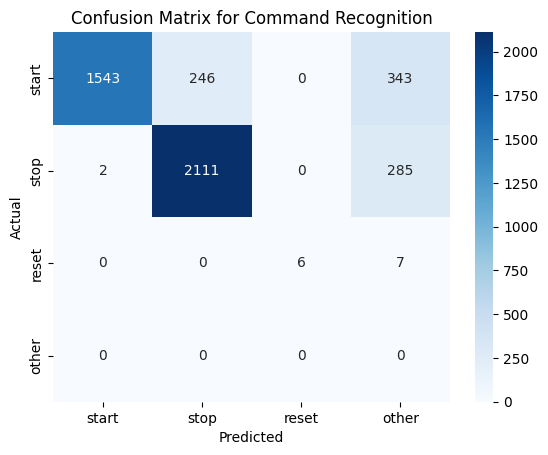

In [7]:
# Evaluate performance if there are valid predictions
if predictions and ground_truth:
    accuracy = accuracy_score(ground_truth, predictions)
    precision, recall, fscore, _ = precision_recall_fscore_support(
        ground_truth, predictions, labels=commands + ["other"], zero_division=1, average="micro"
    )

    # Print evaluation metrics
    print("\nEvaluation Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {fscore:.4f}")

    # Generate confusion matrix
    cm = confusion_matrix(ground_truth, predictions, labels=commands + ["other"])

    # Plot the confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=commands + ["other"],
                yticklabels=commands + ["other"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix for Command Recognition")
    plt.show()

else:
    print("No valid predictions were made.")
